In [1]:
import numpy as np
from numpy.random import default_rng
import os
import sys
from nutil.plot import paperStyle
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')

from denoising import REGISTRY
import utils
import tifffile as tif
import matplotlib.pyplot as plt
import normalize
import imagequalitymetrics as iqm
import pandas as pd
import seaborn as sns

In [6]:
data_path = 'D:/jo77pihe/Registered/20220203_Raw'
data_path_2d = 'D:/jo77pihe/Registered/20220203_Raw_2D'
n2n_res_path = 'D:/jo77pihe/Registered/20220204_Result_images/Neighbor2Neighbor'
gauss_res_path = 'D:/jo77pihe/Registered/20220204_Result_images/GaussianFilter'
bilat_res_path = 'D:/jo77pihe/Registered/20220204_Result_images/BilateralFilter'
nlm_res_path = 'D:/jo77pihe/Registered/20220204_Result_images/NLM'
bm3d_res_path = 'D:/jo77pihe/Registered/20220204_Result_images/BM3D'


MIN_VAL = -2327
MAX_VAL = 12870

In [3]:
gauss_denoiser = REGISTRY['Gauss']()
bilat_denoiser =REGISTRY['Bilateral']()
n2n = REGISTRY['n2n']()
normalizer = normalize.PercentileNormalizer()
iqm = iqm.ImageQualityMetrics()

In [4]:
nlm_denoiser = REGISTRY['nlm']()
bm3d_denoiser = REGISTRY['bm3d']()

In [24]:
# Randomly select 10 images
f = [f for f in os.listdir(data_path) if f.endswith('.tif')]

rng = default_rng(1234)
idx = rng.choice(len(f), size=60, replace=False)
idx_train =idx[0:50]
idx_test = idx[50:]
f_test = [f[i] for i in idx_test]
f_train = [f[i] for i in idx_train]
print(idx)
print(f_test)

[182 172  22 112 239 125 236  51 195  48 199 108  62 227  19 152  45 153
 103 206  31 157 181 178 158 230 140  89  47 154 134  13 173 142 202 180
 102 159  10 139  52 189  70   9  36 240  26 191  94 232  49 106 126  37
 107  60   0 184  41 192]
['Ghabiba_333_Thy1GFP_2019-02-18_A4.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A6.tif', 'Tim_117_ArcCre_2017-05-08_A8.tif', 'Alessandro_520_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A7.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A7.tif', 'Ghabiba_335_Thy1GFP_2019-02-18_A7.tif', 'Alessandro_427_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A1.tif', 'Tim_176_ArcCre_2017-08-08_B4.tif', 'Alessandro_530_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-09-16_A4.tif', 'Tim_178_ArcCre_2017-08-08_A5.tif']


In [4]:
f_test= ['Ghabiba_333_Thy1GFP_2019-02-18_A4.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A6.tif', 'Tim_117_ArcCre_2017-05-08_A8.tif', 'Alessandro_520_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A7.tif', 'Ghabiba_77_Thy1eGFP_2018-02-03_A7.tif', 'Ghabiba_335_Thy1GFP_2019-02-18_A7.tif', 'Alessandro_427_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A1.tif', 'Tim_176_ArcCre_2017-08-08_B4.tif', 'Alessandro_530_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-09-16_A4.tif', 'Tim_178_ArcCre_2017-08-08_A5.tif']

In [26]:
# Bilateral Filter and N2N only works on 2D images
# Neighbor2Neighbor needs them seperated in a folder
for f in f_test:
    file=tif.imread(os.path.join(data_path,f))
    utils.save_tif_stack_to_2d(file, os.path.join(data_path_2d, 'Test'), name=f)

In [28]:
for f in f_train:
    file=tif.imread(os.path.join(data_path,f))
    utils.save_tif_stack_to_2d(file, os.path.join(data_path_2d, 'Train'), name = f)

In [4]:
# Train Neighbor2Neighbor
# Default Hyperparameters
# self.n_feature = 48
# self.gamma = 0.5
# self.n_snapshot=25
# self.patchsize = 256
# self.Lambda1 =1.0
# self.Lambda2 = 1.0
# self.increase_ratio = 2.0
# self.batchsize = 4
# self.n_epoch =100
# self.lr =3e-4

n2n.prepare(os.path.join(data_path_2d, 'Train'),os.path.join(data_path_2d, 'Test'), 'D:/jo77pihe/Registered/20220203_N2NRes')

fetch 1825 samples for training
gauss25
Batchsize=4, number of epoch=100
Checkpoint saved to .\results\unet_gauss25_b4e100r02\2022-02-04-09-46\epoch_model_000.pth
init finish
LearningRate of Epoch 1 = 0.0003
0001 00000 Loss1=0.049489, Lambda=0.02, Loss2=0.000990, Loss_Full=0.050478, Time=6.5944
0001 00001 Loss1=0.055426, Lambda=0.02, Loss2=0.001109, Loss_Full=0.056535, Time=0.0519
0001 00002 Loss1=0.066266, Lambda=0.02, Loss2=0.001325, Loss_Full=0.067591, Time=0.0410
0001 00003 Loss1=0.055403, Lambda=0.02, Loss2=0.001108, Loss_Full=0.056511, Time=0.0301
0001 00004 Loss1=0.059708, Lambda=0.02, Loss2=0.001194, Loss_Full=0.060902, Time=0.0381
0001 00005 Loss1=0.054893, Lambda=0.02, Loss2=0.001098, Loss_Full=0.055991, Time=0.0301
0001 00006 Loss1=0.049885, Lambda=0.02, Loss2=0.000998, Loss_Full=0.050883, Time=0.0389
0001 00007 Loss1=0.076637, Lambda=0.02, Loss2=0.001533, Loss_Full=0.078170, Time=0.0329
0001 00008 Loss1=0.066511, Lambda=0.02, Loss2=0.001330, Loss_Full=0.067842, Time=0.0301


0001 00094 Loss1=0.003593, Lambda=0.02, Loss2=0.000071, Loss_Full=0.003665, Time=0.0322
0001 00095 Loss1=0.003041, Lambda=0.02, Loss2=0.000060, Loss_Full=0.003102, Time=0.0301
0001 00096 Loss1=0.002566, Lambda=0.02, Loss2=0.000051, Loss_Full=0.002618, Time=0.0301
0001 00097 Loss1=0.002229, Lambda=0.02, Loss2=0.000044, Loss_Full=0.002273, Time=0.0301
0001 00098 Loss1=0.003059, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003121, Time=0.0321
0001 00099 Loss1=0.002242, Lambda=0.02, Loss2=0.000045, Loss_Full=0.002287, Time=0.0301
0001 00100 Loss1=0.004452, Lambda=0.02, Loss2=0.000088, Loss_Full=0.004540, Time=0.0381
0001 00101 Loss1=0.006057, Lambda=0.02, Loss2=0.000120, Loss_Full=0.006177, Time=0.0322
0001 00102 Loss1=0.002366, Lambda=0.02, Loss2=0.000047, Loss_Full=0.002414, Time=0.0402
0001 00103 Loss1=0.004004, Lambda=0.02, Loss2=0.000079, Loss_Full=0.004083, Time=0.0302
0001 00104 Loss1=0.003288, Lambda=0.02, Loss2=0.000066, Loss_Full=0.003354, Time=0.0301
0001 00105 Loss1=0.001914, Lambd

0001 00191 Loss1=0.001063, Lambda=0.02, Loss2=0.000022, Loss_Full=0.001085, Time=0.0301
0001 00192 Loss1=0.002498, Lambda=0.02, Loss2=0.000050, Loss_Full=0.002548, Time=0.0402
0001 00193 Loss1=0.000852, Lambda=0.02, Loss2=0.000018, Loss_Full=0.000870, Time=0.0301
0001 00194 Loss1=0.001255, Lambda=0.02, Loss2=0.000025, Loss_Full=0.001280, Time=0.0301
0001 00195 Loss1=0.002374, Lambda=0.02, Loss2=0.000048, Loss_Full=0.002422, Time=0.0302
0001 00196 Loss1=0.001091, Lambda=0.02, Loss2=0.000022, Loss_Full=0.001113, Time=0.0333
0001 00197 Loss1=0.002541, Lambda=0.02, Loss2=0.000050, Loss_Full=0.002592, Time=0.0403
0001 00198 Loss1=0.002114, Lambda=0.02, Loss2=0.000042, Loss_Full=0.002156, Time=0.0305
0001 00199 Loss1=0.003089, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003149, Time=0.0305
0001 00200 Loss1=0.002864, Lambda=0.02, Loss2=0.000057, Loss_Full=0.002921, Time=0.0302
0001 00201 Loss1=0.001634, Lambda=0.02, Loss2=0.000033, Loss_Full=0.001667, Time=0.0382
0001 00202 Loss1=0.001657, Lambd

0001 00291 Loss1=0.004654, Lambda=0.02, Loss2=0.000090, Loss_Full=0.004743, Time=0.0301
0001 00292 Loss1=0.002607, Lambda=0.02, Loss2=0.000052, Loss_Full=0.002660, Time=0.0402
0001 00293 Loss1=0.002708, Lambda=0.02, Loss2=0.000053, Loss_Full=0.002761, Time=0.0318
0001 00294 Loss1=0.003144, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003205, Time=0.0302
0001 00295 Loss1=0.002571, Lambda=0.02, Loss2=0.000050, Loss_Full=0.002621, Time=0.0308
0001 00296 Loss1=0.001809, Lambda=0.02, Loss2=0.000036, Loss_Full=0.001845, Time=0.0302
0001 00297 Loss1=0.001051, Lambda=0.02, Loss2=0.000021, Loss_Full=0.001072, Time=0.0337
0001 00298 Loss1=0.000629, Lambda=0.02, Loss2=0.000013, Loss_Full=0.000642, Time=0.0303
0001 00299 Loss1=0.002729, Lambda=0.02, Loss2=0.000053, Loss_Full=0.002782, Time=0.0407
0001 00300 Loss1=0.001271, Lambda=0.02, Loss2=0.000026, Loss_Full=0.001297, Time=0.0302
0001 00301 Loss1=0.002802, Lambda=0.02, Loss2=0.000054, Loss_Full=0.002856, Time=0.0305
0001 00302 Loss1=0.001702, Lambd

0001 00387 Loss1=0.003454, Lambda=0.02, Loss2=0.000067, Loss_Full=0.003521, Time=0.0302
0001 00388 Loss1=0.002523, Lambda=0.02, Loss2=0.000048, Loss_Full=0.002571, Time=0.0313
0001 00389 Loss1=0.001255, Lambda=0.02, Loss2=0.000024, Loss_Full=0.001279, Time=0.0382
0001 00390 Loss1=0.001957, Lambda=0.02, Loss2=0.000038, Loss_Full=0.001995, Time=0.0321
0001 00391 Loss1=0.000730, Lambda=0.02, Loss2=0.000015, Loss_Full=0.000745, Time=0.0402
0001 00392 Loss1=0.002244, Lambda=0.02, Loss2=0.000043, Loss_Full=0.002287, Time=0.0301
0001 00393 Loss1=0.000991, Lambda=0.02, Loss2=0.000020, Loss_Full=0.001011, Time=0.0385
0001 00394 Loss1=0.004361, Lambda=0.02, Loss2=0.000083, Loss_Full=0.004444, Time=0.0302
0001 00395 Loss1=0.001256, Lambda=0.02, Loss2=0.000025, Loss_Full=0.001281, Time=0.0412
0001 00396 Loss1=0.001364, Lambda=0.02, Loss2=0.000027, Loss_Full=0.001391, Time=0.0383
0001 00397 Loss1=0.003199, Lambda=0.02, Loss2=0.000061, Loss_Full=0.003260, Time=0.0322
0001 00398 Loss1=0.002851, Lambd

0002 00026 Loss1=0.003452, Lambda=0.04, Loss2=0.000133, Loss_Full=0.003585, Time=0.0313
0002 00027 Loss1=0.001048, Lambda=0.04, Loss2=0.000041, Loss_Full=0.001090, Time=0.0301
0002 00028 Loss1=0.001929, Lambda=0.04, Loss2=0.000074, Loss_Full=0.002002, Time=0.0382
0002 00029 Loss1=0.002666, Lambda=0.04, Loss2=0.000101, Loss_Full=0.002767, Time=0.0302
0002 00030 Loss1=0.001475, Lambda=0.04, Loss2=0.000056, Loss_Full=0.001532, Time=0.0306
0002 00031 Loss1=0.002056, Lambda=0.04, Loss2=0.000079, Loss_Full=0.002135, Time=0.0306
0002 00032 Loss1=0.003847, Lambda=0.04, Loss2=0.000145, Loss_Full=0.003992, Time=0.0305
0002 00033 Loss1=0.001649, Lambda=0.04, Loss2=0.000063, Loss_Full=0.001712, Time=0.0402
0002 00034 Loss1=0.003231, Lambda=0.04, Loss2=0.000122, Loss_Full=0.003353, Time=0.0301
0002 00035 Loss1=0.000942, Lambda=0.04, Loss2=0.000037, Loss_Full=0.000979, Time=0.0402
0002 00036 Loss1=0.000795, Lambda=0.04, Loss2=0.000031, Loss_Full=0.000826, Time=0.0301
0002 00037 Loss1=0.002608, Lambd

0002 00125 Loss1=0.002092, Lambda=0.04, Loss2=0.000079, Loss_Full=0.002171, Time=0.0402
0002 00126 Loss1=0.004028, Lambda=0.04, Loss2=0.000150, Loss_Full=0.004178, Time=0.0301
0002 00127 Loss1=0.001667, Lambda=0.04, Loss2=0.000065, Loss_Full=0.001732, Time=0.0382
0002 00128 Loss1=0.001489, Lambda=0.04, Loss2=0.000057, Loss_Full=0.001546, Time=0.0321
0002 00129 Loss1=0.001792, Lambda=0.04, Loss2=0.000069, Loss_Full=0.001860, Time=0.0301
0002 00130 Loss1=0.003896, Lambda=0.04, Loss2=0.000146, Loss_Full=0.004042, Time=0.0301
0002 00131 Loss1=0.002055, Lambda=0.04, Loss2=0.000078, Loss_Full=0.002133, Time=0.0301
0002 00132 Loss1=0.001224, Lambda=0.04, Loss2=0.000048, Loss_Full=0.001271, Time=0.0413
0002 00133 Loss1=0.001207, Lambda=0.04, Loss2=0.000047, Loss_Full=0.001254, Time=0.0301
0002 00134 Loss1=0.003107, Lambda=0.04, Loss2=0.000116, Loss_Full=0.003222, Time=0.0309
0002 00135 Loss1=0.002058, Lambda=0.04, Loss2=0.000077, Loss_Full=0.002136, Time=0.0389
0002 00136 Loss1=0.001374, Lambd

0002 00221 Loss1=0.003546, Lambda=0.04, Loss2=0.000131, Loss_Full=0.003676, Time=0.0322
0002 00222 Loss1=0.004787, Lambda=0.04, Loss2=0.000177, Loss_Full=0.004965, Time=0.0301
0002 00223 Loss1=0.001310, Lambda=0.04, Loss2=0.000050, Loss_Full=0.001361, Time=0.0301
0002 00224 Loss1=0.002168, Lambda=0.04, Loss2=0.000083, Loss_Full=0.002251, Time=0.0301
0002 00225 Loss1=0.002614, Lambda=0.04, Loss2=0.000101, Loss_Full=0.002714, Time=0.0321
0002 00226 Loss1=0.002600, Lambda=0.04, Loss2=0.000097, Loss_Full=0.002697, Time=0.0302
0002 00227 Loss1=0.003174, Lambda=0.04, Loss2=0.000119, Loss_Full=0.003292, Time=0.0301
0002 00228 Loss1=0.002453, Lambda=0.04, Loss2=0.000092, Loss_Full=0.002545, Time=0.0383
0002 00229 Loss1=0.001908, Lambda=0.04, Loss2=0.000074, Loss_Full=0.001982, Time=0.0301
0002 00230 Loss1=0.001656, Lambda=0.04, Loss2=0.000062, Loss_Full=0.001718, Time=0.0301
0002 00231 Loss1=0.001555, Lambda=0.04, Loss2=0.000059, Loss_Full=0.001613, Time=0.0301
0002 00232 Loss1=0.001028, Lambd

0002 00318 Loss1=0.001135, Lambda=0.04, Loss2=0.000043, Loss_Full=0.001179, Time=0.0301
0002 00319 Loss1=0.001821, Lambda=0.04, Loss2=0.000067, Loss_Full=0.001889, Time=0.0301
0002 00320 Loss1=0.001080, Lambda=0.04, Loss2=0.000040, Loss_Full=0.001121, Time=0.0305
0002 00321 Loss1=0.000853, Lambda=0.04, Loss2=0.000032, Loss_Full=0.000885, Time=0.0321
0002 00322 Loss1=0.003158, Lambda=0.04, Loss2=0.000116, Loss_Full=0.003274, Time=0.0301
0002 00323 Loss1=0.000609, Lambda=0.04, Loss2=0.000025, Loss_Full=0.000634, Time=0.0306
0002 00324 Loss1=0.000563, Lambda=0.04, Loss2=0.000022, Loss_Full=0.000584, Time=0.0305
0002 00325 Loss1=0.001246, Lambda=0.04, Loss2=0.000047, Loss_Full=0.001294, Time=0.0402
0002 00326 Loss1=0.001801, Lambda=0.04, Loss2=0.000068, Loss_Full=0.001868, Time=0.0301
0002 00327 Loss1=0.002062, Lambda=0.04, Loss2=0.000080, Loss_Full=0.002142, Time=0.0301
0002 00328 Loss1=0.001468, Lambda=0.04, Loss2=0.000055, Loss_Full=0.001523, Time=0.0302
0002 00329 Loss1=0.002538, Lambd

0002 00416 Loss1=0.001560, Lambda=0.04, Loss2=0.000058, Loss_Full=0.001618, Time=0.0382
0002 00417 Loss1=0.001498, Lambda=0.04, Loss2=0.000055, Loss_Full=0.001553, Time=0.0321
0002 00418 Loss1=0.000982, Lambda=0.04, Loss2=0.000037, Loss_Full=0.001018, Time=0.0301
0002 00419 Loss1=0.002268, Lambda=0.04, Loss2=0.000083, Loss_Full=0.002351, Time=0.0301
0002 00420 Loss1=0.001963, Lambda=0.04, Loss2=0.000073, Loss_Full=0.002036, Time=0.0322
0002 00421 Loss1=0.001604, Lambda=0.04, Loss2=0.000059, Loss_Full=0.001662, Time=0.0301
0002 00422 Loss1=0.000573, Lambda=0.04, Loss2=0.000022, Loss_Full=0.000594, Time=0.0301
0002 00423 Loss1=0.001700, Lambda=0.04, Loss2=0.000064, Loss_Full=0.001764, Time=0.0402
0002 00424 Loss1=0.001587, Lambda=0.04, Loss2=0.000059, Loss_Full=0.001646, Time=0.0301
0002 00425 Loss1=0.001343, Lambda=0.04, Loss2=0.000050, Loss_Full=0.001393, Time=0.0301
0002 00426 Loss1=0.002981, Lambda=0.04, Loss2=0.000109, Loss_Full=0.003090, Time=0.0301
0002 00427 Loss1=0.001442, Lambd

0003 00057 Loss1=0.001348, Lambda=0.06, Loss2=0.000075, Loss_Full=0.001423, Time=0.0402
0003 00058 Loss1=0.001575, Lambda=0.06, Loss2=0.000087, Loss_Full=0.001662, Time=0.0313
0003 00059 Loss1=0.003368, Lambda=0.06, Loss2=0.000183, Loss_Full=0.003551, Time=0.0322
0003 00060 Loss1=0.001041, Lambda=0.06, Loss2=0.000058, Loss_Full=0.001099, Time=0.0382
0003 00061 Loss1=0.001804, Lambda=0.06, Loss2=0.000099, Loss_Full=0.001903, Time=0.0301
0003 00062 Loss1=0.002002, Lambda=0.06, Loss2=0.000112, Loss_Full=0.002114, Time=0.0382
0003 00063 Loss1=0.001860, Lambda=0.06, Loss2=0.000103, Loss_Full=0.001963, Time=0.0422
0003 00064 Loss1=0.004753, Lambda=0.06, Loss2=0.000264, Loss_Full=0.005017, Time=0.0303
0003 00065 Loss1=0.001784, Lambda=0.06, Loss2=0.000099, Loss_Full=0.001883, Time=0.0383
0003 00066 Loss1=0.002180, Lambda=0.06, Loss2=0.000120, Loss_Full=0.002300, Time=0.0321
0003 00067 Loss1=0.001443, Lambda=0.06, Loss2=0.000079, Loss_Full=0.001522, Time=0.0302
0003 00068 Loss1=0.002649, Lambd

0003 00156 Loss1=0.002325, Lambda=0.06, Loss2=0.000125, Loss_Full=0.002450, Time=0.0321
0003 00157 Loss1=0.001431, Lambda=0.06, Loss2=0.000078, Loss_Full=0.001509, Time=0.0308
0003 00158 Loss1=0.001731, Lambda=0.06, Loss2=0.000095, Loss_Full=0.001826, Time=0.0310
0003 00159 Loss1=0.001344, Lambda=0.06, Loss2=0.000075, Loss_Full=0.001418, Time=0.0306
0003 00160 Loss1=0.001720, Lambda=0.06, Loss2=0.000094, Loss_Full=0.001814, Time=0.0382
0003 00161 Loss1=0.001103, Lambda=0.06, Loss2=0.000062, Loss_Full=0.001165, Time=0.0301
0003 00162 Loss1=0.003187, Lambda=0.06, Loss2=0.000172, Loss_Full=0.003358, Time=0.0301
0003 00163 Loss1=0.002431, Lambda=0.06, Loss2=0.000133, Loss_Full=0.002564, Time=0.0302
0003 00164 Loss1=0.001973, Lambda=0.06, Loss2=0.000108, Loss_Full=0.002081, Time=0.0381
0003 00165 Loss1=0.001231, Lambda=0.06, Loss2=0.000068, Loss_Full=0.001300, Time=0.0321
0003 00166 Loss1=0.001730, Lambda=0.06, Loss2=0.000096, Loss_Full=0.001826, Time=0.0301
0003 00167 Loss1=0.001533, Lambd

0003 00256 Loss1=0.001532, Lambda=0.06, Loss2=0.000085, Loss_Full=0.001617, Time=0.0305
0003 00257 Loss1=0.002613, Lambda=0.06, Loss2=0.000140, Loss_Full=0.002753, Time=0.0310
0003 00258 Loss1=0.001346, Lambda=0.06, Loss2=0.000073, Loss_Full=0.001419, Time=0.0327
0003 00259 Loss1=0.003860, Lambda=0.06, Loss2=0.000206, Loss_Full=0.004066, Time=0.0393
0003 00260 Loss1=0.002601, Lambda=0.06, Loss2=0.000140, Loss_Full=0.002740, Time=0.0291
0003 00261 Loss1=0.000970, Lambda=0.06, Loss2=0.000053, Loss_Full=0.001023, Time=0.0314
0003 00262 Loss1=0.004726, Lambda=0.06, Loss2=0.000255, Loss_Full=0.004981, Time=0.0307
0003 00263 Loss1=0.002175, Lambda=0.06, Loss2=0.000117, Loss_Full=0.002292, Time=0.0302
0003 00264 Loss1=0.000684, Lambda=0.06, Loss2=0.000038, Loss_Full=0.000723, Time=0.0301
0003 00265 Loss1=0.000943, Lambda=0.06, Loss2=0.000052, Loss_Full=0.000995, Time=0.0321
0003 00266 Loss1=0.003206, Lambda=0.06, Loss2=0.000172, Loss_Full=0.003378, Time=0.0301
0003 00267 Loss1=0.003402, Lambd

0003 00354 Loss1=0.002879, Lambda=0.06, Loss2=0.000152, Loss_Full=0.003031, Time=0.0322
0003 00355 Loss1=0.002117, Lambda=0.06, Loss2=0.000113, Loss_Full=0.002230, Time=0.0302
0003 00356 Loss1=0.003206, Lambda=0.06, Loss2=0.000170, Loss_Full=0.003377, Time=0.0301
0003 00357 Loss1=0.002341, Lambda=0.06, Loss2=0.000126, Loss_Full=0.002467, Time=0.0301
0003 00358 Loss1=0.002547, Lambda=0.06, Loss2=0.000137, Loss_Full=0.002685, Time=0.0321
0003 00359 Loss1=0.001252, Lambda=0.06, Loss2=0.000066, Loss_Full=0.001319, Time=0.0301
0003 00360 Loss1=0.001645, Lambda=0.06, Loss2=0.000087, Loss_Full=0.001732, Time=0.0313
0003 00361 Loss1=0.006794, Lambda=0.06, Loss2=0.000359, Loss_Full=0.007153, Time=0.0411
0003 00362 Loss1=0.002333, Lambda=0.06, Loss2=0.000124, Loss_Full=0.002457, Time=0.0406
0003 00363 Loss1=0.001682, Lambda=0.06, Loss2=0.000092, Loss_Full=0.001773, Time=0.0301
0003 00364 Loss1=0.002509, Lambda=0.06, Loss2=0.000131, Loss_Full=0.002640, Time=0.0406
0003 00365 Loss1=0.001152, Lambd

0003 00449 Loss1=0.001750, Lambda=0.06, Loss2=0.000092, Loss_Full=0.001842, Time=0.0402
0003 00450 Loss1=0.001131, Lambda=0.06, Loss2=0.000060, Loss_Full=0.001191, Time=0.0302
0003 00451 Loss1=0.001895, Lambda=0.06, Loss2=0.000099, Loss_Full=0.001994, Time=0.0413
0003 00452 Loss1=0.001207, Lambda=0.06, Loss2=0.000064, Loss_Full=0.001271, Time=0.0310
0003 00453 Loss1=0.001764, Lambda=0.06, Loss2=0.000094, Loss_Full=0.001858, Time=0.0306
0003 00454 Loss1=0.002646, Lambda=0.06, Loss2=0.000142, Loss_Full=0.002788, Time=0.0382
0003 00455 Loss1=0.002777, Lambda=0.06, Loss2=0.000143, Loss_Full=0.002920, Time=0.0321
LearningRate of Epoch 4 = 0.0003
0004 00000 Loss1=0.002034, Lambda=0.08, Loss2=0.000142, Loss_Full=0.002176, Time=0.0406
0004 00001 Loss1=0.001050, Lambda=0.08, Loss2=0.000075, Loss_Full=0.001125, Time=0.0301
0004 00002 Loss1=0.000549, Lambda=0.08, Loss2=0.000039, Loss_Full=0.000588, Time=0.0382
0004 00003 Loss1=0.001474, Lambda=0.08, Loss2=0.000103, Loss_Full=0.001578, Time=0.0322

0004 00090 Loss1=0.002406, Lambda=0.08, Loss2=0.000163, Loss_Full=0.002569, Time=0.0382
0004 00091 Loss1=0.001877, Lambda=0.08, Loss2=0.000129, Loss_Full=0.002005, Time=0.0326
0004 00092 Loss1=0.001693, Lambda=0.08, Loss2=0.000116, Loss_Full=0.001809, Time=0.0301
0004 00093 Loss1=0.001108, Lambda=0.08, Loss2=0.000076, Loss_Full=0.001184, Time=0.0301
0004 00094 Loss1=0.003650, Lambda=0.08, Loss2=0.000250, Loss_Full=0.003900, Time=0.0381
0004 00095 Loss1=0.001766, Lambda=0.08, Loss2=0.000121, Loss_Full=0.001887, Time=0.0301
0004 00096 Loss1=0.001703, Lambda=0.08, Loss2=0.000117, Loss_Full=0.001820, Time=0.0302
0004 00097 Loss1=0.003573, Lambda=0.08, Loss2=0.000244, Loss_Full=0.003817, Time=0.0301
0004 00098 Loss1=0.001448, Lambda=0.08, Loss2=0.000097, Loss_Full=0.001545, Time=0.0302
0004 00099 Loss1=0.000926, Lambda=0.08, Loss2=0.000063, Loss_Full=0.000990, Time=0.0309
0004 00100 Loss1=0.002279, Lambda=0.08, Loss2=0.000155, Loss_Full=0.002434, Time=0.0302
0004 00101 Loss1=0.000922, Lambd

0004 00184 Loss1=0.002187, Lambda=0.08, Loss2=0.000143, Loss_Full=0.002330, Time=0.0322
0004 00185 Loss1=0.001226, Lambda=0.08, Loss2=0.000079, Loss_Full=0.001305, Time=0.0382
0004 00186 Loss1=0.001028, Lambda=0.08, Loss2=0.000067, Loss_Full=0.001096, Time=0.0322
0004 00187 Loss1=0.000636, Lambda=0.08, Loss2=0.000040, Loss_Full=0.000676, Time=0.0301
0004 00188 Loss1=0.000983, Lambda=0.08, Loss2=0.000063, Loss_Full=0.001046, Time=0.0301
0004 00189 Loss1=0.001709, Lambda=0.08, Loss2=0.000111, Loss_Full=0.001820, Time=0.0385
0004 00190 Loss1=0.001973, Lambda=0.08, Loss2=0.000126, Loss_Full=0.002100, Time=0.0302
0004 00191 Loss1=0.001743, Lambda=0.08, Loss2=0.000112, Loss_Full=0.001856, Time=0.0309
0004 00192 Loss1=0.002084, Lambda=0.08, Loss2=0.000135, Loss_Full=0.002219, Time=0.0381
0004 00193 Loss1=0.001977, Lambda=0.08, Loss2=0.000127, Loss_Full=0.002104, Time=0.0303
0004 00194 Loss1=0.001313, Lambda=0.08, Loss2=0.000084, Loss_Full=0.001397, Time=0.0301
0004 00195 Loss1=0.001279, Lambd

0004 00283 Loss1=0.003734, Lambda=0.08, Loss2=0.000221, Loss_Full=0.003955, Time=0.0321
0004 00284 Loss1=0.003595, Lambda=0.08, Loss2=0.000215, Loss_Full=0.003810, Time=0.0301
0004 00285 Loss1=0.002300, Lambda=0.08, Loss2=0.000140, Loss_Full=0.002440, Time=0.0301
0004 00286 Loss1=0.000979, Lambda=0.08, Loss2=0.000060, Loss_Full=0.001039, Time=0.0381
0004 00287 Loss1=0.000528, Lambda=0.08, Loss2=0.000033, Loss_Full=0.000561, Time=0.0301
0004 00288 Loss1=0.001532, Lambda=0.08, Loss2=0.000092, Loss_Full=0.001624, Time=0.0302
0004 00289 Loss1=0.001628, Lambda=0.08, Loss2=0.000097, Loss_Full=0.001725, Time=0.0301
0004 00290 Loss1=0.002514, Lambda=0.08, Loss2=0.000151, Loss_Full=0.002666, Time=0.0387
0004 00291 Loss1=0.001286, Lambda=0.08, Loss2=0.000077, Loss_Full=0.001363, Time=0.0302
0004 00292 Loss1=0.002725, Lambda=0.08, Loss2=0.000163, Loss_Full=0.002889, Time=0.0301
0004 00293 Loss1=0.000438, Lambda=0.08, Loss2=0.000026, Loss_Full=0.000464, Time=0.0301
0004 00294 Loss1=0.002798, Lambd

0004 00380 Loss1=0.000939, Lambda=0.08, Loss2=0.000049, Loss_Full=0.000989, Time=0.0382
0004 00381 Loss1=0.001115, Lambda=0.08, Loss2=0.000058, Loss_Full=0.001173, Time=0.0321
0004 00382 Loss1=0.001094, Lambda=0.08, Loss2=0.000062, Loss_Full=0.001156, Time=0.0301
0004 00383 Loss1=0.001138, Lambda=0.08, Loss2=0.000060, Loss_Full=0.001198, Time=0.0313
0004 00384 Loss1=0.002051, Lambda=0.08, Loss2=0.000105, Loss_Full=0.002155, Time=0.0410
0004 00385 Loss1=0.000918, Lambda=0.08, Loss2=0.000047, Loss_Full=0.000965, Time=0.0302
0004 00386 Loss1=0.001745, Lambda=0.08, Loss2=0.000091, Loss_Full=0.001837, Time=0.0309
0004 00387 Loss1=0.003184, Lambda=0.08, Loss2=0.000162, Loss_Full=0.003347, Time=0.0383
0004 00388 Loss1=0.001710, Lambda=0.08, Loss2=0.000089, Loss_Full=0.001799, Time=0.0321
0004 00389 Loss1=0.001271, Lambda=0.08, Loss2=0.000066, Loss_Full=0.001337, Time=0.0302
0004 00390 Loss1=0.001211, Lambda=0.08, Loss2=0.000062, Loss_Full=0.001274, Time=0.0403
0004 00391 Loss1=0.001960, Lambd

0005 00019 Loss1=0.002766, Lambda=0.1, Loss2=0.000165, Loss_Full=0.002931, Time=0.0323
0005 00020 Loss1=0.001822, Lambda=0.1, Loss2=0.000106, Loss_Full=0.001929, Time=0.0302
0005 00021 Loss1=0.001769, Lambda=0.1, Loss2=0.000101, Loss_Full=0.001870, Time=0.0301
0005 00022 Loss1=0.001573, Lambda=0.1, Loss2=0.000089, Loss_Full=0.001662, Time=0.0302
0005 00023 Loss1=0.001332, Lambda=0.1, Loss2=0.000075, Loss_Full=0.001407, Time=0.0302
0005 00024 Loss1=0.001403, Lambda=0.1, Loss2=0.000079, Loss_Full=0.001482, Time=0.0382
0005 00025 Loss1=0.000607, Lambda=0.1, Loss2=0.000037, Loss_Full=0.000644, Time=0.0330
0005 00026 Loss1=0.001915, Lambda=0.1, Loss2=0.000113, Loss_Full=0.002028, Time=0.0318
0005 00027 Loss1=0.001081, Lambda=0.1, Loss2=0.000060, Loss_Full=0.001141, Time=0.0308
0005 00028 Loss1=0.001401, Lambda=0.1, Loss2=0.000079, Loss_Full=0.001480, Time=0.0315
0005 00029 Loss1=0.001851, Lambda=0.1, Loss2=0.000104, Loss_Full=0.001955, Time=0.0310
0005 00030 Loss1=0.000948, Lambda=0.1, Loss

0005 00117 Loss1=0.000993, Lambda=0.1, Loss2=0.000052, Loss_Full=0.001045, Time=0.0322
0005 00118 Loss1=0.001484, Lambda=0.1, Loss2=0.000079, Loss_Full=0.001563, Time=0.0381
0005 00119 Loss1=0.002097, Lambda=0.1, Loss2=0.000112, Loss_Full=0.002209, Time=0.0301
0005 00120 Loss1=0.002900, Lambda=0.1, Loss2=0.000157, Loss_Full=0.003057, Time=0.0302
0005 00121 Loss1=0.001202, Lambda=0.1, Loss2=0.000065, Loss_Full=0.001266, Time=0.0301
0005 00122 Loss1=0.002448, Lambda=0.1, Loss2=0.000136, Loss_Full=0.002583, Time=0.0381
0005 00123 Loss1=0.002734, Lambda=0.1, Loss2=0.000150, Loss_Full=0.002884, Time=0.0337
0005 00124 Loss1=0.001747, Lambda=0.1, Loss2=0.000093, Loss_Full=0.001840, Time=0.0302
0005 00125 Loss1=0.001358, Lambda=0.1, Loss2=0.000073, Loss_Full=0.001431, Time=0.0382
0005 00126 Loss1=0.002060, Lambda=0.1, Loss2=0.000114, Loss_Full=0.002174, Time=0.0326
0005 00127 Loss1=0.001292, Lambda=0.1, Loss2=0.000070, Loss_Full=0.001362, Time=0.0306
0005 00128 Loss1=0.001271, Lambda=0.1, Loss

0005 00215 Loss1=0.002417, Lambda=0.1, Loss2=0.000130, Loss_Full=0.002547, Time=0.0402
0005 00216 Loss1=0.000917, Lambda=0.1, Loss2=0.000047, Loss_Full=0.000964, Time=0.0301
0005 00217 Loss1=0.001309, Lambda=0.1, Loss2=0.000070, Loss_Full=0.001379, Time=0.0302
0005 00218 Loss1=0.002240, Lambda=0.1, Loss2=0.000117, Loss_Full=0.002357, Time=0.0301
0005 00219 Loss1=0.001798, Lambda=0.1, Loss2=0.000096, Loss_Full=0.001894, Time=0.0382
0005 00220 Loss1=0.001316, Lambda=0.1, Loss2=0.000068, Loss_Full=0.001383, Time=0.0321
0005 00221 Loss1=0.002098, Lambda=0.1, Loss2=0.000113, Loss_Full=0.002210, Time=0.0301
0005 00222 Loss1=0.002103, Lambda=0.1, Loss2=0.000112, Loss_Full=0.002215, Time=0.0402
0005 00223 Loss1=0.001209, Lambda=0.1, Loss2=0.000061, Loss_Full=0.001271, Time=0.0382
0005 00224 Loss1=0.001430, Lambda=0.1, Loss2=0.000074, Loss_Full=0.001504, Time=0.0302
0005 00225 Loss1=0.001679, Lambda=0.1, Loss2=0.000087, Loss_Full=0.001766, Time=0.0301
0005 00226 Loss1=0.003255, Lambda=0.1, Loss

0005 00312 Loss1=0.001581, Lambda=0.1, Loss2=0.000080, Loss_Full=0.001661, Time=0.0382
0005 00313 Loss1=0.001981, Lambda=0.1, Loss2=0.000097, Loss_Full=0.002079, Time=0.0305
0005 00314 Loss1=0.001489, Lambda=0.1, Loss2=0.000079, Loss_Full=0.001568, Time=0.0301
0005 00315 Loss1=0.003691, Lambda=0.1, Loss2=0.000184, Loss_Full=0.003874, Time=0.0381
0005 00316 Loss1=0.001930, Lambda=0.1, Loss2=0.000095, Loss_Full=0.002025, Time=0.0437
0005 00317 Loss1=0.003454, Lambda=0.1, Loss2=0.000180, Loss_Full=0.003634, Time=0.0469
0005 00318 Loss1=0.002290, Lambda=0.1, Loss2=0.000113, Loss_Full=0.002403, Time=0.0398
0005 00319 Loss1=0.001528, Lambda=0.1, Loss2=0.000076, Loss_Full=0.001604, Time=0.0486
0005 00320 Loss1=0.001627, Lambda=0.1, Loss2=0.000083, Loss_Full=0.001710, Time=0.0804
0005 00321 Loss1=0.001394, Lambda=0.1, Loss2=0.000069, Loss_Full=0.001463, Time=0.0301
0005 00322 Loss1=0.000973, Lambda=0.1, Loss2=0.000052, Loss_Full=0.001025, Time=0.0301
0005 00323 Loss1=0.000828, Lambda=0.1, Loss

0005 00412 Loss1=0.001468, Lambda=0.1, Loss2=0.000070, Loss_Full=0.001538, Time=0.0301
0005 00413 Loss1=0.001382, Lambda=0.1, Loss2=0.000068, Loss_Full=0.001450, Time=0.0301
0005 00414 Loss1=0.001646, Lambda=0.1, Loss2=0.000079, Loss_Full=0.001725, Time=0.0381
0005 00415 Loss1=0.001551, Lambda=0.1, Loss2=0.000075, Loss_Full=0.001626, Time=0.0302
0005 00416 Loss1=0.001657, Lambda=0.1, Loss2=0.000078, Loss_Full=0.001735, Time=0.0301
0005 00417 Loss1=0.001876, Lambda=0.1, Loss2=0.000093, Loss_Full=0.001969, Time=0.0301
0005 00418 Loss1=0.001854, Lambda=0.1, Loss2=0.000092, Loss_Full=0.001946, Time=0.0301
0005 00419 Loss1=0.002180, Lambda=0.1, Loss2=0.000107, Loss_Full=0.002286, Time=0.0317
0005 00420 Loss1=0.003066, Lambda=0.1, Loss2=0.000152, Loss_Full=0.003218, Time=0.0398
0005 00421 Loss1=0.003640, Lambda=0.1, Loss2=0.000178, Loss_Full=0.003818, Time=0.0323
0005 00422 Loss1=0.001866, Lambda=0.1, Loss2=0.000092, Loss_Full=0.001958, Time=0.0314
0005 00423 Loss1=0.001147, Lambda=0.1, Loss

0006 00053 Loss1=0.002481, Lambda=0.12, Loss2=0.000138, Loss_Full=0.002620, Time=0.0315
0006 00054 Loss1=0.000709, Lambda=0.12, Loss2=0.000040, Loss_Full=0.000749, Time=0.0323
0006 00055 Loss1=0.001329, Lambda=0.12, Loss2=0.000073, Loss_Full=0.001403, Time=0.0403
0006 00056 Loss1=0.000751, Lambda=0.12, Loss2=0.000043, Loss_Full=0.000793, Time=0.0309
0006 00057 Loss1=0.001789, Lambda=0.12, Loss2=0.000097, Loss_Full=0.001886, Time=0.0306
0006 00058 Loss1=0.001128, Lambda=0.12, Loss2=0.000062, Loss_Full=0.001190, Time=0.0402
0006 00059 Loss1=0.001668, Lambda=0.12, Loss2=0.000092, Loss_Full=0.001761, Time=0.0301
0006 00060 Loss1=0.002326, Lambda=0.12, Loss2=0.000130, Loss_Full=0.002455, Time=0.0309
0006 00061 Loss1=0.001196, Lambda=0.12, Loss2=0.000071, Loss_Full=0.001267, Time=0.0402
0006 00062 Loss1=0.000845, Lambda=0.12, Loss2=0.000048, Loss_Full=0.000892, Time=0.0313
0006 00063 Loss1=0.001277, Lambda=0.12, Loss2=0.000072, Loss_Full=0.001349, Time=0.0383
0006 00064 Loss1=0.001528, Lambd

0006 00152 Loss1=0.000926, Lambda=0.12, Loss2=0.000050, Loss_Full=0.000976, Time=0.0402
0006 00153 Loss1=0.001435, Lambda=0.12, Loss2=0.000075, Loss_Full=0.001510, Time=0.0322
0006 00154 Loss1=0.001216, Lambda=0.12, Loss2=0.000065, Loss_Full=0.001281, Time=0.0301
0006 00155 Loss1=0.001676, Lambda=0.12, Loss2=0.000090, Loss_Full=0.001766, Time=0.0301
0006 00156 Loss1=0.001432, Lambda=0.12, Loss2=0.000075, Loss_Full=0.001507, Time=0.0382
0006 00157 Loss1=0.000522, Lambda=0.12, Loss2=0.000029, Loss_Full=0.000552, Time=0.0321
0006 00158 Loss1=0.001132, Lambda=0.12, Loss2=0.000061, Loss_Full=0.001193, Time=0.0403
0006 00159 Loss1=0.001234, Lambda=0.12, Loss2=0.000064, Loss_Full=0.001298, Time=0.0318
0006 00160 Loss1=0.001278, Lambda=0.12, Loss2=0.000067, Loss_Full=0.001345, Time=0.0302
0006 00161 Loss1=0.000452, Lambda=0.12, Loss2=0.000026, Loss_Full=0.000478, Time=0.0305
0006 00162 Loss1=0.001575, Lambda=0.12, Loss2=0.000083, Loss_Full=0.001657, Time=0.0329
0006 00163 Loss1=0.002731, Lambd

0006 00250 Loss1=0.001893, Lambda=0.12, Loss2=0.000098, Loss_Full=0.001991, Time=0.0313
0006 00251 Loss1=0.001476, Lambda=0.12, Loss2=0.000075, Loss_Full=0.001551, Time=0.0302
0006 00252 Loss1=0.002134, Lambda=0.12, Loss2=0.000106, Loss_Full=0.002240, Time=0.0402
0006 00253 Loss1=0.001593, Lambda=0.12, Loss2=0.000082, Loss_Full=0.001675, Time=0.0402
0006 00254 Loss1=0.001050, Lambda=0.12, Loss2=0.000053, Loss_Full=0.001103, Time=0.0301
0006 00255 Loss1=0.000762, Lambda=0.12, Loss2=0.000040, Loss_Full=0.000803, Time=0.0406
0006 00256 Loss1=0.001258, Lambda=0.12, Loss2=0.000064, Loss_Full=0.001322, Time=0.0304
0006 00257 Loss1=0.002652, Lambda=0.12, Loss2=0.000136, Loss_Full=0.002788, Time=0.0382
0006 00258 Loss1=0.001570, Lambda=0.12, Loss2=0.000079, Loss_Full=0.001649, Time=0.0325
0006 00259 Loss1=0.000712, Lambda=0.12, Loss2=0.000036, Loss_Full=0.000748, Time=0.0301
0006 00260 Loss1=0.000982, Lambda=0.12, Loss2=0.000051, Loss_Full=0.001032, Time=0.0382
0006 00261 Loss1=0.001489, Lambd

0006 00346 Loss1=0.001383, Lambda=0.12, Loss2=0.000069, Loss_Full=0.001452, Time=0.0323
0006 00347 Loss1=0.001176, Lambda=0.12, Loss2=0.000059, Loss_Full=0.001235, Time=0.0386
0006 00348 Loss1=0.001774, Lambda=0.12, Loss2=0.000088, Loss_Full=0.001862, Time=0.0321
0006 00349 Loss1=0.001111, Lambda=0.12, Loss2=0.000057, Loss_Full=0.001168, Time=0.0301
0006 00350 Loss1=0.001470, Lambda=0.12, Loss2=0.000073, Loss_Full=0.001543, Time=0.0401
0006 00351 Loss1=0.001251, Lambda=0.12, Loss2=0.000061, Loss_Full=0.001312, Time=0.0302
0006 00352 Loss1=0.001230, Lambda=0.12, Loss2=0.000060, Loss_Full=0.001289, Time=0.0382
0006 00353 Loss1=0.001611, Lambda=0.12, Loss2=0.000081, Loss_Full=0.001693, Time=0.0322
0006 00354 Loss1=0.001475, Lambda=0.12, Loss2=0.000072, Loss_Full=0.001547, Time=0.0301
0006 00355 Loss1=0.002009, Lambda=0.12, Loss2=0.000100, Loss_Full=0.002109, Time=0.0380
0006 00356 Loss1=0.001898, Lambda=0.12, Loss2=0.000092, Loss_Full=0.001990, Time=0.0402
0006 00357 Loss1=0.001921, Lambd

0006 00441 Loss1=0.000730, Lambda=0.12, Loss2=0.000035, Loss_Full=0.000765, Time=0.0386
0006 00442 Loss1=0.001486, Lambda=0.12, Loss2=0.000075, Loss_Full=0.001561, Time=0.0301
0006 00443 Loss1=0.002328, Lambda=0.12, Loss2=0.000110, Loss_Full=0.002438, Time=0.0382
0006 00444 Loss1=0.001355, Lambda=0.12, Loss2=0.000064, Loss_Full=0.001419, Time=0.0322
0006 00445 Loss1=0.001434, Lambda=0.12, Loss2=0.000068, Loss_Full=0.001502, Time=0.0402
0006 00446 Loss1=0.000898, Lambda=0.12, Loss2=0.000043, Loss_Full=0.000941, Time=0.0302
0006 00447 Loss1=0.001202, Lambda=0.12, Loss2=0.000059, Loss_Full=0.001261, Time=0.0503
0006 00448 Loss1=0.002740, Lambda=0.12, Loss2=0.000128, Loss_Full=0.002868, Time=0.0322
0006 00449 Loss1=0.001770, Lambda=0.12, Loss2=0.000083, Loss_Full=0.001853, Time=0.0302
0006 00450 Loss1=0.002016, Lambda=0.12, Loss2=0.000095, Loss_Full=0.002111, Time=0.0381
0006 00451 Loss1=0.002344, Lambda=0.12, Loss2=0.000109, Loss_Full=0.002453, Time=0.0325
0006 00452 Loss1=0.001159, Lambd

0007 00084 Loss1=0.002259, Lambda=0.14, Loss2=0.000121, Loss_Full=0.002380, Time=0.0390
0007 00085 Loss1=0.001541, Lambda=0.14, Loss2=0.000083, Loss_Full=0.001623, Time=0.0322
0007 00086 Loss1=0.001514, Lambda=0.14, Loss2=0.000085, Loss_Full=0.001599, Time=0.0301
0007 00087 Loss1=0.001504, Lambda=0.14, Loss2=0.000086, Loss_Full=0.001590, Time=0.0301
0007 00088 Loss1=0.001953, Lambda=0.14, Loss2=0.000107, Loss_Full=0.002060, Time=0.0301
0007 00089 Loss1=0.000852, Lambda=0.14, Loss2=0.000048, Loss_Full=0.000900, Time=0.0402
0007 00090 Loss1=0.001329, Lambda=0.14, Loss2=0.000071, Loss_Full=0.001400, Time=0.0309
0007 00091 Loss1=0.001693, Lambda=0.14, Loss2=0.000092, Loss_Full=0.001785, Time=0.0382
0007 00092 Loss1=0.000732, Lambda=0.14, Loss2=0.000042, Loss_Full=0.000774, Time=0.0301
0007 00093 Loss1=0.003102, Lambda=0.14, Loss2=0.000168, Loss_Full=0.003271, Time=0.0301
0007 00094 Loss1=0.001330, Lambda=0.14, Loss2=0.000072, Loss_Full=0.001402, Time=0.0301
0007 00095 Loss1=0.001364, Lambd

0007 00181 Loss1=0.001652, Lambda=0.14, Loss2=0.000087, Loss_Full=0.001738, Time=0.0332
0007 00182 Loss1=0.001710, Lambda=0.14, Loss2=0.000088, Loss_Full=0.001797, Time=0.0302
0007 00183 Loss1=0.001233, Lambda=0.14, Loss2=0.000065, Loss_Full=0.001299, Time=0.0302
0007 00184 Loss1=0.002503, Lambda=0.14, Loss2=0.000131, Loss_Full=0.002634, Time=0.0381
0007 00185 Loss1=0.001027, Lambda=0.14, Loss2=0.000053, Loss_Full=0.001080, Time=0.0382
0007 00186 Loss1=0.000976, Lambda=0.14, Loss2=0.000052, Loss_Full=0.001028, Time=0.0301
0007 00187 Loss1=0.000995, Lambda=0.14, Loss2=0.000052, Loss_Full=0.001047, Time=0.0301
0007 00188 Loss1=0.002514, Lambda=0.14, Loss2=0.000129, Loss_Full=0.002644, Time=0.0305
0007 00189 Loss1=0.002604, Lambda=0.14, Loss2=0.000137, Loss_Full=0.002741, Time=0.0309
0007 00190 Loss1=0.001752, Lambda=0.14, Loss2=0.000090, Loss_Full=0.001842, Time=0.0402
0007 00191 Loss1=0.001758, Lambda=0.14, Loss2=0.000095, Loss_Full=0.001854, Time=0.0301
0007 00192 Loss1=0.001019, Lambd

0007 00281 Loss1=0.003607, Lambda=0.14, Loss2=0.000184, Loss_Full=0.003791, Time=0.0305
0007 00282 Loss1=0.001518, Lambda=0.14, Loss2=0.000078, Loss_Full=0.001596, Time=0.0320
0007 00283 Loss1=0.002573, Lambda=0.14, Loss2=0.000134, Loss_Full=0.002707, Time=0.0302
0007 00284 Loss1=0.001486, Lambda=0.14, Loss2=0.000076, Loss_Full=0.001562, Time=0.0313
0007 00285 Loss1=0.000782, Lambda=0.14, Loss2=0.000041, Loss_Full=0.000823, Time=0.0385
0007 00286 Loss1=0.001795, Lambda=0.14, Loss2=0.000091, Loss_Full=0.001886, Time=0.0317
0007 00287 Loss1=0.000582, Lambda=0.14, Loss2=0.000031, Loss_Full=0.000613, Time=0.0331
0007 00288 Loss1=0.001301, Lambda=0.14, Loss2=0.000067, Loss_Full=0.001368, Time=0.0303
0007 00289 Loss1=0.001135, Lambda=0.14, Loss2=0.000058, Loss_Full=0.001193, Time=0.0302
0007 00290 Loss1=0.001767, Lambda=0.14, Loss2=0.000092, Loss_Full=0.001859, Time=0.0390
0007 00291 Loss1=0.002681, Lambda=0.14, Loss2=0.000136, Loss_Full=0.002817, Time=0.0301
0007 00292 Loss1=0.001312, Lambd

0007 00381 Loss1=0.001263, Lambda=0.14, Loss2=0.000063, Loss_Full=0.001325, Time=0.0305
0007 00382 Loss1=0.001776, Lambda=0.14, Loss2=0.000090, Loss_Full=0.001866, Time=0.0312
0007 00383 Loss1=0.001560, Lambda=0.14, Loss2=0.000078, Loss_Full=0.001638, Time=0.0309
0007 00384 Loss1=0.000865, Lambda=0.14, Loss2=0.000044, Loss_Full=0.000909, Time=0.0394
0007 00385 Loss1=0.001351, Lambda=0.14, Loss2=0.000070, Loss_Full=0.001421, Time=0.0309
0007 00386 Loss1=0.001994, Lambda=0.14, Loss2=0.000103, Loss_Full=0.002098, Time=0.0309
0007 00387 Loss1=0.001581, Lambda=0.14, Loss2=0.000082, Loss_Full=0.001663, Time=0.0302
0007 00388 Loss1=0.001736, Lambda=0.14, Loss2=0.000085, Loss_Full=0.001821, Time=0.0301
0007 00389 Loss1=0.001073, Lambda=0.14, Loss2=0.000056, Loss_Full=0.001128, Time=0.0381
0007 00390 Loss1=0.001036, Lambda=0.14, Loss2=0.000051, Loss_Full=0.001087, Time=0.0322
0007 00391 Loss1=0.000557, Lambda=0.14, Loss2=0.000029, Loss_Full=0.000586, Time=0.0309
0007 00392 Loss1=0.001690, Lambd

0008 00020 Loss1=0.001139, Lambda=0.16, Loss2=0.000066, Loss_Full=0.001205, Time=0.0382
0008 00021 Loss1=0.000858, Lambda=0.16, Loss2=0.000050, Loss_Full=0.000908, Time=0.0331
0008 00022 Loss1=0.001842, Lambda=0.16, Loss2=0.000106, Loss_Full=0.001948, Time=0.0306
0008 00023 Loss1=0.000735, Lambda=0.16, Loss2=0.000040, Loss_Full=0.000775, Time=0.0306
0008 00024 Loss1=0.001306, Lambda=0.16, Loss2=0.000075, Loss_Full=0.001380, Time=0.0314
0008 00025 Loss1=0.001631, Lambda=0.16, Loss2=0.000092, Loss_Full=0.001723, Time=0.0327
0008 00026 Loss1=0.000620, Lambda=0.16, Loss2=0.000037, Loss_Full=0.000657, Time=0.0403
0008 00027 Loss1=0.002082, Lambda=0.16, Loss2=0.000120, Loss_Full=0.002202, Time=0.0382
0008 00028 Loss1=0.003138, Lambda=0.16, Loss2=0.000176, Loss_Full=0.003314, Time=0.0322
0008 00029 Loss1=0.002355, Lambda=0.16, Loss2=0.000135, Loss_Full=0.002490, Time=0.0301
0008 00030 Loss1=0.001102, Lambda=0.16, Loss2=0.000063, Loss_Full=0.001165, Time=0.0413
0008 00031 Loss1=0.003118, Lambd

0008 00116 Loss1=0.001171, Lambda=0.16, Loss2=0.000066, Loss_Full=0.001238, Time=0.0305
0008 00117 Loss1=0.002403, Lambda=0.16, Loss2=0.000143, Loss_Full=0.002546, Time=0.0390
0008 00118 Loss1=0.001843, Lambda=0.16, Loss2=0.000109, Loss_Full=0.001952, Time=0.0326
0008 00119 Loss1=0.000935, Lambda=0.16, Loss2=0.000054, Loss_Full=0.000989, Time=0.0305
0008 00120 Loss1=0.001336, Lambda=0.16, Loss2=0.000078, Loss_Full=0.001414, Time=0.0301
0008 00121 Loss1=0.001154, Lambda=0.16, Loss2=0.000062, Loss_Full=0.001216, Time=0.0306
0008 00122 Loss1=0.001679, Lambda=0.16, Loss2=0.000095, Loss_Full=0.001774, Time=0.0402
0008 00123 Loss1=0.001916, Lambda=0.16, Loss2=0.000113, Loss_Full=0.002029, Time=0.0301
0008 00124 Loss1=0.001094, Lambda=0.16, Loss2=0.000064, Loss_Full=0.001158, Time=0.0389
0008 00125 Loss1=0.001101, Lambda=0.16, Loss2=0.000064, Loss_Full=0.001165, Time=0.0309
0008 00126 Loss1=0.001516, Lambda=0.16, Loss2=0.000086, Loss_Full=0.001602, Time=0.0305
0008 00127 Loss1=0.001662, Lambd

0008 00216 Loss1=0.000870, Lambda=0.16, Loss2=0.000051, Loss_Full=0.000922, Time=0.0302
0008 00217 Loss1=0.001040, Lambda=0.16, Loss2=0.000059, Loss_Full=0.001099, Time=0.0326
0008 00218 Loss1=0.001555, Lambda=0.16, Loss2=0.000085, Loss_Full=0.001641, Time=0.0318
0008 00219 Loss1=0.001702, Lambda=0.16, Loss2=0.000097, Loss_Full=0.001799, Time=0.0314
0008 00220 Loss1=0.001741, Lambda=0.16, Loss2=0.000095, Loss_Full=0.001837, Time=0.0302
0008 00221 Loss1=0.001573, Lambda=0.16, Loss2=0.000090, Loss_Full=0.001663, Time=0.0309
0008 00222 Loss1=0.003484, Lambda=0.16, Loss2=0.000196, Loss_Full=0.003680, Time=0.0381
0008 00223 Loss1=0.000828, Lambda=0.16, Loss2=0.000047, Loss_Full=0.000875, Time=0.0321
0008 00224 Loss1=0.001059, Lambda=0.16, Loss2=0.000059, Loss_Full=0.001118, Time=0.0305
0008 00225 Loss1=0.000755, Lambda=0.16, Loss2=0.000044, Loss_Full=0.000799, Time=0.0313
0008 00226 Loss1=0.001632, Lambda=0.16, Loss2=0.000095, Loss_Full=0.001727, Time=0.0306
0008 00227 Loss1=0.000954, Lambd

0008 00316 Loss1=0.001695, Lambda=0.16, Loss2=0.000095, Loss_Full=0.001790, Time=0.0321
0008 00317 Loss1=0.001094, Lambda=0.16, Loss2=0.000063, Loss_Full=0.001158, Time=0.0306
0008 00318 Loss1=0.001585, Lambda=0.16, Loss2=0.000089, Loss_Full=0.001674, Time=0.0307
0008 00319 Loss1=0.001065, Lambda=0.16, Loss2=0.000062, Loss_Full=0.001128, Time=0.0403
0008 00320 Loss1=0.003315, Lambda=0.16, Loss2=0.000189, Loss_Full=0.003504, Time=0.0404
0008 00321 Loss1=0.001451, Lambda=0.16, Loss2=0.000082, Loss_Full=0.001532, Time=0.0402
0008 00322 Loss1=0.001486, Lambda=0.16, Loss2=0.000084, Loss_Full=0.001570, Time=0.0301
0008 00323 Loss1=0.002937, Lambda=0.16, Loss2=0.000169, Loss_Full=0.003106, Time=0.0310
0008 00324 Loss1=0.001153, Lambda=0.16, Loss2=0.000064, Loss_Full=0.001217, Time=0.0304
0008 00325 Loss1=0.001377, Lambda=0.16, Loss2=0.000079, Loss_Full=0.001456, Time=0.0313
0008 00326 Loss1=0.000574, Lambda=0.16, Loss2=0.000034, Loss_Full=0.000608, Time=0.0301
0008 00327 Loss1=0.001226, Lambd

0008 00415 Loss1=0.000746, Lambda=0.16, Loss2=0.000044, Loss_Full=0.000790, Time=0.0382
0008 00416 Loss1=0.001386, Lambda=0.16, Loss2=0.000077, Loss_Full=0.001463, Time=0.0382
0008 00417 Loss1=0.001591, Lambda=0.16, Loss2=0.000089, Loss_Full=0.001680, Time=0.0302
0008 00418 Loss1=0.001188, Lambda=0.16, Loss2=0.000067, Loss_Full=0.001255, Time=0.0403
0008 00419 Loss1=0.001301, Lambda=0.16, Loss2=0.000074, Loss_Full=0.001376, Time=0.0382
0008 00420 Loss1=0.001254, Lambda=0.16, Loss2=0.000072, Loss_Full=0.001326, Time=0.0322
0008 00421 Loss1=0.001208, Lambda=0.16, Loss2=0.000069, Loss_Full=0.001277, Time=0.0305
0008 00422 Loss1=0.001350, Lambda=0.16, Loss2=0.000072, Loss_Full=0.001422, Time=0.0321
0008 00423 Loss1=0.000966, Lambda=0.16, Loss2=0.000055, Loss_Full=0.001021, Time=0.0402
0008 00424 Loss1=0.000733, Lambda=0.16, Loss2=0.000042, Loss_Full=0.000775, Time=0.0382
0008 00425 Loss1=0.002400, Lambda=0.16, Loss2=0.000134, Loss_Full=0.002534, Time=0.0321
0008 00426 Loss1=0.001954, Lambd

0009 00054 Loss1=0.001882, Lambda=0.18, Loss2=0.000117, Loss_Full=0.002000, Time=0.0386
0009 00055 Loss1=0.001225, Lambda=0.18, Loss2=0.000076, Loss_Full=0.001301, Time=0.0310
0009 00056 Loss1=0.001355, Lambda=0.18, Loss2=0.000088, Loss_Full=0.001442, Time=0.0305
0009 00057 Loss1=0.001357, Lambda=0.18, Loss2=0.000085, Loss_Full=0.001442, Time=0.0305
0009 00058 Loss1=0.001430, Lambda=0.18, Loss2=0.000092, Loss_Full=0.001522, Time=0.0302
0009 00059 Loss1=0.001481, Lambda=0.18, Loss2=0.000091, Loss_Full=0.001572, Time=0.0402
0009 00060 Loss1=0.001587, Lambda=0.18, Loss2=0.000098, Loss_Full=0.001686, Time=0.0302
0009 00061 Loss1=0.003041, Lambda=0.18, Loss2=0.000190, Loss_Full=0.003231, Time=0.0383
0009 00062 Loss1=0.000651, Lambda=0.18, Loss2=0.000043, Loss_Full=0.000694, Time=0.0302
0009 00063 Loss1=0.001868, Lambda=0.18, Loss2=0.000115, Loss_Full=0.001983, Time=0.0302
0009 00064 Loss1=0.001999, Lambda=0.18, Loss2=0.000127, Loss_Full=0.002126, Time=0.0302
0009 00065 Loss1=0.000176, Lambd

0009 00152 Loss1=0.001947, Lambda=0.18, Loss2=0.000113, Loss_Full=0.002059, Time=0.0305
0009 00153 Loss1=0.002073, Lambda=0.18, Loss2=0.000131, Loss_Full=0.002204, Time=0.0306
0009 00154 Loss1=0.001296, Lambda=0.18, Loss2=0.000079, Loss_Full=0.001375, Time=0.0301
0009 00155 Loss1=0.001957, Lambda=0.18, Loss2=0.000122, Loss_Full=0.002079, Time=0.0302
0009 00156 Loss1=0.002022, Lambda=0.18, Loss2=0.000124, Loss_Full=0.002146, Time=0.0301
0009 00157 Loss1=0.001897, Lambda=0.18, Loss2=0.000118, Loss_Full=0.002014, Time=0.0306
0009 00158 Loss1=0.000719, Lambda=0.18, Loss2=0.000045, Loss_Full=0.000764, Time=0.0403
0009 00159 Loss1=0.001702, Lambda=0.18, Loss2=0.000105, Loss_Full=0.001807, Time=0.0301
0009 00160 Loss1=0.001738, Lambda=0.18, Loss2=0.000102, Loss_Full=0.001840, Time=0.0302
0009 00161 Loss1=0.000679, Lambda=0.18, Loss2=0.000043, Loss_Full=0.000722, Time=0.0322
0009 00162 Loss1=0.002942, Lambda=0.18, Loss2=0.000173, Loss_Full=0.003116, Time=0.0302
0009 00163 Loss1=0.001189, Lambd

0009 00252 Loss1=0.001302, Lambda=0.18, Loss2=0.000082, Loss_Full=0.001383, Time=0.0321
0009 00253 Loss1=0.001161, Lambda=0.18, Loss2=0.000077, Loss_Full=0.001238, Time=0.0305
0009 00254 Loss1=0.002283, Lambda=0.18, Loss2=0.000141, Loss_Full=0.002424, Time=0.0307
0009 00255 Loss1=0.001308, Lambda=0.18, Loss2=0.000085, Loss_Full=0.001393, Time=0.0310
0009 00256 Loss1=0.001271, Lambda=0.18, Loss2=0.000077, Loss_Full=0.001347, Time=0.0302
0009 00257 Loss1=0.002119, Lambda=0.18, Loss2=0.000134, Loss_Full=0.002253, Time=0.0309
0009 00258 Loss1=0.001962, Lambda=0.18, Loss2=0.000121, Loss_Full=0.002083, Time=0.0301
0009 00259 Loss1=0.000937, Lambda=0.18, Loss2=0.000060, Loss_Full=0.000997, Time=0.0301
0009 00260 Loss1=0.001765, Lambda=0.18, Loss2=0.000109, Loss_Full=0.001875, Time=0.0389
0009 00261 Loss1=0.000729, Lambda=0.18, Loss2=0.000047, Loss_Full=0.000776, Time=0.0330
0009 00262 Loss1=0.002289, Lambda=0.18, Loss2=0.000144, Loss_Full=0.002434, Time=0.0302
0009 00263 Loss1=0.002463, Lambd

0009 00349 Loss1=0.002654, Lambda=0.18, Loss2=0.000157, Loss_Full=0.002811, Time=0.0306
0009 00350 Loss1=0.002001, Lambda=0.18, Loss2=0.000118, Loss_Full=0.002119, Time=0.0382
0009 00351 Loss1=0.001246, Lambda=0.18, Loss2=0.000077, Loss_Full=0.001323, Time=0.0322
0009 00352 Loss1=0.000936, Lambda=0.18, Loss2=0.000060, Loss_Full=0.000996, Time=0.0382
0009 00353 Loss1=0.002398, Lambda=0.18, Loss2=0.000152, Loss_Full=0.002550, Time=0.0301
0009 00354 Loss1=0.000802, Lambda=0.18, Loss2=0.000050, Loss_Full=0.000851, Time=0.0302
0009 00355 Loss1=0.001838, Lambda=0.18, Loss2=0.000117, Loss_Full=0.001954, Time=0.0302
0009 00356 Loss1=0.001601, Lambda=0.18, Loss2=0.000097, Loss_Full=0.001698, Time=0.0381
0009 00357 Loss1=0.001227, Lambda=0.18, Loss2=0.000074, Loss_Full=0.001301, Time=0.0329
0009 00358 Loss1=0.001576, Lambda=0.18, Loss2=0.000099, Loss_Full=0.001675, Time=0.0302
0009 00359 Loss1=0.001572, Lambda=0.18, Loss2=0.000095, Loss_Full=0.001667, Time=0.0301
0009 00360 Loss1=0.002184, Lambd

0009 00445 Loss1=0.001947, Lambda=0.18, Loss2=0.000121, Loss_Full=0.002068, Time=0.0302
0009 00446 Loss1=0.001882, Lambda=0.18, Loss2=0.000120, Loss_Full=0.002002, Time=0.0301
0009 00447 Loss1=0.001361, Lambda=0.18, Loss2=0.000085, Loss_Full=0.001446, Time=0.0301
0009 00448 Loss1=0.001837, Lambda=0.18, Loss2=0.000113, Loss_Full=0.001951, Time=0.0321
0009 00449 Loss1=0.001188, Lambda=0.18, Loss2=0.000074, Loss_Full=0.001261, Time=0.0320
0009 00450 Loss1=0.001015, Lambda=0.18, Loss2=0.000062, Loss_Full=0.001077, Time=0.0302
0009 00451 Loss1=0.002014, Lambda=0.18, Loss2=0.000126, Loss_Full=0.002139, Time=0.0402
0009 00452 Loss1=0.002972, Lambda=0.18, Loss2=0.000183, Loss_Full=0.003155, Time=0.0301
0009 00453 Loss1=0.000659, Lambda=0.18, Loss2=0.000040, Loss_Full=0.000700, Time=0.0303
0009 00454 Loss1=0.001365, Lambda=0.18, Loss2=0.000082, Loss_Full=0.001447, Time=0.0302
0009 00455 Loss1=0.001509, Lambda=0.18, Loss2=0.000090, Loss_Full=0.001599, Time=0.0381
LearningRate of Epoch 10 = 0.000

0010 00086 Loss1=0.001649, Lambda=0.2, Loss2=0.000110, Loss_Full=0.001759, Time=0.0321
0010 00087 Loss1=0.002187, Lambda=0.2, Loss2=0.000143, Loss_Full=0.002331, Time=0.0301
0010 00088 Loss1=0.001574, Lambda=0.2, Loss2=0.000102, Loss_Full=0.001676, Time=0.0402
0010 00089 Loss1=0.001073, Lambda=0.2, Loss2=0.000073, Loss_Full=0.001146, Time=0.0301
0010 00090 Loss1=0.001065, Lambda=0.2, Loss2=0.000072, Loss_Full=0.001137, Time=0.0301
0010 00091 Loss1=0.001551, Lambda=0.2, Loss2=0.000103, Loss_Full=0.001654, Time=0.0321
0010 00092 Loss1=0.001260, Lambda=0.2, Loss2=0.000081, Loss_Full=0.001341, Time=0.0306
0010 00093 Loss1=0.002100, Lambda=0.2, Loss2=0.000143, Loss_Full=0.002243, Time=0.0386
0010 00094 Loss1=0.002422, Lambda=0.2, Loss2=0.000165, Loss_Full=0.002587, Time=0.0322
0010 00095 Loss1=0.000880, Lambda=0.2, Loss2=0.000057, Loss_Full=0.000937, Time=0.0301
0010 00096 Loss1=0.001821, Lambda=0.2, Loss2=0.000124, Loss_Full=0.001945, Time=0.0301
0010 00097 Loss1=0.001867, Lambda=0.2, Loss

0010 00181 Loss1=0.000717, Lambda=0.2, Loss2=0.000049, Loss_Full=0.000766, Time=0.0388
0010 00182 Loss1=0.000418, Lambda=0.2, Loss2=0.000029, Loss_Full=0.000448, Time=0.0302
0010 00183 Loss1=0.002307, Lambda=0.2, Loss2=0.000164, Loss_Full=0.002472, Time=0.0303
0010 00184 Loss1=0.002694, Lambda=0.2, Loss2=0.000193, Loss_Full=0.002886, Time=0.0302
0010 00185 Loss1=0.001077, Lambda=0.2, Loss2=0.000072, Loss_Full=0.001148, Time=0.0382
0010 00186 Loss1=0.001213, Lambda=0.2, Loss2=0.000085, Loss_Full=0.001298, Time=0.0327
0010 00187 Loss1=0.001151, Lambda=0.2, Loss2=0.000073, Loss_Full=0.001225, Time=0.0310
0010 00188 Loss1=0.000844, Lambda=0.2, Loss2=0.000059, Loss_Full=0.000903, Time=0.0309
0010 00189 Loss1=0.001575, Lambda=0.2, Loss2=0.000106, Loss_Full=0.001681, Time=0.0301
0010 00190 Loss1=0.002840, Lambda=0.2, Loss2=0.000195, Loss_Full=0.003035, Time=0.0301
0010 00191 Loss1=0.001643, Lambda=0.2, Loss2=0.000105, Loss_Full=0.001748, Time=0.0309
0010 00192 Loss1=0.001392, Lambda=0.2, Loss

0010 00279 Loss1=0.003268, Lambda=0.2, Loss2=0.000230, Loss_Full=0.003498, Time=0.0321
0010 00280 Loss1=0.001013, Lambda=0.2, Loss2=0.000066, Loss_Full=0.001080, Time=0.0301
0010 00281 Loss1=0.001694, Lambda=0.2, Loss2=0.000113, Loss_Full=0.001807, Time=0.0301
0010 00282 Loss1=0.001381, Lambda=0.2, Loss2=0.000092, Loss_Full=0.001473, Time=0.0402
0010 00283 Loss1=0.002261, Lambda=0.2, Loss2=0.000151, Loss_Full=0.002412, Time=0.0305
0010 00284 Loss1=0.000373, Lambda=0.2, Loss2=0.000025, Loss_Full=0.000398, Time=0.0303
0010 00285 Loss1=0.002563, Lambda=0.2, Loss2=0.000171, Loss_Full=0.002733, Time=0.0301
0010 00286 Loss1=0.001955, Lambda=0.2, Loss2=0.000126, Loss_Full=0.002081, Time=0.0381
0010 00287 Loss1=0.001887, Lambda=0.2, Loss2=0.000119, Loss_Full=0.002005, Time=0.0321
0010 00288 Loss1=0.000938, Lambda=0.2, Loss2=0.000066, Loss_Full=0.001004, Time=0.0301
0010 00289 Loss1=0.001457, Lambda=0.2, Loss2=0.000097, Loss_Full=0.001554, Time=0.0301
0010 00290 Loss1=0.001354, Lambda=0.2, Loss

0010 00378 Loss1=0.002021, Lambda=0.2, Loss2=0.000141, Loss_Full=0.002162, Time=0.0382
0010 00379 Loss1=0.001580, Lambda=0.2, Loss2=0.000106, Loss_Full=0.001686, Time=0.0301
0010 00380 Loss1=0.001659, Lambda=0.2, Loss2=0.000114, Loss_Full=0.001773, Time=0.0301
0010 00381 Loss1=0.000798, Lambda=0.2, Loss2=0.000054, Loss_Full=0.000853, Time=0.0301
0010 00382 Loss1=0.000848, Lambda=0.2, Loss2=0.000058, Loss_Full=0.000906, Time=0.0307
0010 00383 Loss1=0.000963, Lambda=0.2, Loss2=0.000068, Loss_Full=0.001030, Time=0.0386
0010 00384 Loss1=0.001604, Lambda=0.2, Loss2=0.000103, Loss_Full=0.001707, Time=0.0313
0010 00385 Loss1=0.000996, Lambda=0.2, Loss2=0.000067, Loss_Full=0.001062, Time=0.0302
0010 00386 Loss1=0.003830, Lambda=0.2, Loss2=0.000260, Loss_Full=0.004089, Time=0.0301
0010 00387 Loss1=0.000720, Lambda=0.2, Loss2=0.000049, Loss_Full=0.000768, Time=0.0301
0010 00388 Loss1=0.000959, Lambda=0.2, Loss2=0.000065, Loss_Full=0.001024, Time=0.0302
0010 00389 Loss1=0.002128, Lambda=0.2, Loss

0011 00019 Loss1=0.001577, Lambda=0.22, Loss2=0.000114, Loss_Full=0.001692, Time=0.0330
0011 00020 Loss1=0.002742, Lambda=0.22, Loss2=0.000205, Loss_Full=0.002947, Time=0.0302
0011 00021 Loss1=0.001463, Lambda=0.22, Loss2=0.000105, Loss_Full=0.001568, Time=0.0302
0011 00022 Loss1=0.001758, Lambda=0.22, Loss2=0.000127, Loss_Full=0.001885, Time=0.0301
0011 00023 Loss1=0.001565, Lambda=0.22, Loss2=0.000112, Loss_Full=0.001676, Time=0.0301
0011 00024 Loss1=0.003057, Lambda=0.22, Loss2=0.000227, Loss_Full=0.003284, Time=0.0382
0011 00025 Loss1=0.001230, Lambda=0.22, Loss2=0.000088, Loss_Full=0.001318, Time=0.0321
0011 00026 Loss1=0.001134, Lambda=0.22, Loss2=0.000083, Loss_Full=0.001218, Time=0.0308
0011 00027 Loss1=0.000806, Lambda=0.22, Loss2=0.000058, Loss_Full=0.000864, Time=0.0305
0011 00028 Loss1=0.001340, Lambda=0.22, Loss2=0.000100, Loss_Full=0.001440, Time=0.0414
0011 00029 Loss1=0.001300, Lambda=0.22, Loss2=0.000096, Loss_Full=0.001395, Time=0.0311
0011 00030 Loss1=0.001640, Lambd

0011 00115 Loss1=0.000553, Lambda=0.22, Loss2=0.000041, Loss_Full=0.000594, Time=0.0325
0011 00116 Loss1=0.002999, Lambda=0.22, Loss2=0.000227, Loss_Full=0.003226, Time=0.0302
0011 00117 Loss1=0.001104, Lambda=0.22, Loss2=0.000081, Loss_Full=0.001185, Time=0.0301
0011 00118 Loss1=0.000661, Lambda=0.22, Loss2=0.000052, Loss_Full=0.000713, Time=0.0406
0011 00119 Loss1=0.001947, Lambda=0.22, Loss2=0.000142, Loss_Full=0.002089, Time=0.0389
0011 00120 Loss1=0.001213, Lambda=0.22, Loss2=0.000089, Loss_Full=0.001302, Time=0.0302
0011 00121 Loss1=0.001967, Lambda=0.22, Loss2=0.000145, Loss_Full=0.002111, Time=0.0301
0011 00122 Loss1=0.001725, Lambda=0.22, Loss2=0.000130, Loss_Full=0.001855, Time=0.0301
0011 00123 Loss1=0.000784, Lambda=0.22, Loss2=0.000059, Loss_Full=0.000843, Time=0.0381
0011 00124 Loss1=0.000748, Lambda=0.22, Loss2=0.000057, Loss_Full=0.000805, Time=0.0306
0011 00125 Loss1=0.002410, Lambda=0.22, Loss2=0.000177, Loss_Full=0.002586, Time=0.0305
0011 00126 Loss1=0.001214, Lambd

0011 00212 Loss1=0.003616, Lambda=0.22, Loss2=0.000262, Loss_Full=0.003878, Time=0.0301
0011 00213 Loss1=0.001205, Lambda=0.22, Loss2=0.000087, Loss_Full=0.001292, Time=0.0301
0011 00214 Loss1=0.001840, Lambda=0.22, Loss2=0.000130, Loss_Full=0.001971, Time=0.0322
0011 00215 Loss1=0.001834, Lambda=0.22, Loss2=0.000136, Loss_Full=0.001970, Time=0.0302
0011 00216 Loss1=0.001435, Lambda=0.22, Loss2=0.000106, Loss_Full=0.001542, Time=0.0301
0011 00217 Loss1=0.001399, Lambda=0.22, Loss2=0.000100, Loss_Full=0.001500, Time=0.0382
0011 00218 Loss1=0.001987, Lambda=0.22, Loss2=0.000149, Loss_Full=0.002136, Time=0.0402
0011 00219 Loss1=0.001136, Lambda=0.22, Loss2=0.000085, Loss_Full=0.001220, Time=0.0305
0011 00220 Loss1=0.001447, Lambda=0.22, Loss2=0.000105, Loss_Full=0.001552, Time=0.0305
0011 00221 Loss1=0.001575, Lambda=0.22, Loss2=0.000116, Loss_Full=0.001691, Time=0.0317
0011 00222 Loss1=0.001377, Lambda=0.22, Loss2=0.000098, Loss_Full=0.001475, Time=0.0402
0011 00223 Loss1=0.002444, Lambd

0011 00306 Loss1=0.002303, Lambda=0.22, Loss2=0.000172, Loss_Full=0.002474, Time=0.0302
0011 00307 Loss1=0.000793, Lambda=0.22, Loss2=0.000062, Loss_Full=0.000856, Time=0.0301
0011 00308 Loss1=0.001697, Lambda=0.22, Loss2=0.000125, Loss_Full=0.001823, Time=0.0301
0011 00309 Loss1=0.000846, Lambda=0.22, Loss2=0.000064, Loss_Full=0.000911, Time=0.0313
0011 00310 Loss1=0.002512, Lambda=0.22, Loss2=0.000189, Loss_Full=0.002700, Time=0.0382
0011 00311 Loss1=0.002190, Lambda=0.22, Loss2=0.000164, Loss_Full=0.002354, Time=0.0321
0011 00312 Loss1=0.001845, Lambda=0.22, Loss2=0.000131, Loss_Full=0.001976, Time=0.0301
0011 00313 Loss1=0.001776, Lambda=0.22, Loss2=0.000134, Loss_Full=0.001910, Time=0.0401
0011 00314 Loss1=0.004448, Lambda=0.22, Loss2=0.000334, Loss_Full=0.004782, Time=0.0302
0011 00315 Loss1=0.001031, Lambda=0.22, Loss2=0.000078, Loss_Full=0.001109, Time=0.0301
0011 00316 Loss1=0.002002, Lambda=0.22, Loss2=0.000152, Loss_Full=0.002154, Time=0.0402
0011 00317 Loss1=0.002297, Lambd

0011 00400 Loss1=0.001171, Lambda=0.22, Loss2=0.000084, Loss_Full=0.001255, Time=0.0301
0011 00401 Loss1=0.001369, Lambda=0.22, Loss2=0.000100, Loss_Full=0.001468, Time=0.0402
0011 00402 Loss1=0.003243, Lambda=0.22, Loss2=0.000235, Loss_Full=0.003478, Time=0.0301
0011 00403 Loss1=0.001545, Lambda=0.22, Loss2=0.000111, Loss_Full=0.001657, Time=0.0402
0011 00404 Loss1=0.001866, Lambda=0.22, Loss2=0.000139, Loss_Full=0.002005, Time=0.0302
0011 00405 Loss1=0.002243, Lambda=0.22, Loss2=0.000169, Loss_Full=0.002412, Time=0.0301
0011 00406 Loss1=0.001499, Lambda=0.22, Loss2=0.000109, Loss_Full=0.001608, Time=0.0382
0011 00407 Loss1=0.002341, Lambda=0.22, Loss2=0.000174, Loss_Full=0.002515, Time=0.0414
0011 00408 Loss1=0.002173, Lambda=0.22, Loss2=0.000168, Loss_Full=0.002341, Time=0.0302
0011 00409 Loss1=0.001088, Lambda=0.22, Loss2=0.000080, Loss_Full=0.001168, Time=0.0301
0011 00410 Loss1=0.001287, Lambda=0.22, Loss2=0.000095, Loss_Full=0.001383, Time=0.0381
0011 00411 Loss1=0.001370, Lambd

0012 00039 Loss1=0.002455, Lambda=0.24, Loss2=0.000197, Loss_Full=0.002651, Time=0.0305
0012 00040 Loss1=0.001794, Lambda=0.24, Loss2=0.000138, Loss_Full=0.001932, Time=0.0385
0012 00041 Loss1=0.001205, Lambda=0.24, Loss2=0.000096, Loss_Full=0.001301, Time=0.0321
0012 00042 Loss1=0.000763, Lambda=0.24, Loss2=0.000061, Loss_Full=0.000823, Time=0.0301
0012 00043 Loss1=0.002244, Lambda=0.24, Loss2=0.000174, Loss_Full=0.002418, Time=0.0381
0012 00044 Loss1=0.001017, Lambda=0.24, Loss2=0.000082, Loss_Full=0.001099, Time=0.0321
0012 00045 Loss1=0.001190, Lambda=0.24, Loss2=0.000095, Loss_Full=0.001285, Time=0.0301
0012 00046 Loss1=0.002907, Lambda=0.24, Loss2=0.000234, Loss_Full=0.003141, Time=0.0305
0012 00047 Loss1=0.000872, Lambda=0.24, Loss2=0.000069, Loss_Full=0.000941, Time=0.0320
0012 00048 Loss1=0.001741, Lambda=0.24, Loss2=0.000135, Loss_Full=0.001876, Time=0.0306
0012 00049 Loss1=0.002648, Lambda=0.24, Loss2=0.000212, Loss_Full=0.002860, Time=0.0318
0012 00050 Loss1=0.001188, Lambd

0012 00134 Loss1=0.001380, Lambda=0.24, Loss2=0.000106, Loss_Full=0.001486, Time=0.0382
0012 00135 Loss1=0.001607, Lambda=0.24, Loss2=0.000123, Loss_Full=0.001730, Time=0.0322
0012 00136 Loss1=0.001655, Lambda=0.24, Loss2=0.000125, Loss_Full=0.001781, Time=0.0301
0012 00137 Loss1=0.002592, Lambda=0.24, Loss2=0.000195, Loss_Full=0.002788, Time=0.0317
0012 00138 Loss1=0.001545, Lambda=0.24, Loss2=0.000120, Loss_Full=0.001665, Time=0.0418
0012 00139 Loss1=0.002176, Lambda=0.24, Loss2=0.000168, Loss_Full=0.002344, Time=0.0403
0012 00140 Loss1=0.000963, Lambda=0.24, Loss2=0.000075, Loss_Full=0.001039, Time=0.0301
0012 00141 Loss1=0.001984, Lambda=0.24, Loss2=0.000150, Loss_Full=0.002134, Time=0.0310
0012 00142 Loss1=0.001028, Lambda=0.24, Loss2=0.000077, Loss_Full=0.001104, Time=0.0338
0012 00143 Loss1=0.001392, Lambda=0.24, Loss2=0.000107, Loss_Full=0.001500, Time=0.0306
0012 00144 Loss1=0.001466, Lambda=0.24, Loss2=0.000109, Loss_Full=0.001574, Time=0.0306
0012 00145 Loss1=0.001156, Lambd

0012 00234 Loss1=0.002533, Lambda=0.24, Loss2=0.000193, Loss_Full=0.002726, Time=0.0321
0012 00235 Loss1=0.001062, Lambda=0.24, Loss2=0.000083, Loss_Full=0.001145, Time=0.0317
0012 00236 Loss1=0.001684, Lambda=0.24, Loss2=0.000136, Loss_Full=0.001820, Time=0.0302
0012 00237 Loss1=0.001330, Lambda=0.24, Loss2=0.000107, Loss_Full=0.001437, Time=0.0302
0012 00238 Loss1=0.002132, Lambda=0.24, Loss2=0.000164, Loss_Full=0.002296, Time=0.0309
0012 00239 Loss1=0.000690, Lambda=0.24, Loss2=0.000056, Loss_Full=0.000746, Time=0.0318
0012 00240 Loss1=0.001667, Lambda=0.24, Loss2=0.000136, Loss_Full=0.001804, Time=0.0330
0012 00241 Loss1=0.002150, Lambda=0.24, Loss2=0.000167, Loss_Full=0.002316, Time=0.0302
0012 00242 Loss1=0.001726, Lambda=0.24, Loss2=0.000136, Loss_Full=0.001863, Time=0.0302
0012 00243 Loss1=0.001199, Lambda=0.24, Loss2=0.000091, Loss_Full=0.001291, Time=0.0309
0012 00244 Loss1=0.000757, Lambda=0.24, Loss2=0.000064, Loss_Full=0.000821, Time=0.0310
0012 00245 Loss1=0.001162, Lambd

0012 00334 Loss1=0.002811, Lambda=0.24, Loss2=0.000219, Loss_Full=0.003030, Time=0.0301
0012 00335 Loss1=0.001443, Lambda=0.24, Loss2=0.000114, Loss_Full=0.001557, Time=0.0301
0012 00336 Loss1=0.000971, Lambda=0.24, Loss2=0.000071, Loss_Full=0.001041, Time=0.0302
0012 00337 Loss1=0.001063, Lambda=0.24, Loss2=0.000083, Loss_Full=0.001146, Time=0.0302
0012 00338 Loss1=0.000959, Lambda=0.24, Loss2=0.000074, Loss_Full=0.001034, Time=0.0403
0012 00339 Loss1=0.000816, Lambda=0.24, Loss2=0.000062, Loss_Full=0.000878, Time=0.0382
0012 00340 Loss1=0.002246, Lambda=0.24, Loss2=0.000171, Loss_Full=0.002417, Time=0.0383
0012 00341 Loss1=0.001485, Lambda=0.24, Loss2=0.000118, Loss_Full=0.001603, Time=0.0305
0012 00342 Loss1=0.002533, Lambda=0.24, Loss2=0.000203, Loss_Full=0.002736, Time=0.0305
0012 00343 Loss1=0.001652, Lambda=0.24, Loss2=0.000124, Loss_Full=0.001776, Time=0.0302
0012 00344 Loss1=0.000902, Lambda=0.24, Loss2=0.000069, Loss_Full=0.000971, Time=0.0382
0012 00345 Loss1=0.001103, Lambd

0012 00430 Loss1=0.000481, Lambda=0.24, Loss2=0.000039, Loss_Full=0.000519, Time=0.0301
0012 00431 Loss1=0.000787, Lambda=0.24, Loss2=0.000062, Loss_Full=0.000849, Time=0.0307
0012 00432 Loss1=0.002195, Lambda=0.24, Loss2=0.000174, Loss_Full=0.002369, Time=0.0393
0012 00433 Loss1=0.001047, Lambda=0.24, Loss2=0.000083, Loss_Full=0.001129, Time=0.0306
0012 00434 Loss1=0.004154, Lambda=0.24, Loss2=0.000319, Loss_Full=0.004473, Time=0.0306
0012 00435 Loss1=0.001297, Lambda=0.24, Loss2=0.000102, Loss_Full=0.001399, Time=0.0302
0012 00436 Loss1=0.003676, Lambda=0.24, Loss2=0.000298, Loss_Full=0.003975, Time=0.0313
0012 00437 Loss1=0.002555, Lambda=0.24, Loss2=0.000200, Loss_Full=0.002755, Time=0.0310
0012 00438 Loss1=0.001890, Lambda=0.24, Loss2=0.000141, Loss_Full=0.002031, Time=0.0404
0012 00439 Loss1=0.002020, Lambda=0.24, Loss2=0.000160, Loss_Full=0.002180, Time=0.0314
0012 00440 Loss1=0.001556, Lambda=0.24, Loss2=0.000120, Loss_Full=0.001676, Time=0.0402
0012 00441 Loss1=0.001452, Lambd

0013 00069 Loss1=0.001932, Lambda=0.26, Loss2=0.000159, Loss_Full=0.002091, Time=0.0326
0013 00070 Loss1=0.002505, Lambda=0.26, Loss2=0.000207, Loss_Full=0.002712, Time=0.0312
0013 00071 Loss1=0.000888, Lambda=0.26, Loss2=0.000074, Loss_Full=0.000962, Time=0.0402
0013 00072 Loss1=0.000809, Lambda=0.26, Loss2=0.000068, Loss_Full=0.000877, Time=0.0301
0013 00073 Loss1=0.000812, Lambda=0.26, Loss2=0.000068, Loss_Full=0.000880, Time=0.0301
0013 00074 Loss1=0.003081, Lambda=0.26, Loss2=0.000259, Loss_Full=0.003341, Time=0.0385
0013 00075 Loss1=0.001514, Lambda=0.26, Loss2=0.000124, Loss_Full=0.001638, Time=0.0321
0013 00076 Loss1=0.001493, Lambda=0.26, Loss2=0.000126, Loss_Full=0.001619, Time=0.0301
0013 00077 Loss1=0.001570, Lambda=0.26, Loss2=0.000140, Loss_Full=0.001710, Time=0.0382
0013 00078 Loss1=0.002802, Lambda=0.26, Loss2=0.000237, Loss_Full=0.003039, Time=0.0422
0013 00079 Loss1=0.001046, Lambda=0.26, Loss2=0.000089, Loss_Full=0.001135, Time=0.0402
0013 00080 Loss1=0.000476, Lambd

0013 00168 Loss1=0.002638, Lambda=0.26, Loss2=0.000226, Loss_Full=0.002864, Time=0.0415
0013 00169 Loss1=0.002115, Lambda=0.26, Loss2=0.000165, Loss_Full=0.002281, Time=0.0302
0013 00170 Loss1=0.002018, Lambda=0.26, Loss2=0.000167, Loss_Full=0.002185, Time=0.0381
0013 00171 Loss1=0.001295, Lambda=0.26, Loss2=0.000108, Loss_Full=0.001403, Time=0.0323
0013 00172 Loss1=0.001732, Lambda=0.26, Loss2=0.000142, Loss_Full=0.001874, Time=0.0301
0013 00173 Loss1=0.001629, Lambda=0.26, Loss2=0.000132, Loss_Full=0.001761, Time=0.0382
0013 00174 Loss1=0.003371, Lambda=0.26, Loss2=0.000273, Loss_Full=0.003644, Time=0.0307
0013 00175 Loss1=0.001035, Lambda=0.26, Loss2=0.000092, Loss_Full=0.001127, Time=0.0318
0013 00176 Loss1=0.002065, Lambda=0.26, Loss2=0.000169, Loss_Full=0.002234, Time=0.0322
0013 00177 Loss1=0.001533, Lambda=0.26, Loss2=0.000127, Loss_Full=0.001660, Time=0.0310
0013 00178 Loss1=0.001963, Lambda=0.26, Loss2=0.000170, Loss_Full=0.002133, Time=0.0390
0013 00179 Loss1=0.001532, Lambd

0013 00267 Loss1=0.001541, Lambda=0.26, Loss2=0.000130, Loss_Full=0.001671, Time=0.0402
0013 00268 Loss1=0.002192, Lambda=0.26, Loss2=0.000186, Loss_Full=0.002377, Time=0.0385
0013 00269 Loss1=0.001673, Lambda=0.26, Loss2=0.000135, Loss_Full=0.001808, Time=0.0322
0013 00270 Loss1=0.001287, Lambda=0.26, Loss2=0.000103, Loss_Full=0.001390, Time=0.0401
0013 00271 Loss1=0.001924, Lambda=0.26, Loss2=0.000156, Loss_Full=0.002080, Time=0.0302
0013 00272 Loss1=0.001771, Lambda=0.26, Loss2=0.000153, Loss_Full=0.001924, Time=0.0321
0013 00273 Loss1=0.000479, Lambda=0.26, Loss2=0.000041, Loss_Full=0.000520, Time=0.0402
0013 00274 Loss1=0.002707, Lambda=0.26, Loss2=0.000235, Loss_Full=0.002942, Time=0.0403
0013 00275 Loss1=0.000633, Lambda=0.26, Loss2=0.000053, Loss_Full=0.000686, Time=0.0402
0013 00276 Loss1=0.001544, Lambda=0.26, Loss2=0.000126, Loss_Full=0.001670, Time=0.0302
0013 00277 Loss1=0.001319, Lambda=0.26, Loss2=0.000110, Loss_Full=0.001429, Time=0.0322
0013 00278 Loss1=0.002851, Lambd

0013 00365 Loss1=0.001034, Lambda=0.26, Loss2=0.000086, Loss_Full=0.001120, Time=0.0326
0013 00366 Loss1=0.001313, Lambda=0.26, Loss2=0.000106, Loss_Full=0.001419, Time=0.0316
0013 00367 Loss1=0.001557, Lambda=0.26, Loss2=0.000129, Loss_Full=0.001685, Time=0.0317
0013 00368 Loss1=0.001569, Lambda=0.26, Loss2=0.000131, Loss_Full=0.001700, Time=0.0301
0013 00369 Loss1=0.000681, Lambda=0.26, Loss2=0.000056, Loss_Full=0.000738, Time=0.0317
0013 00370 Loss1=0.001720, Lambda=0.26, Loss2=0.000145, Loss_Full=0.001865, Time=0.0313
0013 00371 Loss1=0.001842, Lambda=0.26, Loss2=0.000155, Loss_Full=0.001997, Time=0.0309
0013 00372 Loss1=0.001178, Lambda=0.26, Loss2=0.000096, Loss_Full=0.001273, Time=0.0402
0013 00373 Loss1=0.001545, Lambda=0.26, Loss2=0.000132, Loss_Full=0.001677, Time=0.0300
0013 00374 Loss1=0.001098, Lambda=0.26, Loss2=0.000089, Loss_Full=0.001187, Time=0.0310
0013 00375 Loss1=0.001378, Lambda=0.26, Loss2=0.000122, Loss_Full=0.001499, Time=0.0310
0013 00376 Loss1=0.000801, Lambd

0014 00007 Loss1=0.000503, Lambda=0.28, Loss2=0.000048, Loss_Full=0.000550, Time=0.0383
0014 00008 Loss1=0.001859, Lambda=0.28, Loss2=0.000165, Loss_Full=0.002024, Time=0.0402
0014 00009 Loss1=0.002301, Lambda=0.28, Loss2=0.000204, Loss_Full=0.002505, Time=0.0301
0014 00010 Loss1=0.000743, Lambda=0.28, Loss2=0.000068, Loss_Full=0.000811, Time=0.0301
0014 00011 Loss1=0.000825, Lambda=0.28, Loss2=0.000074, Loss_Full=0.000900, Time=0.0301
0014 00012 Loss1=0.001161, Lambda=0.28, Loss2=0.000102, Loss_Full=0.001263, Time=0.0301
0014 00013 Loss1=0.000721, Lambda=0.28, Loss2=0.000063, Loss_Full=0.000784, Time=0.0301
0014 00014 Loss1=0.001462, Lambda=0.28, Loss2=0.000127, Loss_Full=0.001589, Time=0.0302
0014 00015 Loss1=0.002116, Lambda=0.28, Loss2=0.000188, Loss_Full=0.002304, Time=0.0301
0014 00016 Loss1=0.000758, Lambda=0.28, Loss2=0.000065, Loss_Full=0.000823, Time=0.0382
0014 00017 Loss1=0.001044, Lambda=0.28, Loss2=0.000093, Loss_Full=0.001137, Time=0.0305
0014 00018 Loss1=0.001724, Lambd

0014 00107 Loss1=0.002388, Lambda=0.28, Loss2=0.000217, Loss_Full=0.002605, Time=0.0321
0014 00108 Loss1=0.000673, Lambda=0.28, Loss2=0.000060, Loss_Full=0.000733, Time=0.0382
0014 00109 Loss1=0.004322, Lambda=0.28, Loss2=0.000367, Loss_Full=0.004689, Time=0.0322
0014 00110 Loss1=0.000887, Lambda=0.28, Loss2=0.000078, Loss_Full=0.000965, Time=0.0309
0014 00111 Loss1=0.001193, Lambda=0.28, Loss2=0.000109, Loss_Full=0.001301, Time=0.0302
0014 00112 Loss1=0.001117, Lambda=0.28, Loss2=0.000098, Loss_Full=0.001215, Time=0.0402
0014 00113 Loss1=0.000740, Lambda=0.28, Loss2=0.000066, Loss_Full=0.000807, Time=0.0301
0014 00114 Loss1=0.002108, Lambda=0.28, Loss2=0.000187, Loss_Full=0.002295, Time=0.0382
0014 00115 Loss1=0.001097, Lambda=0.28, Loss2=0.000094, Loss_Full=0.001192, Time=0.0322
0014 00116 Loss1=0.001050, Lambda=0.28, Loss2=0.000091, Loss_Full=0.001140, Time=0.0381
0014 00117 Loss1=0.002194, Lambda=0.28, Loss2=0.000195, Loss_Full=0.002389, Time=0.0305
0014 00118 Loss1=0.001286, Lambd

0014 00207 Loss1=0.001483, Lambda=0.28, Loss2=0.000129, Loss_Full=0.001611, Time=0.0381
0014 00208 Loss1=0.002649, Lambda=0.28, Loss2=0.000229, Loss_Full=0.002878, Time=0.0321
0014 00209 Loss1=0.001075, Lambda=0.28, Loss2=0.000096, Loss_Full=0.001171, Time=0.0302
0014 00210 Loss1=0.001216, Lambda=0.28, Loss2=0.000103, Loss_Full=0.001319, Time=0.0304
0014 00211 Loss1=0.001908, Lambda=0.28, Loss2=0.000172, Loss_Full=0.002080, Time=0.0303
0014 00212 Loss1=0.001200, Lambda=0.28, Loss2=0.000101, Loss_Full=0.001301, Time=0.0360
0014 00213 Loss1=0.002168, Lambda=0.28, Loss2=0.000198, Loss_Full=0.002367, Time=0.0309
0014 00214 Loss1=0.000595, Lambda=0.28, Loss2=0.000049, Loss_Full=0.000643, Time=0.0293
0014 00215 Loss1=0.001407, Lambda=0.28, Loss2=0.000124, Loss_Full=0.001531, Time=0.0310
0014 00216 Loss1=0.001720, Lambda=0.28, Loss2=0.000154, Loss_Full=0.001874, Time=0.0415
0014 00217 Loss1=0.003834, Lambda=0.28, Loss2=0.000342, Loss_Full=0.004176, Time=0.0409
0014 00218 Loss1=0.001188, Lambd

0014 00306 Loss1=0.002118, Lambda=0.28, Loss2=0.000196, Loss_Full=0.002314, Time=0.0382
0014 00307 Loss1=0.001549, Lambda=0.28, Loss2=0.000134, Loss_Full=0.001684, Time=0.0333
0014 00308 Loss1=0.000666, Lambda=0.28, Loss2=0.000063, Loss_Full=0.000730, Time=0.0301
0014 00309 Loss1=0.002059, Lambda=0.28, Loss2=0.000180, Loss_Full=0.002239, Time=0.0401
0014 00310 Loss1=0.001201, Lambda=0.28, Loss2=0.000113, Loss_Full=0.001314, Time=0.0302
0014 00311 Loss1=0.002953, Lambda=0.28, Loss2=0.000266, Loss_Full=0.003219, Time=0.0302
0014 00312 Loss1=0.000611, Lambda=0.28, Loss2=0.000056, Loss_Full=0.000667, Time=0.0382
0014 00313 Loss1=0.001491, Lambda=0.28, Loss2=0.000138, Loss_Full=0.001629, Time=0.0321
0014 00314 Loss1=0.001046, Lambda=0.28, Loss2=0.000094, Loss_Full=0.001140, Time=0.0301
0014 00315 Loss1=0.000554, Lambda=0.28, Loss2=0.000049, Loss_Full=0.000603, Time=0.0301
0014 00316 Loss1=0.003398, Lambda=0.28, Loss2=0.000303, Loss_Full=0.003702, Time=0.0302
0014 00317 Loss1=0.001674, Lambd

0014 00404 Loss1=0.002703, Lambda=0.28, Loss2=0.000232, Loss_Full=0.002935, Time=0.0306
0014 00405 Loss1=0.001393, Lambda=0.28, Loss2=0.000125, Loss_Full=0.001517, Time=0.0302
0014 00406 Loss1=0.002513, Lambda=0.28, Loss2=0.000228, Loss_Full=0.002742, Time=0.0301
0014 00407 Loss1=0.001967, Lambda=0.28, Loss2=0.000181, Loss_Full=0.002148, Time=0.0381
0014 00408 Loss1=0.001493, Lambda=0.28, Loss2=0.000129, Loss_Full=0.001623, Time=0.0329
0014 00409 Loss1=0.001032, Lambda=0.28, Loss2=0.000093, Loss_Full=0.001126, Time=0.0305
0014 00410 Loss1=0.001807, Lambda=0.28, Loss2=0.000164, Loss_Full=0.001971, Time=0.0386
0014 00411 Loss1=0.002223, Lambda=0.28, Loss2=0.000184, Loss_Full=0.002407, Time=0.0322
0014 00412 Loss1=0.001213, Lambda=0.28, Loss2=0.000108, Loss_Full=0.001321, Time=0.0301
0014 00413 Loss1=0.001455, Lambda=0.28, Loss2=0.000125, Loss_Full=0.001580, Time=0.0401
0014 00414 Loss1=0.001746, Lambda=0.28, Loss2=0.000158, Loss_Full=0.001905, Time=0.0302
0014 00415 Loss1=0.001529, Lambd

0015 00046 Loss1=0.002369, Lambda=0.3, Loss2=0.000209, Loss_Full=0.002578, Time=0.0382
0015 00047 Loss1=0.001413, Lambda=0.3, Loss2=0.000136, Loss_Full=0.001549, Time=0.0302
0015 00048 Loss1=0.001265, Lambda=0.3, Loss2=0.000118, Loss_Full=0.001383, Time=0.0306
0015 00049 Loss1=0.001144, Lambda=0.3, Loss2=0.000105, Loss_Full=0.001249, Time=0.0301
0015 00050 Loss1=0.001411, Lambda=0.3, Loss2=0.000130, Loss_Full=0.001541, Time=0.0381
0015 00051 Loss1=0.001102, Lambda=0.3, Loss2=0.000102, Loss_Full=0.001203, Time=0.0321
0015 00052 Loss1=0.000546, Lambda=0.3, Loss2=0.000051, Loss_Full=0.000597, Time=0.0301
0015 00053 Loss1=0.001317, Lambda=0.3, Loss2=0.000123, Loss_Full=0.001440, Time=0.0321
0015 00054 Loss1=0.001773, Lambda=0.3, Loss2=0.000164, Loss_Full=0.001938, Time=0.0301
0015 00055 Loss1=0.001643, Lambda=0.3, Loss2=0.000159, Loss_Full=0.001801, Time=0.0302
0015 00056 Loss1=0.001806, Lambda=0.3, Loss2=0.000167, Loss_Full=0.001974, Time=0.0309
0015 00057 Loss1=0.002410, Lambda=0.3, Loss

0015 00145 Loss1=0.003110, Lambda=0.3, Loss2=0.000297, Loss_Full=0.003406, Time=0.0322
0015 00146 Loss1=0.001421, Lambda=0.3, Loss2=0.000131, Loss_Full=0.001552, Time=0.0313
0015 00147 Loss1=0.003055, Lambda=0.3, Loss2=0.000284, Loss_Full=0.003339, Time=0.0309
0015 00148 Loss1=0.000961, Lambda=0.3, Loss2=0.000090, Loss_Full=0.001051, Time=0.0307
0015 00149 Loss1=0.001262, Lambda=0.3, Loss2=0.000118, Loss_Full=0.001380, Time=0.0322
0015 00150 Loss1=0.001378, Lambda=0.3, Loss2=0.000126, Loss_Full=0.001504, Time=0.0410
0015 00151 Loss1=0.001285, Lambda=0.3, Loss2=0.000118, Loss_Full=0.001403, Time=0.0301
0015 00152 Loss1=0.002328, Lambda=0.3, Loss2=0.000219, Loss_Full=0.002547, Time=0.0301
0015 00153 Loss1=0.001781, Lambda=0.3, Loss2=0.000166, Loss_Full=0.001948, Time=0.0382
0015 00154 Loss1=0.000714, Lambda=0.3, Loss2=0.000065, Loss_Full=0.000780, Time=0.0301
0015 00155 Loss1=0.002140, Lambda=0.3, Loss2=0.000199, Loss_Full=0.002339, Time=0.0301
0015 00156 Loss1=0.001633, Lambda=0.3, Loss

0015 00242 Loss1=0.001296, Lambda=0.3, Loss2=0.000117, Loss_Full=0.001413, Time=0.0381
0015 00243 Loss1=0.000609, Lambda=0.3, Loss2=0.000062, Loss_Full=0.000671, Time=0.0326
0015 00244 Loss1=0.001486, Lambda=0.3, Loss2=0.000143, Loss_Full=0.001629, Time=0.0301
0015 00245 Loss1=0.001259, Lambda=0.3, Loss2=0.000118, Loss_Full=0.001377, Time=0.0301
0015 00246 Loss1=0.002087, Lambda=0.3, Loss2=0.000198, Loss_Full=0.002285, Time=0.0309
0015 00247 Loss1=0.001847, Lambda=0.3, Loss2=0.000169, Loss_Full=0.002015, Time=0.0302
0015 00248 Loss1=0.001458, Lambda=0.3, Loss2=0.000132, Loss_Full=0.001590, Time=0.0322
0015 00249 Loss1=0.001645, Lambda=0.3, Loss2=0.000154, Loss_Full=0.001799, Time=0.0406
0015 00250 Loss1=0.001227, Lambda=0.3, Loss2=0.000114, Loss_Full=0.001340, Time=0.0301
0015 00251 Loss1=0.001952, Lambda=0.3, Loss2=0.000178, Loss_Full=0.002130, Time=0.0308
0015 00252 Loss1=0.000892, Lambda=0.3, Loss2=0.000078, Loss_Full=0.000971, Time=0.0302
0015 00253 Loss1=0.000495, Lambda=0.3, Loss

0015 00343 Loss1=0.003997, Lambda=0.3, Loss2=0.000383, Loss_Full=0.004381, Time=0.0301
0015 00344 Loss1=0.001237, Lambda=0.3, Loss2=0.000115, Loss_Full=0.001352, Time=0.0301
0015 00345 Loss1=0.000663, Lambda=0.3, Loss2=0.000062, Loss_Full=0.000725, Time=0.0309
0015 00346 Loss1=0.000950, Lambda=0.3, Loss2=0.000087, Loss_Full=0.001037, Time=0.0383
0015 00347 Loss1=0.003233, Lambda=0.3, Loss2=0.000295, Loss_Full=0.003528, Time=0.0322
0015 00348 Loss1=0.001154, Lambda=0.3, Loss2=0.000112, Loss_Full=0.001266, Time=0.0301
0015 00349 Loss1=0.003084, Lambda=0.3, Loss2=0.000291, Loss_Full=0.003374, Time=0.0382
0015 00350 Loss1=0.000898, Lambda=0.3, Loss2=0.000084, Loss_Full=0.000982, Time=0.0322
0015 00351 Loss1=0.001287, Lambda=0.3, Loss2=0.000122, Loss_Full=0.001409, Time=0.0301
0015 00352 Loss1=0.000554, Lambda=0.3, Loss2=0.000057, Loss_Full=0.000611, Time=0.0302
0015 00353 Loss1=0.002129, Lambda=0.3, Loss2=0.000194, Loss_Full=0.002323, Time=0.0382
0015 00354 Loss1=0.001064, Lambda=0.3, Loss

0015 00442 Loss1=0.001491, Lambda=0.3, Loss2=0.000144, Loss_Full=0.001635, Time=0.0301
0015 00443 Loss1=0.000944, Lambda=0.3, Loss2=0.000087, Loss_Full=0.001031, Time=0.0301
0015 00444 Loss1=0.000927, Lambda=0.3, Loss2=0.000087, Loss_Full=0.001015, Time=0.0309
0015 00445 Loss1=0.000965, Lambda=0.3, Loss2=0.000088, Loss_Full=0.001053, Time=0.0309
0015 00446 Loss1=0.002911, Lambda=0.3, Loss2=0.000279, Loss_Full=0.003190, Time=0.0306
0015 00447 Loss1=0.002331, Lambda=0.3, Loss2=0.000230, Loss_Full=0.002562, Time=0.0306
0015 00448 Loss1=0.002870, Lambda=0.3, Loss2=0.000268, Loss_Full=0.003138, Time=0.0306
0015 00449 Loss1=0.001637, Lambda=0.3, Loss2=0.000149, Loss_Full=0.001787, Time=0.0301
0015 00450 Loss1=0.001584, Lambda=0.3, Loss2=0.000157, Loss_Full=0.001741, Time=0.0301
0015 00451 Loss1=0.001926, Lambda=0.3, Loss2=0.000183, Loss_Full=0.002109, Time=0.0301
0015 00452 Loss1=0.002159, Lambda=0.3, Loss2=0.000204, Loss_Full=0.002363, Time=0.0422
0015 00453 Loss1=0.001577, Lambda=0.3, Loss

0016 00079 Loss1=0.001016, Lambda=0.32, Loss2=0.000104, Loss_Full=0.001121, Time=0.0302
0016 00080 Loss1=0.002778, Lambda=0.32, Loss2=0.000283, Loss_Full=0.003060, Time=0.0321
0016 00081 Loss1=0.001740, Lambda=0.32, Loss2=0.000180, Loss_Full=0.001921, Time=0.0301
0016 00082 Loss1=0.000572, Lambda=0.32, Loss2=0.000059, Loss_Full=0.000631, Time=0.0305
0016 00083 Loss1=0.001711, Lambda=0.32, Loss2=0.000170, Loss_Full=0.001881, Time=0.0305
0016 00084 Loss1=0.002362, Lambda=0.32, Loss2=0.000242, Loss_Full=0.002604, Time=0.0301
0016 00085 Loss1=0.001186, Lambda=0.32, Loss2=0.000118, Loss_Full=0.001304, Time=0.0301
0016 00086 Loss1=0.002608, Lambda=0.32, Loss2=0.000260, Loss_Full=0.002868, Time=0.0301
0016 00087 Loss1=0.001636, Lambda=0.32, Loss2=0.000166, Loss_Full=0.001802, Time=0.0321
0016 00088 Loss1=0.001925, Lambda=0.32, Loss2=0.000183, Loss_Full=0.002108, Time=0.0312
0016 00089 Loss1=0.001883, Lambda=0.32, Loss2=0.000194, Loss_Full=0.002077, Time=0.0389
0016 00090 Loss1=0.000994, Lambd

0016 00173 Loss1=0.003801, Lambda=0.32, Loss2=0.000387, Loss_Full=0.004188, Time=0.0402
0016 00174 Loss1=0.001138, Lambda=0.32, Loss2=0.000109, Loss_Full=0.001248, Time=0.0302
0016 00175 Loss1=0.001937, Lambda=0.32, Loss2=0.000185, Loss_Full=0.002122, Time=0.0401
0016 00176 Loss1=0.003416, Lambda=0.32, Loss2=0.000326, Loss_Full=0.003742, Time=0.0304
0016 00177 Loss1=0.000671, Lambda=0.32, Loss2=0.000069, Loss_Full=0.000740, Time=0.0304
0016 00178 Loss1=0.001374, Lambda=0.32, Loss2=0.000128, Loss_Full=0.001502, Time=0.0407
0016 00179 Loss1=0.000910, Lambda=0.32, Loss2=0.000089, Loss_Full=0.000998, Time=0.0309
0016 00180 Loss1=0.001673, Lambda=0.32, Loss2=0.000153, Loss_Full=0.001826, Time=0.0302
0016 00181 Loss1=0.000428, Lambda=0.32, Loss2=0.000043, Loss_Full=0.000471, Time=0.0381
0016 00182 Loss1=0.000975, Lambda=0.32, Loss2=0.000095, Loss_Full=0.001070, Time=0.0326
0016 00183 Loss1=0.002253, Lambda=0.32, Loss2=0.000217, Loss_Full=0.002470, Time=0.0302
0016 00184 Loss1=0.001933, Lambd

0016 00270 Loss1=0.001297, Lambda=0.32, Loss2=0.000124, Loss_Full=0.001422, Time=0.0381
0016 00271 Loss1=0.001149, Lambda=0.32, Loss2=0.000106, Loss_Full=0.001255, Time=0.0322
0016 00272 Loss1=0.001644, Lambda=0.32, Loss2=0.000157, Loss_Full=0.001801, Time=0.0301
0016 00273 Loss1=0.001423, Lambda=0.32, Loss2=0.000136, Loss_Full=0.001558, Time=0.0301
0016 00274 Loss1=0.000523, Lambda=0.32, Loss2=0.000051, Loss_Full=0.000573, Time=0.0302
0016 00275 Loss1=0.002319, Lambda=0.32, Loss2=0.000227, Loss_Full=0.002547, Time=0.0301
0016 00276 Loss1=0.002575, Lambda=0.32, Loss2=0.000250, Loss_Full=0.002825, Time=0.0325
0016 00277 Loss1=0.002473, Lambda=0.32, Loss2=0.000250, Loss_Full=0.002723, Time=0.0305
0016 00278 Loss1=0.001068, Lambda=0.32, Loss2=0.000103, Loss_Full=0.001171, Time=0.0407
0016 00279 Loss1=0.000870, Lambda=0.32, Loss2=0.000085, Loss_Full=0.000956, Time=0.0302
0016 00280 Loss1=0.002046, Lambda=0.32, Loss2=0.000204, Loss_Full=0.002250, Time=0.0406
0016 00281 Loss1=0.001822, Lambd

0016 00368 Loss1=0.001453, Lambda=0.32, Loss2=0.000135, Loss_Full=0.001588, Time=0.0381
0016 00369 Loss1=0.001314, Lambda=0.32, Loss2=0.000126, Loss_Full=0.001440, Time=0.0313
0016 00370 Loss1=0.001882, Lambda=0.32, Loss2=0.000172, Loss_Full=0.002054, Time=0.0301
0016 00371 Loss1=0.000960, Lambda=0.32, Loss2=0.000089, Loss_Full=0.001049, Time=0.0301
0016 00372 Loss1=0.001853, Lambda=0.32, Loss2=0.000179, Loss_Full=0.002032, Time=0.0302
0016 00373 Loss1=0.001617, Lambda=0.32, Loss2=0.000152, Loss_Full=0.001769, Time=0.0301
0016 00374 Loss1=0.001113, Lambda=0.32, Loss2=0.000110, Loss_Full=0.001223, Time=0.0321
0016 00375 Loss1=0.000996, Lambda=0.32, Loss2=0.000098, Loss_Full=0.001094, Time=0.0301
0016 00376 Loss1=0.003230, Lambda=0.32, Loss2=0.000320, Loss_Full=0.003551, Time=0.0301
0016 00377 Loss1=0.000720, Lambda=0.32, Loss2=0.000071, Loss_Full=0.000791, Time=0.0305
0016 00378 Loss1=0.001915, Lambda=0.32, Loss2=0.000188, Loss_Full=0.002102, Time=0.0389
0016 00379 Loss1=0.001231, Lambd

0017 00006 Loss1=0.001668, Lambda=0.34, Loss2=0.000160, Loss_Full=0.001828, Time=0.0301
0017 00007 Loss1=0.002222, Lambda=0.34, Loss2=0.000234, Loss_Full=0.002456, Time=0.0301
0017 00008 Loss1=0.000599, Lambda=0.34, Loss2=0.000063, Loss_Full=0.000662, Time=0.0303
0017 00009 Loss1=0.001055, Lambda=0.34, Loss2=0.000115, Loss_Full=0.001170, Time=0.0401
0017 00010 Loss1=0.002916, Lambda=0.34, Loss2=0.000297, Loss_Full=0.003213, Time=0.0301
0017 00011 Loss1=0.000784, Lambda=0.34, Loss2=0.000085, Loss_Full=0.000868, Time=0.0301
0017 00012 Loss1=0.001074, Lambda=0.34, Loss2=0.000112, Loss_Full=0.001186, Time=0.0382
0017 00013 Loss1=0.004087, Lambda=0.34, Loss2=0.000431, Loss_Full=0.004518, Time=0.0322
0017 00014 Loss1=0.000869, Lambda=0.34, Loss2=0.000091, Loss_Full=0.000960, Time=0.0390
0017 00015 Loss1=0.001195, Lambda=0.34, Loss2=0.000124, Loss_Full=0.001318, Time=0.0322
0017 00016 Loss1=0.002624, Lambda=0.34, Loss2=0.000272, Loss_Full=0.002897, Time=0.0302
0017 00017 Loss1=0.002367, Lambd

0017 00103 Loss1=0.002056, Lambda=0.34, Loss2=0.000209, Loss_Full=0.002265, Time=0.0382
0017 00104 Loss1=0.000816, Lambda=0.34, Loss2=0.000087, Loss_Full=0.000903, Time=0.0402
0017 00105 Loss1=0.001459, Lambda=0.34, Loss2=0.000143, Loss_Full=0.001601, Time=0.0322
0017 00106 Loss1=0.002428, Lambda=0.34, Loss2=0.000245, Loss_Full=0.002672, Time=0.0402
0017 00107 Loss1=0.001179, Lambda=0.34, Loss2=0.000123, Loss_Full=0.001302, Time=0.0301
0017 00108 Loss1=0.001981, Lambda=0.34, Loss2=0.000201, Loss_Full=0.002182, Time=0.0402
0017 00109 Loss1=0.003388, Lambda=0.34, Loss2=0.000353, Loss_Full=0.003741, Time=0.0381
0017 00110 Loss1=0.001473, Lambda=0.34, Loss2=0.000163, Loss_Full=0.001636, Time=0.0322
0017 00111 Loss1=0.000472, Lambda=0.34, Loss2=0.000051, Loss_Full=0.000523, Time=0.0403
0017 00112 Loss1=0.001220, Lambda=0.34, Loss2=0.000123, Loss_Full=0.001343, Time=0.0402
0017 00113 Loss1=0.003677, Lambda=0.34, Loss2=0.000388, Loss_Full=0.004065, Time=0.0314
0017 00114 Loss1=0.000740, Lambd

0017 00198 Loss1=0.002161, Lambda=0.34, Loss2=0.000219, Loss_Full=0.002380, Time=0.0391
0017 00199 Loss1=0.001224, Lambda=0.34, Loss2=0.000120, Loss_Full=0.001344, Time=0.0329
0017 00200 Loss1=0.001631, Lambda=0.34, Loss2=0.000176, Loss_Full=0.001807, Time=0.0319
0017 00201 Loss1=0.000959, Lambda=0.34, Loss2=0.000102, Loss_Full=0.001061, Time=0.0329
0017 00202 Loss1=0.001655, Lambda=0.34, Loss2=0.000175, Loss_Full=0.001830, Time=0.0319
0017 00203 Loss1=0.001865, Lambda=0.34, Loss2=0.000191, Loss_Full=0.002056, Time=0.0319
0017 00204 Loss1=0.001294, Lambda=0.34, Loss2=0.000130, Loss_Full=0.001424, Time=0.0319
0017 00205 Loss1=0.002064, Lambda=0.34, Loss2=0.000211, Loss_Full=0.002275, Time=0.0329
0017 00206 Loss1=0.001193, Lambda=0.34, Loss2=0.000119, Loss_Full=0.001312, Time=0.0329
0017 00207 Loss1=0.001666, Lambda=0.34, Loss2=0.000166, Loss_Full=0.001832, Time=0.0359
0017 00208 Loss1=0.002246, Lambda=0.34, Loss2=0.000235, Loss_Full=0.002481, Time=0.0309
0017 00209 Loss1=0.001761, Lambd

0017 00298 Loss1=0.003079, Lambda=0.34, Loss2=0.000310, Loss_Full=0.003388, Time=0.0319
0017 00299 Loss1=0.001809, Lambda=0.34, Loss2=0.000201, Loss_Full=0.002010, Time=0.0319
0017 00300 Loss1=0.001652, Lambda=0.34, Loss2=0.000175, Loss_Full=0.001826, Time=0.0319
0017 00301 Loss1=0.003035, Lambda=0.34, Loss2=0.000328, Loss_Full=0.003363, Time=0.0309
0017 00302 Loss1=0.001288, Lambda=0.34, Loss2=0.000127, Loss_Full=0.001415, Time=0.0319
0017 00303 Loss1=0.001327, Lambda=0.34, Loss2=0.000134, Loss_Full=0.001461, Time=0.0309
0017 00304 Loss1=0.002400, Lambda=0.34, Loss2=0.000254, Loss_Full=0.002654, Time=0.0309
0017 00305 Loss1=0.000513, Lambda=0.34, Loss2=0.000055, Loss_Full=0.000568, Time=0.0319
0017 00306 Loss1=0.002007, Lambda=0.34, Loss2=0.000192, Loss_Full=0.002199, Time=0.0319
0017 00307 Loss1=0.001001, Lambda=0.34, Loss2=0.000102, Loss_Full=0.001102, Time=0.0309
0017 00308 Loss1=0.001700, Lambda=0.34, Loss2=0.000164, Loss_Full=0.001865, Time=0.0309
0017 00309 Loss1=0.002053, Lambd

0017 00392 Loss1=0.001432, Lambda=0.34, Loss2=0.000143, Loss_Full=0.001574, Time=0.0369
0017 00393 Loss1=0.001865, Lambda=0.34, Loss2=0.000190, Loss_Full=0.002055, Time=0.0329
0017 00394 Loss1=0.001476, Lambda=0.34, Loss2=0.000162, Loss_Full=0.001638, Time=0.0329
0017 00395 Loss1=0.000998, Lambda=0.34, Loss2=0.000098, Loss_Full=0.001097, Time=0.0359
0017 00396 Loss1=0.001559, Lambda=0.34, Loss2=0.000161, Loss_Full=0.001721, Time=0.0319
0017 00397 Loss1=0.000733, Lambda=0.34, Loss2=0.000071, Loss_Full=0.000804, Time=0.0349
0017 00398 Loss1=0.000888, Lambda=0.34, Loss2=0.000091, Loss_Full=0.000979, Time=0.0339
0017 00399 Loss1=0.000877, Lambda=0.34, Loss2=0.000090, Loss_Full=0.000967, Time=0.0339
0017 00400 Loss1=0.001126, Lambda=0.34, Loss2=0.000110, Loss_Full=0.001237, Time=0.0329
0017 00401 Loss1=0.001946, Lambda=0.34, Loss2=0.000182, Loss_Full=0.002128, Time=0.0329
0017 00402 Loss1=0.000365, Lambda=0.34, Loss2=0.000036, Loss_Full=0.000402, Time=0.0329
0017 00403 Loss1=0.003738, Lambd

0018 00034 Loss1=0.000603, Lambda=0.36, Loss2=0.000062, Loss_Full=0.000665, Time=0.0319
0018 00035 Loss1=0.003093, Lambda=0.36, Loss2=0.000349, Loss_Full=0.003442, Time=0.0329
0018 00036 Loss1=0.001336, Lambda=0.36, Loss2=0.000141, Loss_Full=0.001477, Time=0.0329
0018 00037 Loss1=0.001251, Lambda=0.36, Loss2=0.000139, Loss_Full=0.001390, Time=0.0329
0018 00038 Loss1=0.001517, Lambda=0.36, Loss2=0.000160, Loss_Full=0.001677, Time=0.0309
0018 00039 Loss1=0.002167, Lambda=0.36, Loss2=0.000248, Loss_Full=0.002415, Time=0.0309
0018 00040 Loss1=0.001766, Lambda=0.36, Loss2=0.000186, Loss_Full=0.001952, Time=0.0329
0018 00041 Loss1=0.002170, Lambda=0.36, Loss2=0.000247, Loss_Full=0.002417, Time=0.0329
0018 00042 Loss1=0.001403, Lambda=0.36, Loss2=0.000146, Loss_Full=0.001549, Time=0.0329
0018 00043 Loss1=0.001323, Lambda=0.36, Loss2=0.000137, Loss_Full=0.001460, Time=0.0319
0018 00044 Loss1=0.001645, Lambda=0.36, Loss2=0.000170, Loss_Full=0.001814, Time=0.0319
0018 00045 Loss1=0.001098, Lambd

0018 00129 Loss1=0.001732, Lambda=0.36, Loss2=0.000197, Loss_Full=0.001929, Time=0.0319
0018 00130 Loss1=0.002238, Lambda=0.36, Loss2=0.000226, Loss_Full=0.002464, Time=0.0319
0018 00131 Loss1=0.001615, Lambda=0.36, Loss2=0.000188, Loss_Full=0.001802, Time=0.0309
0018 00132 Loss1=0.002854, Lambda=0.36, Loss2=0.000316, Loss_Full=0.003170, Time=0.0319
0018 00133 Loss1=0.001190, Lambda=0.36, Loss2=0.000133, Loss_Full=0.001323, Time=0.0309
0018 00134 Loss1=0.000354, Lambda=0.36, Loss2=0.000041, Loss_Full=0.000395, Time=0.0319
0018 00135 Loss1=0.000699, Lambda=0.36, Loss2=0.000078, Loss_Full=0.000777, Time=0.0319
0018 00136 Loss1=0.004146, Lambda=0.36, Loss2=0.000464, Loss_Full=0.004610, Time=0.0329
0018 00137 Loss1=0.001107, Lambda=0.36, Loss2=0.000113, Loss_Full=0.001219, Time=0.0309
0018 00138 Loss1=0.002592, Lambda=0.36, Loss2=0.000277, Loss_Full=0.002868, Time=0.0309
0018 00139 Loss1=0.001895, Lambda=0.36, Loss2=0.000199, Loss_Full=0.002094, Time=0.0329
0018 00140 Loss1=0.001028, Lambd

0018 00227 Loss1=0.001917, Lambda=0.36, Loss2=0.000209, Loss_Full=0.002126, Time=0.0329
0018 00228 Loss1=0.001371, Lambda=0.36, Loss2=0.000140, Loss_Full=0.001512, Time=0.0309
0018 00229 Loss1=0.001098, Lambda=0.36, Loss2=0.000113, Loss_Full=0.001211, Time=0.0359
0018 00230 Loss1=0.002322, Lambda=0.36, Loss2=0.000242, Loss_Full=0.002565, Time=0.0319
0018 00231 Loss1=0.001150, Lambda=0.36, Loss2=0.000123, Loss_Full=0.001273, Time=0.0309
0018 00232 Loss1=0.001017, Lambda=0.36, Loss2=0.000110, Loss_Full=0.001126, Time=0.0319
0018 00233 Loss1=0.001557, Lambda=0.36, Loss2=0.000159, Loss_Full=0.001716, Time=0.0359
0018 00234 Loss1=0.001393, Lambda=0.36, Loss2=0.000146, Loss_Full=0.001539, Time=0.0339
0018 00235 Loss1=0.001739, Lambda=0.36, Loss2=0.000186, Loss_Full=0.001925, Time=0.0319
0018 00236 Loss1=0.001567, Lambda=0.36, Loss2=0.000165, Loss_Full=0.001732, Time=0.0309
0018 00237 Loss1=0.001775, Lambda=0.36, Loss2=0.000183, Loss_Full=0.001958, Time=0.0319
0018 00238 Loss1=0.002028, Lambd

0018 00327 Loss1=0.001413, Lambda=0.36, Loss2=0.000158, Loss_Full=0.001571, Time=0.0399
0018 00328 Loss1=0.002152, Lambda=0.36, Loss2=0.000217, Loss_Full=0.002368, Time=0.0399
0018 00329 Loss1=0.002017, Lambda=0.36, Loss2=0.000222, Loss_Full=0.002239, Time=0.0339
0018 00330 Loss1=0.001256, Lambda=0.36, Loss2=0.000136, Loss_Full=0.001392, Time=0.0359
0018 00331 Loss1=0.001183, Lambda=0.36, Loss2=0.000124, Loss_Full=0.001306, Time=0.0349
0018 00332 Loss1=0.003254, Lambda=0.36, Loss2=0.000365, Loss_Full=0.003619, Time=0.0319
0018 00333 Loss1=0.000904, Lambda=0.36, Loss2=0.000098, Loss_Full=0.001002, Time=0.0319
0018 00334 Loss1=0.001704, Lambda=0.36, Loss2=0.000181, Loss_Full=0.001885, Time=0.0309
0018 00335 Loss1=0.002150, Lambda=0.36, Loss2=0.000228, Loss_Full=0.002378, Time=0.0309
0018 00336 Loss1=0.002168, Lambda=0.36, Loss2=0.000248, Loss_Full=0.002416, Time=0.0319
0018 00337 Loss1=0.001058, Lambda=0.36, Loss2=0.000113, Loss_Full=0.001171, Time=0.0309
0018 00338 Loss1=0.001479, Lambd

0018 00426 Loss1=0.001657, Lambda=0.36, Loss2=0.000183, Loss_Full=0.001839, Time=0.0302
0018 00427 Loss1=0.001623, Lambda=0.36, Loss2=0.000176, Loss_Full=0.001800, Time=0.0301
0018 00428 Loss1=0.002900, Lambda=0.36, Loss2=0.000333, Loss_Full=0.003233, Time=0.0302
0018 00429 Loss1=0.001624, Lambda=0.36, Loss2=0.000172, Loss_Full=0.001796, Time=0.0302
0018 00430 Loss1=0.003348, Lambda=0.36, Loss2=0.000367, Loss_Full=0.003715, Time=0.0402
0018 00431 Loss1=0.001134, Lambda=0.36, Loss2=0.000122, Loss_Full=0.001256, Time=0.0402
0018 00432 Loss1=0.001613, Lambda=0.36, Loss2=0.000169, Loss_Full=0.001781, Time=0.0302
0018 00433 Loss1=0.000786, Lambda=0.36, Loss2=0.000086, Loss_Full=0.000872, Time=0.0301
0018 00434 Loss1=0.003294, Lambda=0.36, Loss2=0.000348, Loss_Full=0.003642, Time=0.0382
0018 00435 Loss1=0.002188, Lambda=0.36, Loss2=0.000240, Loss_Full=0.002428, Time=0.0302
0018 00436 Loss1=0.000781, Lambda=0.36, Loss2=0.000089, Loss_Full=0.000870, Time=0.0302
0018 00437 Loss1=0.001738, Lambd

0019 00066 Loss1=0.000491, Lambda=0.38, Loss2=0.000058, Loss_Full=0.000549, Time=0.0322
0019 00067 Loss1=0.004503, Lambda=0.38, Loss2=0.000490, Loss_Full=0.004993, Time=0.0301
0019 00068 Loss1=0.001794, Lambda=0.38, Loss2=0.000191, Loss_Full=0.001984, Time=0.0301
0019 00069 Loss1=0.001323, Lambda=0.38, Loss2=0.000141, Loss_Full=0.001465, Time=0.0382
0019 00070 Loss1=0.001083, Lambda=0.38, Loss2=0.000125, Loss_Full=0.001208, Time=0.0301
0019 00071 Loss1=0.002060, Lambda=0.38, Loss2=0.000229, Loss_Full=0.002289, Time=0.0301
0019 00072 Loss1=0.002389, Lambda=0.38, Loss2=0.000278, Loss_Full=0.002667, Time=0.0402
0019 00073 Loss1=0.002409, Lambda=0.38, Loss2=0.000281, Loss_Full=0.002689, Time=0.0301
0019 00074 Loss1=0.000567, Lambda=0.38, Loss2=0.000066, Loss_Full=0.000633, Time=0.0301
0019 00075 Loss1=0.001622, Lambda=0.38, Loss2=0.000189, Loss_Full=0.001811, Time=0.0302
0019 00076 Loss1=0.001302, Lambda=0.38, Loss2=0.000145, Loss_Full=0.001447, Time=0.0322
0019 00077 Loss1=0.000936, Lambd

0019 00164 Loss1=0.000389, Lambda=0.38, Loss2=0.000043, Loss_Full=0.000432, Time=0.0382
0019 00165 Loss1=0.001789, Lambda=0.38, Loss2=0.000190, Loss_Full=0.001980, Time=0.0322
0019 00166 Loss1=0.002413, Lambda=0.38, Loss2=0.000271, Loss_Full=0.002684, Time=0.0301
0019 00167 Loss1=0.000662, Lambda=0.38, Loss2=0.000067, Loss_Full=0.000729, Time=0.0381
0019 00168 Loss1=0.000721, Lambda=0.38, Loss2=0.000078, Loss_Full=0.000798, Time=0.0319
0019 00169 Loss1=0.002223, Lambda=0.38, Loss2=0.000238, Loss_Full=0.002461, Time=0.0402
0019 00170 Loss1=0.004996, Lambda=0.38, Loss2=0.000561, Loss_Full=0.005557, Time=0.0302
0019 00171 Loss1=0.000914, Lambda=0.38, Loss2=0.000103, Loss_Full=0.001017, Time=0.0301
0019 00172 Loss1=0.000672, Lambda=0.38, Loss2=0.000076, Loss_Full=0.000749, Time=0.0393
0019 00173 Loss1=0.001838, Lambda=0.38, Loss2=0.000204, Loss_Full=0.002042, Time=0.0321
0019 00174 Loss1=0.001443, Lambda=0.38, Loss2=0.000165, Loss_Full=0.001608, Time=0.0402
0019 00175 Loss1=0.002365, Lambd

0019 00260 Loss1=0.000968, Lambda=0.38, Loss2=0.000106, Loss_Full=0.001075, Time=0.0382
0019 00261 Loss1=0.001544, Lambda=0.38, Loss2=0.000184, Loss_Full=0.001728, Time=0.0322
0019 00262 Loss1=0.001196, Lambda=0.38, Loss2=0.000132, Loss_Full=0.001328, Time=0.0301
0019 00263 Loss1=0.001549, Lambda=0.38, Loss2=0.000160, Loss_Full=0.001708, Time=0.0301
0019 00264 Loss1=0.002226, Lambda=0.38, Loss2=0.000238, Loss_Full=0.002464, Time=0.0382
0019 00265 Loss1=0.000661, Lambda=0.38, Loss2=0.000073, Loss_Full=0.000735, Time=0.0322
0019 00266 Loss1=0.001278, Lambda=0.38, Loss2=0.000134, Loss_Full=0.001412, Time=0.0301
0019 00267 Loss1=0.000876, Lambda=0.38, Loss2=0.000099, Loss_Full=0.000976, Time=0.0301
0019 00268 Loss1=0.004340, Lambda=0.38, Loss2=0.000472, Loss_Full=0.004812, Time=0.0302
0019 00269 Loss1=0.000305, Lambda=0.38, Loss2=0.000034, Loss_Full=0.000339, Time=0.0405
0019 00270 Loss1=0.002966, Lambda=0.38, Loss2=0.000327, Loss_Full=0.003293, Time=0.0301
0019 00271 Loss1=0.000626, Lambd

0019 00359 Loss1=0.001955, Lambda=0.38, Loss2=0.000218, Loss_Full=0.002174, Time=0.0402
0019 00360 Loss1=0.001007, Lambda=0.38, Loss2=0.000112, Loss_Full=0.001119, Time=0.0301
0019 00361 Loss1=0.002146, Lambda=0.38, Loss2=0.000266, Loss_Full=0.002412, Time=0.0302
0019 00362 Loss1=0.001078, Lambda=0.38, Loss2=0.000118, Loss_Full=0.001197, Time=0.0302
0019 00363 Loss1=0.001869, Lambda=0.38, Loss2=0.000200, Loss_Full=0.002069, Time=0.0382
0019 00364 Loss1=0.001963, Lambda=0.38, Loss2=0.000213, Loss_Full=0.002176, Time=0.0306
0019 00365 Loss1=0.001311, Lambda=0.38, Loss2=0.000146, Loss_Full=0.001457, Time=0.0301
0019 00366 Loss1=0.001821, Lambda=0.38, Loss2=0.000207, Loss_Full=0.002028, Time=0.0303
0019 00367 Loss1=0.002013, Lambda=0.38, Loss2=0.000226, Loss_Full=0.002239, Time=0.0303
0019 00368 Loss1=0.001210, Lambda=0.38, Loss2=0.000143, Loss_Full=0.001353, Time=0.0382
0019 00369 Loss1=0.002015, Lambda=0.38, Loss2=0.000222, Loss_Full=0.002237, Time=0.0303
0019 00370 Loss1=0.000926, Lambd

LearningRate of Epoch 20 = 0.00015
0020 00000 Loss1=0.000740, Lambda=0.4, Loss2=0.000093, Loss_Full=0.000833, Time=0.0403
0020 00001 Loss1=0.002058, Lambda=0.4, Loss2=0.000241, Loss_Full=0.002299, Time=0.0382
0020 00002 Loss1=0.001241, Lambda=0.4, Loss2=0.000145, Loss_Full=0.001387, Time=0.0301
0020 00003 Loss1=0.001017, Lambda=0.4, Loss2=0.000121, Loss_Full=0.001137, Time=0.0402
0020 00004 Loss1=0.002527, Lambda=0.4, Loss2=0.000302, Loss_Full=0.002829, Time=0.0302
0020 00005 Loss1=0.000800, Lambda=0.4, Loss2=0.000096, Loss_Full=0.000895, Time=0.0302
0020 00006 Loss1=0.002316, Lambda=0.4, Loss2=0.000277, Loss_Full=0.002593, Time=0.0402
0020 00007 Loss1=0.001763, Lambda=0.4, Loss2=0.000191, Loss_Full=0.001954, Time=0.0382
0020 00008 Loss1=0.001454, Lambda=0.4, Loss2=0.000158, Loss_Full=0.001611, Time=0.0322
0020 00009 Loss1=0.001895, Lambda=0.4, Loss2=0.000208, Loss_Full=0.002103, Time=0.0305
0020 00010 Loss1=0.001617, Lambda=0.4, Loss2=0.000186, Loss_Full=0.001803, Time=0.0382
0020 000

0020 00097 Loss1=0.002415, Lambda=0.4, Loss2=0.000279, Loss_Full=0.002694, Time=0.0313
0020 00098 Loss1=0.001316, Lambda=0.4, Loss2=0.000159, Loss_Full=0.001475, Time=0.0406
0020 00099 Loss1=0.001569, Lambda=0.4, Loss2=0.000170, Loss_Full=0.001739, Time=0.0385
0020 00100 Loss1=0.001094, Lambda=0.4, Loss2=0.000122, Loss_Full=0.001215, Time=0.0322
0020 00101 Loss1=0.000978, Lambda=0.4, Loss2=0.000108, Loss_Full=0.001086, Time=0.0310
0020 00102 Loss1=0.001069, Lambda=0.4, Loss2=0.000121, Loss_Full=0.001190, Time=0.0302
0020 00103 Loss1=0.000762, Lambda=0.4, Loss2=0.000085, Loss_Full=0.000847, Time=0.0402
0020 00104 Loss1=0.000825, Lambda=0.4, Loss2=0.000094, Loss_Full=0.000919, Time=0.0381
0020 00105 Loss1=0.001115, Lambda=0.4, Loss2=0.000122, Loss_Full=0.001237, Time=0.0325
0020 00106 Loss1=0.002054, Lambda=0.4, Loss2=0.000247, Loss_Full=0.002301, Time=0.0297
0020 00107 Loss1=0.001332, Lambda=0.4, Loss2=0.000133, Loss_Full=0.001465, Time=0.0302
0020 00108 Loss1=0.001972, Lambda=0.4, Loss

0020 00196 Loss1=0.003056, Lambda=0.4, Loss2=0.000372, Loss_Full=0.003427, Time=0.0301
0020 00197 Loss1=0.000307, Lambda=0.4, Loss2=0.000035, Loss_Full=0.000343, Time=0.0301
0020 00198 Loss1=0.001687, Lambda=0.4, Loss2=0.000185, Loss_Full=0.001872, Time=0.0301
0020 00199 Loss1=0.001132, Lambda=0.4, Loss2=0.000122, Loss_Full=0.001254, Time=0.0303
0020 00200 Loss1=0.001555, Lambda=0.4, Loss2=0.000179, Loss_Full=0.001734, Time=0.0301
0020 00201 Loss1=0.001478, Lambda=0.4, Loss2=0.000161, Loss_Full=0.001639, Time=0.0303
0020 00202 Loss1=0.002892, Lambda=0.4, Loss2=0.000349, Loss_Full=0.003241, Time=0.0402
0020 00203 Loss1=0.002080, Lambda=0.4, Loss2=0.000255, Loss_Full=0.002335, Time=0.0301
0020 00204 Loss1=0.002861, Lambda=0.4, Loss2=0.000337, Loss_Full=0.003198, Time=0.0321
0020 00205 Loss1=0.001632, Lambda=0.4, Loss2=0.000177, Loss_Full=0.001809, Time=0.0301
0020 00206 Loss1=0.001036, Lambda=0.4, Loss2=0.000121, Loss_Full=0.001157, Time=0.0301
0020 00207 Loss1=0.001113, Lambda=0.4, Loss

0020 00296 Loss1=0.000626, Lambda=0.4, Loss2=0.000075, Loss_Full=0.000701, Time=0.0381
0020 00297 Loss1=0.001074, Lambda=0.4, Loss2=0.000118, Loss_Full=0.001192, Time=0.0322
0020 00298 Loss1=0.001532, Lambda=0.4, Loss2=0.000174, Loss_Full=0.001706, Time=0.0302
0020 00299 Loss1=0.001805, Lambda=0.4, Loss2=0.000205, Loss_Full=0.002009, Time=0.0301
0020 00300 Loss1=0.003635, Lambda=0.4, Loss2=0.000447, Loss_Full=0.004082, Time=0.0301
0020 00301 Loss1=0.001200, Lambda=0.4, Loss2=0.000142, Loss_Full=0.001342, Time=0.0322
0020 00302 Loss1=0.002874, Lambda=0.4, Loss2=0.000341, Loss_Full=0.003215, Time=0.0301
0020 00303 Loss1=0.001002, Lambda=0.4, Loss2=0.000105, Loss_Full=0.001107, Time=0.0302
0020 00304 Loss1=0.001999, Lambda=0.4, Loss2=0.000224, Loss_Full=0.002222, Time=0.0402
0020 00305 Loss1=0.000629, Lambda=0.4, Loss2=0.000069, Loss_Full=0.000699, Time=0.0381
0020 00306 Loss1=0.000877, Lambda=0.4, Loss2=0.000100, Loss_Full=0.000977, Time=0.0406
0020 00307 Loss1=0.001513, Lambda=0.4, Loss

0020 00392 Loss1=0.001714, Lambda=0.4, Loss2=0.000203, Loss_Full=0.001917, Time=0.0305
0020 00393 Loss1=0.001127, Lambda=0.4, Loss2=0.000125, Loss_Full=0.001252, Time=0.0321
0020 00394 Loss1=0.003826, Lambda=0.4, Loss2=0.000449, Loss_Full=0.004276, Time=0.0322
0020 00395 Loss1=0.002363, Lambda=0.4, Loss2=0.000274, Loss_Full=0.002636, Time=0.0302
0020 00396 Loss1=0.004077, Lambda=0.4, Loss2=0.000464, Loss_Full=0.004541, Time=0.0382
0020 00397 Loss1=0.001783, Lambda=0.4, Loss2=0.000206, Loss_Full=0.001989, Time=0.0323
0020 00398 Loss1=0.001257, Lambda=0.4, Loss2=0.000131, Loss_Full=0.001387, Time=0.0302
0020 00399 Loss1=0.002363, Lambda=0.4, Loss2=0.000259, Loss_Full=0.002622, Time=0.0383
0020 00400 Loss1=0.001588, Lambda=0.4, Loss2=0.000180, Loss_Full=0.001768, Time=0.0321
0020 00401 Loss1=0.001832, Lambda=0.4, Loss2=0.000218, Loss_Full=0.002050, Time=0.0301
0020 00402 Loss1=0.001398, Lambda=0.4, Loss2=0.000156, Loss_Full=0.001555, Time=0.0300
0020 00403 Loss1=0.002016, Lambda=0.4, Loss

0021 00031 Loss1=0.001753, Lambda=0.42, Loss2=0.000207, Loss_Full=0.001960, Time=0.0302
0021 00032 Loss1=0.001810, Lambda=0.42, Loss2=0.000226, Loss_Full=0.002036, Time=0.0382
0021 00033 Loss1=0.001821, Lambda=0.42, Loss2=0.000220, Loss_Full=0.002041, Time=0.0322
0021 00034 Loss1=0.000882, Lambda=0.42, Loss2=0.000100, Loss_Full=0.000982, Time=0.0301
0021 00035 Loss1=0.001469, Lambda=0.42, Loss2=0.000165, Loss_Full=0.001634, Time=0.0301
0021 00036 Loss1=0.000943, Lambda=0.42, Loss2=0.000108, Loss_Full=0.001051, Time=0.0302
0021 00037 Loss1=0.001775, Lambda=0.42, Loss2=0.000192, Loss_Full=0.001967, Time=0.0383
0021 00038 Loss1=0.001868, Lambda=0.42, Loss2=0.000215, Loss_Full=0.002083, Time=0.0302
0021 00039 Loss1=0.001072, Lambda=0.42, Loss2=0.000123, Loss_Full=0.001195, Time=0.0382
0021 00040 Loss1=0.001076, Lambda=0.42, Loss2=0.000122, Loss_Full=0.001198, Time=0.0302
0021 00041 Loss1=0.001699, Lambda=0.42, Loss2=0.000216, Loss_Full=0.001915, Time=0.0402
0021 00042 Loss1=0.001143, Lambd

0021 00127 Loss1=0.001525, Lambda=0.42, Loss2=0.000175, Loss_Full=0.001701, Time=0.0322
0021 00128 Loss1=0.000726, Lambda=0.42, Loss2=0.000087, Loss_Full=0.000813, Time=0.0402
0021 00129 Loss1=0.001029, Lambda=0.42, Loss2=0.000118, Loss_Full=0.001147, Time=0.0402
0021 00130 Loss1=0.001792, Lambda=0.42, Loss2=0.000204, Loss_Full=0.001996, Time=0.0301
0021 00131 Loss1=0.000586, Lambda=0.42, Loss2=0.000071, Loss_Full=0.000657, Time=0.0321
0021 00132 Loss1=0.001756, Lambda=0.42, Loss2=0.000210, Loss_Full=0.001965, Time=0.0382
0021 00133 Loss1=0.001873, Lambda=0.42, Loss2=0.000231, Loss_Full=0.002105, Time=0.0323
0021 00134 Loss1=0.000746, Lambda=0.42, Loss2=0.000087, Loss_Full=0.000833, Time=0.0403
0021 00135 Loss1=0.001061, Lambda=0.42, Loss2=0.000130, Loss_Full=0.001191, Time=0.0301
0021 00136 Loss1=0.001259, Lambda=0.42, Loss2=0.000150, Loss_Full=0.001409, Time=0.0402
0021 00137 Loss1=0.001046, Lambda=0.42, Loss2=0.000127, Loss_Full=0.001173, Time=0.0302
0021 00138 Loss1=0.001088, Lambd

0021 00223 Loss1=0.000571, Lambda=0.42, Loss2=0.000073, Loss_Full=0.000644, Time=0.0322
0021 00224 Loss1=0.000345, Lambda=0.42, Loss2=0.000044, Loss_Full=0.000389, Time=0.0301
0021 00225 Loss1=0.000872, Lambda=0.42, Loss2=0.000104, Loss_Full=0.000976, Time=0.0301
0021 00226 Loss1=0.001090, Lambda=0.42, Loss2=0.000130, Loss_Full=0.001220, Time=0.0302
0021 00227 Loss1=0.002239, Lambda=0.42, Loss2=0.000279, Loss_Full=0.002518, Time=0.0382
0021 00228 Loss1=0.002365, Lambda=0.42, Loss2=0.000290, Loss_Full=0.002655, Time=0.0301
0021 00229 Loss1=0.001420, Lambda=0.42, Loss2=0.000164, Loss_Full=0.001583, Time=0.0302
0021 00230 Loss1=0.001496, Lambda=0.42, Loss2=0.000167, Loss_Full=0.001663, Time=0.0302
0021 00231 Loss1=0.002176, Lambda=0.42, Loss2=0.000268, Loss_Full=0.002443, Time=0.0381
0021 00232 Loss1=0.002154, Lambda=0.42, Loss2=0.000253, Loss_Full=0.002408, Time=0.0321
0021 00233 Loss1=0.001562, Lambda=0.42, Loss2=0.000179, Loss_Full=0.001741, Time=0.0301
0021 00234 Loss1=0.000908, Lambd

0021 00321 Loss1=0.002590, Lambda=0.42, Loss2=0.000316, Loss_Full=0.002906, Time=0.0301
0021 00322 Loss1=0.001541, Lambda=0.42, Loss2=0.000183, Loss_Full=0.001723, Time=0.0985
0021 00323 Loss1=0.001951, Lambda=0.42, Loss2=0.000226, Loss_Full=0.002177, Time=0.0322
0021 00324 Loss1=0.001066, Lambda=0.42, Loss2=0.000129, Loss_Full=0.001195, Time=0.0402
0021 00325 Loss1=0.001020, Lambda=0.42, Loss2=0.000123, Loss_Full=0.001142, Time=0.0402
0021 00326 Loss1=0.001097, Lambda=0.42, Loss2=0.000129, Loss_Full=0.001226, Time=0.0301
0021 00327 Loss1=0.000959, Lambda=0.42, Loss2=0.000110, Loss_Full=0.001069, Time=0.0301
0021 00328 Loss1=0.002016, Lambda=0.42, Loss2=0.000237, Loss_Full=0.002253, Time=0.0382
0021 00329 Loss1=0.001141, Lambda=0.42, Loss2=0.000132, Loss_Full=0.001273, Time=0.0323
0021 00330 Loss1=0.002198, Lambda=0.42, Loss2=0.000281, Loss_Full=0.002478, Time=0.0302
0021 00331 Loss1=0.001288, Lambda=0.42, Loss2=0.000146, Loss_Full=0.001433, Time=0.0303
0021 00332 Loss1=0.000377, Lambd

0021 00420 Loss1=0.000679, Lambda=0.42, Loss2=0.000082, Loss_Full=0.000760, Time=0.0322
0021 00421 Loss1=0.001455, Lambda=0.42, Loss2=0.000168, Loss_Full=0.001623, Time=0.0301
0021 00422 Loss1=0.001936, Lambda=0.42, Loss2=0.000235, Loss_Full=0.002171, Time=0.0302
0021 00423 Loss1=0.002426, Lambda=0.42, Loss2=0.000310, Loss_Full=0.002736, Time=0.0402
0021 00424 Loss1=0.000875, Lambda=0.42, Loss2=0.000103, Loss_Full=0.000978, Time=0.0301
0021 00425 Loss1=0.001660, Lambda=0.42, Loss2=0.000196, Loss_Full=0.001856, Time=0.0301
0021 00426 Loss1=0.002205, Lambda=0.42, Loss2=0.000267, Loss_Full=0.002472, Time=0.0382
0021 00427 Loss1=0.001095, Lambda=0.42, Loss2=0.000123, Loss_Full=0.001218, Time=0.0321
0021 00428 Loss1=0.000748, Lambda=0.42, Loss2=0.000088, Loss_Full=0.000835, Time=0.0301
0021 00429 Loss1=0.001312, Lambda=0.42, Loss2=0.000150, Loss_Full=0.001462, Time=0.0305
0021 00430 Loss1=0.003703, Lambda=0.42, Loss2=0.000442, Loss_Full=0.004145, Time=0.0382
0021 00431 Loss1=0.001605, Lambd

0022 00058 Loss1=0.003257, Lambda=0.44, Loss2=0.000419, Loss_Full=0.003676, Time=0.0301
0022 00059 Loss1=0.002611, Lambda=0.44, Loss2=0.000318, Loss_Full=0.002930, Time=0.0329
0022 00060 Loss1=0.001391, Lambda=0.44, Loss2=0.000168, Loss_Full=0.001559, Time=0.0301
0022 00061 Loss1=0.001772, Lambda=0.44, Loss2=0.000218, Loss_Full=0.001990, Time=0.0301
0022 00062 Loss1=0.001192, Lambda=0.44, Loss2=0.000150, Loss_Full=0.001342, Time=0.0382
0022 00063 Loss1=0.002227, Lambda=0.44, Loss2=0.000274, Loss_Full=0.002501, Time=0.0302
0022 00064 Loss1=0.001432, Lambda=0.44, Loss2=0.000175, Loss_Full=0.001607, Time=0.0301
0022 00065 Loss1=0.001021, Lambda=0.44, Loss2=0.000120, Loss_Full=0.001141, Time=0.0301
0022 00066 Loss1=0.001752, Lambda=0.44, Loss2=0.000208, Loss_Full=0.001960, Time=0.0383
0022 00067 Loss1=0.001326, Lambda=0.44, Loss2=0.000164, Loss_Full=0.001490, Time=0.0323
0022 00068 Loss1=0.000949, Lambda=0.44, Loss2=0.000114, Loss_Full=0.001063, Time=0.0292
0022 00069 Loss1=0.001237, Lambd

0022 00156 Loss1=0.001956, Lambda=0.44, Loss2=0.000246, Loss_Full=0.002202, Time=0.0302
0022 00157 Loss1=0.001477, Lambda=0.44, Loss2=0.000160, Loss_Full=0.001637, Time=0.0302
0022 00158 Loss1=0.001085, Lambda=0.44, Loss2=0.000126, Loss_Full=0.001211, Time=0.0402
0022 00159 Loss1=0.002568, Lambda=0.44, Loss2=0.000317, Loss_Full=0.002884, Time=0.0402
0022 00160 Loss1=0.002432, Lambda=0.44, Loss2=0.000284, Loss_Full=0.002717, Time=0.0303
0022 00161 Loss1=0.001711, Lambda=0.44, Loss2=0.000206, Loss_Full=0.001917, Time=0.0301
0022 00162 Loss1=0.000721, Lambda=0.44, Loss2=0.000087, Loss_Full=0.000808, Time=0.0302
0022 00163 Loss1=0.001458, Lambda=0.44, Loss2=0.000168, Loss_Full=0.001626, Time=0.0403
0022 00164 Loss1=0.001223, Lambda=0.44, Loss2=0.000144, Loss_Full=0.001367, Time=0.0301
0022 00165 Loss1=0.003833, Lambda=0.44, Loss2=0.000464, Loss_Full=0.004297, Time=0.0301
0022 00166 Loss1=0.001439, Lambda=0.44, Loss2=0.000165, Loss_Full=0.001604, Time=0.0301
0022 00167 Loss1=0.001354, Lambd

0022 00253 Loss1=0.001407, Lambda=0.44, Loss2=0.000170, Loss_Full=0.001577, Time=0.0301
0022 00254 Loss1=0.001930, Lambda=0.44, Loss2=0.000227, Loss_Full=0.002157, Time=0.0301
0022 00255 Loss1=0.002969, Lambda=0.44, Loss2=0.000388, Loss_Full=0.003357, Time=0.0302
0022 00256 Loss1=0.001092, Lambda=0.44, Loss2=0.000127, Loss_Full=0.001219, Time=0.0402
0022 00257 Loss1=0.001349, Lambda=0.44, Loss2=0.000157, Loss_Full=0.001506, Time=0.0301
0022 00258 Loss1=0.001169, Lambda=0.44, Loss2=0.000146, Loss_Full=0.001315, Time=0.0301
0022 00259 Loss1=0.003333, Lambda=0.44, Loss2=0.000433, Loss_Full=0.003766, Time=0.0322
0022 00260 Loss1=0.001155, Lambda=0.44, Loss2=0.000141, Loss_Full=0.001296, Time=0.0301
0022 00261 Loss1=0.001380, Lambda=0.44, Loss2=0.000177, Loss_Full=0.001557, Time=0.0302
0022 00262 Loss1=0.001871, Lambda=0.44, Loss2=0.000248, Loss_Full=0.002119, Time=0.0402
0022 00263 Loss1=0.001616, Lambda=0.44, Loss2=0.000203, Loss_Full=0.001818, Time=0.0322
0022 00264 Loss1=0.001679, Lambd

0022 00347 Loss1=0.001091, Lambda=0.44, Loss2=0.000133, Loss_Full=0.001224, Time=0.0303
0022 00348 Loss1=0.001214, Lambda=0.44, Loss2=0.000139, Loss_Full=0.001352, Time=0.0402
0022 00349 Loss1=0.002622, Lambda=0.44, Loss2=0.000331, Loss_Full=0.002953, Time=0.0301
0022 00350 Loss1=0.001679, Lambda=0.44, Loss2=0.000204, Loss_Full=0.001882, Time=0.0301
0022 00351 Loss1=0.001363, Lambda=0.44, Loss2=0.000161, Loss_Full=0.001524, Time=0.0301
0022 00352 Loss1=0.001791, Lambda=0.44, Loss2=0.000228, Loss_Full=0.002019, Time=0.0301
0022 00353 Loss1=0.003746, Lambda=0.44, Loss2=0.000457, Loss_Full=0.004204, Time=0.0302
0022 00354 Loss1=0.001675, Lambda=0.44, Loss2=0.000205, Loss_Full=0.001880, Time=0.0302
0022 00355 Loss1=0.000858, Lambda=0.44, Loss2=0.000101, Loss_Full=0.000959, Time=0.0383
0022 00356 Loss1=0.000957, Lambda=0.44, Loss2=0.000117, Loss_Full=0.001074, Time=0.0322
0022 00357 Loss1=0.004072, Lambda=0.44, Loss2=0.000538, Loss_Full=0.004611, Time=0.0301
0022 00358 Loss1=0.000649, Lambd

0022 00441 Loss1=0.001120, Lambda=0.44, Loss2=0.000136, Loss_Full=0.001257, Time=0.0301
0022 00442 Loss1=0.002530, Lambda=0.44, Loss2=0.000309, Loss_Full=0.002838, Time=0.0301
0022 00443 Loss1=0.002315, Lambda=0.44, Loss2=0.000292, Loss_Full=0.002607, Time=0.0302
0022 00444 Loss1=0.000896, Lambda=0.44, Loss2=0.000113, Loss_Full=0.001009, Time=0.0301
0022 00445 Loss1=0.000880, Lambda=0.44, Loss2=0.000107, Loss_Full=0.000987, Time=0.0382
0022 00446 Loss1=0.001309, Lambda=0.44, Loss2=0.000161, Loss_Full=0.001470, Time=0.0322
0022 00447 Loss1=0.001000, Lambda=0.44, Loss2=0.000119, Loss_Full=0.001119, Time=0.0401
0022 00448 Loss1=0.002845, Lambda=0.44, Loss2=0.000341, Loss_Full=0.003186, Time=0.0301
0022 00449 Loss1=0.002505, Lambda=0.44, Loss2=0.000323, Loss_Full=0.002828, Time=0.0301
0022 00450 Loss1=0.001660, Lambda=0.44, Loss2=0.000194, Loss_Full=0.001854, Time=0.0322
0022 00451 Loss1=0.001130, Lambda=0.44, Loss2=0.000132, Loss_Full=0.001262, Time=0.0301
0022 00452 Loss1=0.002931, Lambd

0023 00080 Loss1=0.001061, Lambda=0.46, Loss2=0.000134, Loss_Full=0.001195, Time=0.0302
0023 00081 Loss1=0.001091, Lambda=0.46, Loss2=0.000137, Loss_Full=0.001228, Time=0.0302
0023 00082 Loss1=0.001430, Lambda=0.46, Loss2=0.000190, Loss_Full=0.001620, Time=0.0302
0023 00083 Loss1=0.000706, Lambda=0.46, Loss2=0.000088, Loss_Full=0.000795, Time=0.0382
0023 00084 Loss1=0.001060, Lambda=0.46, Loss2=0.000135, Loss_Full=0.001195, Time=0.0325
0023 00085 Loss1=0.002455, Lambda=0.46, Loss2=0.000314, Loss_Full=0.002770, Time=0.0301
0023 00086 Loss1=0.001170, Lambda=0.46, Loss2=0.000142, Loss_Full=0.001312, Time=0.0302
0023 00087 Loss1=0.002737, Lambda=0.46, Loss2=0.000372, Loss_Full=0.003109, Time=0.0301
0023 00088 Loss1=0.001742, Lambda=0.46, Loss2=0.000210, Loss_Full=0.001952, Time=0.0301
0023 00089 Loss1=0.000931, Lambda=0.46, Loss2=0.000111, Loss_Full=0.001042, Time=0.0301
0023 00090 Loss1=0.001970, Lambda=0.46, Loss2=0.000238, Loss_Full=0.002208, Time=0.0322
0023 00091 Loss1=0.000671, Lambd

0023 00180 Loss1=0.000629, Lambda=0.46, Loss2=0.000076, Loss_Full=0.000705, Time=0.0322
0023 00181 Loss1=0.002653, Lambda=0.46, Loss2=0.000342, Loss_Full=0.002995, Time=0.0382
0023 00182 Loss1=0.001615, Lambda=0.46, Loss2=0.000196, Loss_Full=0.001810, Time=0.0301
0023 00183 Loss1=0.001527, Lambda=0.46, Loss2=0.000192, Loss_Full=0.001719, Time=0.0383
0023 00184 Loss1=0.001793, Lambda=0.46, Loss2=0.000222, Loss_Full=0.002016, Time=0.0322
0023 00185 Loss1=0.001134, Lambda=0.46, Loss2=0.000132, Loss_Full=0.001266, Time=0.0301
0023 00186 Loss1=0.000704, Lambda=0.46, Loss2=0.000088, Loss_Full=0.000791, Time=0.0302
0023 00187 Loss1=0.002747, Lambda=0.46, Loss2=0.000339, Loss_Full=0.003086, Time=0.0322
0023 00188 Loss1=0.001373, Lambda=0.46, Loss2=0.000163, Loss_Full=0.001537, Time=0.0382
0023 00189 Loss1=0.002170, Lambda=0.46, Loss2=0.000263, Loss_Full=0.002433, Time=0.0301
0023 00190 Loss1=0.000615, Lambda=0.46, Loss2=0.000079, Loss_Full=0.000693, Time=0.0302
0023 00191 Loss1=0.001415, Lambd

0023 00280 Loss1=0.002456, Lambda=0.46, Loss2=0.000301, Loss_Full=0.002757, Time=0.0301
0023 00281 Loss1=0.004026, Lambda=0.46, Loss2=0.000518, Loss_Full=0.004544, Time=0.0303
0023 00282 Loss1=0.001357, Lambda=0.46, Loss2=0.000162, Loss_Full=0.001519, Time=0.0302
0023 00283 Loss1=0.000816, Lambda=0.46, Loss2=0.000102, Loss_Full=0.000918, Time=0.0302
0023 00284 Loss1=0.000828, Lambda=0.46, Loss2=0.000102, Loss_Full=0.000930, Time=0.0323
0023 00285 Loss1=0.000792, Lambda=0.46, Loss2=0.000095, Loss_Full=0.000887, Time=0.0302
0023 00286 Loss1=0.001196, Lambda=0.46, Loss2=0.000143, Loss_Full=0.001340, Time=0.0302
0023 00287 Loss1=0.001109, Lambda=0.46, Loss2=0.000138, Loss_Full=0.001247, Time=0.0301
0023 00288 Loss1=0.001863, Lambda=0.46, Loss2=0.000239, Loss_Full=0.002102, Time=0.0302
0023 00289 Loss1=0.001665, Lambda=0.46, Loss2=0.000206, Loss_Full=0.001871, Time=0.0302
0023 00290 Loss1=0.001243, Lambda=0.46, Loss2=0.000152, Loss_Full=0.001395, Time=0.0302
0023 00291 Loss1=0.001530, Lambd

0023 00374 Loss1=0.000722, Lambda=0.46, Loss2=0.000094, Loss_Full=0.000816, Time=0.0302
0023 00375 Loss1=0.001331, Lambda=0.46, Loss2=0.000175, Loss_Full=0.001506, Time=0.0306
0023 00376 Loss1=0.001316, Lambda=0.46, Loss2=0.000162, Loss_Full=0.001478, Time=0.0305
0023 00377 Loss1=0.000910, Lambda=0.46, Loss2=0.000120, Loss_Full=0.001030, Time=0.0322
0023 00378 Loss1=0.001286, Lambda=0.46, Loss2=0.000163, Loss_Full=0.001449, Time=0.0302
0023 00379 Loss1=0.001321, Lambda=0.46, Loss2=0.000171, Loss_Full=0.001492, Time=0.0303
0023 00380 Loss1=0.001416, Lambda=0.46, Loss2=0.000181, Loss_Full=0.001598, Time=0.0383
0023 00381 Loss1=0.002118, Lambda=0.46, Loss2=0.000279, Loss_Full=0.002397, Time=0.0323
0023 00382 Loss1=0.001553, Lambda=0.46, Loss2=0.000206, Loss_Full=0.001760, Time=0.0381
0023 00383 Loss1=0.003428, Lambda=0.46, Loss2=0.000438, Loss_Full=0.003866, Time=0.0322
0023 00384 Loss1=0.002918, Lambda=0.46, Loss2=0.000372, Loss_Full=0.003290, Time=0.0302
0023 00385 Loss1=0.002402, Lambd

0024 00012 Loss1=0.001473, Lambda=0.48, Loss2=0.000186, Loss_Full=0.001660, Time=0.0322
0024 00013 Loss1=0.002109, Lambda=0.48, Loss2=0.000273, Loss_Full=0.002383, Time=0.0402
0024 00014 Loss1=0.001195, Lambda=0.48, Loss2=0.000160, Loss_Full=0.001355, Time=0.0301
0024 00015 Loss1=0.001238, Lambda=0.48, Loss2=0.000159, Loss_Full=0.001397, Time=0.0301
0024 00016 Loss1=0.002389, Lambda=0.48, Loss2=0.000295, Loss_Full=0.002685, Time=0.0382
0024 00017 Loss1=0.001863, Lambda=0.48, Loss2=0.000233, Loss_Full=0.002096, Time=0.0301
0024 00018 Loss1=0.001903, Lambda=0.48, Loss2=0.000245, Loss_Full=0.002149, Time=0.0301
0024 00019 Loss1=0.004078, Lambda=0.48, Loss2=0.000538, Loss_Full=0.004616, Time=0.0301
0024 00020 Loss1=0.001770, Lambda=0.48, Loss2=0.000226, Loss_Full=0.001996, Time=0.0301
0024 00021 Loss1=0.003203, Lambda=0.48, Loss2=0.000418, Loss_Full=0.003621, Time=0.0301
0024 00022 Loss1=0.001244, Lambda=0.48, Loss2=0.000162, Loss_Full=0.001406, Time=0.0301
0024 00023 Loss1=0.001015, Lambd

0024 00106 Loss1=0.001767, Lambda=0.48, Loss2=0.000215, Loss_Full=0.001982, Time=0.0402
0024 00107 Loss1=0.000728, Lambda=0.48, Loss2=0.000094, Loss_Full=0.000822, Time=0.0302
0024 00108 Loss1=0.001349, Lambda=0.48, Loss2=0.000180, Loss_Full=0.001529, Time=0.0301
0024 00109 Loss1=0.000686, Lambda=0.48, Loss2=0.000085, Loss_Full=0.000772, Time=0.0302
0024 00110 Loss1=0.001899, Lambda=0.48, Loss2=0.000235, Loss_Full=0.002134, Time=0.0301
0024 00111 Loss1=0.000773, Lambda=0.48, Loss2=0.000100, Loss_Full=0.000873, Time=0.0309
0024 00112 Loss1=0.001959, Lambda=0.48, Loss2=0.000251, Loss_Full=0.002210, Time=0.0301
0024 00113 Loss1=0.002171, Lambda=0.48, Loss2=0.000283, Loss_Full=0.002454, Time=0.0383
0024 00114 Loss1=0.001238, Lambda=0.48, Loss2=0.000165, Loss_Full=0.001403, Time=0.0326
0024 00115 Loss1=0.001947, Lambda=0.48, Loss2=0.000271, Loss_Full=0.002218, Time=0.0302
0024 00116 Loss1=0.001410, Lambda=0.48, Loss2=0.000180, Loss_Full=0.001590, Time=0.0301
0024 00117 Loss1=0.001444, Lambd

0024 00206 Loss1=0.002204, Lambda=0.48, Loss2=0.000260, Loss_Full=0.002465, Time=0.0301
0024 00207 Loss1=0.001521, Lambda=0.48, Loss2=0.000194, Loss_Full=0.001715, Time=0.0302
0024 00208 Loss1=0.001615, Lambda=0.48, Loss2=0.000196, Loss_Full=0.001811, Time=0.0301
0024 00209 Loss1=0.002530, Lambda=0.48, Loss2=0.000344, Loss_Full=0.002874, Time=0.0302
0024 00210 Loss1=0.001360, Lambda=0.48, Loss2=0.000179, Loss_Full=0.001539, Time=0.0301
0024 00211 Loss1=0.001362, Lambda=0.48, Loss2=0.000174, Loss_Full=0.001536, Time=0.0301
0024 00212 Loss1=0.001390, Lambda=0.48, Loss2=0.000190, Loss_Full=0.001580, Time=0.0301
0024 00213 Loss1=0.000655, Lambda=0.48, Loss2=0.000083, Loss_Full=0.000738, Time=0.0301
0024 00214 Loss1=0.002269, Lambda=0.48, Loss2=0.000310, Loss_Full=0.002579, Time=0.0301
0024 00215 Loss1=0.000886, Lambda=0.48, Loss2=0.000123, Loss_Full=0.001010, Time=0.0305
0024 00216 Loss1=0.002556, Lambda=0.48, Loss2=0.000331, Loss_Full=0.002886, Time=0.0330
0024 00217 Loss1=0.002206, Lambd

0024 00305 Loss1=0.003646, Lambda=0.48, Loss2=0.000474, Loss_Full=0.004119, Time=0.0301
0024 00306 Loss1=0.002111, Lambda=0.48, Loss2=0.000280, Loss_Full=0.002391, Time=0.0301
0024 00307 Loss1=0.002484, Lambda=0.48, Loss2=0.000326, Loss_Full=0.002810, Time=0.0402
0024 00308 Loss1=0.001331, Lambda=0.48, Loss2=0.000162, Loss_Full=0.001493, Time=0.0402
0024 00309 Loss1=0.001337, Lambda=0.48, Loss2=0.000172, Loss_Full=0.001509, Time=0.0301
0024 00310 Loss1=0.003020, Lambda=0.48, Loss2=0.000385, Loss_Full=0.003404, Time=0.0402
0024 00311 Loss1=0.000993, Lambda=0.48, Loss2=0.000124, Loss_Full=0.001117, Time=0.0402
0024 00312 Loss1=0.000794, Lambda=0.48, Loss2=0.000097, Loss_Full=0.000891, Time=0.0301
0024 00313 Loss1=0.001267, Lambda=0.48, Loss2=0.000160, Loss_Full=0.001427, Time=0.0302
0024 00314 Loss1=0.001897, Lambda=0.48, Loss2=0.000237, Loss_Full=0.002134, Time=0.0382
0024 00315 Loss1=0.002043, Lambda=0.48, Loss2=0.000264, Loss_Full=0.002307, Time=0.0302
0024 00316 Loss1=0.001841, Lambd

0024 00404 Loss1=0.000717, Lambda=0.48, Loss2=0.000095, Loss_Full=0.000812, Time=0.0322
0024 00405 Loss1=0.001742, Lambda=0.48, Loss2=0.000205, Loss_Full=0.001946, Time=0.0309
0024 00406 Loss1=0.003621, Lambda=0.48, Loss2=0.000459, Loss_Full=0.004079, Time=0.0314
0024 00407 Loss1=0.002050, Lambda=0.48, Loss2=0.000253, Loss_Full=0.002302, Time=0.0309
0024 00408 Loss1=0.002121, Lambda=0.48, Loss2=0.000272, Loss_Full=0.002393, Time=0.0302
0024 00409 Loss1=0.001604, Lambda=0.48, Loss2=0.000189, Loss_Full=0.001793, Time=0.0306
0024 00410 Loss1=0.001005, Lambda=0.48, Loss2=0.000122, Loss_Full=0.001127, Time=0.0302
0024 00411 Loss1=0.000756, Lambda=0.48, Loss2=0.000097, Loss_Full=0.000854, Time=0.0302
0024 00412 Loss1=0.001751, Lambda=0.48, Loss2=0.000218, Loss_Full=0.001969, Time=0.0383
0024 00413 Loss1=0.003405, Lambda=0.48, Loss2=0.000450, Loss_Full=0.003855, Time=0.0302
0024 00414 Loss1=0.001273, Lambda=0.48, Loss2=0.000159, Loss_Full=0.001433, Time=0.0302
0024 00415 Loss1=0.001646, Lambd

0025 00047 Loss1=0.001205, Lambda=0.5, Loss2=0.000153, Loss_Full=0.001358, Time=0.0301
0025 00048 Loss1=0.001080, Lambda=0.5, Loss2=0.000138, Loss_Full=0.001217, Time=0.0301
0025 00049 Loss1=0.001911, Lambda=0.5, Loss2=0.000257, Loss_Full=0.002169, Time=0.0321
0025 00050 Loss1=0.000511, Lambda=0.5, Loss2=0.000067, Loss_Full=0.000578, Time=0.0301
0025 00051 Loss1=0.001583, Lambda=0.5, Loss2=0.000197, Loss_Full=0.001780, Time=0.0302
0025 00052 Loss1=0.003958, Lambda=0.5, Loss2=0.000537, Loss_Full=0.004495, Time=0.0301
0025 00053 Loss1=0.001322, Lambda=0.5, Loss2=0.000170, Loss_Full=0.001492, Time=0.0301
0025 00054 Loss1=0.002947, Lambda=0.5, Loss2=0.000402, Loss_Full=0.003349, Time=0.0302
0025 00055 Loss1=0.001456, Lambda=0.5, Loss2=0.000179, Loss_Full=0.001635, Time=0.0301
0025 00056 Loss1=0.000801, Lambda=0.5, Loss2=0.000105, Loss_Full=0.000905, Time=0.0301
0025 00057 Loss1=0.001517, Lambda=0.5, Loss2=0.000195, Loss_Full=0.001712, Time=0.0301
0025 00058 Loss1=0.001516, Lambda=0.5, Loss

0025 00142 Loss1=0.002619, Lambda=0.5, Loss2=0.000328, Loss_Full=0.002947, Time=0.0303
0025 00143 Loss1=0.001344, Lambda=0.5, Loss2=0.000173, Loss_Full=0.001517, Time=0.0302
0025 00144 Loss1=0.001033, Lambda=0.5, Loss2=0.000132, Loss_Full=0.001166, Time=0.0382
0025 00145 Loss1=0.005118, Lambda=0.5, Loss2=0.000691, Loss_Full=0.005809, Time=0.0321
0025 00146 Loss1=0.000497, Lambda=0.5, Loss2=0.000065, Loss_Full=0.000562, Time=0.0301
0025 00147 Loss1=0.000411, Lambda=0.5, Loss2=0.000054, Loss_Full=0.000466, Time=0.0301
0025 00148 Loss1=0.001212, Lambda=0.5, Loss2=0.000150, Loss_Full=0.001363, Time=0.0381
0025 00149 Loss1=0.001358, Lambda=0.5, Loss2=0.000168, Loss_Full=0.001526, Time=0.0322
0025 00150 Loss1=0.000630, Lambda=0.5, Loss2=0.000078, Loss_Full=0.000708, Time=0.0302
0025 00151 Loss1=0.001846, Lambda=0.5, Loss2=0.000237, Loss_Full=0.002084, Time=0.0302
0025 00152 Loss1=0.001616, Lambda=0.5, Loss2=0.000202, Loss_Full=0.001818, Time=0.0301
0025 00153 Loss1=0.003403, Lambda=0.5, Loss

0025 00241 Loss1=0.004308, Lambda=0.5, Loss2=0.000614, Loss_Full=0.004921, Time=0.0302
0025 00242 Loss1=0.001750, Lambda=0.5, Loss2=0.000216, Loss_Full=0.001966, Time=0.0381
0025 00243 Loss1=0.002533, Lambda=0.5, Loss2=0.000340, Loss_Full=0.002873, Time=0.0301
0025 00244 Loss1=0.000754, Lambda=0.5, Loss2=0.000100, Loss_Full=0.000853, Time=0.0301
0025 00245 Loss1=0.004777, Lambda=0.5, Loss2=0.000660, Loss_Full=0.005437, Time=0.0382
0025 00246 Loss1=0.001631, Lambda=0.5, Loss2=0.000209, Loss_Full=0.001840, Time=0.0322
0025 00247 Loss1=0.001952, Lambda=0.5, Loss2=0.000277, Loss_Full=0.002228, Time=0.0302
0025 00248 Loss1=0.000958, Lambda=0.5, Loss2=0.000125, Loss_Full=0.001083, Time=0.0302
0025 00249 Loss1=0.000693, Lambda=0.5, Loss2=0.000089, Loss_Full=0.000782, Time=0.0302
0025 00250 Loss1=0.001269, Lambda=0.5, Loss2=0.000166, Loss_Full=0.001435, Time=0.0305
0025 00251 Loss1=0.001992, Lambda=0.5, Loss2=0.000257, Loss_Full=0.002249, Time=0.0305
0025 00252 Loss1=0.000927, Lambda=0.5, Loss

0025 00336 Loss1=0.000845, Lambda=0.5, Loss2=0.000102, Loss_Full=0.000947, Time=0.0382
0025 00337 Loss1=0.001723, Lambda=0.5, Loss2=0.000234, Loss_Full=0.001958, Time=0.0301
0025 00338 Loss1=0.000688, Lambda=0.5, Loss2=0.000091, Loss_Full=0.000779, Time=0.0301
0025 00339 Loss1=0.001088, Lambda=0.5, Loss2=0.000140, Loss_Full=0.001227, Time=0.0301
0025 00340 Loss1=0.000802, Lambda=0.5, Loss2=0.000098, Loss_Full=0.000900, Time=0.0322
0025 00341 Loss1=0.001544, Lambda=0.5, Loss2=0.000207, Loss_Full=0.001751, Time=0.0302
0025 00342 Loss1=0.002467, Lambda=0.5, Loss2=0.000347, Loss_Full=0.002814, Time=0.0311
0025 00343 Loss1=0.003993, Lambda=0.5, Loss2=0.000554, Loss_Full=0.004546, Time=0.0309
0025 00344 Loss1=0.001162, Lambda=0.5, Loss2=0.000151, Loss_Full=0.001313, Time=0.0387
0025 00345 Loss1=0.000907, Lambda=0.5, Loss2=0.000111, Loss_Full=0.001018, Time=0.0322
0025 00346 Loss1=0.000988, Lambda=0.5, Loss2=0.000130, Loss_Full=0.001117, Time=0.0301
0025 00347 Loss1=0.000767, Lambda=0.5, Loss

0025 00436 Loss1=0.002444, Lambda=0.5, Loss2=0.000332, Loss_Full=0.002775, Time=0.0304
0025 00437 Loss1=0.001213, Lambda=0.5, Loss2=0.000153, Loss_Full=0.001366, Time=0.0302
0025 00438 Loss1=0.001275, Lambda=0.5, Loss2=0.000164, Loss_Full=0.001439, Time=0.0301
0025 00439 Loss1=0.003512, Lambda=0.5, Loss2=0.000464, Loss_Full=0.003976, Time=0.0303
0025 00440 Loss1=0.001609, Lambda=0.5, Loss2=0.000218, Loss_Full=0.001827, Time=0.0302
0025 00441 Loss1=0.001368, Lambda=0.5, Loss2=0.000177, Loss_Full=0.001544, Time=0.0381
0025 00442 Loss1=0.001558, Lambda=0.5, Loss2=0.000199, Loss_Full=0.001757, Time=0.0302
0025 00443 Loss1=0.001498, Lambda=0.5, Loss2=0.000189, Loss_Full=0.001687, Time=0.0302
0025 00444 Loss1=0.001534, Lambda=0.5, Loss2=0.000194, Loss_Full=0.001728, Time=0.0382
0025 00445 Loss1=0.001500, Lambda=0.5, Loss2=0.000189, Loss_Full=0.001689, Time=0.0321
0025 00446 Loss1=0.000841, Lambda=0.5, Loss2=0.000113, Loss_Full=0.000954, Time=0.0301
0025 00447 Loss1=0.001478, Lambda=0.5, Loss

0026 00074 Loss1=0.002568, Lambda=0.52, Loss2=0.000359, Loss_Full=0.002927, Time=0.0402
0026 00075 Loss1=0.002505, Lambda=0.52, Loss2=0.000358, Loss_Full=0.002863, Time=0.0302
0026 00076 Loss1=0.001070, Lambda=0.52, Loss2=0.000138, Loss_Full=0.001208, Time=0.0302
0026 00077 Loss1=0.001238, Lambda=0.52, Loss2=0.000170, Loss_Full=0.001408, Time=0.0301
0026 00078 Loss1=0.002521, Lambda=0.52, Loss2=0.000306, Loss_Full=0.002828, Time=0.0382
0026 00079 Loss1=0.001953, Lambda=0.52, Loss2=0.000242, Loss_Full=0.002196, Time=0.0301
0026 00080 Loss1=0.000872, Lambda=0.52, Loss2=0.000117, Loss_Full=0.000989, Time=0.0301
0026 00081 Loss1=0.002002, Lambda=0.52, Loss2=0.000271, Loss_Full=0.002272, Time=0.0301
0026 00082 Loss1=0.003062, Lambda=0.52, Loss2=0.000411, Loss_Full=0.003473, Time=0.0301
0026 00083 Loss1=0.000901, Lambda=0.52, Loss2=0.000120, Loss_Full=0.001021, Time=0.0301
0026 00084 Loss1=0.000709, Lambda=0.52, Loss2=0.000091, Loss_Full=0.000800, Time=0.0320
0026 00085 Loss1=0.001989, Lambd

0026 00168 Loss1=0.002819, Lambda=0.52, Loss2=0.000403, Loss_Full=0.003222, Time=0.0301
0026 00169 Loss1=0.003880, Lambda=0.52, Loss2=0.000511, Loss_Full=0.004391, Time=0.0302
0026 00170 Loss1=0.001084, Lambda=0.52, Loss2=0.000142, Loss_Full=0.001226, Time=0.0302
0026 00171 Loss1=0.002288, Lambda=0.52, Loss2=0.000308, Loss_Full=0.002595, Time=0.0303
0026 00172 Loss1=0.001500, Lambda=0.52, Loss2=0.000199, Loss_Full=0.001699, Time=0.0383
0026 00173 Loss1=0.001521, Lambda=0.52, Loss2=0.000191, Loss_Full=0.001711, Time=0.0302
0026 00174 Loss1=0.000963, Lambda=0.52, Loss2=0.000128, Loss_Full=0.001091, Time=0.0303
0026 00175 Loss1=0.002410, Lambda=0.52, Loss2=0.000328, Loss_Full=0.002739, Time=0.0382
0026 00176 Loss1=0.002037, Lambda=0.52, Loss2=0.000273, Loss_Full=0.002310, Time=0.0301
0026 00177 Loss1=0.002007, Lambda=0.52, Loss2=0.000282, Loss_Full=0.002290, Time=0.0302
0026 00178 Loss1=0.001463, Lambda=0.52, Loss2=0.000185, Loss_Full=0.001648, Time=0.0403
0026 00179 Loss1=0.001117, Lambd

0026 00262 Loss1=0.000947, Lambda=0.52, Loss2=0.000125, Loss_Full=0.001073, Time=0.0302
0026 00263 Loss1=0.001663, Lambda=0.52, Loss2=0.000220, Loss_Full=0.001883, Time=0.0302
0026 00264 Loss1=0.001171, Lambda=0.52, Loss2=0.000152, Loss_Full=0.001324, Time=0.0323
0026 00265 Loss1=0.003325, Lambda=0.52, Loss2=0.000469, Loss_Full=0.003793, Time=0.0302
0026 00266 Loss1=0.002803, Lambda=0.52, Loss2=0.000386, Loss_Full=0.003189, Time=0.0322
0026 00267 Loss1=0.001428, Lambda=0.52, Loss2=0.000187, Loss_Full=0.001614, Time=0.0302
0026 00268 Loss1=0.000424, Lambda=0.52, Loss2=0.000058, Loss_Full=0.000482, Time=0.0302
0026 00269 Loss1=0.002090, Lambda=0.52, Loss2=0.000297, Loss_Full=0.002386, Time=0.0301
0026 00270 Loss1=0.000784, Lambda=0.52, Loss2=0.000104, Loss_Full=0.000888, Time=0.0402
0026 00271 Loss1=0.001639, Lambda=0.52, Loss2=0.000212, Loss_Full=0.001851, Time=0.0402
0026 00272 Loss1=0.001795, Lambda=0.52, Loss2=0.000252, Loss_Full=0.002048, Time=0.0302
0026 00273 Loss1=0.001772, Lambd

0026 00360 Loss1=0.001418, Lambda=0.52, Loss2=0.000181, Loss_Full=0.001599, Time=0.0414
0026 00361 Loss1=0.002075, Lambda=0.52, Loss2=0.000279, Loss_Full=0.002355, Time=0.0302
0026 00362 Loss1=0.000877, Lambda=0.52, Loss2=0.000115, Loss_Full=0.000992, Time=0.0301
0026 00363 Loss1=0.002796, Lambda=0.52, Loss2=0.000394, Loss_Full=0.003190, Time=0.0301
0026 00364 Loss1=0.003022, Lambda=0.52, Loss2=0.000415, Loss_Full=0.003438, Time=0.0322
0026 00365 Loss1=0.002361, Lambda=0.52, Loss2=0.000303, Loss_Full=0.002664, Time=0.0302
0026 00366 Loss1=0.001246, Lambda=0.52, Loss2=0.000159, Loss_Full=0.001405, Time=0.0302
0026 00367 Loss1=0.001423, Lambda=0.52, Loss2=0.000180, Loss_Full=0.001603, Time=0.0382
0026 00368 Loss1=0.001431, Lambda=0.52, Loss2=0.000181, Loss_Full=0.001612, Time=0.0322
0026 00369 Loss1=0.002277, Lambda=0.52, Loss2=0.000298, Loss_Full=0.002575, Time=0.0382
0026 00370 Loss1=0.001129, Lambda=0.52, Loss2=0.000142, Loss_Full=0.001272, Time=0.0326
0026 00371 Loss1=0.001398, Lambd

LearningRate of Epoch 27 = 0.00015
0027 00000 Loss1=0.001115, Lambda=0.54, Loss2=0.000153, Loss_Full=0.001268, Time=0.0402
0027 00001 Loss1=0.001107, Lambda=0.54, Loss2=0.000149, Loss_Full=0.001256, Time=0.0352
0027 00002 Loss1=0.001556, Lambda=0.54, Loss2=0.000217, Loss_Full=0.001773, Time=0.0272
0027 00003 Loss1=0.001462, Lambda=0.54, Loss2=0.000196, Loss_Full=0.001658, Time=0.0381
0027 00004 Loss1=0.001729, Lambda=0.54, Loss2=0.000259, Loss_Full=0.001988, Time=0.0322
0027 00005 Loss1=0.002013, Lambda=0.54, Loss2=0.000275, Loss_Full=0.002288, Time=0.0301
0027 00006 Loss1=0.002144, Lambda=0.54, Loss2=0.000313, Loss_Full=0.002457, Time=0.0302
0027 00007 Loss1=0.001452, Lambda=0.54, Loss2=0.000197, Loss_Full=0.001649, Time=0.0301
0027 00008 Loss1=0.001567, Lambda=0.54, Loss2=0.000227, Loss_Full=0.001794, Time=0.0402
0027 00009 Loss1=0.001289, Lambda=0.54, Loss2=0.000168, Loss_Full=0.001457, Time=0.0401
0027 00010 Loss1=0.001675, Lambda=0.54, Loss2=0.000227, Loss_Full=0.001902, Time=0.03

0027 00094 Loss1=0.000732, Lambda=0.54, Loss2=0.000098, Loss_Full=0.000830, Time=0.0382
0027 00095 Loss1=0.002109, Lambda=0.54, Loss2=0.000269, Loss_Full=0.002379, Time=0.0305
0027 00096 Loss1=0.001247, Lambda=0.54, Loss2=0.000172, Loss_Full=0.001419, Time=0.0301
0027 00097 Loss1=0.001182, Lambda=0.54, Loss2=0.000156, Loss_Full=0.001338, Time=0.0301
0027 00098 Loss1=0.001126, Lambda=0.54, Loss2=0.000155, Loss_Full=0.001281, Time=0.0301
0027 00099 Loss1=0.001179, Lambda=0.54, Loss2=0.000154, Loss_Full=0.001333, Time=0.0301
0027 00100 Loss1=0.003046, Lambda=0.54, Loss2=0.000434, Loss_Full=0.003480, Time=0.0382
0027 00101 Loss1=0.002454, Lambda=0.54, Loss2=0.000333, Loss_Full=0.002787, Time=0.0322
0027 00102 Loss1=0.001505, Lambda=0.54, Loss2=0.000198, Loss_Full=0.001704, Time=0.0301
0027 00103 Loss1=0.001628, Lambda=0.54, Loss2=0.000221, Loss_Full=0.001849, Time=0.0302
0027 00104 Loss1=0.002134, Lambda=0.54, Loss2=0.000281, Loss_Full=0.002415, Time=0.0383
0027 00105 Loss1=0.001805, Lambd

0027 00192 Loss1=0.001332, Lambda=0.54, Loss2=0.000178, Loss_Full=0.001511, Time=0.0322
0027 00193 Loss1=0.000838, Lambda=0.54, Loss2=0.000106, Loss_Full=0.000944, Time=0.0301
0027 00194 Loss1=0.001185, Lambda=0.54, Loss2=0.000153, Loss_Full=0.001339, Time=0.0301
0027 00195 Loss1=0.001697, Lambda=0.54, Loss2=0.000222, Loss_Full=0.001919, Time=0.0301
0027 00196 Loss1=0.001125, Lambda=0.54, Loss2=0.000158, Loss_Full=0.001283, Time=0.0381
0027 00197 Loss1=0.002240, Lambda=0.54, Loss2=0.000303, Loss_Full=0.002543, Time=0.0322
0027 00198 Loss1=0.001544, Lambda=0.54, Loss2=0.000212, Loss_Full=0.001756, Time=0.0301
0027 00199 Loss1=0.001988, Lambda=0.54, Loss2=0.000269, Loss_Full=0.002257, Time=0.0302
0027 00200 Loss1=0.001281, Lambda=0.54, Loss2=0.000180, Loss_Full=0.001461, Time=0.0322
0027 00201 Loss1=0.003347, Lambda=0.54, Loss2=0.000467, Loss_Full=0.003815, Time=0.0301
0027 00202 Loss1=0.001362, Lambda=0.54, Loss2=0.000180, Loss_Full=0.001542, Time=0.0302
0027 00203 Loss1=0.001984, Lambd

0027 00288 Loss1=0.001600, Lambda=0.54, Loss2=0.000207, Loss_Full=0.001807, Time=0.0303
0027 00289 Loss1=0.001657, Lambda=0.54, Loss2=0.000222, Loss_Full=0.001879, Time=0.0303
0027 00290 Loss1=0.002009, Lambda=0.54, Loss2=0.000264, Loss_Full=0.002272, Time=0.0302
0027 00291 Loss1=0.001620, Lambda=0.54, Loss2=0.000213, Loss_Full=0.001833, Time=0.0356
0027 00292 Loss1=0.002110, Lambda=0.54, Loss2=0.000282, Loss_Full=0.002392, Time=0.0326
0027 00293 Loss1=0.002152, Lambda=0.54, Loss2=0.000287, Loss_Full=0.002439, Time=0.0321
0027 00294 Loss1=0.001594, Lambda=0.54, Loss2=0.000209, Loss_Full=0.001803, Time=0.0301
0027 00295 Loss1=0.000742, Lambda=0.54, Loss2=0.000097, Loss_Full=0.000839, Time=0.0301
0027 00296 Loss1=0.002864, Lambda=0.54, Loss2=0.000385, Loss_Full=0.003249, Time=0.0302
0027 00297 Loss1=0.001370, Lambda=0.54, Loss2=0.000185, Loss_Full=0.001554, Time=0.0301
0027 00298 Loss1=0.001958, Lambda=0.54, Loss2=0.000259, Loss_Full=0.002217, Time=0.0322
0027 00299 Loss1=0.001962, Lambd

0027 00384 Loss1=0.000834, Lambda=0.54, Loss2=0.000111, Loss_Full=0.000946, Time=0.0301
0027 00385 Loss1=0.002369, Lambda=0.54, Loss2=0.000332, Loss_Full=0.002702, Time=0.0382
0027 00386 Loss1=0.001154, Lambda=0.54, Loss2=0.000162, Loss_Full=0.001316, Time=0.0301
0027 00387 Loss1=0.002365, Lambda=0.54, Loss2=0.000319, Loss_Full=0.002684, Time=0.0301
0027 00388 Loss1=0.002044, Lambda=0.54, Loss2=0.000286, Loss_Full=0.002330, Time=0.0301
0027 00389 Loss1=0.001231, Lambda=0.54, Loss2=0.000157, Loss_Full=0.001387, Time=0.0301
0027 00390 Loss1=0.001775, Lambda=0.54, Loss2=0.000238, Loss_Full=0.002013, Time=0.0301
0027 00391 Loss1=0.002140, Lambda=0.54, Loss2=0.000301, Loss_Full=0.002441, Time=0.0402
0027 00392 Loss1=0.002585, Lambda=0.54, Loss2=0.000360, Loss_Full=0.002945, Time=0.0302
0027 00393 Loss1=0.001913, Lambda=0.54, Loss2=0.000269, Loss_Full=0.002181, Time=0.0302
0027 00394 Loss1=0.000812, Lambda=0.54, Loss2=0.000109, Loss_Full=0.000921, Time=0.0402
0027 00395 Loss1=0.002749, Lambd

0028 00026 Loss1=0.004158, Lambda=0.56, Loss2=0.000560, Loss_Full=0.004717, Time=0.0302
0028 00027 Loss1=0.001126, Lambda=0.56, Loss2=0.000147, Loss_Full=0.001273, Time=0.0482
0028 00028 Loss1=0.002718, Lambda=0.56, Loss2=0.000400, Loss_Full=0.003118, Time=0.0402
0028 00029 Loss1=0.002039, Lambda=0.56, Loss2=0.000295, Loss_Full=0.002333, Time=0.0301
0028 00030 Loss1=0.000769, Lambda=0.56, Loss2=0.000107, Loss_Full=0.000876, Time=0.0306
0028 00031 Loss1=0.001776, Lambda=0.56, Loss2=0.000242, Loss_Full=0.002018, Time=0.0302
0028 00032 Loss1=0.001365, Lambda=0.56, Loss2=0.000188, Loss_Full=0.001552, Time=0.0402
0028 00033 Loss1=0.001423, Lambda=0.56, Loss2=0.000202, Loss_Full=0.001625, Time=0.0382
0028 00034 Loss1=0.001840, Lambda=0.56, Loss2=0.000253, Loss_Full=0.002093, Time=0.0321
0028 00035 Loss1=0.003506, Lambda=0.56, Loss2=0.000527, Loss_Full=0.004033, Time=0.0301
0028 00036 Loss1=0.001359, Lambda=0.56, Loss2=0.000188, Loss_Full=0.001547, Time=0.0381
0028 00037 Loss1=0.001100, Lambd

0028 00124 Loss1=0.001161, Lambda=0.56, Loss2=0.000158, Loss_Full=0.001320, Time=0.0301
0028 00125 Loss1=0.002120, Lambda=0.56, Loss2=0.000307, Loss_Full=0.002427, Time=0.0301
0028 00126 Loss1=0.001470, Lambda=0.56, Loss2=0.000197, Loss_Full=0.001667, Time=0.0302
0028 00127 Loss1=0.000858, Lambda=0.56, Loss2=0.000115, Loss_Full=0.000974, Time=0.0402
0028 00128 Loss1=0.001114, Lambda=0.56, Loss2=0.000149, Loss_Full=0.001263, Time=0.0302
0028 00129 Loss1=0.001589, Lambda=0.56, Loss2=0.000214, Loss_Full=0.001804, Time=0.0317
0028 00130 Loss1=0.002195, Lambda=0.56, Loss2=0.000283, Loss_Full=0.002478, Time=0.0305
0028 00131 Loss1=0.001093, Lambda=0.56, Loss2=0.000150, Loss_Full=0.001244, Time=0.0413
0028 00132 Loss1=0.002727, Lambda=0.56, Loss2=0.000366, Loss_Full=0.003092, Time=0.0310
0028 00133 Loss1=0.001296, Lambda=0.56, Loss2=0.000180, Loss_Full=0.001476, Time=0.0305
0028 00134 Loss1=0.002715, Lambda=0.56, Loss2=0.000391, Loss_Full=0.003106, Time=0.0301
0028 00135 Loss1=0.001169, Lambd

0028 00224 Loss1=0.001030, Lambda=0.56, Loss2=0.000150, Loss_Full=0.001181, Time=0.0301
0028 00225 Loss1=0.000317, Lambda=0.56, Loss2=0.000041, Loss_Full=0.000357, Time=0.0301
0028 00226 Loss1=0.000897, Lambda=0.56, Loss2=0.000122, Loss_Full=0.001018, Time=0.0302
0028 00227 Loss1=0.001545, Lambda=0.56, Loss2=0.000197, Loss_Full=0.001741, Time=0.0301
0028 00228 Loss1=0.001801, Lambda=0.56, Loss2=0.000236, Loss_Full=0.002038, Time=0.0301
0028 00229 Loss1=0.001466, Lambda=0.56, Loss2=0.000188, Loss_Full=0.001654, Time=0.0482
0028 00230 Loss1=0.001043, Lambda=0.56, Loss2=0.000150, Loss_Full=0.001193, Time=0.0302
0028 00231 Loss1=0.002975, Lambda=0.56, Loss2=0.000397, Loss_Full=0.003371, Time=0.0302
0028 00232 Loss1=0.000628, Lambda=0.56, Loss2=0.000085, Loss_Full=0.000713, Time=0.0302
0028 00233 Loss1=0.001095, Lambda=0.56, Loss2=0.000135, Loss_Full=0.001230, Time=0.0402
0028 00234 Loss1=0.001057, Lambda=0.56, Loss2=0.000143, Loss_Full=0.001200, Time=0.0302
0028 00235 Loss1=0.000764, Lambd

0028 00322 Loss1=0.001377, Lambda=0.56, Loss2=0.000196, Loss_Full=0.001573, Time=0.0302
0028 00323 Loss1=0.000923, Lambda=0.56, Loss2=0.000130, Loss_Full=0.001052, Time=0.0302
0028 00324 Loss1=0.002053, Lambda=0.56, Loss2=0.000299, Loss_Full=0.002352, Time=0.0301
0028 00325 Loss1=0.001439, Lambda=0.56, Loss2=0.000199, Loss_Full=0.001638, Time=0.0301
0028 00326 Loss1=0.003389, Lambda=0.56, Loss2=0.000498, Loss_Full=0.003887, Time=0.0302
0028 00327 Loss1=0.002843, Lambda=0.56, Loss2=0.000423, Loss_Full=0.003266, Time=0.0321
0028 00328 Loss1=0.002041, Lambda=0.56, Loss2=0.000248, Loss_Full=0.002289, Time=0.0302
0028 00329 Loss1=0.001631, Lambda=0.56, Loss2=0.000225, Loss_Full=0.001855, Time=0.0302
0028 00330 Loss1=0.003429, Lambda=0.56, Loss2=0.000511, Loss_Full=0.003940, Time=0.0301
0028 00331 Loss1=0.002382, Lambda=0.56, Loss2=0.000338, Loss_Full=0.002720, Time=0.0301
0028 00332 Loss1=0.001313, Lambda=0.56, Loss2=0.000168, Loss_Full=0.001482, Time=0.0301
0028 00333 Loss1=0.001165, Lambd

0028 00416 Loss1=0.003036, Lambda=0.56, Loss2=0.000444, Loss_Full=0.003479, Time=0.0321
0028 00417 Loss1=0.001520, Lambda=0.56, Loss2=0.000212, Loss_Full=0.001731, Time=0.0305
0028 00418 Loss1=0.001682, Lambda=0.56, Loss2=0.000221, Loss_Full=0.001903, Time=0.0302
0028 00419 Loss1=0.000915, Lambda=0.56, Loss2=0.000125, Loss_Full=0.001040, Time=0.0403
0028 00420 Loss1=0.001479, Lambda=0.56, Loss2=0.000204, Loss_Full=0.001683, Time=0.0302
0028 00421 Loss1=0.001945, Lambda=0.56, Loss2=0.000277, Loss_Full=0.002223, Time=0.0301
0028 00422 Loss1=0.001403, Lambda=0.56, Loss2=0.000199, Loss_Full=0.001601, Time=0.0305
0028 00423 Loss1=0.003169, Lambda=0.56, Loss2=0.000433, Loss_Full=0.003602, Time=0.0303
0028 00424 Loss1=0.002970, Lambda=0.56, Loss2=0.000426, Loss_Full=0.003396, Time=0.0322
0028 00425 Loss1=0.002144, Lambda=0.56, Loss2=0.000319, Loss_Full=0.002463, Time=0.0382
0028 00426 Loss1=0.003532, Lambda=0.56, Loss2=0.000516, Loss_Full=0.004048, Time=0.0306
0028 00427 Loss1=0.000853, Lambd

0029 00054 Loss1=0.001589, Lambda=0.58, Loss2=0.000229, Loss_Full=0.001819, Time=0.0302
0029 00055 Loss1=0.000880, Lambda=0.58, Loss2=0.000121, Loss_Full=0.001000, Time=0.0382
0029 00056 Loss1=0.001132, Lambda=0.58, Loss2=0.000151, Loss_Full=0.001283, Time=0.0302
0029 00057 Loss1=0.002501, Lambda=0.58, Loss2=0.000349, Loss_Full=0.002851, Time=0.0301
0029 00058 Loss1=0.001214, Lambda=0.58, Loss2=0.000165, Loss_Full=0.001379, Time=0.0301
0029 00059 Loss1=0.000966, Lambda=0.58, Loss2=0.000142, Loss_Full=0.001108, Time=0.0382
0029 00060 Loss1=0.000808, Lambda=0.58, Loss2=0.000108, Loss_Full=0.000915, Time=0.0302
0029 00061 Loss1=0.002569, Lambda=0.58, Loss2=0.000374, Loss_Full=0.002943, Time=0.0303
0029 00062 Loss1=0.001537, Lambda=0.58, Loss2=0.000211, Loss_Full=0.001748, Time=0.0323
0029 00063 Loss1=0.000969, Lambda=0.58, Loss2=0.000133, Loss_Full=0.001101, Time=0.0402
0029 00064 Loss1=0.001000, Lambda=0.58, Loss2=0.000139, Loss_Full=0.001140, Time=0.0402
0029 00065 Loss1=0.001439, Lambd

0029 00149 Loss1=0.002236, Lambda=0.58, Loss2=0.000317, Loss_Full=0.002553, Time=0.0302
0029 00150 Loss1=0.001231, Lambda=0.58, Loss2=0.000171, Loss_Full=0.001402, Time=0.0302
0029 00151 Loss1=0.000302, Lambda=0.58, Loss2=0.000040, Loss_Full=0.000342, Time=0.0402
0029 00152 Loss1=0.001472, Lambda=0.58, Loss2=0.000190, Loss_Full=0.001662, Time=0.0309
0029 00153 Loss1=0.001679, Lambda=0.58, Loss2=0.000233, Loss_Full=0.001912, Time=0.0310
0029 00154 Loss1=0.001810, Lambda=0.58, Loss2=0.000249, Loss_Full=0.002059, Time=0.0305
0029 00155 Loss1=0.000764, Lambda=0.58, Loss2=0.000105, Loss_Full=0.000869, Time=0.0337
0029 00156 Loss1=0.002350, Lambda=0.58, Loss2=0.000343, Loss_Full=0.002694, Time=0.0406
0029 00157 Loss1=0.001164, Lambda=0.58, Loss2=0.000163, Loss_Full=0.001326, Time=0.0382
0029 00158 Loss1=0.002687, Lambda=0.58, Loss2=0.000398, Loss_Full=0.003085, Time=0.0321
0029 00159 Loss1=0.001112, Lambda=0.58, Loss2=0.000156, Loss_Full=0.001269, Time=0.0302
0029 00160 Loss1=0.001527, Lambd

0029 00244 Loss1=0.002310, Lambda=0.58, Loss2=0.000317, Loss_Full=0.002627, Time=0.0322
0029 00245 Loss1=0.002220, Lambda=0.58, Loss2=0.000309, Loss_Full=0.002529, Time=0.0305
0029 00246 Loss1=0.001573, Lambda=0.58, Loss2=0.000217, Loss_Full=0.001790, Time=0.0410
0029 00247 Loss1=0.001723, Lambda=0.58, Loss2=0.000243, Loss_Full=0.001965, Time=0.0302
0029 00248 Loss1=0.001464, Lambda=0.58, Loss2=0.000196, Loss_Full=0.001660, Time=0.0301
0029 00249 Loss1=0.001437, Lambda=0.58, Loss2=0.000199, Loss_Full=0.001636, Time=0.0403
0029 00250 Loss1=0.001922, Lambda=0.58, Loss2=0.000277, Loss_Full=0.002199, Time=0.0402
0029 00251 Loss1=0.002216, Lambda=0.58, Loss2=0.000304, Loss_Full=0.002520, Time=0.0302
0029 00252 Loss1=0.000827, Lambda=0.58, Loss2=0.000117, Loss_Full=0.000944, Time=0.0381
0029 00253 Loss1=0.001252, Lambda=0.58, Loss2=0.000173, Loss_Full=0.001425, Time=0.0321
0029 00254 Loss1=0.001501, Lambda=0.58, Loss2=0.000209, Loss_Full=0.001710, Time=0.0302
0029 00255 Loss1=0.001212, Lambd

0029 00343 Loss1=0.001556, Lambda=0.58, Loss2=0.000208, Loss_Full=0.001764, Time=0.0403
0029 00344 Loss1=0.001265, Lambda=0.58, Loss2=0.000175, Loss_Full=0.001440, Time=0.0302
0029 00345 Loss1=0.000625, Lambda=0.58, Loss2=0.000088, Loss_Full=0.000713, Time=0.0301
0029 00346 Loss1=0.001230, Lambda=0.58, Loss2=0.000195, Loss_Full=0.001424, Time=0.0302
0029 00347 Loss1=0.001221, Lambda=0.58, Loss2=0.000176, Loss_Full=0.001397, Time=0.0381
0029 00348 Loss1=0.001527, Lambda=0.58, Loss2=0.000211, Loss_Full=0.001737, Time=0.0302
0029 00349 Loss1=0.000381, Lambda=0.58, Loss2=0.000054, Loss_Full=0.000435, Time=0.0382
0029 00350 Loss1=0.000981, Lambda=0.58, Loss2=0.000143, Loss_Full=0.001124, Time=0.0301
0029 00351 Loss1=0.001519, Lambda=0.58, Loss2=0.000217, Loss_Full=0.001736, Time=0.0301
0029 00352 Loss1=0.000986, Lambda=0.58, Loss2=0.000133, Loss_Full=0.001119, Time=0.0301
0029 00353 Loss1=0.002047, Lambda=0.58, Loss2=0.000294, Loss_Full=0.002342, Time=0.0402
0029 00354 Loss1=0.000500, Lambd

0029 00441 Loss1=0.002337, Lambda=0.58, Loss2=0.000302, Loss_Full=0.002639, Time=0.0301
0029 00442 Loss1=0.002081, Lambda=0.58, Loss2=0.000290, Loss_Full=0.002371, Time=0.0322
0029 00443 Loss1=0.002411, Lambda=0.58, Loss2=0.000349, Loss_Full=0.002760, Time=0.0302
0029 00444 Loss1=0.001181, Lambda=0.58, Loss2=0.000159, Loss_Full=0.001340, Time=0.0382
0029 00445 Loss1=0.001458, Lambda=0.58, Loss2=0.000188, Loss_Full=0.001646, Time=0.0321
0029 00446 Loss1=0.001725, Lambda=0.58, Loss2=0.000240, Loss_Full=0.001965, Time=0.0382
0029 00447 Loss1=0.001570, Lambda=0.58, Loss2=0.000214, Loss_Full=0.001785, Time=0.0301
0029 00448 Loss1=0.004103, Lambda=0.58, Loss2=0.000627, Loss_Full=0.004730, Time=0.0301
0029 00449 Loss1=0.001659, Lambda=0.58, Loss2=0.000224, Loss_Full=0.001883, Time=0.0302
0029 00450 Loss1=0.001744, Lambda=0.58, Loss2=0.000246, Loss_Full=0.001990, Time=0.0402
0029 00451 Loss1=0.001109, Lambda=0.58, Loss2=0.000152, Loss_Full=0.001261, Time=0.0302
0029 00452 Loss1=0.001103, Lambd

0030 00084 Loss1=0.002745, Lambda=0.6, Loss2=0.000378, Loss_Full=0.003124, Time=0.0302
0030 00085 Loss1=0.002481, Lambda=0.6, Loss2=0.000373, Loss_Full=0.002854, Time=0.0302
0030 00086 Loss1=0.002420, Lambda=0.6, Loss2=0.000370, Loss_Full=0.002790, Time=0.0301
0030 00087 Loss1=0.000594, Lambda=0.6, Loss2=0.000090, Loss_Full=0.000684, Time=0.0381
0030 00088 Loss1=0.002399, Lambda=0.6, Loss2=0.000387, Loss_Full=0.002786, Time=0.0322
0030 00089 Loss1=0.001332, Lambda=0.6, Loss2=0.000191, Loss_Full=0.001522, Time=0.0301
0030 00090 Loss1=0.000729, Lambda=0.6, Loss2=0.000104, Loss_Full=0.000833, Time=0.0301
0030 00091 Loss1=0.001268, Lambda=0.6, Loss2=0.000175, Loss_Full=0.001442, Time=0.0301
0030 00092 Loss1=0.001475, Lambda=0.6, Loss2=0.000207, Loss_Full=0.001682, Time=0.0381
0030 00093 Loss1=0.002536, Lambda=0.6, Loss2=0.000369, Loss_Full=0.002905, Time=0.0301
0030 00094 Loss1=0.000811, Lambda=0.6, Loss2=0.000116, Loss_Full=0.000927, Time=0.0301
0030 00095 Loss1=0.000947, Lambda=0.6, Loss

0030 00183 Loss1=0.001259, Lambda=0.6, Loss2=0.000172, Loss_Full=0.001431, Time=0.0381
0030 00184 Loss1=0.002470, Lambda=0.6, Loss2=0.000361, Loss_Full=0.002831, Time=0.0322
0030 00185 Loss1=0.002893, Lambda=0.6, Loss2=0.000427, Loss_Full=0.003320, Time=0.0301
0030 00186 Loss1=0.002113, Lambda=0.6, Loss2=0.000291, Loss_Full=0.002404, Time=0.0301
0030 00187 Loss1=0.000662, Lambda=0.6, Loss2=0.000093, Loss_Full=0.000754, Time=0.0301
0030 00188 Loss1=0.002836, Lambda=0.6, Loss2=0.000421, Loss_Full=0.003257, Time=0.0303
0030 00189 Loss1=0.002484, Lambda=0.6, Loss2=0.000365, Loss_Full=0.002849, Time=0.0302
0030 00190 Loss1=0.000645, Lambda=0.6, Loss2=0.000091, Loss_Full=0.000736, Time=0.0302
0030 00191 Loss1=0.002393, Lambda=0.6, Loss2=0.000363, Loss_Full=0.002756, Time=0.0383
0030 00192 Loss1=0.000674, Lambda=0.6, Loss2=0.000093, Loss_Full=0.000766, Time=0.0322
0030 00193 Loss1=0.001745, Lambda=0.6, Loss2=0.000252, Loss_Full=0.001997, Time=0.0301
0030 00194 Loss1=0.002399, Lambda=0.6, Loss

0030 00282 Loss1=0.001952, Lambda=0.6, Loss2=0.000296, Loss_Full=0.002248, Time=0.0302
0030 00283 Loss1=0.001229, Lambda=0.6, Loss2=0.000177, Loss_Full=0.001406, Time=0.0402
0030 00284 Loss1=0.000868, Lambda=0.6, Loss2=0.000116, Loss_Full=0.000984, Time=0.0301
0030 00285 Loss1=0.000301, Lambda=0.6, Loss2=0.000044, Loss_Full=0.000345, Time=0.0303
0030 00286 Loss1=0.000865, Lambda=0.6, Loss2=0.000114, Loss_Full=0.000979, Time=0.0302
0030 00287 Loss1=0.000716, Lambda=0.6, Loss2=0.000100, Loss_Full=0.000815, Time=0.0388
0030 00288 Loss1=0.001263, Lambda=0.6, Loss2=0.000170, Loss_Full=0.001433, Time=0.0303
0030 00289 Loss1=0.001754, Lambda=0.6, Loss2=0.000233, Loss_Full=0.001987, Time=0.0302
0030 00290 Loss1=0.002312, Lambda=0.6, Loss2=0.000339, Loss_Full=0.002651, Time=0.0301
0030 00291 Loss1=0.001794, Lambda=0.6, Loss2=0.000259, Loss_Full=0.002053, Time=0.0301
0030 00292 Loss1=0.001385, Lambda=0.6, Loss2=0.000190, Loss_Full=0.001575, Time=0.0384
0030 00293 Loss1=0.004312, Lambda=0.6, Loss

0030 00377 Loss1=0.001684, Lambda=0.6, Loss2=0.000233, Loss_Full=0.001917, Time=0.0322
0030 00378 Loss1=0.001249, Lambda=0.6, Loss2=0.000166, Loss_Full=0.001416, Time=0.0301
0030 00379 Loss1=0.001687, Lambda=0.6, Loss2=0.000227, Loss_Full=0.001914, Time=0.0382
0030 00380 Loss1=0.002459, Lambda=0.6, Loss2=0.000366, Loss_Full=0.002825, Time=0.0321
0030 00381 Loss1=0.001223, Lambda=0.6, Loss2=0.000163, Loss_Full=0.001385, Time=0.0301
0030 00382 Loss1=0.003728, Lambda=0.6, Loss2=0.000540, Loss_Full=0.004268, Time=0.0301
0030 00383 Loss1=0.001985, Lambda=0.6, Loss2=0.000290, Loss_Full=0.002275, Time=0.0301
0030 00384 Loss1=0.000469, Lambda=0.6, Loss2=0.000067, Loss_Full=0.000536, Time=0.0301
0030 00385 Loss1=0.003806, Lambda=0.6, Loss2=0.000531, Loss_Full=0.004338, Time=0.0301
0030 00386 Loss1=0.001610, Lambda=0.6, Loss2=0.000232, Loss_Full=0.001842, Time=0.0301
0030 00387 Loss1=0.001316, Lambda=0.6, Loss2=0.000201, Loss_Full=0.001517, Time=0.0383
0030 00388 Loss1=0.003589, Lambda=0.6, Loss

0031 00020 Loss1=0.001348, Lambda=0.62, Loss2=0.000183, Loss_Full=0.001532, Time=0.0301
0031 00021 Loss1=0.001883, Lambda=0.62, Loss2=0.000295, Loss_Full=0.002177, Time=0.0382
0031 00022 Loss1=0.001226, Lambda=0.62, Loss2=0.000184, Loss_Full=0.001410, Time=0.0321
0031 00023 Loss1=0.001336, Lambda=0.62, Loss2=0.000203, Loss_Full=0.001539, Time=0.0381
0031 00024 Loss1=0.001546, Lambda=0.62, Loss2=0.000232, Loss_Full=0.001778, Time=0.0302
0031 00025 Loss1=0.001162, Lambda=0.62, Loss2=0.000168, Loss_Full=0.001331, Time=0.0302
0031 00026 Loss1=0.000706, Lambda=0.62, Loss2=0.000101, Loss_Full=0.000807, Time=0.0301
0031 00027 Loss1=0.001199, Lambda=0.62, Loss2=0.000175, Loss_Full=0.001374, Time=0.0303
0031 00028 Loss1=0.002270, Lambda=0.62, Loss2=0.000338, Loss_Full=0.002607, Time=0.0402
0031 00029 Loss1=0.001110, Lambda=0.62, Loss2=0.000153, Loss_Full=0.001262, Time=0.0302
0031 00030 Loss1=0.001327, Lambda=0.62, Loss2=0.000178, Loss_Full=0.001505, Time=0.0304
0031 00031 Loss1=0.001022, Lambd

0031 00120 Loss1=0.001476, Lambda=0.62, Loss2=0.000218, Loss_Full=0.001694, Time=0.0321
0031 00121 Loss1=0.000858, Lambda=0.62, Loss2=0.000123, Loss_Full=0.000981, Time=0.0382
0031 00122 Loss1=0.001239, Lambda=0.62, Loss2=0.000177, Loss_Full=0.001416, Time=0.0302
0031 00123 Loss1=0.001700, Lambda=0.62, Loss2=0.000256, Loss_Full=0.001955, Time=0.0303
0031 00124 Loss1=0.000467, Lambda=0.62, Loss2=0.000063, Loss_Full=0.000530, Time=0.0302
0031 00125 Loss1=0.003148, Lambda=0.62, Loss2=0.000466, Loss_Full=0.003613, Time=0.0403
0031 00126 Loss1=0.001520, Lambda=0.62, Loss2=0.000207, Loss_Full=0.001727, Time=0.0302
0031 00127 Loss1=0.002677, Lambda=0.62, Loss2=0.000388, Loss_Full=0.003066, Time=0.0302
0031 00128 Loss1=0.001074, Lambda=0.62, Loss2=0.000152, Loss_Full=0.001226, Time=0.0402
0031 00129 Loss1=0.001297, Lambda=0.62, Loss2=0.000170, Loss_Full=0.001467, Time=0.0301
0031 00130 Loss1=0.001190, Lambda=0.62, Loss2=0.000171, Loss_Full=0.001361, Time=0.0381
0031 00131 Loss1=0.000847, Lambd

0031 00219 Loss1=0.000628, Lambda=0.62, Loss2=0.000084, Loss_Full=0.000713, Time=0.0302
0031 00220 Loss1=0.001631, Lambda=0.62, Loss2=0.000238, Loss_Full=0.001869, Time=0.0302
0031 00221 Loss1=0.001973, Lambda=0.62, Loss2=0.000283, Loss_Full=0.002256, Time=0.0302
0031 00222 Loss1=0.001186, Lambda=0.62, Loss2=0.000175, Loss_Full=0.001361, Time=0.0302
0031 00223 Loss1=0.001470, Lambda=0.62, Loss2=0.000207, Loss_Full=0.001676, Time=0.0322
0031 00224 Loss1=0.001296, Lambda=0.62, Loss2=0.000192, Loss_Full=0.001488, Time=0.0301
0031 00225 Loss1=0.001896, Lambda=0.62, Loss2=0.000259, Loss_Full=0.002154, Time=0.0301
0031 00226 Loss1=0.000675, Lambda=0.62, Loss2=0.000095, Loss_Full=0.000770, Time=0.0382
0031 00227 Loss1=0.001530, Lambda=0.62, Loss2=0.000205, Loss_Full=0.001735, Time=0.0322
0031 00228 Loss1=0.002085, Lambda=0.62, Loss2=0.000293, Loss_Full=0.002378, Time=0.0301
0031 00229 Loss1=0.004276, Lambda=0.62, Loss2=0.000616, Loss_Full=0.004892, Time=0.0301
0031 00230 Loss1=0.003202, Lambd

0031 00318 Loss1=0.002980, Lambda=0.62, Loss2=0.000443, Loss_Full=0.003423, Time=0.0404
0031 00319 Loss1=0.003132, Lambda=0.62, Loss2=0.000455, Loss_Full=0.003587, Time=0.0302
0031 00320 Loss1=0.001073, Lambda=0.62, Loss2=0.000159, Loss_Full=0.001232, Time=0.0302
0031 00321 Loss1=0.001447, Lambda=0.62, Loss2=0.000207, Loss_Full=0.001654, Time=0.0403
0031 00322 Loss1=0.000696, Lambda=0.62, Loss2=0.000100, Loss_Full=0.000796, Time=0.0302
0031 00323 Loss1=0.002976, Lambda=0.62, Loss2=0.000462, Loss_Full=0.003439, Time=0.0301
0031 00324 Loss1=0.001588, Lambda=0.62, Loss2=0.000228, Loss_Full=0.001816, Time=0.0381
0031 00325 Loss1=0.001407, Lambda=0.62, Loss2=0.000208, Loss_Full=0.001615, Time=0.0322
0031 00326 Loss1=0.002200, Lambda=0.62, Loss2=0.000308, Loss_Full=0.002508, Time=0.0302
0031 00327 Loss1=0.002094, Lambda=0.62, Loss2=0.000295, Loss_Full=0.002389, Time=0.0302
0031 00328 Loss1=0.000831, Lambda=0.62, Loss2=0.000118, Loss_Full=0.000949, Time=0.0382
0031 00329 Loss1=0.002413, Lambd

0031 00413 Loss1=0.001794, Lambda=0.62, Loss2=0.000262, Loss_Full=0.002055, Time=0.0329
0031 00414 Loss1=0.002465, Lambda=0.62, Loss2=0.000384, Loss_Full=0.002850, Time=0.0301
0031 00415 Loss1=0.001187, Lambda=0.62, Loss2=0.000169, Loss_Full=0.001357, Time=0.0301
0031 00416 Loss1=0.001639, Lambda=0.62, Loss2=0.000235, Loss_Full=0.001873, Time=0.0301
0031 00417 Loss1=0.000935, Lambda=0.62, Loss2=0.000137, Loss_Full=0.001072, Time=0.0381
0031 00418 Loss1=0.001317, Lambda=0.62, Loss2=0.000187, Loss_Full=0.001503, Time=0.0301
0031 00419 Loss1=0.001027, Lambda=0.62, Loss2=0.000145, Loss_Full=0.001172, Time=0.0301
0031 00420 Loss1=0.000491, Lambda=0.62, Loss2=0.000069, Loss_Full=0.000561, Time=0.0382
0031 00421 Loss1=0.001127, Lambda=0.62, Loss2=0.000154, Loss_Full=0.001281, Time=0.0321
0031 00422 Loss1=0.001192, Lambda=0.62, Loss2=0.000168, Loss_Full=0.001360, Time=0.0382
0031 00423 Loss1=0.001362, Lambda=0.62, Loss2=0.000212, Loss_Full=0.001574, Time=0.0402
0031 00424 Loss1=0.000879, Lambd

0032 00055 Loss1=0.002109, Lambda=0.64, Loss2=0.000323, Loss_Full=0.002433, Time=0.0301
0032 00056 Loss1=0.002581, Lambda=0.64, Loss2=0.000373, Loss_Full=0.002954, Time=0.0301
0032 00057 Loss1=0.002357, Lambda=0.64, Loss2=0.000365, Loss_Full=0.002722, Time=0.0402
0032 00058 Loss1=0.001069, Lambda=0.64, Loss2=0.000156, Loss_Full=0.001225, Time=0.0301
0032 00059 Loss1=0.001146, Lambda=0.64, Loss2=0.000160, Loss_Full=0.001306, Time=0.0301
0032 00060 Loss1=0.001620, Lambda=0.64, Loss2=0.000258, Loss_Full=0.001878, Time=0.0302
0032 00061 Loss1=0.000966, Lambda=0.64, Loss2=0.000139, Loss_Full=0.001105, Time=0.0383
0032 00062 Loss1=0.000797, Lambda=0.64, Loss2=0.000116, Loss_Full=0.000913, Time=0.0321
0032 00063 Loss1=0.001875, Lambda=0.64, Loss2=0.000269, Loss_Full=0.002144, Time=0.0301
0032 00064 Loss1=0.002486, Lambda=0.64, Loss2=0.000369, Loss_Full=0.002856, Time=0.0301
0032 00065 Loss1=0.001192, Lambda=0.64, Loss2=0.000171, Loss_Full=0.001363, Time=0.0302
0032 00066 Loss1=0.002502, Lambd

0032 00152 Loss1=0.001287, Lambda=0.64, Loss2=0.000195, Loss_Full=0.001482, Time=0.0309
0032 00153 Loss1=0.001917, Lambda=0.64, Loss2=0.000287, Loss_Full=0.002204, Time=0.0302
0032 00154 Loss1=0.002842, Lambda=0.64, Loss2=0.000431, Loss_Full=0.003273, Time=0.0381
0032 00155 Loss1=0.001507, Lambda=0.64, Loss2=0.000219, Loss_Full=0.001726, Time=0.0322
0032 00156 Loss1=0.000825, Lambda=0.64, Loss2=0.000123, Loss_Full=0.000949, Time=0.0305
0032 00157 Loss1=0.000784, Lambda=0.64, Loss2=0.000114, Loss_Full=0.000898, Time=0.0301
0032 00158 Loss1=0.001143, Lambda=0.64, Loss2=0.000171, Loss_Full=0.001314, Time=0.0301
0032 00159 Loss1=0.001367, Lambda=0.64, Loss2=0.000209, Loss_Full=0.001576, Time=0.0301
0032 00160 Loss1=0.001700, Lambda=0.64, Loss2=0.000264, Loss_Full=0.001964, Time=0.0322
0032 00161 Loss1=0.003936, Lambda=0.64, Loss2=0.000595, Loss_Full=0.004532, Time=0.0301
0032 00162 Loss1=0.001711, Lambda=0.64, Loss2=0.000242, Loss_Full=0.001952, Time=0.0302
0032 00163 Loss1=0.000715, Lambd

0032 00246 Loss1=0.002019, Lambda=0.64, Loss2=0.000301, Loss_Full=0.002321, Time=0.0301
0032 00247 Loss1=0.001850, Lambda=0.64, Loss2=0.000279, Loss_Full=0.002129, Time=0.0301
0032 00248 Loss1=0.001194, Lambda=0.64, Loss2=0.000163, Loss_Full=0.001358, Time=0.0301
0032 00249 Loss1=0.002805, Lambda=0.64, Loss2=0.000409, Loss_Full=0.003214, Time=0.0402
0032 00250 Loss1=0.001396, Lambda=0.64, Loss2=0.000194, Loss_Full=0.001591, Time=0.0301
0032 00251 Loss1=0.000528, Lambda=0.64, Loss2=0.000076, Loss_Full=0.000604, Time=0.0305
0032 00252 Loss1=0.000610, Lambda=0.64, Loss2=0.000096, Loss_Full=0.000706, Time=0.0301
0032 00253 Loss1=0.001345, Lambda=0.64, Loss2=0.000193, Loss_Full=0.001539, Time=0.0322
0032 00254 Loss1=0.002976, Lambda=0.64, Loss2=0.000452, Loss_Full=0.003428, Time=0.0301
0032 00255 Loss1=0.002830, Lambda=0.64, Loss2=0.000415, Loss_Full=0.003246, Time=0.0301
0032 00256 Loss1=0.000638, Lambda=0.64, Loss2=0.000096, Loss_Full=0.000734, Time=0.0381
0032 00257 Loss1=0.002031, Lambd

0032 00341 Loss1=0.002170, Lambda=0.64, Loss2=0.000316, Loss_Full=0.002486, Time=0.0301
0032 00342 Loss1=0.003156, Lambda=0.64, Loss2=0.000493, Loss_Full=0.003650, Time=0.0301
0032 00343 Loss1=0.001925, Lambda=0.64, Loss2=0.000258, Loss_Full=0.002183, Time=0.0301
0032 00344 Loss1=0.000874, Lambda=0.64, Loss2=0.000124, Loss_Full=0.000998, Time=0.0381
0032 00345 Loss1=0.000871, Lambda=0.64, Loss2=0.000121, Loss_Full=0.000993, Time=0.0301
0032 00346 Loss1=0.002452, Lambda=0.64, Loss2=0.000370, Loss_Full=0.002821, Time=0.0302
0032 00347 Loss1=0.000968, Lambda=0.64, Loss2=0.000128, Loss_Full=0.001096, Time=0.0402
0032 00348 Loss1=0.001461, Lambda=0.64, Loss2=0.000200, Loss_Full=0.001662, Time=0.0301
0032 00349 Loss1=0.003177, Lambda=0.64, Loss2=0.000485, Loss_Full=0.003662, Time=0.0381
0032 00350 Loss1=0.001348, Lambda=0.64, Loss2=0.000179, Loss_Full=0.001527, Time=0.0301
0032 00351 Loss1=0.003203, Lambda=0.64, Loss2=0.000473, Loss_Full=0.003677, Time=0.0303
0032 00352 Loss1=0.000588, Lambd

0032 00440 Loss1=0.001002, Lambda=0.64, Loss2=0.000141, Loss_Full=0.001142, Time=0.0322
0032 00441 Loss1=0.000869, Lambda=0.64, Loss2=0.000127, Loss_Full=0.000996, Time=0.0333
0032 00442 Loss1=0.003556, Lambda=0.64, Loss2=0.000561, Loss_Full=0.004117, Time=0.0309
0032 00443 Loss1=0.000868, Lambda=0.64, Loss2=0.000125, Loss_Full=0.000992, Time=0.0309
0032 00444 Loss1=0.001569, Lambda=0.64, Loss2=0.000214, Loss_Full=0.001783, Time=0.0304
0032 00445 Loss1=0.001574, Lambda=0.64, Loss2=0.000228, Loss_Full=0.001802, Time=0.0402
0032 00446 Loss1=0.002059, Lambda=0.64, Loss2=0.000321, Loss_Full=0.002380, Time=0.0301
0032 00447 Loss1=0.000612, Lambda=0.64, Loss2=0.000086, Loss_Full=0.000698, Time=0.0406
0032 00448 Loss1=0.002046, Lambda=0.64, Loss2=0.000286, Loss_Full=0.002332, Time=0.0322
0032 00449 Loss1=0.001560, Lambda=0.64, Loss2=0.000213, Loss_Full=0.001773, Time=0.0301
0032 00450 Loss1=0.001717, Lambda=0.64, Loss2=0.000248, Loss_Full=0.001965, Time=0.0301
0032 00451 Loss1=0.001539, Lambd

0033 00078 Loss1=0.001211, Lambda=0.66, Loss2=0.000171, Loss_Full=0.001382, Time=0.0352
0033 00079 Loss1=0.001262, Lambda=0.66, Loss2=0.000195, Loss_Full=0.001457, Time=0.0252
0033 00080 Loss1=0.001298, Lambda=0.66, Loss2=0.000196, Loss_Full=0.001495, Time=0.0301
0033 00081 Loss1=0.002383, Lambda=0.66, Loss2=0.000362, Loss_Full=0.002745, Time=0.0427
0033 00082 Loss1=0.000453, Lambda=0.66, Loss2=0.000071, Loss_Full=0.000524, Time=0.0301
0033 00083 Loss1=0.000948, Lambda=0.66, Loss2=0.000136, Loss_Full=0.001084, Time=0.0301
0033 00084 Loss1=0.000587, Lambda=0.66, Loss2=0.000088, Loss_Full=0.000674, Time=0.0302
0033 00085 Loss1=0.001645, Lambda=0.66, Loss2=0.000224, Loss_Full=0.001869, Time=0.0303
0033 00086 Loss1=0.002771, Lambda=0.66, Loss2=0.000435, Loss_Full=0.003206, Time=0.0303
0033 00087 Loss1=0.000902, Lambda=0.66, Loss2=0.000133, Loss_Full=0.001035, Time=0.0402
0033 00088 Loss1=0.001332, Lambda=0.66, Loss2=0.000198, Loss_Full=0.001530, Time=0.0301
0033 00089 Loss1=0.002490, Lambd

0033 00175 Loss1=0.001295, Lambda=0.66, Loss2=0.000194, Loss_Full=0.001489, Time=0.0322
0033 00176 Loss1=0.001272, Lambda=0.66, Loss2=0.000195, Loss_Full=0.001467, Time=0.0301
0033 00177 Loss1=0.001340, Lambda=0.66, Loss2=0.000206, Loss_Full=0.001546, Time=0.0382
0033 00178 Loss1=0.001077, Lambda=0.66, Loss2=0.000153, Loss_Full=0.001230, Time=0.0301
0033 00179 Loss1=0.000916, Lambda=0.66, Loss2=0.000135, Loss_Full=0.001051, Time=0.0302
0033 00180 Loss1=0.003259, Lambda=0.66, Loss2=0.000493, Loss_Full=0.003752, Time=0.0301
0033 00181 Loss1=0.001149, Lambda=0.66, Loss2=0.000181, Loss_Full=0.001330, Time=0.0302
0033 00182 Loss1=0.001248, Lambda=0.66, Loss2=0.000174, Loss_Full=0.001423, Time=0.0321
0033 00183 Loss1=0.001775, Lambda=0.66, Loss2=0.000270, Loss_Full=0.002045, Time=0.0301
0033 00184 Loss1=0.001727, Lambda=0.66, Loss2=0.000252, Loss_Full=0.001979, Time=0.0302
0033 00185 Loss1=0.001387, Lambda=0.66, Loss2=0.000212, Loss_Full=0.001599, Time=0.0301
0033 00186 Loss1=0.000788, Lambd

0033 00275 Loss1=0.001579, Lambda=0.66, Loss2=0.000230, Loss_Full=0.001810, Time=0.0319
0033 00276 Loss1=0.001040, Lambda=0.66, Loss2=0.000161, Loss_Full=0.001200, Time=0.0319
0033 00277 Loss1=0.001826, Lambda=0.66, Loss2=0.000265, Loss_Full=0.002091, Time=0.0359
0033 00278 Loss1=0.001294, Lambda=0.66, Loss2=0.000187, Loss_Full=0.001480, Time=0.0359
0033 00279 Loss1=0.001380, Lambda=0.66, Loss2=0.000199, Loss_Full=0.001579, Time=0.0379
0033 00280 Loss1=0.000872, Lambda=0.66, Loss2=0.000134, Loss_Full=0.001006, Time=0.0319
0033 00281 Loss1=0.000592, Lambda=0.66, Loss2=0.000084, Loss_Full=0.000676, Time=0.0309
0033 00282 Loss1=0.001523, Lambda=0.66, Loss2=0.000215, Loss_Full=0.001739, Time=0.0319
0033 00283 Loss1=0.000893, Lambda=0.66, Loss2=0.000129, Loss_Full=0.001022, Time=0.0309
0033 00284 Loss1=0.001561, Lambda=0.66, Loss2=0.000228, Loss_Full=0.001789, Time=0.0309
0033 00285 Loss1=0.001384, Lambda=0.66, Loss2=0.000191, Loss_Full=0.001576, Time=0.0309
0033 00286 Loss1=0.001828, Lambd

0033 00372 Loss1=0.002291, Lambda=0.66, Loss2=0.000328, Loss_Full=0.002619, Time=0.0381
0033 00373 Loss1=0.003817, Lambda=0.66, Loss2=0.000604, Loss_Full=0.004421, Time=0.0322
0033 00374 Loss1=0.001653, Lambda=0.66, Loss2=0.000249, Loss_Full=0.001902, Time=0.0309
0033 00375 Loss1=0.001823, Lambda=0.66, Loss2=0.000272, Loss_Full=0.002095, Time=0.0302
0033 00376 Loss1=0.002522, Lambda=0.66, Loss2=0.000371, Loss_Full=0.002893, Time=0.0301
0033 00377 Loss1=0.001254, Lambda=0.66, Loss2=0.000182, Loss_Full=0.001436, Time=0.0402
0033 00378 Loss1=0.001205, Lambda=0.66, Loss2=0.000181, Loss_Full=0.001386, Time=0.0402
0033 00379 Loss1=0.001478, Lambda=0.66, Loss2=0.000205, Loss_Full=0.001683, Time=0.0402
0033 00380 Loss1=0.000700, Lambda=0.66, Loss2=0.000106, Loss_Full=0.000807, Time=0.0302
0033 00381 Loss1=0.000549, Lambda=0.66, Loss2=0.000081, Loss_Full=0.000630, Time=0.0322
0033 00382 Loss1=0.002278, Lambda=0.66, Loss2=0.000341, Loss_Full=0.002619, Time=0.0403
0033 00383 Loss1=0.001705, Lambd

0034 00014 Loss1=0.001396, Lambda=0.68, Loss2=0.000210, Loss_Full=0.001607, Time=0.0301
0034 00015 Loss1=0.000706, Lambda=0.68, Loss2=0.000110, Loss_Full=0.000815, Time=0.0402
0034 00016 Loss1=0.001131, Lambda=0.68, Loss2=0.000167, Loss_Full=0.001298, Time=0.0301
0034 00017 Loss1=0.002048, Lambda=0.68, Loss2=0.000322, Loss_Full=0.002369, Time=0.0321
0034 00018 Loss1=0.001662, Lambda=0.68, Loss2=0.000252, Loss_Full=0.001914, Time=0.0302
0034 00019 Loss1=0.001745, Lambda=0.68, Loss2=0.000283, Loss_Full=0.002027, Time=0.0301
0034 00020 Loss1=0.000657, Lambda=0.68, Loss2=0.000099, Loss_Full=0.000755, Time=0.0302
0034 00021 Loss1=0.001858, Lambda=0.68, Loss2=0.000267, Loss_Full=0.002124, Time=0.0382
0034 00022 Loss1=0.002189, Lambda=0.68, Loss2=0.000333, Loss_Full=0.002522, Time=0.0322
0034 00023 Loss1=0.001342, Lambda=0.68, Loss2=0.000207, Loss_Full=0.001550, Time=0.0309
0034 00024 Loss1=0.001074, Lambda=0.68, Loss2=0.000166, Loss_Full=0.001240, Time=0.0382
0034 00025 Loss1=0.002042, Lambd

0034 00110 Loss1=0.001980, Lambda=0.68, Loss2=0.000309, Loss_Full=0.002288, Time=0.0301
0034 00111 Loss1=0.001661, Lambda=0.68, Loss2=0.000238, Loss_Full=0.001899, Time=0.0301
0034 00112 Loss1=0.002684, Lambda=0.68, Loss2=0.000416, Loss_Full=0.003100, Time=0.0322
0034 00113 Loss1=0.001699, Lambda=0.68, Loss2=0.000251, Loss_Full=0.001951, Time=0.0406
0034 00114 Loss1=0.001592, Lambda=0.68, Loss2=0.000238, Loss_Full=0.001830, Time=0.0301
0034 00115 Loss1=0.001606, Lambda=0.68, Loss2=0.000257, Loss_Full=0.001863, Time=0.0301
0034 00116 Loss1=0.001365, Lambda=0.68, Loss2=0.000205, Loss_Full=0.001570, Time=0.0381
0034 00117 Loss1=0.001707, Lambda=0.68, Loss2=0.000252, Loss_Full=0.001959, Time=0.0301
0034 00118 Loss1=0.000724, Lambda=0.68, Loss2=0.000112, Loss_Full=0.000835, Time=0.0301
0034 00119 Loss1=0.001485, Lambda=0.68, Loss2=0.000235, Loss_Full=0.001719, Time=0.0302
0034 00120 Loss1=0.001874, Lambda=0.68, Loss2=0.000297, Loss_Full=0.002172, Time=0.0301
0034 00121 Loss1=0.002185, Lambd

0034 00210 Loss1=0.000886, Lambda=0.68, Loss2=0.000128, Loss_Full=0.001013, Time=0.0348
0034 00211 Loss1=0.001144, Lambda=0.68, Loss2=0.000171, Loss_Full=0.001315, Time=0.0256
0034 00212 Loss1=0.001171, Lambda=0.68, Loss2=0.000166, Loss_Full=0.001337, Time=0.0301
0034 00213 Loss1=0.001489, Lambda=0.68, Loss2=0.000215, Loss_Full=0.001704, Time=0.0301
0034 00214 Loss1=0.001805, Lambda=0.68, Loss2=0.000254, Loss_Full=0.002059, Time=0.0301
0034 00215 Loss1=0.001094, Lambda=0.68, Loss2=0.000152, Loss_Full=0.001247, Time=0.0302
0034 00216 Loss1=0.000943, Lambda=0.68, Loss2=0.000138, Loss_Full=0.001081, Time=0.0302
0034 00217 Loss1=0.002237, Lambda=0.68, Loss2=0.000351, Loss_Full=0.002588, Time=0.0382
0034 00218 Loss1=0.001327, Lambda=0.68, Loss2=0.000191, Loss_Full=0.001517, Time=0.0322
0034 00219 Loss1=0.000403, Lambda=0.68, Loss2=0.000057, Loss_Full=0.000460, Time=0.0404
0034 00220 Loss1=0.000955, Lambda=0.68, Loss2=0.000142, Loss_Full=0.001096, Time=0.0483
0034 00221 Loss1=0.001094, Lambd

0034 00304 Loss1=0.001510, Lambda=0.68, Loss2=0.000223, Loss_Full=0.001733, Time=0.0302
0034 00305 Loss1=0.001010, Lambda=0.68, Loss2=0.000162, Loss_Full=0.001172, Time=0.0381
0034 00306 Loss1=0.000679, Lambda=0.68, Loss2=0.000104, Loss_Full=0.000784, Time=0.0301
0034 00307 Loss1=0.001399, Lambda=0.68, Loss2=0.000215, Loss_Full=0.001615, Time=0.0303
0034 00308 Loss1=0.002116, Lambda=0.68, Loss2=0.000300, Loss_Full=0.002417, Time=0.0303
0034 00309 Loss1=0.005010, Lambda=0.68, Loss2=0.000785, Loss_Full=0.005795, Time=0.0302
0034 00310 Loss1=0.000848, Lambda=0.68, Loss2=0.000128, Loss_Full=0.000976, Time=0.0322
0034 00311 Loss1=0.001626, Lambda=0.68, Loss2=0.000241, Loss_Full=0.001867, Time=0.0301
0034 00312 Loss1=0.001390, Lambda=0.68, Loss2=0.000192, Loss_Full=0.001581, Time=0.0302
0034 00313 Loss1=0.000859, Lambda=0.68, Loss2=0.000124, Loss_Full=0.000983, Time=0.0301
0034 00314 Loss1=0.002369, Lambda=0.68, Loss2=0.000342, Loss_Full=0.002711, Time=0.0402
0034 00315 Loss1=0.002728, Lambd

0034 00401 Loss1=0.003243, Lambda=0.68, Loss2=0.000507, Loss_Full=0.003749, Time=0.0301
0034 00402 Loss1=0.000476, Lambda=0.68, Loss2=0.000073, Loss_Full=0.000549, Time=0.0301
0034 00403 Loss1=0.001419, Lambda=0.68, Loss2=0.000220, Loss_Full=0.001639, Time=0.0301
0034 00404 Loss1=0.002454, Lambda=0.68, Loss2=0.000383, Loss_Full=0.002837, Time=0.0301
0034 00405 Loss1=0.002286, Lambda=0.68, Loss2=0.000363, Loss_Full=0.002649, Time=0.0381
0034 00406 Loss1=0.002002, Lambda=0.68, Loss2=0.000298, Loss_Full=0.002299, Time=0.0322
0034 00407 Loss1=0.002768, Lambda=0.68, Loss2=0.000428, Loss_Full=0.003196, Time=0.0301
0034 00408 Loss1=0.002360, Lambda=0.68, Loss2=0.000371, Loss_Full=0.002731, Time=0.0301
0034 00409 Loss1=0.001593, Lambda=0.68, Loss2=0.000226, Loss_Full=0.001818, Time=0.0382
0034 00410 Loss1=0.002906, Lambda=0.68, Loss2=0.000447, Loss_Full=0.003354, Time=0.0322
0034 00411 Loss1=0.001215, Lambda=0.68, Loss2=0.000174, Loss_Full=0.001389, Time=0.0302
0034 00412 Loss1=0.001802, Lambd

0035 00040 Loss1=0.001058, Lambda=0.7, Loss2=0.000162, Loss_Full=0.001220, Time=0.0301
0035 00041 Loss1=0.003284, Lambda=0.7, Loss2=0.000543, Loss_Full=0.003826, Time=0.0382
0035 00042 Loss1=0.001144, Lambda=0.7, Loss2=0.000175, Loss_Full=0.001320, Time=0.0301
0035 00043 Loss1=0.002477, Lambda=0.7, Loss2=0.000371, Loss_Full=0.002848, Time=0.0302
0035 00044 Loss1=0.002848, Lambda=0.7, Loss2=0.000474, Loss_Full=0.003322, Time=0.0382
0035 00045 Loss1=0.000824, Lambda=0.7, Loss2=0.000120, Loss_Full=0.000944, Time=0.0322
0035 00046 Loss1=0.003611, Lambda=0.7, Loss2=0.000568, Loss_Full=0.004180, Time=0.0302
0035 00047 Loss1=0.001389, Lambda=0.7, Loss2=0.000215, Loss_Full=0.001604, Time=0.0302
0035 00048 Loss1=0.001760, Lambda=0.7, Loss2=0.000282, Loss_Full=0.002042, Time=0.0322
0035 00049 Loss1=0.001576, Lambda=0.7, Loss2=0.000243, Loss_Full=0.001819, Time=0.0301
0035 00050 Loss1=0.003533, Lambda=0.7, Loss2=0.000546, Loss_Full=0.004080, Time=0.0301
0035 00051 Loss1=0.001311, Lambda=0.7, Loss

0035 00139 Loss1=0.001078, Lambda=0.7, Loss2=0.000155, Loss_Full=0.001232, Time=0.0405
0035 00140 Loss1=0.000814, Lambda=0.7, Loss2=0.000123, Loss_Full=0.000937, Time=0.0301
0035 00141 Loss1=0.001537, Lambda=0.7, Loss2=0.000232, Loss_Full=0.001769, Time=0.0305
0035 00142 Loss1=0.002067, Lambda=0.7, Loss2=0.000326, Loss_Full=0.002393, Time=0.0305
0035 00143 Loss1=0.003597, Lambda=0.7, Loss2=0.000578, Loss_Full=0.004175, Time=0.0305
0035 00144 Loss1=0.000563, Lambda=0.7, Loss2=0.000083, Loss_Full=0.000647, Time=0.0302
0035 00145 Loss1=0.000920, Lambda=0.7, Loss2=0.000137, Loss_Full=0.001056, Time=0.0323
0035 00146 Loss1=0.002274, Lambda=0.7, Loss2=0.000372, Loss_Full=0.002646, Time=0.0301
0035 00147 Loss1=0.000428, Lambda=0.7, Loss2=0.000061, Loss_Full=0.000489, Time=0.0302
0035 00148 Loss1=0.002047, Lambda=0.7, Loss2=0.000312, Loss_Full=0.002360, Time=0.0382
0035 00149 Loss1=0.002308, Lambda=0.7, Loss2=0.000386, Loss_Full=0.002694, Time=0.0302
0035 00150 Loss1=0.000554, Lambda=0.7, Loss

0035 00238 Loss1=0.003575, Lambda=0.7, Loss2=0.000555, Loss_Full=0.004130, Time=0.0301
0035 00239 Loss1=0.002710, Lambda=0.7, Loss2=0.000384, Loss_Full=0.003094, Time=0.0301
0035 00240 Loss1=0.001738, Lambda=0.7, Loss2=0.000254, Loss_Full=0.001992, Time=0.0402
0035 00241 Loss1=0.001219, Lambda=0.7, Loss2=0.000180, Loss_Full=0.001399, Time=0.0302
0035 00242 Loss1=0.001163, Lambda=0.7, Loss2=0.000171, Loss_Full=0.001334, Time=0.0303
0035 00243 Loss1=0.001119, Lambda=0.7, Loss2=0.000168, Loss_Full=0.001287, Time=0.0383
0035 00244 Loss1=0.002211, Lambda=0.7, Loss2=0.000327, Loss_Full=0.002537, Time=0.0323
0035 00245 Loss1=0.000451, Lambda=0.7, Loss2=0.000068, Loss_Full=0.000519, Time=0.0302
0035 00246 Loss1=0.002264, Lambda=0.7, Loss2=0.000363, Loss_Full=0.002626, Time=0.0382
0035 00247 Loss1=0.001677, Lambda=0.7, Loss2=0.000244, Loss_Full=0.001920, Time=0.0303
0035 00248 Loss1=0.001168, Lambda=0.7, Loss2=0.000171, Loss_Full=0.001339, Time=0.0302
0035 00249 Loss1=0.000575, Lambda=0.7, Loss

0035 00337 Loss1=0.001557, Lambda=0.7, Loss2=0.000248, Loss_Full=0.001805, Time=0.0381
0035 00338 Loss1=0.000713, Lambda=0.7, Loss2=0.000108, Loss_Full=0.000821, Time=0.0302
0035 00339 Loss1=0.000810, Lambda=0.7, Loss2=0.000117, Loss_Full=0.000927, Time=0.0301
0035 00340 Loss1=0.001696, Lambda=0.7, Loss2=0.000254, Loss_Full=0.001951, Time=0.0301
0035 00341 Loss1=0.001907, Lambda=0.7, Loss2=0.000258, Loss_Full=0.002165, Time=0.0383
0035 00342 Loss1=0.001779, Lambda=0.7, Loss2=0.000252, Loss_Full=0.002031, Time=0.0301
0035 00343 Loss1=0.000985, Lambda=0.7, Loss2=0.000146, Loss_Full=0.001130, Time=0.0301
0035 00344 Loss1=0.001358, Lambda=0.7, Loss2=0.000203, Loss_Full=0.001561, Time=0.0402
0035 00345 Loss1=0.001013, Lambda=0.7, Loss2=0.000145, Loss_Full=0.001157, Time=0.0303
0035 00346 Loss1=0.002369, Lambda=0.7, Loss2=0.000346, Loss_Full=0.002715, Time=0.0403
0035 00347 Loss1=0.003165, Lambda=0.7, Loss2=0.000490, Loss_Full=0.003654, Time=0.0302
0035 00348 Loss1=0.001934, Lambda=0.7, Loss

0035 00437 Loss1=0.001014, Lambda=0.7, Loss2=0.000152, Loss_Full=0.001166, Time=0.0301
0035 00438 Loss1=0.001931, Lambda=0.7, Loss2=0.000303, Loss_Full=0.002233, Time=0.0302
0035 00439 Loss1=0.001207, Lambda=0.7, Loss2=0.000173, Loss_Full=0.001380, Time=0.0302
0035 00440 Loss1=0.000956, Lambda=0.7, Loss2=0.000144, Loss_Full=0.001100, Time=0.0303
0035 00441 Loss1=0.001570, Lambda=0.7, Loss2=0.000238, Loss_Full=0.001807, Time=0.0404
0035 00442 Loss1=0.001035, Lambda=0.7, Loss2=0.000162, Loss_Full=0.001197, Time=0.0403
0035 00443 Loss1=0.001323, Lambda=0.7, Loss2=0.000200, Loss_Full=0.001523, Time=0.0301
0035 00444 Loss1=0.001615, Lambda=0.7, Loss2=0.000243, Loss_Full=0.001858, Time=0.0301
0035 00445 Loss1=0.002461, Lambda=0.7, Loss2=0.000389, Loss_Full=0.002850, Time=0.0314
0035 00446 Loss1=0.000975, Lambda=0.7, Loss2=0.000152, Loss_Full=0.001127, Time=0.0302
0035 00447 Loss1=0.001500, Lambda=0.7, Loss2=0.000245, Loss_Full=0.001746, Time=0.0302
0035 00448 Loss1=0.002000, Lambda=0.7, Loss

0036 00078 Loss1=0.001556, Lambda=0.72, Loss2=0.000241, Loss_Full=0.001797, Time=0.0403
0036 00079 Loss1=0.002036, Lambda=0.72, Loss2=0.000303, Loss_Full=0.002339, Time=0.0382
0036 00080 Loss1=0.001328, Lambda=0.72, Loss2=0.000188, Loss_Full=0.001515, Time=0.0302
0036 00081 Loss1=0.003808, Lambda=0.72, Loss2=0.000587, Loss_Full=0.004395, Time=0.0301
0036 00082 Loss1=0.001593, Lambda=0.72, Loss2=0.000243, Loss_Full=0.001836, Time=0.0301
0036 00083 Loss1=0.001191, Lambda=0.72, Loss2=0.000177, Loss_Full=0.001367, Time=0.0382
0036 00084 Loss1=0.001844, Lambda=0.72, Loss2=0.000283, Loss_Full=0.002127, Time=0.0322
0036 00085 Loss1=0.001421, Lambda=0.72, Loss2=0.000215, Loss_Full=0.001635, Time=0.0302
0036 00086 Loss1=0.003100, Lambda=0.72, Loss2=0.000494, Loss_Full=0.003593, Time=0.0301
0036 00087 Loss1=0.001927, Lambda=0.72, Loss2=0.000287, Loss_Full=0.002214, Time=0.0301
0036 00088 Loss1=0.001605, Lambda=0.72, Loss2=0.000270, Loss_Full=0.001874, Time=0.0381
0036 00089 Loss1=0.001741, Lambd

0036 00174 Loss1=0.001158, Lambda=0.72, Loss2=0.000170, Loss_Full=0.001327, Time=0.0403
0036 00175 Loss1=0.001226, Lambda=0.72, Loss2=0.000178, Loss_Full=0.001404, Time=0.0302
0036 00176 Loss1=0.001550, Lambda=0.72, Loss2=0.000233, Loss_Full=0.001783, Time=0.0383
0036 00177 Loss1=0.000978, Lambda=0.72, Loss2=0.000153, Loss_Full=0.001131, Time=0.0302
0036 00178 Loss1=0.000903, Lambda=0.72, Loss2=0.000138, Loss_Full=0.001041, Time=0.0301
0036 00179 Loss1=0.001014, Lambda=0.72, Loss2=0.000149, Loss_Full=0.001162, Time=0.0302
0036 00180 Loss1=0.000839, Lambda=0.72, Loss2=0.000129, Loss_Full=0.000968, Time=0.0301
0036 00181 Loss1=0.002842, Lambda=0.72, Loss2=0.000435, Loss_Full=0.003277, Time=0.0301
0036 00182 Loss1=0.001690, Lambda=0.72, Loss2=0.000252, Loss_Full=0.001942, Time=0.0322
0036 00183 Loss1=0.001233, Lambda=0.72, Loss2=0.000186, Loss_Full=0.001419, Time=0.0303
0036 00184 Loss1=0.003757, Lambda=0.72, Loss2=0.000598, Loss_Full=0.004355, Time=0.0302
0036 00185 Loss1=0.001453, Lambd

0036 00273 Loss1=0.002496, Lambda=0.72, Loss2=0.000379, Loss_Full=0.002875, Time=0.0301
0036 00274 Loss1=0.001376, Lambda=0.72, Loss2=0.000200, Loss_Full=0.001577, Time=0.0323
0036 00275 Loss1=0.000685, Lambda=0.72, Loss2=0.000102, Loss_Full=0.000787, Time=0.0302
0036 00276 Loss1=0.001422, Lambda=0.72, Loss2=0.000204, Loss_Full=0.001626, Time=0.0303
0036 00277 Loss1=0.001370, Lambda=0.72, Loss2=0.000215, Loss_Full=0.001585, Time=0.0382
0036 00278 Loss1=0.001583, Lambda=0.72, Loss2=0.000242, Loss_Full=0.001825, Time=0.0302
0036 00279 Loss1=0.000770, Lambda=0.72, Loss2=0.000117, Loss_Full=0.000887, Time=0.0301
0036 00280 Loss1=0.001509, Lambda=0.72, Loss2=0.000224, Loss_Full=0.001733, Time=0.0301
0036 00281 Loss1=0.001270, Lambda=0.72, Loss2=0.000195, Loss_Full=0.001465, Time=0.0301
0036 00282 Loss1=0.001097, Lambda=0.72, Loss2=0.000162, Loss_Full=0.001259, Time=0.0301
0036 00283 Loss1=0.001145, Lambda=0.72, Loss2=0.000167, Loss_Full=0.001312, Time=0.0382
0036 00284 Loss1=0.001598, Lambd

0036 00372 Loss1=0.001582, Lambda=0.72, Loss2=0.000237, Loss_Full=0.001819, Time=0.0403
0036 00373 Loss1=0.002379, Lambda=0.72, Loss2=0.000396, Loss_Full=0.002774, Time=0.0301
0036 00374 Loss1=0.002469, Lambda=0.72, Loss2=0.000367, Loss_Full=0.002836, Time=0.0301
0036 00375 Loss1=0.005057, Lambda=0.72, Loss2=0.000752, Loss_Full=0.005809, Time=0.0301
0036 00376 Loss1=0.001928, Lambda=0.72, Loss2=0.000303, Loss_Full=0.002230, Time=0.0382
0036 00377 Loss1=0.002180, Lambda=0.72, Loss2=0.000326, Loss_Full=0.002506, Time=0.0321
0036 00378 Loss1=0.001234, Lambda=0.72, Loss2=0.000180, Loss_Full=0.001414, Time=0.0301
0036 00379 Loss1=0.000730, Lambda=0.72, Loss2=0.000109, Loss_Full=0.000839, Time=0.0302
0036 00380 Loss1=0.001156, Lambda=0.72, Loss2=0.000175, Loss_Full=0.001331, Time=0.0302
0036 00381 Loss1=0.000963, Lambda=0.72, Loss2=0.000147, Loss_Full=0.001110, Time=0.0382
0036 00382 Loss1=0.001795, Lambda=0.72, Loss2=0.000272, Loss_Full=0.002067, Time=0.0301
0036 00383 Loss1=0.001410, Lambd

0037 00014 Loss1=0.000734, Lambda=0.74, Loss2=0.000108, Loss_Full=0.000842, Time=0.0322
0037 00015 Loss1=0.000977, Lambda=0.74, Loss2=0.000147, Loss_Full=0.001124, Time=0.0333
0037 00016 Loss1=0.001890, Lambda=0.74, Loss2=0.000290, Loss_Full=0.002180, Time=0.0302
0037 00017 Loss1=0.002791, Lambda=0.74, Loss2=0.000445, Loss_Full=0.003236, Time=0.0302
0037 00018 Loss1=0.000815, Lambda=0.74, Loss2=0.000130, Loss_Full=0.000945, Time=0.0301
0037 00019 Loss1=0.001070, Lambda=0.74, Loss2=0.000172, Loss_Full=0.001241, Time=0.0383
0037 00020 Loss1=0.000917, Lambda=0.74, Loss2=0.000135, Loss_Full=0.001052, Time=0.0322
0037 00021 Loss1=0.000887, Lambda=0.74, Loss2=0.000138, Loss_Full=0.001025, Time=0.0302
0037 00022 Loss1=0.001291, Lambda=0.74, Loss2=0.000199, Loss_Full=0.001490, Time=0.0302
0037 00023 Loss1=0.001251, Lambda=0.74, Loss2=0.000191, Loss_Full=0.001442, Time=0.0381
0037 00024 Loss1=0.001554, Lambda=0.74, Loss2=0.000235, Loss_Full=0.001789, Time=0.0322
0037 00025 Loss1=0.001390, Lambd

0037 00114 Loss1=0.000873, Lambda=0.74, Loss2=0.000128, Loss_Full=0.001001, Time=0.0301
0037 00115 Loss1=0.001431, Lambda=0.74, Loss2=0.000207, Loss_Full=0.001639, Time=0.0302
0037 00116 Loss1=0.000931, Lambda=0.74, Loss2=0.000139, Loss_Full=0.001070, Time=0.0302
0037 00117 Loss1=0.001094, Lambda=0.74, Loss2=0.000177, Loss_Full=0.001270, Time=0.0383
0037 00118 Loss1=0.002703, Lambda=0.74, Loss2=0.000418, Loss_Full=0.003121, Time=0.0322
0037 00119 Loss1=0.001557, Lambda=0.74, Loss2=0.000218, Loss_Full=0.001775, Time=0.0301
0037 00120 Loss1=0.002035, Lambda=0.74, Loss2=0.000300, Loss_Full=0.002334, Time=0.0301
0037 00121 Loss1=0.001777, Lambda=0.74, Loss2=0.000255, Loss_Full=0.002032, Time=0.0302
0037 00122 Loss1=0.001671, Lambda=0.74, Loss2=0.000261, Loss_Full=0.001933, Time=0.0302
0037 00123 Loss1=0.001291, Lambda=0.74, Loss2=0.000191, Loss_Full=0.001483, Time=0.0303
0037 00124 Loss1=0.001630, Lambda=0.74, Loss2=0.000268, Loss_Full=0.001898, Time=0.0301
0037 00125 Loss1=0.001018, Lambd

0037 00208 Loss1=0.000795, Lambda=0.74, Loss2=0.000114, Loss_Full=0.000909, Time=0.0386
0037 00209 Loss1=0.000966, Lambda=0.74, Loss2=0.000148, Loss_Full=0.001114, Time=0.0307
0037 00210 Loss1=0.001208, Lambda=0.74, Loss2=0.000178, Loss_Full=0.001386, Time=0.0301
0037 00211 Loss1=0.001421, Lambda=0.74, Loss2=0.000211, Loss_Full=0.001632, Time=0.0302
0037 00212 Loss1=0.003223, Lambda=0.74, Loss2=0.000518, Loss_Full=0.003741, Time=0.0322
0037 00213 Loss1=0.001019, Lambda=0.74, Loss2=0.000152, Loss_Full=0.001170, Time=0.0322
0037 00214 Loss1=0.001229, Lambda=0.74, Loss2=0.000189, Loss_Full=0.001417, Time=0.0301
0037 00215 Loss1=0.001358, Lambda=0.74, Loss2=0.000200, Loss_Full=0.001558, Time=0.0302
0037 00216 Loss1=0.000479, Lambda=0.74, Loss2=0.000073, Loss_Full=0.000552, Time=0.0382
0037 00217 Loss1=0.001384, Lambda=0.74, Loss2=0.000214, Loss_Full=0.001598, Time=0.0301
0037 00218 Loss1=0.003537, Lambda=0.74, Loss2=0.000560, Loss_Full=0.004098, Time=0.0301
0037 00219 Loss1=0.001699, Lambd

0037 00306 Loss1=0.000245, Lambda=0.74, Loss2=0.000043, Loss_Full=0.000288, Time=0.0302
0037 00307 Loss1=0.001622, Lambda=0.74, Loss2=0.000259, Loss_Full=0.001881, Time=0.0301
0037 00308 Loss1=0.000887, Lambda=0.74, Loss2=0.000140, Loss_Full=0.001027, Time=0.0301
0037 00309 Loss1=0.001097, Lambda=0.74, Loss2=0.000169, Loss_Full=0.001266, Time=0.0305
0037 00310 Loss1=0.002422, Lambda=0.74, Loss2=0.000389, Loss_Full=0.002811, Time=0.0382
0037 00311 Loss1=0.001252, Lambda=0.74, Loss2=0.000176, Loss_Full=0.001428, Time=0.0323
0037 00312 Loss1=0.002492, Lambda=0.74, Loss2=0.000399, Loss_Full=0.002892, Time=0.0302
0037 00313 Loss1=0.001709, Lambda=0.74, Loss2=0.000268, Loss_Full=0.001977, Time=0.0301
0037 00314 Loss1=0.001251, Lambda=0.74, Loss2=0.000193, Loss_Full=0.001444, Time=0.0301
0037 00315 Loss1=0.000985, Lambda=0.74, Loss2=0.000148, Loss_Full=0.001133, Time=0.0381
0037 00316 Loss1=0.002049, Lambda=0.74, Loss2=0.000326, Loss_Full=0.002376, Time=0.0322
0037 00317 Loss1=0.003111, Lambd

0037 00400 Loss1=0.002005, Lambda=0.74, Loss2=0.000298, Loss_Full=0.002303, Time=0.0306
0037 00401 Loss1=0.003059, Lambda=0.74, Loss2=0.000496, Loss_Full=0.003555, Time=0.0301
0037 00402 Loss1=0.001504, Lambda=0.74, Loss2=0.000217, Loss_Full=0.001721, Time=0.0322
0037 00403 Loss1=0.001809, Lambda=0.74, Loss2=0.000270, Loss_Full=0.002080, Time=0.0303
0037 00404 Loss1=0.001694, Lambda=0.74, Loss2=0.000239, Loss_Full=0.001933, Time=0.0304
0037 00405 Loss1=0.002003, Lambda=0.74, Loss2=0.000313, Loss_Full=0.002316, Time=0.0302
0037 00406 Loss1=0.001899, Lambda=0.74, Loss2=0.000305, Loss_Full=0.002204, Time=0.0382
0037 00407 Loss1=0.000931, Lambda=0.74, Loss2=0.000141, Loss_Full=0.001071, Time=0.0321
0037 00408 Loss1=0.001161, Lambda=0.74, Loss2=0.000168, Loss_Full=0.001329, Time=0.0301
0037 00409 Loss1=0.000635, Lambda=0.74, Loss2=0.000096, Loss_Full=0.000731, Time=0.0302
0037 00410 Loss1=0.001167, Lambda=0.74, Loss2=0.000187, Loss_Full=0.001354, Time=0.0383
0037 00411 Loss1=0.001584, Lambd

0038 00039 Loss1=0.001385, Lambda=0.76, Loss2=0.000226, Loss_Full=0.001610, Time=0.0301
0038 00040 Loss1=0.001233, Lambda=0.76, Loss2=0.000208, Loss_Full=0.001441, Time=0.0382
0038 00041 Loss1=0.001228, Lambda=0.76, Loss2=0.000191, Loss_Full=0.001419, Time=0.0322
0038 00042 Loss1=0.000841, Lambda=0.76, Loss2=0.000139, Loss_Full=0.000980, Time=0.0302
0038 00043 Loss1=0.001613, Lambda=0.76, Loss2=0.000260, Loss_Full=0.001873, Time=0.0301
0038 00044 Loss1=0.001475, Lambda=0.76, Loss2=0.000226, Loss_Full=0.001700, Time=0.0301
0038 00045 Loss1=0.001904, Lambda=0.76, Loss2=0.000301, Loss_Full=0.002205, Time=0.0301
0038 00046 Loss1=0.001877, Lambda=0.76, Loss2=0.000299, Loss_Full=0.002176, Time=0.0301
0038 00047 Loss1=0.001068, Lambda=0.76, Loss2=0.000171, Loss_Full=0.001239, Time=0.0303
0038 00048 Loss1=0.001239, Lambda=0.76, Loss2=0.000196, Loss_Full=0.001435, Time=0.0302
0038 00049 Loss1=0.002501, Lambda=0.76, Loss2=0.000408, Loss_Full=0.002909, Time=0.0401
0038 00050 Loss1=0.001582, Lambd

0038 00138 Loss1=0.003310, Lambda=0.76, Loss2=0.000524, Loss_Full=0.003834, Time=0.0381
0038 00139 Loss1=0.001653, Lambda=0.76, Loss2=0.000268, Loss_Full=0.001921, Time=0.0302
0038 00140 Loss1=0.001686, Lambda=0.76, Loss2=0.000258, Loss_Full=0.001943, Time=0.0302
0038 00141 Loss1=0.000797, Lambda=0.76, Loss2=0.000124, Loss_Full=0.000922, Time=0.0302
0038 00142 Loss1=0.001254, Lambda=0.76, Loss2=0.000194, Loss_Full=0.001448, Time=0.0302
0038 00143 Loss1=0.000807, Lambda=0.76, Loss2=0.000131, Loss_Full=0.000939, Time=0.0382
0038 00144 Loss1=0.003068, Lambda=0.76, Loss2=0.000511, Loss_Full=0.003579, Time=0.0301
0038 00145 Loss1=0.001640, Lambda=0.76, Loss2=0.000257, Loss_Full=0.001897, Time=0.0301
0038 00146 Loss1=0.001446, Lambda=0.76, Loss2=0.000224, Loss_Full=0.001671, Time=0.0301
0038 00147 Loss1=0.001104, Lambda=0.76, Loss2=0.000152, Loss_Full=0.001256, Time=0.0303
0038 00148 Loss1=0.003937, Lambda=0.76, Loss2=0.000635, Loss_Full=0.004571, Time=0.0402
0038 00149 Loss1=0.001021, Lambd

0038 00236 Loss1=0.001860, Lambda=0.76, Loss2=0.000319, Loss_Full=0.002179, Time=0.0301
0038 00237 Loss1=0.000676, Lambda=0.76, Loss2=0.000109, Loss_Full=0.000784, Time=0.0303
0038 00238 Loss1=0.001930, Lambda=0.76, Loss2=0.000289, Loss_Full=0.002219, Time=0.0403
0038 00239 Loss1=0.001094, Lambda=0.76, Loss2=0.000161, Loss_Full=0.001255, Time=0.0403
0038 00240 Loss1=0.002253, Lambda=0.76, Loss2=0.000359, Loss_Full=0.002612, Time=0.0404
0038 00241 Loss1=0.001862, Lambda=0.76, Loss2=0.000269, Loss_Full=0.002131, Time=0.0402
0038 00242 Loss1=0.003327, Lambda=0.76, Loss2=0.000521, Loss_Full=0.003848, Time=0.0303
0038 00243 Loss1=0.000931, Lambda=0.76, Loss2=0.000137, Loss_Full=0.001068, Time=0.0382
0038 00244 Loss1=0.002224, Lambda=0.76, Loss2=0.000335, Loss_Full=0.002559, Time=0.0382
0038 00245 Loss1=0.001753, Lambda=0.76, Loss2=0.000272, Loss_Full=0.002024, Time=0.0381
0038 00246 Loss1=0.000914, Lambda=0.76, Loss2=0.000146, Loss_Full=0.001059, Time=0.0322
0038 00247 Loss1=0.002328, Lambd

0038 00335 Loss1=0.001909, Lambda=0.76, Loss2=0.000269, Loss_Full=0.002178, Time=0.0302
0038 00336 Loss1=0.000824, Lambda=0.76, Loss2=0.000130, Loss_Full=0.000954, Time=0.0303
0038 00337 Loss1=0.001109, Lambda=0.76, Loss2=0.000167, Loss_Full=0.001276, Time=0.0402
0038 00338 Loss1=0.001180, Lambda=0.76, Loss2=0.000171, Loss_Full=0.001351, Time=0.0302
0038 00339 Loss1=0.001316, Lambda=0.76, Loss2=0.000192, Loss_Full=0.001508, Time=0.0301
0038 00340 Loss1=0.001451, Lambda=0.76, Loss2=0.000218, Loss_Full=0.001669, Time=0.0381
0038 00341 Loss1=0.000822, Lambda=0.76, Loss2=0.000118, Loss_Full=0.000940, Time=0.0302
0038 00342 Loss1=0.002063, Lambda=0.76, Loss2=0.000318, Loss_Full=0.002380, Time=0.0301
0038 00343 Loss1=0.003061, Lambda=0.76, Loss2=0.000513, Loss_Full=0.003573, Time=0.0301
0038 00344 Loss1=0.001611, Lambda=0.76, Loss2=0.000251, Loss_Full=0.001863, Time=0.0381
0038 00345 Loss1=0.001110, Lambda=0.76, Loss2=0.000169, Loss_Full=0.001279, Time=0.0322
0038 00346 Loss1=0.001155, Lambd

0038 00434 Loss1=0.001862, Lambda=0.76, Loss2=0.000279, Loss_Full=0.002140, Time=0.0302
0038 00435 Loss1=0.000661, Lambda=0.76, Loss2=0.000102, Loss_Full=0.000763, Time=0.0302
0038 00436 Loss1=0.001674, Lambda=0.76, Loss2=0.000252, Loss_Full=0.001926, Time=0.0322
0038 00437 Loss1=0.002321, Lambda=0.76, Loss2=0.000361, Loss_Full=0.002682, Time=0.0402
0038 00438 Loss1=0.003209, Lambda=0.76, Loss2=0.000529, Loss_Full=0.003738, Time=0.0302
0038 00439 Loss1=0.001139, Lambda=0.76, Loss2=0.000180, Loss_Full=0.001319, Time=0.0382
0038 00440 Loss1=0.000808, Lambda=0.76, Loss2=0.000120, Loss_Full=0.000928, Time=0.0322
0038 00441 Loss1=0.001727, Lambda=0.76, Loss2=0.000280, Loss_Full=0.002007, Time=0.0301
0038 00442 Loss1=0.001436, Lambda=0.76, Loss2=0.000229, Loss_Full=0.001665, Time=0.0381
0038 00443 Loss1=0.001158, Lambda=0.76, Loss2=0.000177, Loss_Full=0.001335, Time=0.0305
0038 00444 Loss1=0.001365, Lambda=0.76, Loss2=0.000219, Loss_Full=0.001584, Time=0.0322
0038 00445 Loss1=0.003814, Lambd

0039 00077 Loss1=0.001942, Lambda=0.78, Loss2=0.000320, Loss_Full=0.002262, Time=0.0301
0039 00078 Loss1=0.002679, Lambda=0.78, Loss2=0.000437, Loss_Full=0.003116, Time=0.0302
0039 00079 Loss1=0.002980, Lambda=0.78, Loss2=0.000461, Loss_Full=0.003442, Time=0.0302
0039 00080 Loss1=0.000682, Lambda=0.78, Loss2=0.000112, Loss_Full=0.000794, Time=0.0301
0039 00081 Loss1=0.000873, Lambda=0.78, Loss2=0.000137, Loss_Full=0.001011, Time=0.0322
0039 00082 Loss1=0.001150, Lambda=0.78, Loss2=0.000184, Loss_Full=0.001334, Time=0.0309
0039 00083 Loss1=0.001589, Lambda=0.78, Loss2=0.000230, Loss_Full=0.001819, Time=0.0302
0039 00084 Loss1=0.001125, Lambda=0.78, Loss2=0.000169, Loss_Full=0.001294, Time=0.0422
0039 00085 Loss1=0.001465, Lambda=0.78, Loss2=0.000236, Loss_Full=0.001701, Time=0.0301
0039 00086 Loss1=0.001582, Lambda=0.78, Loss2=0.000241, Loss_Full=0.001823, Time=0.0301
0039 00087 Loss1=0.000548, Lambda=0.78, Loss2=0.000081, Loss_Full=0.000629, Time=0.0383
0039 00088 Loss1=0.002607, Lambd

0039 00173 Loss1=0.001129, Lambda=0.78, Loss2=0.000180, Loss_Full=0.001309, Time=0.0322
0039 00174 Loss1=0.001599, Lambda=0.78, Loss2=0.000236, Loss_Full=0.001835, Time=0.0302
0039 00175 Loss1=0.001114, Lambda=0.78, Loss2=0.000157, Loss_Full=0.001271, Time=0.0402
0039 00176 Loss1=0.001732, Lambda=0.78, Loss2=0.000245, Loss_Full=0.001977, Time=0.0403
0039 00177 Loss1=0.003581, Lambda=0.78, Loss2=0.000573, Loss_Full=0.004154, Time=0.0303
0039 00178 Loss1=0.002389, Lambda=0.78, Loss2=0.000350, Loss_Full=0.002739, Time=0.0402
0039 00179 Loss1=0.001004, Lambda=0.78, Loss2=0.000156, Loss_Full=0.001160, Time=0.0403
0039 00180 Loss1=0.000840, Lambda=0.78, Loss2=0.000120, Loss_Full=0.000960, Time=0.0301
0039 00181 Loss1=0.001394, Lambda=0.78, Loss2=0.000207, Loss_Full=0.001601, Time=0.0302
0039 00182 Loss1=0.003515, Lambda=0.78, Loss2=0.000583, Loss_Full=0.004098, Time=0.0381
0039 00183 Loss1=0.002107, Lambda=0.78, Loss2=0.000346, Loss_Full=0.002453, Time=0.0302
0039 00184 Loss1=0.002071, Lambd

0039 00269 Loss1=0.001550, Lambda=0.78, Loss2=0.000234, Loss_Full=0.001784, Time=0.0301
0039 00270 Loss1=0.003488, Lambda=0.78, Loss2=0.000568, Loss_Full=0.004056, Time=0.0306
0039 00271 Loss1=0.003088, Lambda=0.78, Loss2=0.000493, Loss_Full=0.003581, Time=0.0323
0039 00272 Loss1=0.001440, Lambda=0.78, Loss2=0.000214, Loss_Full=0.001654, Time=0.0301
0039 00273 Loss1=0.003256, Lambda=0.78, Loss2=0.000544, Loss_Full=0.003800, Time=0.0305
0039 00274 Loss1=0.000515, Lambda=0.78, Loss2=0.000080, Loss_Full=0.000595, Time=0.0302
0039 00275 Loss1=0.001175, Lambda=0.78, Loss2=0.000180, Loss_Full=0.001356, Time=0.0402
0039 00276 Loss1=0.001417, Lambda=0.78, Loss2=0.000221, Loss_Full=0.001638, Time=0.0403
0039 00277 Loss1=0.001092, Lambda=0.78, Loss2=0.000183, Loss_Full=0.001275, Time=0.0301
0039 00278 Loss1=0.002464, Lambda=0.78, Loss2=0.000416, Loss_Full=0.002881, Time=0.0382
0039 00279 Loss1=0.002064, Lambda=0.78, Loss2=0.000332, Loss_Full=0.002397, Time=0.0322
0039 00280 Loss1=0.000535, Lambd

0039 00366 Loss1=0.000505, Lambda=0.78, Loss2=0.000081, Loss_Full=0.000586, Time=0.0402
0039 00367 Loss1=0.000712, Lambda=0.78, Loss2=0.000106, Loss_Full=0.000818, Time=0.0301
0039 00368 Loss1=0.000773, Lambda=0.78, Loss2=0.000117, Loss_Full=0.000889, Time=0.0301
0039 00369 Loss1=0.001488, Lambda=0.78, Loss2=0.000245, Loss_Full=0.001734, Time=0.0301
0039 00370 Loss1=0.001375, Lambda=0.78, Loss2=0.000219, Loss_Full=0.001595, Time=0.0301
0039 00371 Loss1=0.001515, Lambda=0.78, Loss2=0.000245, Loss_Full=0.001759, Time=0.0302
0039 00372 Loss1=0.002226, Lambda=0.78, Loss2=0.000365, Loss_Full=0.002591, Time=0.0301
0039 00373 Loss1=0.002388, Lambda=0.78, Loss2=0.000412, Loss_Full=0.002800, Time=0.0381
0039 00374 Loss1=0.000755, Lambda=0.78, Loss2=0.000131, Loss_Full=0.000886, Time=0.0322
0039 00375 Loss1=0.000968, Lambda=0.78, Loss2=0.000160, Loss_Full=0.001128, Time=0.0302
0039 00376 Loss1=0.002846, Lambda=0.78, Loss2=0.000453, Loss_Full=0.003299, Time=0.0302
0039 00377 Loss1=0.001334, Lambd

0040 00007 Loss1=0.001990, Lambda=0.8, Loss2=0.000335, Loss_Full=0.002325, Time=0.0302
0040 00008 Loss1=0.001096, Lambda=0.8, Loss2=0.000173, Loss_Full=0.001269, Time=0.0382
0040 00009 Loss1=0.001226, Lambda=0.8, Loss2=0.000190, Loss_Full=0.001416, Time=0.0305
0040 00010 Loss1=0.001039, Lambda=0.8, Loss2=0.000152, Loss_Full=0.001191, Time=0.0322
0040 00011 Loss1=0.001279, Lambda=0.8, Loss2=0.000196, Loss_Full=0.001475, Time=0.0301
0040 00012 Loss1=0.001365, Lambda=0.8, Loss2=0.000215, Loss_Full=0.001580, Time=0.0303
0040 00013 Loss1=0.001460, Lambda=0.8, Loss2=0.000230, Loss_Full=0.001691, Time=0.0402
0040 00014 Loss1=0.000945, Lambda=0.8, Loss2=0.000163, Loss_Full=0.001108, Time=0.0302
0040 00015 Loss1=0.001409, Lambda=0.8, Loss2=0.000228, Loss_Full=0.001637, Time=0.0302
0040 00016 Loss1=0.000802, Lambda=0.8, Loss2=0.000141, Loss_Full=0.000943, Time=0.0302
0040 00017 Loss1=0.001906, Lambda=0.8, Loss2=0.000303, Loss_Full=0.002209, Time=0.0382
0040 00018 Loss1=0.000713, Lambda=0.8, Loss

0040 00106 Loss1=0.003406, Lambda=0.8, Loss2=0.000580, Loss_Full=0.003986, Time=0.0381
0040 00107 Loss1=0.001647, Lambda=0.8, Loss2=0.000283, Loss_Full=0.001930, Time=0.0323
0040 00108 Loss1=0.001433, Lambda=0.8, Loss2=0.000219, Loss_Full=0.001652, Time=0.0301
0040 00109 Loss1=0.001975, Lambda=0.8, Loss2=0.000318, Loss_Full=0.002293, Time=0.0301
0040 00110 Loss1=0.002581, Lambda=0.8, Loss2=0.000427, Loss_Full=0.003008, Time=0.0301
0040 00111 Loss1=0.000917, Lambda=0.8, Loss2=0.000137, Loss_Full=0.001053, Time=0.0301
0040 00112 Loss1=0.002244, Lambda=0.8, Loss2=0.000379, Loss_Full=0.002623, Time=0.0322
0040 00113 Loss1=0.000807, Lambda=0.8, Loss2=0.000122, Loss_Full=0.000929, Time=0.0301
0040 00114 Loss1=0.000569, Lambda=0.8, Loss2=0.000103, Loss_Full=0.000672, Time=0.0382
0040 00115 Loss1=0.002425, Lambda=0.8, Loss2=0.000393, Loss_Full=0.002817, Time=0.0321
0040 00116 Loss1=0.001015, Lambda=0.8, Loss2=0.000149, Loss_Full=0.001164, Time=0.0402
0040 00117 Loss1=0.002359, Lambda=0.8, Loss

0040 00205 Loss1=0.001077, Lambda=0.8, Loss2=0.000156, Loss_Full=0.001233, Time=0.0322
0040 00206 Loss1=0.000683, Lambda=0.8, Loss2=0.000106, Loss_Full=0.000789, Time=0.0301
0040 00207 Loss1=0.001362, Lambda=0.8, Loss2=0.000210, Loss_Full=0.001572, Time=0.0382
0040 00208 Loss1=0.000899, Lambda=0.8, Loss2=0.000143, Loss_Full=0.001042, Time=0.0302
0040 00209 Loss1=0.001642, Lambda=0.8, Loss2=0.000261, Loss_Full=0.001902, Time=0.0301
0040 00210 Loss1=0.003067, Lambda=0.8, Loss2=0.000477, Loss_Full=0.003544, Time=0.0302
0040 00211 Loss1=0.000468, Lambda=0.8, Loss2=0.000069, Loss_Full=0.000537, Time=0.0302
0040 00212 Loss1=0.001310, Lambda=0.8, Loss2=0.000196, Loss_Full=0.001506, Time=0.0303
0040 00213 Loss1=0.000788, Lambda=0.8, Loss2=0.000113, Loss_Full=0.000902, Time=0.0381
0040 00214 Loss1=0.001225, Lambda=0.8, Loss2=0.000188, Loss_Full=0.001413, Time=0.0321
0040 00215 Loss1=0.001286, Lambda=0.8, Loss2=0.000190, Loss_Full=0.001476, Time=0.0301
0040 00216 Loss1=0.001155, Lambda=0.8, Loss

0040 00302 Loss1=0.001303, Lambda=0.8, Loss2=0.000208, Loss_Full=0.001511, Time=0.0302
0040 00303 Loss1=0.003036, Lambda=0.8, Loss2=0.000476, Loss_Full=0.003512, Time=0.0302
0040 00304 Loss1=0.002440, Lambda=0.8, Loss2=0.000383, Loss_Full=0.002823, Time=0.0301
0040 00305 Loss1=0.001314, Lambda=0.8, Loss2=0.000200, Loss_Full=0.001514, Time=0.0383
0040 00306 Loss1=0.001679, Lambda=0.8, Loss2=0.000247, Loss_Full=0.001926, Time=0.0322
0040 00307 Loss1=0.001050, Lambda=0.8, Loss2=0.000154, Loss_Full=0.001204, Time=0.0302
0040 00308 Loss1=0.000785, Lambda=0.8, Loss2=0.000114, Loss_Full=0.000899, Time=0.0302
0040 00309 Loss1=0.001193, Lambda=0.8, Loss2=0.000175, Loss_Full=0.001367, Time=0.0322
0040 00310 Loss1=0.001212, Lambda=0.8, Loss2=0.000189, Loss_Full=0.001400, Time=0.0301
0040 00311 Loss1=0.003305, Lambda=0.8, Loss2=0.000544, Loss_Full=0.003849, Time=0.0305
0040 00312 Loss1=0.000895, Lambda=0.8, Loss2=0.000135, Loss_Full=0.001031, Time=0.0313
0040 00313 Loss1=0.001576, Lambda=0.8, Loss

0040 00399 Loss1=0.001415, Lambda=0.8, Loss2=0.000219, Loss_Full=0.001634, Time=0.0403
0040 00400 Loss1=0.000679, Lambda=0.8, Loss2=0.000106, Loss_Full=0.000784, Time=0.0306
0040 00401 Loss1=0.001486, Lambda=0.8, Loss2=0.000237, Loss_Full=0.001723, Time=0.0484
0040 00402 Loss1=0.001331, Lambda=0.8, Loss2=0.000199, Loss_Full=0.001531, Time=0.0402
0040 00403 Loss1=0.001607, Lambda=0.8, Loss2=0.000240, Loss_Full=0.001847, Time=0.0321
0040 00404 Loss1=0.002022, Lambda=0.8, Loss2=0.000300, Loss_Full=0.002322, Time=0.0301
0040 00405 Loss1=0.001322, Lambda=0.8, Loss2=0.000199, Loss_Full=0.001521, Time=0.0383
0040 00406 Loss1=0.000785, Lambda=0.8, Loss2=0.000116, Loss_Full=0.000902, Time=0.0322
0040 00407 Loss1=0.001652, Lambda=0.8, Loss2=0.000265, Loss_Full=0.001918, Time=0.0301
0040 00408 Loss1=0.000882, Lambda=0.8, Loss2=0.000167, Loss_Full=0.001049, Time=0.0323
0040 00409 Loss1=0.002475, Lambda=0.8, Loss2=0.000390, Loss_Full=0.002865, Time=0.0301
0040 00410 Loss1=0.002047, Lambda=0.8, Loss

0041 00041 Loss1=0.001734, Lambda=0.82, Loss2=0.000264, Loss_Full=0.001998, Time=0.0301
0041 00042 Loss1=0.001263, Lambda=0.82, Loss2=0.000196, Loss_Full=0.001459, Time=0.0302
0041 00043 Loss1=0.002016, Lambda=0.82, Loss2=0.000326, Loss_Full=0.002342, Time=0.0303
0041 00044 Loss1=0.002194, Lambda=0.82, Loss2=0.000351, Loss_Full=0.002545, Time=0.0402
0041 00045 Loss1=0.000570, Lambda=0.82, Loss2=0.000090, Loss_Full=0.000660, Time=0.0301
0041 00046 Loss1=0.001843, Lambda=0.82, Loss2=0.000291, Loss_Full=0.002134, Time=0.0301
0041 00047 Loss1=0.003010, Lambda=0.82, Loss2=0.000484, Loss_Full=0.003494, Time=0.0301
0041 00048 Loss1=0.000978, Lambda=0.82, Loss2=0.000150, Loss_Full=0.001128, Time=0.0302
0041 00049 Loss1=0.000472, Lambda=0.82, Loss2=0.000076, Loss_Full=0.000548, Time=0.0303
0041 00050 Loss1=0.001861, Lambda=0.82, Loss2=0.000327, Loss_Full=0.002187, Time=0.0402
0041 00051 Loss1=0.001243, Lambda=0.82, Loss2=0.000197, Loss_Full=0.001440, Time=0.0302
0041 00052 Loss1=0.001304, Lambd

0041 00140 Loss1=0.001521, Lambda=0.82, Loss2=0.000254, Loss_Full=0.001775, Time=0.0383
0041 00141 Loss1=0.002358, Lambda=0.82, Loss2=0.000370, Loss_Full=0.002728, Time=0.0322
0041 00142 Loss1=0.001327, Lambda=0.82, Loss2=0.000210, Loss_Full=0.001537, Time=0.0301
0041 00143 Loss1=0.002377, Lambda=0.82, Loss2=0.000371, Loss_Full=0.002748, Time=0.0301
0041 00144 Loss1=0.000472, Lambda=0.82, Loss2=0.000076, Loss_Full=0.000549, Time=0.0402
0041 00145 Loss1=0.001153, Lambda=0.82, Loss2=0.000184, Loss_Full=0.001337, Time=0.0302
0041 00146 Loss1=0.000802, Lambda=0.82, Loss2=0.000134, Loss_Full=0.000935, Time=0.0302
0041 00147 Loss1=0.004030, Lambda=0.82, Loss2=0.000662, Loss_Full=0.004692, Time=0.0301
0041 00148 Loss1=0.003216, Lambda=0.82, Loss2=0.000508, Loss_Full=0.003723, Time=0.0402
0041 00149 Loss1=0.001506, Lambda=0.82, Loss2=0.000220, Loss_Full=0.001726, Time=0.0303
0041 00150 Loss1=0.000491, Lambda=0.82, Loss2=0.000072, Loss_Full=0.000563, Time=0.0301
0041 00151 Loss1=0.002430, Lambd

0041 00237 Loss1=0.001357, Lambda=0.82, Loss2=0.000213, Loss_Full=0.001569, Time=0.0322
0041 00238 Loss1=0.001671, Lambda=0.82, Loss2=0.000253, Loss_Full=0.001924, Time=0.0303
0041 00239 Loss1=0.004784, Lambda=0.82, Loss2=0.000795, Loss_Full=0.005579, Time=0.0302
0041 00240 Loss1=0.001035, Lambda=0.82, Loss2=0.000159, Loss_Full=0.001193, Time=0.0402
0041 00241 Loss1=0.000952, Lambda=0.82, Loss2=0.000141, Loss_Full=0.001093, Time=0.0301
0041 00242 Loss1=0.000969, Lambda=0.82, Loss2=0.000145, Loss_Full=0.001114, Time=0.0302
0041 00243 Loss1=0.002186, Lambda=0.82, Loss2=0.000324, Loss_Full=0.002510, Time=0.0381
0041 00244 Loss1=0.002138, Lambda=0.82, Loss2=0.000349, Loss_Full=0.002487, Time=0.0321
0041 00245 Loss1=0.000656, Lambda=0.82, Loss2=0.000091, Loss_Full=0.000747, Time=0.0302
0041 00246 Loss1=0.001262, Lambda=0.82, Loss2=0.000181, Loss_Full=0.001443, Time=0.0302
0041 00247 Loss1=0.003044, Lambda=0.82, Loss2=0.000497, Loss_Full=0.003540, Time=0.0302
0041 00248 Loss1=0.002151, Lambd

0041 00334 Loss1=0.001218, Lambda=0.82, Loss2=0.000181, Loss_Full=0.001399, Time=0.0301
0041 00335 Loss1=0.002650, Lambda=0.82, Loss2=0.000425, Loss_Full=0.003076, Time=0.0402
0041 00336 Loss1=0.002145, Lambda=0.82, Loss2=0.000328, Loss_Full=0.002474, Time=0.0301
0041 00337 Loss1=0.002076, Lambda=0.82, Loss2=0.000337, Loss_Full=0.002413, Time=0.0301
0041 00338 Loss1=0.001798, Lambda=0.82, Loss2=0.000303, Loss_Full=0.002100, Time=0.0381
0041 00339 Loss1=0.002025, Lambda=0.82, Loss2=0.000332, Loss_Full=0.002357, Time=0.0322
0041 00340 Loss1=0.003045, Lambda=0.82, Loss2=0.000508, Loss_Full=0.003552, Time=0.0303
0041 00341 Loss1=0.002251, Lambda=0.82, Loss2=0.000363, Loss_Full=0.002614, Time=0.0402
0041 00342 Loss1=0.001654, Lambda=0.82, Loss2=0.000268, Loss_Full=0.001923, Time=0.0306
0041 00343 Loss1=0.000909, Lambda=0.82, Loss2=0.000138, Loss_Full=0.001046, Time=0.0402
0041 00344 Loss1=0.001024, Lambda=0.82, Loss2=0.000162, Loss_Full=0.001186, Time=0.0386
0041 00345 Loss1=0.001312, Lambd

0041 00433 Loss1=0.001890, Lambda=0.82, Loss2=0.000290, Loss_Full=0.002180, Time=0.0323
0041 00434 Loss1=0.001466, Lambda=0.82, Loss2=0.000231, Loss_Full=0.001698, Time=0.0402
0041 00435 Loss1=0.000630, Lambda=0.82, Loss2=0.000096, Loss_Full=0.000726, Time=0.0402
0041 00436 Loss1=0.001565, Lambda=0.82, Loss2=0.000244, Loss_Full=0.001809, Time=0.0302
0041 00437 Loss1=0.000864, Lambda=0.82, Loss2=0.000127, Loss_Full=0.000991, Time=0.0302
0041 00438 Loss1=0.001042, Lambda=0.82, Loss2=0.000162, Loss_Full=0.001205, Time=0.0387
0041 00439 Loss1=0.001568, Lambda=0.82, Loss2=0.000239, Loss_Full=0.001808, Time=0.0403
0041 00440 Loss1=0.002083, Lambda=0.82, Loss2=0.000322, Loss_Full=0.002405, Time=0.0383
0041 00441 Loss1=0.000961, Lambda=0.82, Loss2=0.000152, Loss_Full=0.001114, Time=0.0301
0041 00442 Loss1=0.000526, Lambda=0.82, Loss2=0.000084, Loss_Full=0.000611, Time=0.0302
0041 00443 Loss1=0.001668, Lambda=0.82, Loss2=0.000250, Loss_Full=0.001918, Time=0.0302
0041 00444 Loss1=0.001695, Lambd

0042 00072 Loss1=0.000799, Lambda=0.84, Loss2=0.000130, Loss_Full=0.000929, Time=0.0302
0042 00073 Loss1=0.003610, Lambda=0.84, Loss2=0.000601, Loss_Full=0.004212, Time=0.0382
0042 00074 Loss1=0.002178, Lambda=0.84, Loss2=0.000335, Loss_Full=0.002513, Time=0.0321
0042 00075 Loss1=0.000773, Lambda=0.84, Loss2=0.000124, Loss_Full=0.000897, Time=0.0303
0042 00076 Loss1=0.001357, Lambda=0.84, Loss2=0.000217, Loss_Full=0.001575, Time=0.0301
0042 00077 Loss1=0.000938, Lambda=0.84, Loss2=0.000145, Loss_Full=0.001083, Time=0.0301
0042 00078 Loss1=0.000356, Lambda=0.84, Loss2=0.000056, Loss_Full=0.000412, Time=0.0382
0042 00079 Loss1=0.001556, Lambda=0.84, Loss2=0.000232, Loss_Full=0.001788, Time=0.0322
0042 00080 Loss1=0.001379, Lambda=0.84, Loss2=0.000208, Loss_Full=0.001587, Time=0.0302
0042 00081 Loss1=0.001605, Lambda=0.84, Loss2=0.000241, Loss_Full=0.001847, Time=0.0302
0042 00082 Loss1=0.001287, Lambda=0.84, Loss2=0.000188, Loss_Full=0.001474, Time=0.0403
0042 00083 Loss1=0.001156, Lambd

0042 00166 Loss1=0.001613, Lambda=0.84, Loss2=0.000263, Loss_Full=0.001876, Time=0.0383
0042 00167 Loss1=0.001044, Lambda=0.84, Loss2=0.000156, Loss_Full=0.001200, Time=0.0303
0042 00168 Loss1=0.001394, Lambda=0.84, Loss2=0.000208, Loss_Full=0.001602, Time=0.0386
0042 00169 Loss1=0.001303, Lambda=0.84, Loss2=0.000200, Loss_Full=0.001503, Time=0.0311
0042 00170 Loss1=0.002809, Lambda=0.84, Loss2=0.000457, Loss_Full=0.003265, Time=0.0435
0042 00171 Loss1=0.001141, Lambda=0.84, Loss2=0.000166, Loss_Full=0.001307, Time=0.0407
0042 00172 Loss1=0.000903, Lambda=0.84, Loss2=0.000138, Loss_Full=0.001041, Time=0.0305
0042 00173 Loss1=0.001348, Lambda=0.84, Loss2=0.000204, Loss_Full=0.001552, Time=0.0381
0042 00174 Loss1=0.001420, Lambda=0.84, Loss2=0.000219, Loss_Full=0.001638, Time=0.0321
0042 00175 Loss1=0.001438, Lambda=0.84, Loss2=0.000219, Loss_Full=0.001657, Time=0.0305
0042 00176 Loss1=0.001182, Lambda=0.84, Loss2=0.000188, Loss_Full=0.001371, Time=0.0302
0042 00177 Loss1=0.001261, Lambd

0042 00264 Loss1=0.000565, Lambda=0.84, Loss2=0.000093, Loss_Full=0.000658, Time=0.0301
0042 00265 Loss1=0.002285, Lambda=0.84, Loss2=0.000377, Loss_Full=0.002662, Time=0.0402
0042 00266 Loss1=0.000930, Lambda=0.84, Loss2=0.000142, Loss_Full=0.001072, Time=0.0302
0042 00267 Loss1=0.001653, Lambda=0.84, Loss2=0.000272, Loss_Full=0.001924, Time=0.0402
0042 00268 Loss1=0.001326, Lambda=0.84, Loss2=0.000202, Loss_Full=0.001528, Time=0.0306
0042 00269 Loss1=0.001187, Lambda=0.84, Loss2=0.000191, Loss_Full=0.001378, Time=0.0305
0042 00270 Loss1=0.001213, Lambda=0.84, Loss2=0.000203, Loss_Full=0.001416, Time=0.0305
0042 00271 Loss1=0.000683, Lambda=0.84, Loss2=0.000105, Loss_Full=0.000788, Time=0.0321
0042 00272 Loss1=0.001479, Lambda=0.84, Loss2=0.000229, Loss_Full=0.001708, Time=0.0301
0042 00273 Loss1=0.000799, Lambda=0.84, Loss2=0.000134, Loss_Full=0.000933, Time=0.0301
0042 00274 Loss1=0.001713, Lambda=0.84, Loss2=0.000274, Loss_Full=0.001987, Time=0.0303
0042 00275 Loss1=0.000580, Lambd

0042 00363 Loss1=0.000956, Lambda=0.84, Loss2=0.000158, Loss_Full=0.001114, Time=0.0302
0042 00364 Loss1=0.001024, Lambda=0.84, Loss2=0.000165, Loss_Full=0.001188, Time=0.0402
0042 00365 Loss1=0.001511, Lambda=0.84, Loss2=0.000235, Loss_Full=0.001747, Time=0.0302
0042 00366 Loss1=0.002350, Lambda=0.84, Loss2=0.000359, Loss_Full=0.002709, Time=0.0302
0042 00367 Loss1=0.002650, Lambda=0.84, Loss2=0.000473, Loss_Full=0.003123, Time=0.0382
0042 00368 Loss1=0.002312, Lambda=0.84, Loss2=0.000370, Loss_Full=0.002682, Time=0.0322
0042 00369 Loss1=0.001868, Lambda=0.84, Loss2=0.000302, Loss_Full=0.002170, Time=0.0301
0042 00370 Loss1=0.001215, Lambda=0.84, Loss2=0.000183, Loss_Full=0.001398, Time=0.0401
0042 00371 Loss1=0.001196, Lambda=0.84, Loss2=0.000182, Loss_Full=0.001378, Time=0.0402
0042 00372 Loss1=0.001570, Lambda=0.84, Loss2=0.000267, Loss_Full=0.001836, Time=0.0403
0042 00373 Loss1=0.002396, Lambda=0.84, Loss2=0.000380, Loss_Full=0.002776, Time=0.0411
0042 00374 Loss1=0.001360, Lambd

0043 00000 Loss1=0.001646, Lambda=0.86, Loss2=0.000290, Loss_Full=0.001936, Time=0.0402
0043 00001 Loss1=0.001543, Lambda=0.86, Loss2=0.000246, Loss_Full=0.001789, Time=0.0302
0043 00002 Loss1=0.001036, Lambda=0.86, Loss2=0.000184, Loss_Full=0.001220, Time=0.0382
0043 00003 Loss1=0.002350, Lambda=0.86, Loss2=0.000405, Loss_Full=0.002755, Time=0.0321
0043 00004 Loss1=0.002345, Lambda=0.86, Loss2=0.000361, Loss_Full=0.002706, Time=0.0302
0043 00005 Loss1=0.001185, Lambda=0.86, Loss2=0.000184, Loss_Full=0.001369, Time=0.0402
0043 00006 Loss1=0.000800, Lambda=0.86, Loss2=0.000127, Loss_Full=0.000927, Time=0.0301
0043 00007 Loss1=0.001431, Lambda=0.86, Loss2=0.000228, Loss_Full=0.001659, Time=0.0301
0043 00008 Loss1=0.000819, Lambda=0.86, Loss2=0.000128, Loss_Full=0.000947, Time=0.0305
0043 00009 Loss1=0.001111, Lambda=0.86, Loss2=0.000168, Loss_Full=0.001279, Time=0.0302
0043 00010 Loss1=0.001539, Lambda=0.86, Loss2=0.000246, Loss_Full=0.001785, Time=0.0302
0043 00011 Loss1=0.000884, Lambd

0043 00097 Loss1=0.001289, Lambda=0.86, Loss2=0.000201, Loss_Full=0.001490, Time=0.0302
0043 00098 Loss1=0.001497, Lambda=0.86, Loss2=0.000225, Loss_Full=0.001722, Time=0.0302
0043 00099 Loss1=0.001098, Lambda=0.86, Loss2=0.000176, Loss_Full=0.001274, Time=0.0302
0043 00100 Loss1=0.000772, Lambda=0.86, Loss2=0.000117, Loss_Full=0.000889, Time=0.0301
0043 00101 Loss1=0.001011, Lambda=0.86, Loss2=0.000159, Loss_Full=0.001170, Time=0.0382
0043 00102 Loss1=0.001285, Lambda=0.86, Loss2=0.000208, Loss_Full=0.001493, Time=0.0323
0043 00103 Loss1=0.001811, Lambda=0.86, Loss2=0.000268, Loss_Full=0.002078, Time=0.0382
0043 00104 Loss1=0.001853, Lambda=0.86, Loss2=0.000329, Loss_Full=0.002183, Time=0.0303
0043 00105 Loss1=0.001747, Lambda=0.86, Loss2=0.000266, Loss_Full=0.002013, Time=0.0305
0043 00106 Loss1=0.003613, Lambda=0.86, Loss2=0.000621, Loss_Full=0.004234, Time=0.0301
0043 00107 Loss1=0.003602, Lambda=0.86, Loss2=0.000599, Loss_Full=0.004201, Time=0.0322
0043 00108 Loss1=0.001296, Lambd

0043 00194 Loss1=0.001159, Lambda=0.86, Loss2=0.000178, Loss_Full=0.001337, Time=0.0302
0043 00195 Loss1=0.002518, Lambda=0.86, Loss2=0.000383, Loss_Full=0.002901, Time=0.0381
0043 00196 Loss1=0.001963, Lambda=0.86, Loss2=0.000314, Loss_Full=0.002277, Time=0.0321
0043 00197 Loss1=0.001421, Lambda=0.86, Loss2=0.000225, Loss_Full=0.001647, Time=0.0302
0043 00198 Loss1=0.001449, Lambda=0.86, Loss2=0.000239, Loss_Full=0.001688, Time=0.0302
0043 00199 Loss1=0.000749, Lambda=0.86, Loss2=0.000116, Loss_Full=0.000865, Time=0.0301
0043 00200 Loss1=0.001321, Lambda=0.86, Loss2=0.000214, Loss_Full=0.001535, Time=0.0403
0043 00201 Loss1=0.001347, Lambda=0.86, Loss2=0.000216, Loss_Full=0.001563, Time=0.0323
0043 00202 Loss1=0.001136, Lambda=0.86, Loss2=0.000183, Loss_Full=0.001319, Time=0.0301
0043 00203 Loss1=0.001849, Lambda=0.86, Loss2=0.000310, Loss_Full=0.002159, Time=0.0382
0043 00204 Loss1=0.001035, Lambda=0.86, Loss2=0.000162, Loss_Full=0.001197, Time=0.0302
0043 00205 Loss1=0.001022, Lambd

0043 00293 Loss1=0.000935, Lambda=0.86, Loss2=0.000149, Loss_Full=0.001085, Time=0.0302
0043 00294 Loss1=0.003025, Lambda=0.86, Loss2=0.000511, Loss_Full=0.003536, Time=0.0301
0043 00295 Loss1=0.003162, Lambda=0.86, Loss2=0.000542, Loss_Full=0.003704, Time=0.0321
0043 00296 Loss1=0.005040, Lambda=0.86, Loss2=0.000854, Loss_Full=0.005894, Time=0.0301
0043 00297 Loss1=0.001735, Lambda=0.86, Loss2=0.000297, Loss_Full=0.002033, Time=0.0301
0043 00298 Loss1=0.002025, Lambda=0.86, Loss2=0.000322, Loss_Full=0.002348, Time=0.0302
0043 00299 Loss1=0.001500, Lambda=0.86, Loss2=0.000239, Loss_Full=0.001738, Time=0.0301
0043 00300 Loss1=0.000910, Lambda=0.86, Loss2=0.000144, Loss_Full=0.001054, Time=0.0322
0043 00301 Loss1=0.001855, Lambda=0.86, Loss2=0.000323, Loss_Full=0.002178, Time=0.0303
0043 00302 Loss1=0.002166, Lambda=0.86, Loss2=0.000351, Loss_Full=0.002517, Time=0.0304
0043 00303 Loss1=0.001404, Lambda=0.86, Loss2=0.000229, Loss_Full=0.001633, Time=0.0383
0043 00304 Loss1=0.001623, Lambd

0043 00391 Loss1=0.001779, Lambda=0.86, Loss2=0.000268, Loss_Full=0.002047, Time=0.0301
0043 00392 Loss1=0.001789, Lambda=0.86, Loss2=0.000276, Loss_Full=0.002066, Time=0.0381
0043 00393 Loss1=0.000845, Lambda=0.86, Loss2=0.000131, Loss_Full=0.000976, Time=0.0301
0043 00394 Loss1=0.001415, Lambda=0.86, Loss2=0.000232, Loss_Full=0.001647, Time=0.0302
0043 00395 Loss1=0.001436, Lambda=0.86, Loss2=0.000226, Loss_Full=0.001662, Time=0.0383
0043 00396 Loss1=0.001730, Lambda=0.86, Loss2=0.000259, Loss_Full=0.001989, Time=0.0321
0043 00397 Loss1=0.001282, Lambda=0.86, Loss2=0.000193, Loss_Full=0.001476, Time=0.0301
0043 00398 Loss1=0.000784, Lambda=0.86, Loss2=0.000124, Loss_Full=0.000908, Time=0.0302
0043 00399 Loss1=0.000707, Lambda=0.86, Loss2=0.000110, Loss_Full=0.000817, Time=0.0403
0043 00400 Loss1=0.000913, Lambda=0.86, Loss2=0.000140, Loss_Full=0.001053, Time=0.0382
0043 00401 Loss1=0.001206, Lambda=0.86, Loss2=0.000191, Loss_Full=0.001398, Time=0.0322
0043 00402 Loss1=0.002568, Lambd

0044 00033 Loss1=0.002044, Lambda=0.88, Loss2=0.000307, Loss_Full=0.002351, Time=0.0303
0044 00034 Loss1=0.002040, Lambda=0.88, Loss2=0.000322, Loss_Full=0.002361, Time=0.0382
0044 00035 Loss1=0.001171, Lambda=0.88, Loss2=0.000175, Loss_Full=0.001346, Time=0.0301
0044 00036 Loss1=0.001215, Lambda=0.88, Loss2=0.000188, Loss_Full=0.001403, Time=0.0301
0044 00037 Loss1=0.001040, Lambda=0.88, Loss2=0.000169, Loss_Full=0.001209, Time=0.0301
0044 00038 Loss1=0.003154, Lambda=0.88, Loss2=0.000529, Loss_Full=0.003684, Time=0.0301
0044 00039 Loss1=0.001203, Lambda=0.88, Loss2=0.000201, Loss_Full=0.001404, Time=0.0301
0044 00040 Loss1=0.003138, Lambda=0.88, Loss2=0.000510, Loss_Full=0.003648, Time=0.0302
0044 00041 Loss1=0.001966, Lambda=0.88, Loss2=0.000339, Loss_Full=0.002305, Time=0.0302
0044 00042 Loss1=0.002069, Lambda=0.88, Loss2=0.000314, Loss_Full=0.002383, Time=0.0403
0044 00043 Loss1=0.000585, Lambda=0.88, Loss2=0.000094, Loss_Full=0.000678, Time=0.0301
0044 00044 Loss1=0.001586, Lambd

0044 00127 Loss1=0.000756, Lambda=0.88, Loss2=0.000126, Loss_Full=0.000882, Time=0.0301
0044 00128 Loss1=0.002205, Lambda=0.88, Loss2=0.000364, Loss_Full=0.002569, Time=0.0302
0044 00129 Loss1=0.001054, Lambda=0.88, Loss2=0.000165, Loss_Full=0.001220, Time=0.0301
0044 00130 Loss1=0.000614, Lambda=0.88, Loss2=0.000098, Loss_Full=0.000712, Time=0.0301
0044 00131 Loss1=0.001932, Lambda=0.88, Loss2=0.000299, Loss_Full=0.002231, Time=0.0321
0044 00132 Loss1=0.000625, Lambda=0.88, Loss2=0.000095, Loss_Full=0.000721, Time=0.0303
0044 00133 Loss1=0.002819, Lambda=0.88, Loss2=0.000439, Loss_Full=0.003258, Time=0.0303
0044 00134 Loss1=0.001534, Lambda=0.88, Loss2=0.000253, Loss_Full=0.001787, Time=0.0403
0044 00135 Loss1=0.001799, Lambda=0.88, Loss2=0.000279, Loss_Full=0.002078, Time=0.0301
0044 00136 Loss1=0.002242, Lambda=0.88, Loss2=0.000351, Loss_Full=0.002594, Time=0.0302
0044 00137 Loss1=0.002067, Lambda=0.88, Loss2=0.000319, Loss_Full=0.002386, Time=0.0305
0044 00138 Loss1=0.002711, Lambd

0044 00224 Loss1=0.001550, Lambda=0.88, Loss2=0.000252, Loss_Full=0.001802, Time=0.0322
0044 00225 Loss1=0.001527, Lambda=0.88, Loss2=0.000233, Loss_Full=0.001759, Time=0.0502
0044 00226 Loss1=0.001253, Lambda=0.88, Loss2=0.000200, Loss_Full=0.001452, Time=0.0302
0044 00227 Loss1=0.002135, Lambda=0.88, Loss2=0.000352, Loss_Full=0.002487, Time=0.0301
0044 00228 Loss1=0.001336, Lambda=0.88, Loss2=0.000210, Loss_Full=0.001546, Time=0.0301
0044 00229 Loss1=0.003888, Lambda=0.88, Loss2=0.000629, Loss_Full=0.004517, Time=0.0383
0044 00230 Loss1=0.004049, Lambda=0.88, Loss2=0.000680, Loss_Full=0.004729, Time=0.0302
0044 00231 Loss1=0.002034, Lambda=0.88, Loss2=0.000306, Loss_Full=0.002340, Time=0.0382
0044 00232 Loss1=0.003149, Lambda=0.88, Loss2=0.000546, Loss_Full=0.003695, Time=0.0323
0044 00233 Loss1=0.001337, Lambda=0.88, Loss2=0.000228, Loss_Full=0.001565, Time=0.0302
0044 00234 Loss1=0.001684, Lambda=0.88, Loss2=0.000259, Loss_Full=0.001943, Time=0.0302
0044 00235 Loss1=0.003330, Lambd

0044 00318 Loss1=0.003331, Lambda=0.88, Loss2=0.000570, Loss_Full=0.003901, Time=0.0302
0044 00319 Loss1=0.001522, Lambda=0.88, Loss2=0.000234, Loss_Full=0.001756, Time=0.0301
0044 00320 Loss1=0.002079, Lambda=0.88, Loss2=0.000352, Loss_Full=0.002431, Time=0.0301
0044 00321 Loss1=0.003037, Lambda=0.88, Loss2=0.000518, Loss_Full=0.003555, Time=0.0302
0044 00322 Loss1=0.001032, Lambda=0.88, Loss2=0.000168, Loss_Full=0.001200, Time=0.0382
0044 00323 Loss1=0.000988, Lambda=0.88, Loss2=0.000155, Loss_Full=0.001143, Time=0.0422
0044 00324 Loss1=0.001689, Lambda=0.88, Loss2=0.000273, Loss_Full=0.001962, Time=0.0301
0044 00325 Loss1=0.000592, Lambda=0.88, Loss2=0.000088, Loss_Full=0.000679, Time=0.0302
0044 00326 Loss1=0.000984, Lambda=0.88, Loss2=0.000152, Loss_Full=0.001136, Time=0.0302
0044 00327 Loss1=0.001737, Lambda=0.88, Loss2=0.000275, Loss_Full=0.002012, Time=0.0403
0044 00328 Loss1=0.001149, Lambda=0.88, Loss2=0.000170, Loss_Full=0.001318, Time=0.0303
0044 00329 Loss1=0.000982, Lambd

0044 00416 Loss1=0.001648, Lambda=0.88, Loss2=0.000287, Loss_Full=0.001934, Time=0.0302
0044 00417 Loss1=0.003367, Lambda=0.88, Loss2=0.000576, Loss_Full=0.003943, Time=0.0403
0044 00418 Loss1=0.001093, Lambda=0.88, Loss2=0.000173, Loss_Full=0.001266, Time=0.0302
0044 00419 Loss1=0.001992, Lambda=0.88, Loss2=0.000334, Loss_Full=0.002326, Time=0.0382
0044 00420 Loss1=0.001484, Lambda=0.88, Loss2=0.000225, Loss_Full=0.001709, Time=0.0321
0044 00421 Loss1=0.002616, Lambda=0.88, Loss2=0.000441, Loss_Full=0.003057, Time=0.0406
0044 00422 Loss1=0.001920, Lambda=0.88, Loss2=0.000300, Loss_Full=0.002220, Time=0.0382
0044 00423 Loss1=0.001187, Lambda=0.88, Loss2=0.000180, Loss_Full=0.001367, Time=0.0302
0044 00424 Loss1=0.000734, Lambda=0.88, Loss2=0.000109, Loss_Full=0.000844, Time=0.0382
0044 00425 Loss1=0.001852, Lambda=0.88, Loss2=0.000295, Loss_Full=0.002147, Time=0.0326
0044 00426 Loss1=0.002054, Lambda=0.88, Loss2=0.000310, Loss_Full=0.002365, Time=0.0301
0044 00427 Loss1=0.001882, Lambd

0045 00060 Loss1=0.001096, Lambda=0.9, Loss2=0.000170, Loss_Full=0.001266, Time=0.0381
0045 00061 Loss1=0.002376, Lambda=0.9, Loss2=0.000382, Loss_Full=0.002759, Time=0.0322
0045 00062 Loss1=0.001269, Lambda=0.9, Loss2=0.000191, Loss_Full=0.001460, Time=0.0301
0045 00063 Loss1=0.001931, Lambda=0.9, Loss2=0.000308, Loss_Full=0.002239, Time=0.0302
0045 00064 Loss1=0.000926, Lambda=0.9, Loss2=0.000150, Loss_Full=0.001076, Time=0.0383
0045 00065 Loss1=0.001466, Lambda=0.9, Loss2=0.000227, Loss_Full=0.001694, Time=0.0302
0045 00066 Loss1=0.002059, Lambda=0.9, Loss2=0.000314, Loss_Full=0.002373, Time=0.0302
0045 00067 Loss1=0.000787, Lambda=0.9, Loss2=0.000124, Loss_Full=0.000911, Time=0.0383
0045 00068 Loss1=0.002818, Lambda=0.9, Loss2=0.000463, Loss_Full=0.003281, Time=0.0303
0045 00069 Loss1=0.002022, Lambda=0.9, Loss2=0.000312, Loss_Full=0.002334, Time=0.0301
0045 00070 Loss1=0.001281, Lambda=0.9, Loss2=0.000204, Loss_Full=0.001486, Time=0.0301
0045 00071 Loss1=0.001319, Lambda=0.9, Loss

0045 00155 Loss1=0.000473, Lambda=0.9, Loss2=0.000078, Loss_Full=0.000551, Time=0.0403
0045 00156 Loss1=0.000787, Lambda=0.9, Loss2=0.000124, Loss_Full=0.000911, Time=0.0303
0045 00157 Loss1=0.000627, Lambda=0.9, Loss2=0.000096, Loss_Full=0.000723, Time=0.0303
0045 00158 Loss1=0.001081, Lambda=0.9, Loss2=0.000162, Loss_Full=0.001243, Time=0.0402
0045 00159 Loss1=0.001240, Lambda=0.9, Loss2=0.000186, Loss_Full=0.001426, Time=0.0302
0045 00160 Loss1=0.003370, Lambda=0.9, Loss2=0.000541, Loss_Full=0.003911, Time=0.0303
0045 00161 Loss1=0.000973, Lambda=0.9, Loss2=0.000149, Loss_Full=0.001122, Time=0.0402
0045 00162 Loss1=0.000766, Lambda=0.9, Loss2=0.000109, Loss_Full=0.000875, Time=0.0302
0045 00163 Loss1=0.003233, Lambda=0.9, Loss2=0.000511, Loss_Full=0.003744, Time=0.0381
0045 00164 Loss1=0.000851, Lambda=0.9, Loss2=0.000124, Loss_Full=0.000975, Time=0.0322
0045 00165 Loss1=0.002112, Lambda=0.9, Loss2=0.000332, Loss_Full=0.002443, Time=0.0301
0045 00166 Loss1=0.002059, Lambda=0.9, Loss

0045 00250 Loss1=0.000992, Lambda=0.9, Loss2=0.000149, Loss_Full=0.001140, Time=0.0404
0045 00251 Loss1=0.001431, Lambda=0.9, Loss2=0.000227, Loss_Full=0.001658, Time=0.0383
0045 00252 Loss1=0.001162, Lambda=0.9, Loss2=0.000185, Loss_Full=0.001347, Time=0.0301
0045 00253 Loss1=0.001417, Lambda=0.9, Loss2=0.000237, Loss_Full=0.001654, Time=0.0302
0045 00254 Loss1=0.001547, Lambda=0.9, Loss2=0.000244, Loss_Full=0.001791, Time=0.0302
0045 00255 Loss1=0.004140, Lambda=0.9, Loss2=0.000712, Loss_Full=0.004852, Time=0.0322
0045 00256 Loss1=0.000732, Lambda=0.9, Loss2=0.000116, Loss_Full=0.000848, Time=0.0403
0045 00257 Loss1=0.005683, Lambda=0.9, Loss2=0.001005, Loss_Full=0.006688, Time=0.0301
0045 00258 Loss1=0.001290, Lambda=0.9, Loss2=0.000204, Loss_Full=0.001494, Time=0.0302
0045 00259 Loss1=0.002229, Lambda=0.9, Loss2=0.000369, Loss_Full=0.002599, Time=0.0301
0045 00260 Loss1=0.001546, Lambda=0.9, Loss2=0.000239, Loss_Full=0.001786, Time=0.0301
0045 00261 Loss1=0.001474, Lambda=0.9, Loss

0045 00350 Loss1=0.001813, Lambda=0.9, Loss2=0.000275, Loss_Full=0.002088, Time=0.0301
0045 00351 Loss1=0.001876, Lambda=0.9, Loss2=0.000268, Loss_Full=0.002144, Time=0.0301
0045 00352 Loss1=0.001656, Lambda=0.9, Loss2=0.000250, Loss_Full=0.001906, Time=0.0302
0045 00353 Loss1=0.003433, Lambda=0.9, Loss2=0.000547, Loss_Full=0.003979, Time=0.0322
0045 00354 Loss1=0.002759, Lambda=0.9, Loss2=0.000447, Loss_Full=0.003206, Time=0.0303
0045 00355 Loss1=0.001065, Lambda=0.9, Loss2=0.000161, Loss_Full=0.001226, Time=0.0302
0045 00356 Loss1=0.001013, Lambda=0.9, Loss2=0.000153, Loss_Full=0.001166, Time=0.0301
0045 00357 Loss1=0.001791, Lambda=0.9, Loss2=0.000277, Loss_Full=0.002067, Time=0.0402
0045 00358 Loss1=0.001528, Lambda=0.9, Loss2=0.000236, Loss_Full=0.001763, Time=0.0301
0045 00359 Loss1=0.001444, Lambda=0.9, Loss2=0.000231, Loss_Full=0.001675, Time=0.0301
0045 00360 Loss1=0.002455, Lambda=0.9, Loss2=0.000411, Loss_Full=0.002867, Time=0.0382
0045 00361 Loss1=0.001137, Lambda=0.9, Loss

0045 00448 Loss1=0.001398, Lambda=0.9, Loss2=0.000208, Loss_Full=0.001606, Time=0.0322
0045 00449 Loss1=0.001115, Lambda=0.9, Loss2=0.000173, Loss_Full=0.001288, Time=0.0301
0045 00450 Loss1=0.001620, Lambda=0.9, Loss2=0.000232, Loss_Full=0.001852, Time=0.0302
0045 00451 Loss1=0.001080, Lambda=0.9, Loss2=0.000157, Loss_Full=0.001237, Time=0.0382
0045 00452 Loss1=0.002012, Lambda=0.9, Loss2=0.000306, Loss_Full=0.002318, Time=0.0302
0045 00453 Loss1=0.001423, Lambda=0.9, Loss2=0.000221, Loss_Full=0.001644, Time=0.0303
0045 00454 Loss1=0.001999, Lambda=0.9, Loss2=0.000308, Loss_Full=0.002308, Time=0.0302
0045 00455 Loss1=0.001344, Lambda=0.9, Loss2=0.000203, Loss_Full=0.001547, Time=0.0303
LearningRate of Epoch 46 = 7.5e-05
0046 00000 Loss1=0.001769, Lambda=0.92, Loss2=0.000272, Loss_Full=0.002041, Time=0.0403
0046 00001 Loss1=0.002436, Lambda=0.92, Loss2=0.000383, Loss_Full=0.002819, Time=0.0402
0046 00002 Loss1=0.001787, Lambda=0.92, Loss2=0.000308, Loss_Full=0.002095, Time=0.0301
0046 

0046 00091 Loss1=0.000868, Lambda=0.92, Loss2=0.000126, Loss_Full=0.000993, Time=0.0302
0046 00092 Loss1=0.001640, Lambda=0.92, Loss2=0.000269, Loss_Full=0.001909, Time=0.0384
0046 00093 Loss1=0.000611, Lambda=0.92, Loss2=0.000091, Loss_Full=0.000701, Time=0.0308
0046 00094 Loss1=0.001958, Lambda=0.92, Loss2=0.000298, Loss_Full=0.002256, Time=0.0323
0046 00095 Loss1=0.001368, Lambda=0.92, Loss2=0.000241, Loss_Full=0.001610, Time=0.0302
0046 00096 Loss1=0.001527, Lambda=0.92, Loss2=0.000242, Loss_Full=0.001769, Time=0.0381
0046 00097 Loss1=0.000790, Lambda=0.92, Loss2=0.000117, Loss_Full=0.000906, Time=0.0302
0046 00098 Loss1=0.001916, Lambda=0.92, Loss2=0.000302, Loss_Full=0.002219, Time=0.0382
0046 00099 Loss1=0.001017, Lambda=0.92, Loss2=0.000146, Loss_Full=0.001164, Time=0.0321
0046 00100 Loss1=0.002250, Lambda=0.92, Loss2=0.000371, Loss_Full=0.002621, Time=0.0382
0046 00101 Loss1=0.000962, Lambda=0.92, Loss2=0.000149, Loss_Full=0.001111, Time=0.0301
0046 00102 Loss1=0.004427, Lambd

0046 00185 Loss1=0.001526, Lambda=0.92, Loss2=0.000232, Loss_Full=0.001758, Time=0.0382
0046 00186 Loss1=0.001456, Lambda=0.92, Loss2=0.000231, Loss_Full=0.001688, Time=0.0301
0046 00187 Loss1=0.001350, Lambda=0.92, Loss2=0.000215, Loss_Full=0.001565, Time=0.0301
0046 00188 Loss1=0.002153, Lambda=0.92, Loss2=0.000334, Loss_Full=0.002487, Time=0.0403
0046 00189 Loss1=0.002963, Lambda=0.92, Loss2=0.000473, Loss_Full=0.003436, Time=0.0301
0046 00190 Loss1=0.001553, Lambda=0.92, Loss2=0.000255, Loss_Full=0.001807, Time=0.0302
0046 00191 Loss1=0.001909, Lambda=0.92, Loss2=0.000299, Loss_Full=0.002208, Time=0.0323
0046 00192 Loss1=0.001046, Lambda=0.92, Loss2=0.000167, Loss_Full=0.001212, Time=0.0301
0046 00193 Loss1=0.002932, Lambda=0.92, Loss2=0.000459, Loss_Full=0.003392, Time=0.0301
0046 00194 Loss1=0.001463, Lambda=0.92, Loss2=0.000219, Loss_Full=0.001682, Time=0.0382
0046 00195 Loss1=0.001249, Lambda=0.92, Loss2=0.000201, Loss_Full=0.001450, Time=0.0302
0046 00196 Loss1=0.002483, Lambd

0046 00279 Loss1=0.000881, Lambda=0.92, Loss2=0.000131, Loss_Full=0.001013, Time=0.0305
0046 00280 Loss1=0.001664, Lambda=0.92, Loss2=0.000262, Loss_Full=0.001926, Time=0.0301
0046 00281 Loss1=0.001138, Lambda=0.92, Loss2=0.000170, Loss_Full=0.001308, Time=0.0303
0046 00282 Loss1=0.001228, Lambda=0.92, Loss2=0.000197, Loss_Full=0.001425, Time=0.0309
0046 00283 Loss1=0.001069, Lambda=0.92, Loss2=0.000175, Loss_Full=0.001244, Time=0.0386
0046 00284 Loss1=0.000544, Lambda=0.92, Loss2=0.000085, Loss_Full=0.000629, Time=0.0302
0046 00285 Loss1=0.000763, Lambda=0.92, Loss2=0.000118, Loss_Full=0.000881, Time=0.0302
0046 00286 Loss1=0.004195, Lambda=0.92, Loss2=0.000724, Loss_Full=0.004918, Time=0.0301
0046 00287 Loss1=0.000647, Lambda=0.92, Loss2=0.000098, Loss_Full=0.000746, Time=0.0403
0046 00288 Loss1=0.002338, Lambda=0.92, Loss2=0.000384, Loss_Full=0.002722, Time=0.0322
0046 00289 Loss1=0.001711, Lambda=0.92, Loss2=0.000266, Loss_Full=0.001978, Time=0.0382
0046 00290 Loss1=0.001426, Lambd

0046 00375 Loss1=0.001813, Lambda=0.92, Loss2=0.000269, Loss_Full=0.002083, Time=0.0301
0046 00376 Loss1=0.001892, Lambda=0.92, Loss2=0.000296, Loss_Full=0.002188, Time=0.0301
0046 00377 Loss1=0.000774, Lambda=0.92, Loss2=0.000124, Loss_Full=0.000898, Time=0.0403
0046 00378 Loss1=0.001579, Lambda=0.92, Loss2=0.000245, Loss_Full=0.001824, Time=0.0403
0046 00379 Loss1=0.001921, Lambda=0.92, Loss2=0.000298, Loss_Full=0.002219, Time=0.0303
0046 00380 Loss1=0.004128, Lambda=0.92, Loss2=0.000711, Loss_Full=0.004839, Time=0.0301
0046 00381 Loss1=0.001444, Lambda=0.92, Loss2=0.000229, Loss_Full=0.001673, Time=0.0301
0046 00382 Loss1=0.001232, Lambda=0.92, Loss2=0.000191, Loss_Full=0.001423, Time=0.0383
0046 00383 Loss1=0.001508, Lambda=0.92, Loss2=0.000228, Loss_Full=0.001736, Time=0.0323
0046 00384 Loss1=0.001200, Lambda=0.92, Loss2=0.000185, Loss_Full=0.001386, Time=0.0301
0046 00385 Loss1=0.001183, Lambda=0.92, Loss2=0.000187, Loss_Full=0.001370, Time=0.0302
0046 00386 Loss1=0.001188, Lambd

0047 00013 Loss1=0.000412, Lambda=0.94, Loss2=0.000069, Loss_Full=0.000481, Time=0.0303
0047 00014 Loss1=0.000700, Lambda=0.94, Loss2=0.000110, Loss_Full=0.000810, Time=0.0302
0047 00015 Loss1=0.001554, Lambda=0.94, Loss2=0.000256, Loss_Full=0.001809, Time=0.0382
0047 00016 Loss1=0.001148, Lambda=0.94, Loss2=0.000174, Loss_Full=0.001321, Time=0.0322
0047 00017 Loss1=0.001608, Lambda=0.94, Loss2=0.000258, Loss_Full=0.001866, Time=0.0301
0047 00018 Loss1=0.001091, Lambda=0.94, Loss2=0.000167, Loss_Full=0.001258, Time=0.0383
0047 00019 Loss1=0.003246, Lambda=0.94, Loss2=0.000545, Loss_Full=0.003792, Time=0.0325
0047 00020 Loss1=0.001353, Lambda=0.94, Loss2=0.000223, Loss_Full=0.001576, Time=0.0302
0047 00021 Loss1=0.001273, Lambda=0.94, Loss2=0.000213, Loss_Full=0.001486, Time=0.0302
0047 00022 Loss1=0.000933, Lambda=0.94, Loss2=0.000149, Loss_Full=0.001083, Time=0.0302
0047 00023 Loss1=0.000939, Lambda=0.94, Loss2=0.000161, Loss_Full=0.001099, Time=0.0403
0047 00024 Loss1=0.001016, Lambd

0047 00108 Loss1=0.000979, Lambda=0.94, Loss2=0.000161, Loss_Full=0.001140, Time=0.0382
0047 00109 Loss1=0.000981, Lambda=0.94, Loss2=0.000155, Loss_Full=0.001136, Time=0.0311
0047 00110 Loss1=0.001428, Lambda=0.94, Loss2=0.000211, Loss_Full=0.001639, Time=0.0301
0047 00111 Loss1=0.000868, Lambda=0.94, Loss2=0.000136, Loss_Full=0.001004, Time=0.0302
0047 00112 Loss1=0.001575, Lambda=0.94, Loss2=0.000237, Loss_Full=0.001812, Time=0.0301
0047 00113 Loss1=0.001591, Lambda=0.94, Loss2=0.000268, Loss_Full=0.001859, Time=0.0301
0047 00114 Loss1=0.000497, Lambda=0.94, Loss2=0.000087, Loss_Full=0.000584, Time=0.0301
0047 00115 Loss1=0.001059, Lambda=0.94, Loss2=0.000177, Loss_Full=0.001236, Time=0.0301
0047 00116 Loss1=0.002531, Lambda=0.94, Loss2=0.000411, Loss_Full=0.002942, Time=0.0301
0047 00117 Loss1=0.001472, Lambda=0.94, Loss2=0.000250, Loss_Full=0.001723, Time=0.0301
0047 00118 Loss1=0.001690, Lambda=0.94, Loss2=0.000267, Loss_Full=0.001957, Time=0.0302
0047 00119 Loss1=0.000527, Lambd

0047 00204 Loss1=0.000823, Lambda=0.94, Loss2=0.000132, Loss_Full=0.000955, Time=0.0301
0047 00205 Loss1=0.001808, Lambda=0.94, Loss2=0.000283, Loss_Full=0.002092, Time=0.0304
0047 00206 Loss1=0.001120, Lambda=0.94, Loss2=0.000177, Loss_Full=0.001297, Time=0.0402
0047 00207 Loss1=0.001189, Lambda=0.94, Loss2=0.000197, Loss_Full=0.001385, Time=0.0303
0047 00208 Loss1=0.002630, Lambda=0.94, Loss2=0.000429, Loss_Full=0.003059, Time=0.0403
0047 00209 Loss1=0.001519, Lambda=0.94, Loss2=0.000255, Loss_Full=0.001773, Time=0.0381
0047 00210 Loss1=0.001095, Lambda=0.94, Loss2=0.000169, Loss_Full=0.001264, Time=0.0304
0047 00211 Loss1=0.001198, Lambda=0.94, Loss2=0.000187, Loss_Full=0.001385, Time=0.0301
0047 00212 Loss1=0.001335, Lambda=0.94, Loss2=0.000204, Loss_Full=0.001538, Time=0.0301
0047 00213 Loss1=0.002376, Lambda=0.94, Loss2=0.000375, Loss_Full=0.002751, Time=0.0304
0047 00214 Loss1=0.000848, Lambda=0.94, Loss2=0.000122, Loss_Full=0.000970, Time=0.0301
0047 00215 Loss1=0.001517, Lambd

0047 00298 Loss1=0.002851, Lambda=0.94, Loss2=0.000450, Loss_Full=0.003301, Time=0.0383
0047 00299 Loss1=0.000812, Lambda=0.94, Loss2=0.000130, Loss_Full=0.000942, Time=0.0303
0047 00300 Loss1=0.002206, Lambda=0.94, Loss2=0.000359, Loss_Full=0.002565, Time=0.0407
0047 00301 Loss1=0.000959, Lambda=0.94, Loss2=0.000161, Loss_Full=0.001120, Time=0.0301
0047 00302 Loss1=0.001621, Lambda=0.94, Loss2=0.000249, Loss_Full=0.001870, Time=0.0402
0047 00303 Loss1=0.002576, Lambda=0.94, Loss2=0.000409, Loss_Full=0.002985, Time=0.0301
0047 00304 Loss1=0.002038, Lambda=0.94, Loss2=0.000323, Loss_Full=0.002361, Time=0.0301
0047 00305 Loss1=0.001399, Lambda=0.94, Loss2=0.000228, Loss_Full=0.001626, Time=0.0301
0047 00306 Loss1=0.001190, Lambda=0.94, Loss2=0.000184, Loss_Full=0.001374, Time=0.0382
0047 00307 Loss1=0.001707, Lambda=0.94, Loss2=0.000264, Loss_Full=0.001972, Time=0.0301
0047 00308 Loss1=0.002284, Lambda=0.94, Loss2=0.000358, Loss_Full=0.002642, Time=0.0301
0047 00309 Loss1=0.002382, Lambd

0047 00396 Loss1=0.001332, Lambda=0.94, Loss2=0.000205, Loss_Full=0.001537, Time=0.0302
0047 00397 Loss1=0.001584, Lambda=0.94, Loss2=0.000265, Loss_Full=0.001849, Time=0.0305
0047 00398 Loss1=0.001588, Lambda=0.94, Loss2=0.000248, Loss_Full=0.001836, Time=0.0301
0047 00399 Loss1=0.001914, Lambda=0.94, Loss2=0.000320, Loss_Full=0.002234, Time=0.0301
0047 00400 Loss1=0.003765, Lambda=0.94, Loss2=0.000630, Loss_Full=0.004395, Time=0.0381
0047 00401 Loss1=0.003082, Lambda=0.94, Loss2=0.000485, Loss_Full=0.003567, Time=0.0322
0047 00402 Loss1=0.001110, Lambda=0.94, Loss2=0.000166, Loss_Full=0.001276, Time=0.0301
0047 00403 Loss1=0.001509, Lambda=0.94, Loss2=0.000221, Loss_Full=0.001730, Time=0.0302
0047 00404 Loss1=0.004271, Lambda=0.94, Loss2=0.000675, Loss_Full=0.004946, Time=0.0381
0047 00405 Loss1=0.001120, Lambda=0.94, Loss2=0.000176, Loss_Full=0.001295, Time=0.0302
0047 00406 Loss1=0.001090, Lambda=0.94, Loss2=0.000166, Loss_Full=0.001257, Time=0.0322
0047 00407 Loss1=0.001653, Lambd

0048 00038 Loss1=0.002453, Lambda=0.96, Loss2=0.000411, Loss_Full=0.002864, Time=0.0404
0048 00039 Loss1=0.003116, Lambda=0.96, Loss2=0.000532, Loss_Full=0.003648, Time=0.0403
0048 00040 Loss1=0.003596, Lambda=0.96, Loss2=0.000590, Loss_Full=0.004186, Time=0.0384
0048 00041 Loss1=0.001982, Lambda=0.96, Loss2=0.000322, Loss_Full=0.002305, Time=0.0424
0048 00042 Loss1=0.001355, Lambda=0.96, Loss2=0.000220, Loss_Full=0.001576, Time=0.0302
0048 00043 Loss1=0.001630, Lambda=0.96, Loss2=0.000250, Loss_Full=0.001880, Time=0.0382
0048 00044 Loss1=0.002222, Lambda=0.96, Loss2=0.000344, Loss_Full=0.002566, Time=0.0323
0048 00045 Loss1=0.002030, Lambda=0.96, Loss2=0.000318, Loss_Full=0.002348, Time=0.0403
0048 00046 Loss1=0.001460, Lambda=0.96, Loss2=0.000219, Loss_Full=0.001680, Time=0.0303
0048 00047 Loss1=0.001147, Lambda=0.96, Loss2=0.000166, Loss_Full=0.001313, Time=0.0301
0048 00048 Loss1=0.000766, Lambda=0.96, Loss2=0.000106, Loss_Full=0.000872, Time=0.0383
0048 00049 Loss1=0.001442, Lambd

0048 00135 Loss1=0.001278, Lambda=0.96, Loss2=0.000215, Loss_Full=0.001493, Time=0.0383
0048 00136 Loss1=0.001253, Lambda=0.96, Loss2=0.000196, Loss_Full=0.001449, Time=0.0302
0048 00137 Loss1=0.001437, Lambda=0.96, Loss2=0.000218, Loss_Full=0.001654, Time=0.0301
0048 00138 Loss1=0.002138, Lambda=0.96, Loss2=0.000356, Loss_Full=0.002494, Time=0.0383
0048 00139 Loss1=0.002361, Lambda=0.96, Loss2=0.000369, Loss_Full=0.002730, Time=0.0321
0048 00140 Loss1=0.000866, Lambda=0.96, Loss2=0.000130, Loss_Full=0.000996, Time=0.0302
0048 00141 Loss1=0.001676, Lambda=0.96, Loss2=0.000242, Loss_Full=0.001919, Time=0.0302
0048 00142 Loss1=0.001432, Lambda=0.96, Loss2=0.000217, Loss_Full=0.001649, Time=0.0382
0048 00143 Loss1=0.000704, Lambda=0.96, Loss2=0.000104, Loss_Full=0.000808, Time=0.0301
0048 00144 Loss1=0.001493, Lambda=0.96, Loss2=0.000226, Loss_Full=0.001720, Time=0.0302
0048 00145 Loss1=0.002088, Lambda=0.96, Loss2=0.000320, Loss_Full=0.002408, Time=0.0302
0048 00146 Loss1=0.001589, Lambd

0048 00229 Loss1=0.001006, Lambda=0.96, Loss2=0.000158, Loss_Full=0.001165, Time=0.0301
0048 00230 Loss1=0.000833, Lambda=0.96, Loss2=0.000126, Loss_Full=0.000958, Time=0.0321
0048 00231 Loss1=0.000860, Lambda=0.96, Loss2=0.000136, Loss_Full=0.000996, Time=0.0302
0048 00232 Loss1=0.001761, Lambda=0.96, Loss2=0.000265, Loss_Full=0.002025, Time=0.0301
0048 00233 Loss1=0.001612, Lambda=0.96, Loss2=0.000248, Loss_Full=0.001861, Time=0.0302
0048 00234 Loss1=0.001933, Lambda=0.96, Loss2=0.000303, Loss_Full=0.002236, Time=0.0302
0048 00235 Loss1=0.001348, Lambda=0.96, Loss2=0.000216, Loss_Full=0.001565, Time=0.0321
0048 00236 Loss1=0.003528, Lambda=0.96, Loss2=0.000572, Loss_Full=0.004100, Time=0.0303
0048 00237 Loss1=0.001778, Lambda=0.96, Loss2=0.000259, Loss_Full=0.002037, Time=0.0302
0048 00238 Loss1=0.001741, Lambda=0.96, Loss2=0.000261, Loss_Full=0.002002, Time=0.0302
0048 00239 Loss1=0.002576, Lambda=0.96, Loss2=0.000427, Loss_Full=0.003004, Time=0.0307
0048 00240 Loss1=0.001806, Lambd

0048 00324 Loss1=0.002438, Lambda=0.96, Loss2=0.000394, Loss_Full=0.002832, Time=0.0403
0048 00325 Loss1=0.000875, Lambda=0.96, Loss2=0.000141, Loss_Full=0.001017, Time=0.0402
0048 00326 Loss1=0.001524, Lambda=0.96, Loss2=0.000244, Loss_Full=0.001768, Time=0.0302
0048 00327 Loss1=0.002095, Lambda=0.96, Loss2=0.000349, Loss_Full=0.002444, Time=0.0309
0048 00328 Loss1=0.001082, Lambda=0.96, Loss2=0.000170, Loss_Full=0.001252, Time=0.0305
0048 00329 Loss1=0.000693, Lambda=0.96, Loss2=0.000114, Loss_Full=0.000807, Time=0.0306
0048 00330 Loss1=0.001629, Lambda=0.96, Loss2=0.000263, Loss_Full=0.001892, Time=0.0302
0048 00331 Loss1=0.001160, Lambda=0.96, Loss2=0.000184, Loss_Full=0.001344, Time=0.0302
0048 00332 Loss1=0.000716, Lambda=0.96, Loss2=0.000114, Loss_Full=0.000830, Time=0.0307
0048 00333 Loss1=0.001357, Lambda=0.96, Loss2=0.000228, Loss_Full=0.001585, Time=0.0384
0048 00334 Loss1=0.002879, Lambda=0.96, Loss2=0.000463, Loss_Full=0.003342, Time=0.0323
0048 00335 Loss1=0.001496, Lambd

0048 00419 Loss1=0.002338, Lambda=0.96, Loss2=0.000340, Loss_Full=0.002678, Time=0.0306
0048 00420 Loss1=0.001728, Lambda=0.96, Loss2=0.000247, Loss_Full=0.001974, Time=0.0305
0048 00421 Loss1=0.002813, Lambda=0.96, Loss2=0.000422, Loss_Full=0.003234, Time=0.0325
0048 00422 Loss1=0.002361, Lambda=0.96, Loss2=0.000387, Loss_Full=0.002748, Time=0.0301
0048 00423 Loss1=0.001883, Lambda=0.96, Loss2=0.000294, Loss_Full=0.002177, Time=0.0305
0048 00424 Loss1=0.001357, Lambda=0.96, Loss2=0.000221, Loss_Full=0.001578, Time=0.0305
0048 00425 Loss1=0.001371, Lambda=0.96, Loss2=0.000226, Loss_Full=0.001597, Time=0.0305
0048 00426 Loss1=0.002700, Lambda=0.96, Loss2=0.000451, Loss_Full=0.003151, Time=0.0381
0048 00427 Loss1=0.000806, Lambda=0.96, Loss2=0.000138, Loss_Full=0.000944, Time=0.0323
0048 00428 Loss1=0.001445, Lambda=0.96, Loss2=0.000255, Loss_Full=0.001700, Time=0.0306
0048 00429 Loss1=0.001747, Lambda=0.96, Loss2=0.000301, Loss_Full=0.002048, Time=0.0384
0048 00430 Loss1=0.001330, Lambd

0049 00057 Loss1=0.001274, Lambda=0.98, Loss2=0.000193, Loss_Full=0.001466, Time=0.0301
0049 00058 Loss1=0.001632, Lambda=0.98, Loss2=0.000249, Loss_Full=0.001881, Time=0.0382
0049 00059 Loss1=0.001781, Lambda=0.98, Loss2=0.000290, Loss_Full=0.002071, Time=0.0302
0049 00060 Loss1=0.001079, Lambda=0.98, Loss2=0.000164, Loss_Full=0.001244, Time=0.0301
0049 00061 Loss1=0.002690, Lambda=0.98, Loss2=0.000436, Loss_Full=0.003126, Time=0.0301
0049 00062 Loss1=0.000648, Lambda=0.98, Loss2=0.000098, Loss_Full=0.000746, Time=0.0301
0049 00063 Loss1=0.002552, Lambda=0.98, Loss2=0.000420, Loss_Full=0.002972, Time=0.0305
0049 00064 Loss1=0.001685, Lambda=0.98, Loss2=0.000271, Loss_Full=0.001956, Time=0.0326
0049 00065 Loss1=0.000896, Lambda=0.98, Loss2=0.000141, Loss_Full=0.001037, Time=0.0302
0049 00066 Loss1=0.002527, Lambda=0.98, Loss2=0.000400, Loss_Full=0.002926, Time=0.0301
0049 00067 Loss1=0.001069, Lambda=0.98, Loss2=0.000171, Loss_Full=0.001240, Time=0.0322
0049 00068 Loss1=0.001592, Lambd

0049 00154 Loss1=0.002384, Lambda=0.98, Loss2=0.000390, Loss_Full=0.002774, Time=0.0302
0049 00155 Loss1=0.001643, Lambda=0.98, Loss2=0.000245, Loss_Full=0.001888, Time=0.0303
0049 00156 Loss1=0.000630, Lambda=0.98, Loss2=0.000099, Loss_Full=0.000729, Time=0.0383
0049 00157 Loss1=0.001457, Lambda=0.98, Loss2=0.000222, Loss_Full=0.001679, Time=0.0303
0049 00158 Loss1=0.001195, Lambda=0.98, Loss2=0.000200, Loss_Full=0.001395, Time=0.0302
0049 00159 Loss1=0.001442, Lambda=0.98, Loss2=0.000227, Loss_Full=0.001669, Time=0.0303
0049 00160 Loss1=0.001146, Lambda=0.98, Loss2=0.000173, Loss_Full=0.001319, Time=0.0403
0049 00161 Loss1=0.000862, Lambda=0.98, Loss2=0.000128, Loss_Full=0.000990, Time=0.0311
0049 00162 Loss1=0.000817, Lambda=0.98, Loss2=0.000131, Loss_Full=0.000948, Time=0.0306
0049 00163 Loss1=0.000822, Lambda=0.98, Loss2=0.000125, Loss_Full=0.000948, Time=0.0301
0049 00164 Loss1=0.001142, Lambda=0.98, Loss2=0.000169, Loss_Full=0.001311, Time=0.0402
0049 00165 Loss1=0.001264, Lambd

0049 00253 Loss1=0.001111, Lambda=0.98, Loss2=0.000193, Loss_Full=0.001303, Time=0.0382
0049 00254 Loss1=0.000592, Lambda=0.98, Loss2=0.000096, Loss_Full=0.000688, Time=0.0322
0049 00255 Loss1=0.001289, Lambda=0.98, Loss2=0.000202, Loss_Full=0.001492, Time=0.0307
0049 00256 Loss1=0.001061, Lambda=0.98, Loss2=0.000162, Loss_Full=0.001223, Time=0.0323
0049 00257 Loss1=0.001599, Lambda=0.98, Loss2=0.000261, Loss_Full=0.001860, Time=0.0301
0049 00258 Loss1=0.002080, Lambda=0.98, Loss2=0.000304, Loss_Full=0.002384, Time=0.0303
0049 00259 Loss1=0.000753, Lambda=0.98, Loss2=0.000119, Loss_Full=0.000872, Time=0.0302
0049 00260 Loss1=0.001581, Lambda=0.98, Loss2=0.000246, Loss_Full=0.001828, Time=0.0382
0049 00261 Loss1=0.000535, Lambda=0.98, Loss2=0.000083, Loss_Full=0.000618, Time=0.0302
0049 00262 Loss1=0.002912, Lambda=0.98, Loss2=0.000505, Loss_Full=0.003417, Time=0.0303
0049 00263 Loss1=0.001869, Lambda=0.98, Loss2=0.000272, Loss_Full=0.002140, Time=0.0403
0049 00264 Loss1=0.002006, Lambd

0049 00348 Loss1=0.001229, Lambda=0.98, Loss2=0.000195, Loss_Full=0.001425, Time=0.0301
0049 00349 Loss1=0.000898, Lambda=0.98, Loss2=0.000143, Loss_Full=0.001041, Time=0.0301
0049 00350 Loss1=0.001526, Lambda=0.98, Loss2=0.000239, Loss_Full=0.001765, Time=0.0307
0049 00351 Loss1=0.001315, Lambda=0.98, Loss2=0.000214, Loss_Full=0.001530, Time=0.0382
0049 00352 Loss1=0.000618, Lambda=0.98, Loss2=0.000099, Loss_Full=0.000717, Time=0.0301
0049 00353 Loss1=0.000627, Lambda=0.98, Loss2=0.000092, Loss_Full=0.000719, Time=0.0301
0049 00354 Loss1=0.000995, Lambda=0.98, Loss2=0.000146, Loss_Full=0.001141, Time=0.0301
0049 00355 Loss1=0.001438, Lambda=0.98, Loss2=0.000219, Loss_Full=0.001657, Time=0.0302
0049 00356 Loss1=0.001520, Lambda=0.98, Loss2=0.000245, Loss_Full=0.001765, Time=0.0323
0049 00357 Loss1=0.001534, Lambda=0.98, Loss2=0.000246, Loss_Full=0.001781, Time=0.0403
0049 00358 Loss1=0.003753, Lambda=0.98, Loss2=0.000610, Loss_Full=0.004363, Time=0.0403
0049 00359 Loss1=0.002522, Lambd

0049 00446 Loss1=0.001413, Lambda=0.98, Loss2=0.000220, Loss_Full=0.001633, Time=0.0383
0049 00447 Loss1=0.000945, Lambda=0.98, Loss2=0.000163, Loss_Full=0.001108, Time=0.0303
0049 00448 Loss1=0.000995, Lambda=0.98, Loss2=0.000151, Loss_Full=0.001146, Time=0.0323
0049 00449 Loss1=0.001456, Lambda=0.98, Loss2=0.000224, Loss_Full=0.001680, Time=0.0302
0049 00450 Loss1=0.001962, Lambda=0.98, Loss2=0.000325, Loss_Full=0.002286, Time=0.0303
0049 00451 Loss1=0.000830, Lambda=0.98, Loss2=0.000139, Loss_Full=0.000970, Time=0.0303
0049 00452 Loss1=0.002390, Lambda=0.98, Loss2=0.000388, Loss_Full=0.002778, Time=0.0301
0049 00453 Loss1=0.001894, Lambda=0.98, Loss2=0.000298, Loss_Full=0.002191, Time=0.0321
0049 00454 Loss1=0.002522, Lambda=0.98, Loss2=0.000398, Loss_Full=0.002920, Time=0.0301
0049 00455 Loss1=0.001464, Lambda=0.98, Loss2=0.000229, Loss_Full=0.001692, Time=0.0301
LearningRate of Epoch 50 = 7.5e-05
0050 00000 Loss1=0.000762, Lambda=1.0, Loss2=0.000116, Loss_Full=0.000878, Time=0.038

0050 00084 Loss1=0.001496, Lambda=1.0, Loss2=0.000236, Loss_Full=0.001732, Time=0.0301
0050 00085 Loss1=0.000394, Lambda=1.0, Loss2=0.000060, Loss_Full=0.000453, Time=0.0301
0050 00086 Loss1=0.000904, Lambda=1.0, Loss2=0.000146, Loss_Full=0.001050, Time=0.0302
0050 00087 Loss1=0.001925, Lambda=1.0, Loss2=0.000312, Loss_Full=0.002237, Time=0.0321
0050 00088 Loss1=0.001144, Lambda=1.0, Loss2=0.000177, Loss_Full=0.001321, Time=0.0301
0050 00089 Loss1=0.001985, Lambda=1.0, Loss2=0.000324, Loss_Full=0.002308, Time=0.0302
0050 00090 Loss1=0.002275, Lambda=1.0, Loss2=0.000365, Loss_Full=0.002641, Time=0.0301
0050 00091 Loss1=0.001289, Lambda=1.0, Loss2=0.000189, Loss_Full=0.001479, Time=0.0382
0050 00092 Loss1=0.002692, Lambda=1.0, Loss2=0.000441, Loss_Full=0.003132, Time=0.0321
0050 00093 Loss1=0.002391, Lambda=1.0, Loss2=0.000396, Loss_Full=0.002787, Time=0.0301
0050 00094 Loss1=0.000817, Lambda=1.0, Loss2=0.000129, Loss_Full=0.000947, Time=0.0301
0050 00095 Loss1=0.002309, Lambda=1.0, Loss

0050 00183 Loss1=0.001670, Lambda=1.0, Loss2=0.000263, Loss_Full=0.001932, Time=0.0301
0050 00184 Loss1=0.001129, Lambda=1.0, Loss2=0.000182, Loss_Full=0.001311, Time=0.0301
0050 00185 Loss1=0.001220, Lambda=1.0, Loss2=0.000202, Loss_Full=0.001422, Time=0.0306
0050 00186 Loss1=0.002916, Lambda=1.0, Loss2=0.000515, Loss_Full=0.003431, Time=0.0401
0050 00187 Loss1=0.001439, Lambda=1.0, Loss2=0.000234, Loss_Full=0.001673, Time=0.0302
0050 00188 Loss1=0.001846, Lambda=1.0, Loss2=0.000317, Loss_Full=0.002163, Time=0.0483
0050 00189 Loss1=0.001732, Lambda=1.0, Loss2=0.000273, Loss_Full=0.002006, Time=0.0321
0050 00190 Loss1=0.001576, Lambda=1.0, Loss2=0.000247, Loss_Full=0.001824, Time=0.0302
0050 00191 Loss1=0.002239, Lambda=1.0, Loss2=0.000355, Loss_Full=0.002594, Time=0.0302
0050 00192 Loss1=0.003437, Lambda=1.0, Loss2=0.000528, Loss_Full=0.003965, Time=0.0303
0050 00193 Loss1=0.001555, Lambda=1.0, Loss2=0.000236, Loss_Full=0.001791, Time=0.0306
0050 00194 Loss1=0.001486, Lambda=1.0, Loss

0050 00282 Loss1=0.001531, Lambda=1.0, Loss2=0.000263, Loss_Full=0.001794, Time=0.0404
0050 00283 Loss1=0.002570, Lambda=1.0, Loss2=0.000431, Loss_Full=0.003001, Time=0.0303
0050 00284 Loss1=0.001817, Lambda=1.0, Loss2=0.000285, Loss_Full=0.002102, Time=0.0322
0050 00285 Loss1=0.001988, Lambda=1.0, Loss2=0.000339, Loss_Full=0.002327, Time=0.0302
0050 00286 Loss1=0.002060, Lambda=1.0, Loss2=0.000324, Loss_Full=0.002385, Time=0.0306
0050 00287 Loss1=0.002348, Lambda=1.0, Loss2=0.000362, Loss_Full=0.002710, Time=0.0306
0050 00288 Loss1=0.001634, Lambda=1.0, Loss2=0.000250, Loss_Full=0.001883, Time=0.0382
0050 00289 Loss1=0.000739, Lambda=1.0, Loss2=0.000113, Loss_Full=0.000852, Time=0.0322
0050 00290 Loss1=0.001329, Lambda=1.0, Loss2=0.000232, Loss_Full=0.001562, Time=0.0302
0050 00291 Loss1=0.001461, Lambda=1.0, Loss2=0.000216, Loss_Full=0.001677, Time=0.0382
0050 00292 Loss1=0.001552, Lambda=1.0, Loss2=0.000232, Loss_Full=0.001784, Time=0.0302
0050 00293 Loss1=0.002552, Lambda=1.0, Loss

0050 00379 Loss1=0.001763, Lambda=1.0, Loss2=0.000275, Loss_Full=0.002039, Time=0.0302
0050 00380 Loss1=0.000868, Lambda=1.0, Loss2=0.000133, Loss_Full=0.001001, Time=0.0302
0050 00381 Loss1=0.000703, Lambda=1.0, Loss2=0.000104, Loss_Full=0.000806, Time=0.0301
0050 00382 Loss1=0.002221, Lambda=1.0, Loss2=0.000355, Loss_Full=0.002576, Time=0.0302
0050 00383 Loss1=0.001243, Lambda=1.0, Loss2=0.000193, Loss_Full=0.001436, Time=0.0382
0050 00384 Loss1=0.001257, Lambda=1.0, Loss2=0.000194, Loss_Full=0.001451, Time=0.0322
0050 00385 Loss1=0.001338, Lambda=1.0, Loss2=0.000209, Loss_Full=0.001548, Time=0.0302
0050 00386 Loss1=0.000988, Lambda=1.0, Loss2=0.000161, Loss_Full=0.001148, Time=0.0301
0050 00387 Loss1=0.001454, Lambda=1.0, Loss2=0.000219, Loss_Full=0.001673, Time=0.0302
0050 00388 Loss1=0.001040, Lambda=1.0, Loss2=0.000160, Loss_Full=0.001200, Time=0.0301
0050 00389 Loss1=0.001634, Lambda=1.0, Loss2=0.000244, Loss_Full=0.001878, Time=0.0302
0050 00390 Loss1=0.001614, Lambda=1.0, Loss

0051 00020 Loss1=0.001484, Lambda=1.02, Loss2=0.000241, Loss_Full=0.001725, Time=0.0302
0051 00021 Loss1=0.002761, Lambda=1.02, Loss2=0.000459, Loss_Full=0.003219, Time=0.0384
0051 00022 Loss1=0.002065, Lambda=1.02, Loss2=0.000347, Loss_Full=0.002412, Time=0.0381
0051 00023 Loss1=0.002186, Lambda=1.02, Loss2=0.000377, Loss_Full=0.002563, Time=0.0302
0051 00024 Loss1=0.002512, Lambda=1.02, Loss2=0.000438, Loss_Full=0.002950, Time=0.0301
0051 00025 Loss1=0.001975, Lambda=1.02, Loss2=0.000345, Loss_Full=0.002319, Time=0.0302
0051 00026 Loss1=0.001716, Lambda=1.02, Loss2=0.000279, Loss_Full=0.001995, Time=0.0302
0051 00027 Loss1=0.002321, Lambda=1.02, Loss2=0.000390, Loss_Full=0.002711, Time=0.0404
0051 00028 Loss1=0.002518, Lambda=1.02, Loss2=0.000422, Loss_Full=0.002941, Time=0.0303
0051 00029 Loss1=0.001771, Lambda=1.02, Loss2=0.000283, Loss_Full=0.002054, Time=0.0303
0051 00030 Loss1=0.001744, Lambda=1.02, Loss2=0.000279, Loss_Full=0.002023, Time=0.0322
0051 00031 Loss1=0.001394, Lambd

0051 00114 Loss1=0.001622, Lambda=1.02, Loss2=0.000258, Loss_Full=0.001879, Time=0.0301
0051 00115 Loss1=0.001993, Lambda=1.02, Loss2=0.000315, Loss_Full=0.002307, Time=0.0320
0051 00116 Loss1=0.001024, Lambda=1.02, Loss2=0.000175, Loss_Full=0.001199, Time=0.0302
0051 00117 Loss1=0.000678, Lambda=1.02, Loss2=0.000099, Loss_Full=0.000777, Time=0.0302
0051 00118 Loss1=0.002414, Lambda=1.02, Loss2=0.000393, Loss_Full=0.002807, Time=0.0303
0051 00119 Loss1=0.002319, Lambda=1.02, Loss2=0.000384, Loss_Full=0.002703, Time=0.0382
0051 00120 Loss1=0.000902, Lambda=1.02, Loss2=0.000139, Loss_Full=0.001041, Time=0.0306
0051 00121 Loss1=0.000976, Lambda=1.02, Loss2=0.000153, Loss_Full=0.001129, Time=0.0302
0051 00122 Loss1=0.000865, Lambda=1.02, Loss2=0.000135, Loss_Full=0.001000, Time=0.0301
0051 00123 Loss1=0.002232, Lambda=1.02, Loss2=0.000362, Loss_Full=0.002594, Time=0.0382
0051 00124 Loss1=0.001958, Lambda=1.02, Loss2=0.000309, Loss_Full=0.002266, Time=0.0322
0051 00125 Loss1=0.001141, Lambd

0051 00212 Loss1=0.000888, Lambda=1.02, Loss2=0.000144, Loss_Full=0.001032, Time=0.0303
0051 00213 Loss1=0.001776, Lambda=1.02, Loss2=0.000295, Loss_Full=0.002071, Time=0.0326
0051 00214 Loss1=0.001092, Lambda=1.02, Loss2=0.000182, Loss_Full=0.001274, Time=0.0301
0051 00215 Loss1=0.001996, Lambda=1.02, Loss2=0.000321, Loss_Full=0.002317, Time=0.0389
0051 00216 Loss1=0.001007, Lambda=1.02, Loss2=0.000160, Loss_Full=0.001167, Time=0.0321
0051 00217 Loss1=0.001332, Lambda=1.02, Loss2=0.000210, Loss_Full=0.001542, Time=0.0301
0051 00218 Loss1=0.000500, Lambda=1.02, Loss2=0.000076, Loss_Full=0.000576, Time=0.0301
0051 00219 Loss1=0.002276, Lambda=1.02, Loss2=0.000349, Loss_Full=0.002625, Time=0.0301
0051 00220 Loss1=0.000970, Lambda=1.02, Loss2=0.000151, Loss_Full=0.001120, Time=0.0401
0051 00221 Loss1=0.002267, Lambda=1.02, Loss2=0.000360, Loss_Full=0.002627, Time=0.0301
0051 00222 Loss1=0.001134, Lambda=1.02, Loss2=0.000175, Loss_Full=0.001309, Time=0.0381
0051 00223 Loss1=0.001369, Lambd

0051 00310 Loss1=0.002011, Lambda=1.02, Loss2=0.000334, Loss_Full=0.002345, Time=0.0321
0051 00311 Loss1=0.001928, Lambda=1.02, Loss2=0.000313, Loss_Full=0.002241, Time=0.0301
0051 00312 Loss1=0.001928, Lambda=1.02, Loss2=0.000302, Loss_Full=0.002231, Time=0.0303
0051 00313 Loss1=0.002320, Lambda=1.02, Loss2=0.000374, Loss_Full=0.002694, Time=0.0327
0051 00314 Loss1=0.005043, Lambda=1.02, Loss2=0.000869, Loss_Full=0.005912, Time=0.0302
0051 00315 Loss1=0.001932, Lambda=1.02, Loss2=0.000325, Loss_Full=0.002257, Time=0.0302
0051 00316 Loss1=0.002607, Lambda=1.02, Loss2=0.000437, Loss_Full=0.003044, Time=0.0301
0051 00317 Loss1=0.001165, Lambda=1.02, Loss2=0.000178, Loss_Full=0.001343, Time=0.0301
0051 00318 Loss1=0.001425, Lambda=1.02, Loss2=0.000224, Loss_Full=0.001649, Time=0.0301
0051 00319 Loss1=0.000850, Lambda=1.02, Loss2=0.000128, Loss_Full=0.000978, Time=0.0301
0051 00320 Loss1=0.002557, Lambda=1.02, Loss2=0.000415, Loss_Full=0.002972, Time=0.0300
0051 00321 Loss1=0.001272, Lambd

0051 00408 Loss1=0.001979, Lambda=1.02, Loss2=0.000307, Loss_Full=0.002286, Time=0.0301
0051 00409 Loss1=0.001349, Lambda=1.02, Loss2=0.000224, Loss_Full=0.001573, Time=0.0301
0051 00410 Loss1=0.001987, Lambda=1.02, Loss2=0.000304, Loss_Full=0.002291, Time=0.0301
0051 00411 Loss1=0.000397, Lambda=1.02, Loss2=0.000060, Loss_Full=0.000457, Time=0.0301
0051 00412 Loss1=0.001139, Lambda=1.02, Loss2=0.000174, Loss_Full=0.001313, Time=0.0309
0051 00413 Loss1=0.001516, Lambda=1.02, Loss2=0.000231, Loss_Full=0.001746, Time=0.0403
0051 00414 Loss1=0.000591, Lambda=1.02, Loss2=0.000089, Loss_Full=0.000681, Time=0.0389
0051 00415 Loss1=0.002486, Lambda=1.02, Loss2=0.000395, Loss_Full=0.002881, Time=0.0322
0051 00416 Loss1=0.001912, Lambda=1.02, Loss2=0.000301, Loss_Full=0.002213, Time=0.0306
0051 00417 Loss1=0.001372, Lambda=1.02, Loss2=0.000221, Loss_Full=0.001593, Time=0.0309
0051 00418 Loss1=0.002244, Lambda=1.02, Loss2=0.000369, Loss_Full=0.002613, Time=0.0388
0051 00419 Loss1=0.001706, Lambd

0052 00047 Loss1=0.002320, Lambda=1.04, Loss2=0.000349, Loss_Full=0.002670, Time=0.0401
0052 00048 Loss1=0.001769, Lambda=1.04, Loss2=0.000258, Loss_Full=0.002027, Time=0.0301
0052 00049 Loss1=0.001030, Lambda=1.04, Loss2=0.000153, Loss_Full=0.001183, Time=0.0402
0052 00050 Loss1=0.002338, Lambda=1.04, Loss2=0.000381, Loss_Full=0.002719, Time=0.0303
0052 00051 Loss1=0.001345, Lambda=1.04, Loss2=0.000204, Loss_Full=0.001549, Time=0.0302
0052 00052 Loss1=0.001458, Lambda=1.04, Loss2=0.000232, Loss_Full=0.001690, Time=0.0302
0052 00053 Loss1=0.002717, Lambda=1.04, Loss2=0.000451, Loss_Full=0.003168, Time=0.0382
0052 00054 Loss1=0.001955, Lambda=1.04, Loss2=0.000308, Loss_Full=0.002262, Time=0.0302
0052 00055 Loss1=0.000585, Lambda=1.04, Loss2=0.000096, Loss_Full=0.000681, Time=0.0302
0052 00056 Loss1=0.000873, Lambda=1.04, Loss2=0.000148, Loss_Full=0.001021, Time=0.0382
0052 00057 Loss1=0.002589, Lambda=1.04, Loss2=0.000435, Loss_Full=0.003024, Time=0.0323
0052 00058 Loss1=0.003480, Lambd

0052 00145 Loss1=0.001496, Lambda=1.04, Loss2=0.000228, Loss_Full=0.001724, Time=0.0322
0052 00146 Loss1=0.001701, Lambda=1.04, Loss2=0.000267, Loss_Full=0.001968, Time=0.0301
0052 00147 Loss1=0.001529, Lambda=1.04, Loss2=0.000233, Loss_Full=0.001762, Time=0.0282
0052 00148 Loss1=0.001454, Lambda=1.04, Loss2=0.000233, Loss_Full=0.001687, Time=0.0413
0052 00149 Loss1=0.001526, Lambda=1.04, Loss2=0.000239, Loss_Full=0.001764, Time=0.0312
0052 00150 Loss1=0.002538, Lambda=1.04, Loss2=0.000383, Loss_Full=0.002921, Time=0.0312
0052 00151 Loss1=0.003039, Lambda=1.04, Loss2=0.000503, Loss_Full=0.003542, Time=0.0367
0052 00152 Loss1=0.001276, Lambda=1.04, Loss2=0.000207, Loss_Full=0.001483, Time=0.0321
0052 00153 Loss1=0.001499, Lambda=1.04, Loss2=0.000239, Loss_Full=0.001738, Time=0.0302
0052 00154 Loss1=0.001197, Lambda=1.04, Loss2=0.000189, Loss_Full=0.001385, Time=0.0305
0052 00155 Loss1=0.003895, Lambda=1.04, Loss2=0.000642, Loss_Full=0.004537, Time=0.0309
0052 00156 Loss1=0.000670, Lambd

0052 00239 Loss1=0.002220, Lambda=1.04, Loss2=0.000372, Loss_Full=0.002592, Time=0.0383
0052 00240 Loss1=0.001279, Lambda=1.04, Loss2=0.000209, Loss_Full=0.001488, Time=0.0301
0052 00241 Loss1=0.000666, Lambda=1.04, Loss2=0.000118, Loss_Full=0.000785, Time=0.0301
0052 00242 Loss1=0.001133, Lambda=1.04, Loss2=0.000183, Loss_Full=0.001316, Time=0.0382
0052 00243 Loss1=0.000972, Lambda=1.04, Loss2=0.000146, Loss_Full=0.001117, Time=0.0301
0052 00244 Loss1=0.000803, Lambda=1.04, Loss2=0.000127, Loss_Full=0.000930, Time=0.0301
0052 00245 Loss1=0.001235, Lambda=1.04, Loss2=0.000195, Loss_Full=0.001430, Time=0.0381
0052 00246 Loss1=0.000968, Lambda=1.04, Loss2=0.000154, Loss_Full=0.001122, Time=0.0321
0052 00247 Loss1=0.003111, Lambda=1.04, Loss2=0.000517, Loss_Full=0.003627, Time=0.0302
0052 00248 Loss1=0.000467, Lambda=1.04, Loss2=0.000073, Loss_Full=0.000540, Time=0.0302
0052 00249 Loss1=0.001368, Lambda=1.04, Loss2=0.000217, Loss_Full=0.001585, Time=0.0301
0052 00250 Loss1=0.002308, Lambd

0052 00337 Loss1=0.002166, Lambda=1.04, Loss2=0.000347, Loss_Full=0.002513, Time=0.0304
0052 00338 Loss1=0.001000, Lambda=1.04, Loss2=0.000149, Loss_Full=0.001149, Time=0.0301
0052 00339 Loss1=0.002042, Lambda=1.04, Loss2=0.000317, Loss_Full=0.002359, Time=0.0301
0052 00340 Loss1=0.001430, Lambda=1.04, Loss2=0.000212, Loss_Full=0.001642, Time=0.0322
0052 00341 Loss1=0.001580, Lambda=1.04, Loss2=0.000250, Loss_Full=0.001830, Time=0.0301
0052 00342 Loss1=0.001483, Lambda=1.04, Loss2=0.000237, Loss_Full=0.001720, Time=0.0301
0052 00343 Loss1=0.004359, Lambda=1.04, Loss2=0.000710, Loss_Full=0.005069, Time=0.0301
0052 00344 Loss1=0.001605, Lambda=1.04, Loss2=0.000268, Loss_Full=0.001873, Time=0.0402
0052 00345 Loss1=0.001377, Lambda=1.04, Loss2=0.000206, Loss_Full=0.001583, Time=0.0404
0052 00346 Loss1=0.001497, Lambda=1.04, Loss2=0.000219, Loss_Full=0.001716, Time=0.0302
0052 00347 Loss1=0.001539, Lambda=1.04, Loss2=0.000241, Loss_Full=0.001780, Time=0.0381
0052 00348 Loss1=0.003151, Lambd

0052 00436 Loss1=0.001009, Lambda=1.04, Loss2=0.000157, Loss_Full=0.001166, Time=0.0382
0052 00437 Loss1=0.001143, Lambda=1.04, Loss2=0.000180, Loss_Full=0.001323, Time=0.0322
0052 00438 Loss1=0.001918, Lambda=1.04, Loss2=0.000298, Loss_Full=0.002216, Time=0.0301
0052 00439 Loss1=0.002372, Lambda=1.04, Loss2=0.000390, Loss_Full=0.002762, Time=0.0302
0052 00440 Loss1=0.002972, Lambda=1.04, Loss2=0.000494, Loss_Full=0.003466, Time=0.0301
0052 00441 Loss1=0.001010, Lambda=1.04, Loss2=0.000153, Loss_Full=0.001162, Time=0.0381
0052 00442 Loss1=0.003205, Lambda=1.04, Loss2=0.000532, Loss_Full=0.003737, Time=0.0301
0052 00443 Loss1=0.001139, Lambda=1.04, Loss2=0.000170, Loss_Full=0.001308, Time=0.0301
0052 00444 Loss1=0.002070, Lambda=1.04, Loss2=0.000323, Loss_Full=0.002393, Time=0.0301
0052 00445 Loss1=0.001132, Lambda=1.04, Loss2=0.000173, Loss_Full=0.001305, Time=0.0301
0052 00446 Loss1=0.000972, Lambda=1.04, Loss2=0.000148, Loss_Full=0.001120, Time=0.0381
0052 00447 Loss1=0.003521, Lambd

0053 00078 Loss1=0.001922, Lambda=1.06, Loss2=0.000300, Loss_Full=0.002222, Time=0.0308
0053 00079 Loss1=0.000895, Lambda=1.06, Loss2=0.000135, Loss_Full=0.001030, Time=0.0309
0053 00080 Loss1=0.001136, Lambda=1.06, Loss2=0.000175, Loss_Full=0.001311, Time=0.0322
0053 00081 Loss1=0.001423, Lambda=1.06, Loss2=0.000214, Loss_Full=0.001637, Time=0.0402
0053 00082 Loss1=0.001242, Lambda=1.06, Loss2=0.000185, Loss_Full=0.001427, Time=0.0301
0053 00083 Loss1=0.000867, Lambda=1.06, Loss2=0.000129, Loss_Full=0.000997, Time=0.0301
0053 00084 Loss1=0.001693, Lambda=1.06, Loss2=0.000255, Loss_Full=0.001948, Time=0.0301
0053 00085 Loss1=0.002940, Lambda=1.06, Loss2=0.000497, Loss_Full=0.003437, Time=0.0406
0053 00086 Loss1=0.002397, Lambda=1.06, Loss2=0.000388, Loss_Full=0.002784, Time=0.0302
0053 00087 Loss1=0.003056, Lambda=1.06, Loss2=0.000490, Loss_Full=0.003545, Time=0.0402
0053 00088 Loss1=0.000696, Lambda=1.06, Loss2=0.000104, Loss_Full=0.000801, Time=0.0322
0053 00089 Loss1=0.001433, Lambd

0053 00172 Loss1=0.000605, Lambda=1.06, Loss2=0.000094, Loss_Full=0.000699, Time=0.0302
0053 00173 Loss1=0.002304, Lambda=1.06, Loss2=0.000367, Loss_Full=0.002671, Time=0.0383
0053 00174 Loss1=0.000754, Lambda=1.06, Loss2=0.000105, Loss_Full=0.000860, Time=0.0302
0053 00175 Loss1=0.001706, Lambda=1.06, Loss2=0.000248, Loss_Full=0.001954, Time=0.0402
0053 00176 Loss1=0.000904, Lambda=1.06, Loss2=0.000151, Loss_Full=0.001055, Time=0.0301
0053 00177 Loss1=0.001299, Lambda=1.06, Loss2=0.000202, Loss_Full=0.001501, Time=0.0303
0053 00178 Loss1=0.001330, Lambda=1.06, Loss2=0.000202, Loss_Full=0.001532, Time=0.0403
0053 00179 Loss1=0.005686, Lambda=1.06, Loss2=0.000935, Loss_Full=0.006621, Time=0.0302
0053 00180 Loss1=0.001358, Lambda=1.06, Loss2=0.000217, Loss_Full=0.001575, Time=0.0383
0053 00181 Loss1=0.001649, Lambda=1.06, Loss2=0.000275, Loss_Full=0.001924, Time=0.0302
0053 00182 Loss1=0.001266, Lambda=1.06, Loss2=0.000197, Loss_Full=0.001463, Time=0.0306
0053 00183 Loss1=0.000501, Lambd

0053 00267 Loss1=0.001245, Lambda=1.06, Loss2=0.000188, Loss_Full=0.001433, Time=0.0302
0053 00268 Loss1=0.004948, Lambda=1.06, Loss2=0.000799, Loss_Full=0.005746, Time=0.0322
0053 00269 Loss1=0.000758, Lambda=1.06, Loss2=0.000121, Loss_Full=0.000878, Time=0.0302
0053 00270 Loss1=0.001449, Lambda=1.06, Loss2=0.000223, Loss_Full=0.001672, Time=0.0302
0053 00271 Loss1=0.002168, Lambda=1.06, Loss2=0.000356, Loss_Full=0.002524, Time=0.0402
0053 00272 Loss1=0.000884, Lambda=1.06, Loss2=0.000137, Loss_Full=0.001021, Time=0.0302
0053 00273 Loss1=0.001229, Lambda=1.06, Loss2=0.000185, Loss_Full=0.001414, Time=0.0302
0053 00274 Loss1=0.001001, Lambda=1.06, Loss2=0.000158, Loss_Full=0.001159, Time=0.0323
0053 00275 Loss1=0.000726, Lambda=1.06, Loss2=0.000118, Loss_Full=0.000844, Time=0.0302
0053 00276 Loss1=0.004225, Lambda=1.06, Loss2=0.000693, Loss_Full=0.004917, Time=0.0302
0053 00277 Loss1=0.000710, Lambda=1.06, Loss2=0.000107, Loss_Full=0.000816, Time=0.0302
0053 00278 Loss1=0.001185, Lambd

0053 00366 Loss1=0.001218, Lambda=1.06, Loss2=0.000184, Loss_Full=0.001402, Time=0.0381
0053 00367 Loss1=0.001815, Lambda=1.06, Loss2=0.000273, Loss_Full=0.002088, Time=0.0329
0053 00368 Loss1=0.001737, Lambda=1.06, Loss2=0.000257, Loss_Full=0.001994, Time=0.0302
0053 00369 Loss1=0.001001, Lambda=1.06, Loss2=0.000173, Loss_Full=0.001174, Time=0.0303
0053 00370 Loss1=0.000847, Lambda=1.06, Loss2=0.000129, Loss_Full=0.000976, Time=0.0383
0053 00371 Loss1=0.001645, Lambda=1.06, Loss2=0.000260, Loss_Full=0.001905, Time=0.0322
0053 00372 Loss1=0.002019, Lambda=1.06, Loss2=0.000322, Loss_Full=0.002340, Time=0.0404
0053 00373 Loss1=0.000751, Lambda=1.06, Loss2=0.000121, Loss_Full=0.000873, Time=0.0303
0053 00374 Loss1=0.001636, Lambda=1.06, Loss2=0.000265, Loss_Full=0.001902, Time=0.0381
0053 00375 Loss1=0.000913, Lambda=1.06, Loss2=0.000148, Loss_Full=0.001061, Time=0.0302
0053 00376 Loss1=0.002465, Lambda=1.06, Loss2=0.000387, Loss_Full=0.002852, Time=0.0302
0053 00377 Loss1=0.002410, Lambd

0054 00006 Loss1=0.000981, Lambda=1.08, Loss2=0.000154, Loss_Full=0.001135, Time=0.0321
0054 00007 Loss1=0.000704, Lambda=1.08, Loss2=0.000111, Loss_Full=0.000814, Time=0.0301
0054 00008 Loss1=0.002027, Lambda=1.08, Loss2=0.000340, Loss_Full=0.002367, Time=0.0381
0054 00009 Loss1=0.001095, Lambda=1.08, Loss2=0.000179, Loss_Full=0.001274, Time=0.0301
0054 00010 Loss1=0.001743, Lambda=1.08, Loss2=0.000303, Loss_Full=0.002047, Time=0.0301
0054 00011 Loss1=0.000909, Lambda=1.08, Loss2=0.000148, Loss_Full=0.001057, Time=0.0301
0054 00012 Loss1=0.001042, Lambda=1.08, Loss2=0.000174, Loss_Full=0.001216, Time=0.0301
0054 00013 Loss1=0.002318, Lambda=1.08, Loss2=0.000411, Loss_Full=0.002729, Time=0.0382
0054 00014 Loss1=0.001457, Lambda=1.08, Loss2=0.000245, Loss_Full=0.001702, Time=0.0303
0054 00015 Loss1=0.001070, Lambda=1.08, Loss2=0.000170, Loss_Full=0.001241, Time=0.0322
0054 00016 Loss1=0.001494, Lambda=1.08, Loss2=0.000244, Loss_Full=0.001738, Time=0.0303
0054 00017 Loss1=0.001978, Lambd

0054 00104 Loss1=0.002457, Lambda=1.08, Loss2=0.000400, Loss_Full=0.002856, Time=0.0302
0054 00105 Loss1=0.002036, Lambda=1.08, Loss2=0.000321, Loss_Full=0.002357, Time=0.0303
0054 00106 Loss1=0.001694, Lambda=1.08, Loss2=0.000277, Loss_Full=0.001971, Time=0.0302
0054 00107 Loss1=0.001734, Lambda=1.08, Loss2=0.000280, Loss_Full=0.002014, Time=0.0402
0054 00108 Loss1=0.002193, Lambda=1.08, Loss2=0.000360, Loss_Full=0.002554, Time=0.0306
0054 00109 Loss1=0.004654, Lambda=1.08, Loss2=0.000815, Loss_Full=0.005468, Time=0.0382
0054 00110 Loss1=0.001417, Lambda=1.08, Loss2=0.000225, Loss_Full=0.001642, Time=0.0322
0054 00111 Loss1=0.001280, Lambda=1.08, Loss2=0.000192, Loss_Full=0.001472, Time=0.0301
0054 00112 Loss1=0.001467, Lambda=1.08, Loss2=0.000241, Loss_Full=0.001708, Time=0.0303
0054 00113 Loss1=0.001233, Lambda=1.08, Loss2=0.000194, Loss_Full=0.001427, Time=0.0301
0054 00114 Loss1=0.002855, Lambda=1.08, Loss2=0.000458, Loss_Full=0.003313, Time=0.0301
0054 00115 Loss1=0.001583, Lambd

0054 00198 Loss1=0.001610, Lambda=1.08, Loss2=0.000253, Loss_Full=0.001864, Time=0.0302
0054 00199 Loss1=0.001964, Lambda=1.08, Loss2=0.000314, Loss_Full=0.002278, Time=0.0389
0054 00200 Loss1=0.002973, Lambda=1.08, Loss2=0.000470, Loss_Full=0.003443, Time=0.0325
0054 00201 Loss1=0.002744, Lambda=1.08, Loss2=0.000435, Loss_Full=0.003179, Time=0.0302
0054 00202 Loss1=0.002705, Lambda=1.08, Loss2=0.000427, Loss_Full=0.003132, Time=0.0384
0054 00203 Loss1=0.002896, Lambda=1.08, Loss2=0.000461, Loss_Full=0.003357, Time=0.0322
0054 00204 Loss1=0.001082, Lambda=1.08, Loss2=0.000173, Loss_Full=0.001255, Time=0.0403
0054 00205 Loss1=0.002641, Lambda=1.08, Loss2=0.000430, Loss_Full=0.003070, Time=0.0303
0054 00206 Loss1=0.001515, Lambda=1.08, Loss2=0.000228, Loss_Full=0.001743, Time=0.0383
0054 00207 Loss1=0.001642, Lambda=1.08, Loss2=0.000277, Loss_Full=0.001919, Time=0.0402
0054 00208 Loss1=0.002777, Lambda=1.08, Loss2=0.000456, Loss_Full=0.003233, Time=0.0301
0054 00209 Loss1=0.001446, Lambd

0054 00294 Loss1=0.000854, Lambda=1.08, Loss2=0.000125, Loss_Full=0.000978, Time=0.0321
0054 00295 Loss1=0.000925, Lambda=1.08, Loss2=0.000153, Loss_Full=0.001079, Time=0.0301
0054 00296 Loss1=0.001242, Lambda=1.08, Loss2=0.000189, Loss_Full=0.001432, Time=0.0401
0054 00297 Loss1=0.000773, Lambda=1.08, Loss2=0.000116, Loss_Full=0.000888, Time=0.0301
0054 00298 Loss1=0.002106, Lambda=1.08, Loss2=0.000345, Loss_Full=0.002451, Time=0.0301
0054 00299 Loss1=0.001135, Lambda=1.08, Loss2=0.000176, Loss_Full=0.001311, Time=0.0301
0054 00300 Loss1=0.001510, Lambda=1.08, Loss2=0.000240, Loss_Full=0.001750, Time=0.0382
0054 00301 Loss1=0.002691, Lambda=1.08, Loss2=0.000446, Loss_Full=0.003137, Time=0.0301
0054 00302 Loss1=0.002128, Lambda=1.08, Loss2=0.000351, Loss_Full=0.002479, Time=0.0306
0054 00303 Loss1=0.001232, Lambda=1.08, Loss2=0.000186, Loss_Full=0.001418, Time=0.0305
0054 00304 Loss1=0.001627, Lambda=1.08, Loss2=0.000246, Loss_Full=0.001873, Time=0.0302
0054 00305 Loss1=0.002145, Lambd

0054 00393 Loss1=0.001641, Lambda=1.08, Loss2=0.000258, Loss_Full=0.001899, Time=0.0321
0054 00394 Loss1=0.003218, Lambda=1.08, Loss2=0.000495, Loss_Full=0.003713, Time=0.0302
0054 00395 Loss1=0.001652, Lambda=1.08, Loss2=0.000251, Loss_Full=0.001904, Time=0.0302
0054 00396 Loss1=0.001764, Lambda=1.08, Loss2=0.000300, Loss_Full=0.002063, Time=0.0301
0054 00397 Loss1=0.001417, Lambda=1.08, Loss2=0.000217, Loss_Full=0.001634, Time=0.0321
0054 00398 Loss1=0.001744, Lambda=1.08, Loss2=0.000289, Loss_Full=0.002033, Time=0.0301
0054 00399 Loss1=0.001732, Lambda=1.08, Loss2=0.000278, Loss_Full=0.002011, Time=0.0301
0054 00400 Loss1=0.001288, Lambda=1.08, Loss2=0.000194, Loss_Full=0.001482, Time=0.0302
0054 00401 Loss1=0.001695, Lambda=1.08, Loss2=0.000275, Loss_Full=0.001970, Time=0.0301
0054 00402 Loss1=0.001852, Lambda=1.08, Loss2=0.000323, Loss_Full=0.002175, Time=0.0302
0054 00403 Loss1=0.002015, Lambda=1.08, Loss2=0.000316, Loss_Full=0.002331, Time=0.0302
0054 00404 Loss1=0.000848, Lambd

0055 00031 Loss1=0.001786, Lambda=1.1, Loss2=0.000282, Loss_Full=0.002068, Time=0.0410
0055 00032 Loss1=0.001896, Lambda=1.1, Loss2=0.000308, Loss_Full=0.002204, Time=0.0302
0055 00033 Loss1=0.002013, Lambda=1.1, Loss2=0.000314, Loss_Full=0.002327, Time=0.0381
0055 00034 Loss1=0.001125, Lambda=1.1, Loss2=0.000175, Loss_Full=0.001300, Time=0.0322
0055 00035 Loss1=0.000788, Lambda=1.1, Loss2=0.000120, Loss_Full=0.000908, Time=0.0303
0055 00036 Loss1=0.001556, Lambda=1.1, Loss2=0.000248, Loss_Full=0.001804, Time=0.0302
0055 00037 Loss1=0.001279, Lambda=1.1, Loss2=0.000209, Loss_Full=0.001488, Time=0.0382
0055 00038 Loss1=0.001801, Lambda=1.1, Loss2=0.000275, Loss_Full=0.002076, Time=0.0321
0055 00039 Loss1=0.001540, Lambda=1.1, Loss2=0.000253, Loss_Full=0.001794, Time=0.0402
0055 00040 Loss1=0.001884, Lambda=1.1, Loss2=0.000292, Loss_Full=0.002176, Time=0.0302
0055 00041 Loss1=0.001310, Lambda=1.1, Loss2=0.000199, Loss_Full=0.001509, Time=0.0302
0055 00042 Loss1=0.001691, Lambda=1.1, Loss

0055 00126 Loss1=0.001040, Lambda=1.1, Loss2=0.000161, Loss_Full=0.001200, Time=0.0302
0055 00127 Loss1=0.001365, Lambda=1.1, Loss2=0.000210, Loss_Full=0.001575, Time=0.0302
0055 00128 Loss1=0.001794, Lambda=1.1, Loss2=0.000300, Loss_Full=0.002094, Time=0.0301
0055 00129 Loss1=0.001701, Lambda=1.1, Loss2=0.000259, Loss_Full=0.001961, Time=0.0301
0055 00130 Loss1=0.000493, Lambda=1.1, Loss2=0.000078, Loss_Full=0.000570, Time=0.0322
0055 00131 Loss1=0.002455, Lambda=1.1, Loss2=0.000400, Loss_Full=0.002854, Time=0.0301
0055 00132 Loss1=0.001164, Lambda=1.1, Loss2=0.000184, Loss_Full=0.001348, Time=0.0301
0055 00133 Loss1=0.001833, Lambda=1.1, Loss2=0.000276, Loss_Full=0.002109, Time=0.0382
0055 00134 Loss1=0.001542, Lambda=1.1, Loss2=0.000243, Loss_Full=0.001785, Time=0.0303
0055 00135 Loss1=0.000748, Lambda=1.1, Loss2=0.000122, Loss_Full=0.000870, Time=0.0302
0055 00136 Loss1=0.002530, Lambda=1.1, Loss2=0.000421, Loss_Full=0.002952, Time=0.0303
0055 00137 Loss1=0.001192, Lambda=1.1, Loss

0055 00222 Loss1=0.001344, Lambda=1.1, Loss2=0.000223, Loss_Full=0.001567, Time=0.0302
0055 00223 Loss1=0.000939, Lambda=1.1, Loss2=0.000150, Loss_Full=0.001089, Time=0.0383
0055 00224 Loss1=0.003064, Lambda=1.1, Loss2=0.000517, Loss_Full=0.003581, Time=0.0323
0055 00225 Loss1=0.001690, Lambda=1.1, Loss2=0.000264, Loss_Full=0.001954, Time=0.0401
0055 00226 Loss1=0.001207, Lambda=1.1, Loss2=0.000188, Loss_Full=0.001395, Time=0.0381
0055 00227 Loss1=0.001229, Lambda=1.1, Loss2=0.000180, Loss_Full=0.001409, Time=0.0322
0055 00228 Loss1=0.001829, Lambda=1.1, Loss2=0.000289, Loss_Full=0.002118, Time=0.0306
0055 00229 Loss1=0.000762, Lambda=1.1, Loss2=0.000116, Loss_Full=0.000878, Time=0.0303
0055 00230 Loss1=0.001441, Lambda=1.1, Loss2=0.000225, Loss_Full=0.001665, Time=0.0302
0055 00231 Loss1=0.001530, Lambda=1.1, Loss2=0.000250, Loss_Full=0.001780, Time=0.0301
0055 00232 Loss1=0.001079, Lambda=1.1, Loss2=0.000164, Loss_Full=0.001243, Time=0.0321
0055 00233 Loss1=0.001795, Lambda=1.1, Loss

0055 00318 Loss1=0.002949, Lambda=1.1, Loss2=0.000484, Loss_Full=0.003434, Time=0.0321
0055 00319 Loss1=0.002205, Lambda=1.1, Loss2=0.000341, Loss_Full=0.002546, Time=0.0301
0055 00320 Loss1=0.001752, Lambda=1.1, Loss2=0.000269, Loss_Full=0.002021, Time=0.0303
0055 00321 Loss1=0.000791, Lambda=1.1, Loss2=0.000120, Loss_Full=0.000911, Time=0.0302
0055 00322 Loss1=0.001611, Lambda=1.1, Loss2=0.000240, Loss_Full=0.001851, Time=0.0382
0055 00323 Loss1=0.001509, Lambda=1.1, Loss2=0.000237, Loss_Full=0.001746, Time=0.0320
0055 00324 Loss1=0.002104, Lambda=1.1, Loss2=0.000346, Loss_Full=0.002450, Time=0.0298
0055 00325 Loss1=0.001740, Lambda=1.1, Loss2=0.000273, Loss_Full=0.002013, Time=0.0308
0055 00326 Loss1=0.001146, Lambda=1.1, Loss2=0.000173, Loss_Full=0.001319, Time=0.0302
0055 00327 Loss1=0.001846, Lambda=1.1, Loss2=0.000296, Loss_Full=0.002142, Time=0.0382
0055 00328 Loss1=0.001733, Lambda=1.1, Loss2=0.000268, Loss_Full=0.002000, Time=0.0321
0055 00329 Loss1=0.001096, Lambda=1.1, Loss

0055 00417 Loss1=0.000920, Lambda=1.1, Loss2=0.000140, Loss_Full=0.001060, Time=0.0402
0055 00418 Loss1=0.001852, Lambda=1.1, Loss2=0.000286, Loss_Full=0.002137, Time=0.0301
0055 00419 Loss1=0.002475, Lambda=1.1, Loss2=0.000396, Loss_Full=0.002871, Time=0.0301
0055 00420 Loss1=0.001475, Lambda=1.1, Loss2=0.000228, Loss_Full=0.001703, Time=0.0303
0055 00421 Loss1=0.002054, Lambda=1.1, Loss2=0.000310, Loss_Full=0.002364, Time=0.0382
0055 00422 Loss1=0.001394, Lambda=1.1, Loss2=0.000212, Loss_Full=0.001606, Time=0.0322
0055 00423 Loss1=0.001334, Lambda=1.1, Loss2=0.000213, Loss_Full=0.001547, Time=0.0305
0055 00424 Loss1=0.001970, Lambda=1.1, Loss2=0.000316, Loss_Full=0.002286, Time=0.0302
0055 00425 Loss1=0.000921, Lambda=1.1, Loss2=0.000165, Loss_Full=0.001086, Time=0.0302
0055 00426 Loss1=0.001489, Lambda=1.1, Loss2=0.000239, Loss_Full=0.001728, Time=0.0382
0055 00427 Loss1=0.004864, Lambda=1.1, Loss2=0.000778, Loss_Full=0.005642, Time=0.0321
0055 00428 Loss1=0.001940, Lambda=1.1, Loss

0056 00060 Loss1=0.003512, Lambda=1.12, Loss2=0.000550, Loss_Full=0.004062, Time=0.0324
0056 00061 Loss1=0.003599, Lambda=1.12, Loss2=0.000574, Loss_Full=0.004173, Time=0.0302
0056 00062 Loss1=0.001556, Lambda=1.12, Loss2=0.000253, Loss_Full=0.001809, Time=0.0381
0056 00063 Loss1=0.001513, Lambda=1.12, Loss2=0.000229, Loss_Full=0.001742, Time=0.0322
0056 00064 Loss1=0.000544, Lambda=1.12, Loss2=0.000080, Loss_Full=0.000624, Time=0.0303
0056 00065 Loss1=0.000880, Lambda=1.12, Loss2=0.000136, Loss_Full=0.001015, Time=0.0382
0056 00066 Loss1=0.003469, Lambda=1.12, Loss2=0.000540, Loss_Full=0.004009, Time=0.0303
0056 00067 Loss1=0.002165, Lambda=1.12, Loss2=0.000340, Loss_Full=0.002505, Time=0.0403
0056 00068 Loss1=0.002241, Lambda=1.12, Loss2=0.000345, Loss_Full=0.002586, Time=0.0404
0056 00069 Loss1=0.000551, Lambda=1.12, Loss2=0.000088, Loss_Full=0.000639, Time=0.0303
0056 00070 Loss1=0.001863, Lambda=1.12, Loss2=0.000312, Loss_Full=0.002175, Time=0.0302
0056 00071 Loss1=0.002845, Lambd

0056 00160 Loss1=0.001147, Lambda=1.12, Loss2=0.000177, Loss_Full=0.001324, Time=0.0409
0056 00161 Loss1=0.000976, Lambda=1.12, Loss2=0.000153, Loss_Full=0.001130, Time=0.0302
0056 00162 Loss1=0.001279, Lambda=1.12, Loss2=0.000204, Loss_Full=0.001483, Time=0.0381
0056 00163 Loss1=0.001181, Lambda=1.12, Loss2=0.000193, Loss_Full=0.001374, Time=0.0402
0056 00164 Loss1=0.002305, Lambda=1.12, Loss2=0.000377, Loss_Full=0.002682, Time=0.0321
0056 00165 Loss1=0.003200, Lambda=1.12, Loss2=0.000557, Loss_Full=0.003757, Time=0.0301
0056 00166 Loss1=0.001375, Lambda=1.12, Loss2=0.000221, Loss_Full=0.001596, Time=0.0301
0056 00167 Loss1=0.001055, Lambda=1.12, Loss2=0.000173, Loss_Full=0.001228, Time=0.0302
0056 00168 Loss1=0.001456, Lambda=1.12, Loss2=0.000225, Loss_Full=0.001681, Time=0.0303
0056 00169 Loss1=0.001498, Lambda=1.12, Loss2=0.000256, Loss_Full=0.001754, Time=0.0403
0056 00170 Loss1=0.002156, Lambda=1.12, Loss2=0.000356, Loss_Full=0.002513, Time=0.0321
0056 00171 Loss1=0.003058, Lambd

0056 00255 Loss1=0.001243, Lambda=1.12, Loss2=0.000197, Loss_Full=0.001440, Time=0.0302
0056 00256 Loss1=0.002933, Lambda=1.12, Loss2=0.000501, Loss_Full=0.003434, Time=0.0301
0056 00257 Loss1=0.002571, Lambda=1.12, Loss2=0.000424, Loss_Full=0.002995, Time=0.0383
0056 00258 Loss1=0.001284, Lambda=1.12, Loss2=0.000194, Loss_Full=0.001478, Time=0.0303
0056 00259 Loss1=0.001154, Lambda=1.12, Loss2=0.000188, Loss_Full=0.001342, Time=0.0302
0056 00260 Loss1=0.001836, Lambda=1.12, Loss2=0.000301, Loss_Full=0.002137, Time=0.0354
0056 00261 Loss1=0.000760, Lambda=1.12, Loss2=0.000115, Loss_Full=0.000875, Time=0.0242
0056 00262 Loss1=0.002423, Lambda=1.12, Loss2=0.000404, Loss_Full=0.002828, Time=0.0323
0056 00263 Loss1=0.001356, Lambda=1.12, Loss2=0.000222, Loss_Full=0.001578, Time=0.0402
0056 00264 Loss1=0.001629, Lambda=1.12, Loss2=0.000285, Loss_Full=0.001914, Time=0.0303
0056 00265 Loss1=0.002484, Lambda=1.12, Loss2=0.000415, Loss_Full=0.002900, Time=0.0302
0056 00266 Loss1=0.001064, Lambd

0056 00349 Loss1=0.001141, Lambda=1.12, Loss2=0.000181, Loss_Full=0.001322, Time=0.0382
0056 00350 Loss1=0.001607, Lambda=1.12, Loss2=0.000254, Loss_Full=0.001860, Time=0.0317
0056 00351 Loss1=0.001705, Lambda=1.12, Loss2=0.000258, Loss_Full=0.001963, Time=0.0302
0056 00352 Loss1=0.001763, Lambda=1.12, Loss2=0.000301, Loss_Full=0.002064, Time=0.0301
0056 00353 Loss1=0.000673, Lambda=1.12, Loss2=0.000119, Loss_Full=0.000792, Time=0.0301
0056 00354 Loss1=0.001529, Lambda=1.12, Loss2=0.000259, Loss_Full=0.001789, Time=0.0382
0056 00355 Loss1=0.002708, Lambda=1.12, Loss2=0.000478, Loss_Full=0.003186, Time=0.0321
0056 00356 Loss1=0.002299, Lambda=1.12, Loss2=0.000362, Loss_Full=0.002661, Time=0.0408
0056 00357 Loss1=0.000896, Lambda=1.12, Loss2=0.000138, Loss_Full=0.001035, Time=0.0303
0056 00358 Loss1=0.001961, Lambda=1.12, Loss2=0.000295, Loss_Full=0.002256, Time=0.0382
0056 00359 Loss1=0.005526, Lambda=1.12, Loss2=0.000961, Loss_Full=0.006487, Time=0.0323
0056 00360 Loss1=0.005483, Lambd

0056 00448 Loss1=0.001626, Lambda=1.12, Loss2=0.000279, Loss_Full=0.001904, Time=0.0321
0056 00449 Loss1=0.001583, Lambda=1.12, Loss2=0.000257, Loss_Full=0.001840, Time=0.0301
0056 00450 Loss1=0.001645, Lambda=1.12, Loss2=0.000271, Loss_Full=0.001916, Time=0.0301
0056 00451 Loss1=0.001212, Lambda=1.12, Loss2=0.000195, Loss_Full=0.001407, Time=0.0301
0056 00452 Loss1=0.001670, Lambda=1.12, Loss2=0.000281, Loss_Full=0.001951, Time=0.0301
0056 00453 Loss1=0.002458, Lambda=1.12, Loss2=0.000396, Loss_Full=0.002854, Time=0.0303
0056 00454 Loss1=0.001371, Lambda=1.12, Loss2=0.000224, Loss_Full=0.001595, Time=0.0323
0056 00455 Loss1=0.001076, Lambda=1.12, Loss2=0.000170, Loss_Full=0.001246, Time=0.0302
LearningRate of Epoch 57 = 7.5e-05
0057 00000 Loss1=0.004008, Lambda=1.14, Loss2=0.000679, Loss_Full=0.004686, Time=0.0402
0057 00001 Loss1=0.001269, Lambda=1.14, Loss2=0.000195, Loss_Full=0.001464, Time=0.0301
0057 00002 Loss1=0.002743, Lambda=1.14, Loss2=0.000454, Loss_Full=0.003197, Time=0.03

0057 00086 Loss1=0.002491, Lambda=1.14, Loss2=0.000425, Loss_Full=0.002916, Time=0.0323
0057 00087 Loss1=0.001133, Lambda=1.14, Loss2=0.000186, Loss_Full=0.001319, Time=0.0302
0057 00088 Loss1=0.002063, Lambda=1.14, Loss2=0.000341, Loss_Full=0.002405, Time=0.0303
0057 00089 Loss1=0.003457, Lambda=1.14, Loss2=0.000562, Loss_Full=0.004019, Time=0.0402
0057 00090 Loss1=0.003667, Lambda=1.14, Loss2=0.000595, Loss_Full=0.004262, Time=0.0301
0057 00091 Loss1=0.001542, Lambda=1.14, Loss2=0.000245, Loss_Full=0.001788, Time=0.0381
0057 00092 Loss1=0.001979, Lambda=1.14, Loss2=0.000317, Loss_Full=0.002297, Time=0.0301
0057 00093 Loss1=0.002105, Lambda=1.14, Loss2=0.000340, Loss_Full=0.002444, Time=0.0301
0057 00094 Loss1=0.000886, Lambda=1.14, Loss2=0.000136, Loss_Full=0.001022, Time=0.0302
0057 00095 Loss1=0.002668, Lambda=1.14, Loss2=0.000416, Loss_Full=0.003084, Time=0.0302
0057 00096 Loss1=0.001184, Lambda=1.14, Loss2=0.000177, Loss_Full=0.001362, Time=0.0302
0057 00097 Loss1=0.002796, Lambd

0057 00185 Loss1=0.002102, Lambda=1.14, Loss2=0.000333, Loss_Full=0.002435, Time=0.0321
0057 00186 Loss1=0.003657, Lambda=1.14, Loss2=0.000589, Loss_Full=0.004246, Time=0.0301
0057 00187 Loss1=0.003490, Lambda=1.14, Loss2=0.000558, Loss_Full=0.004048, Time=0.0301
0057 00188 Loss1=0.002970, Lambda=1.14, Loss2=0.000476, Loss_Full=0.003446, Time=0.0302
0057 00189 Loss1=0.002657, Lambda=1.14, Loss2=0.000444, Loss_Full=0.003100, Time=0.0302
0057 00190 Loss1=0.000844, Lambda=1.14, Loss2=0.000133, Loss_Full=0.000977, Time=0.0302
0057 00191 Loss1=0.001415, Lambda=1.14, Loss2=0.000227, Loss_Full=0.001642, Time=0.0402
0057 00192 Loss1=0.002889, Lambda=1.14, Loss2=0.000461, Loss_Full=0.003349, Time=0.0303
0057 00193 Loss1=0.000835, Lambda=1.14, Loss2=0.000146, Loss_Full=0.000981, Time=0.0403
0057 00194 Loss1=0.001729, Lambda=1.14, Loss2=0.000274, Loss_Full=0.002004, Time=0.0402
0057 00195 Loss1=0.001044, Lambda=1.14, Loss2=0.000154, Loss_Full=0.001198, Time=0.0403
0057 00196 Loss1=0.001457, Lambd

0057 00283 Loss1=0.000591, Lambda=1.14, Loss2=0.000088, Loss_Full=0.000679, Time=0.0302
0057 00284 Loss1=0.000705, Lambda=1.14, Loss2=0.000107, Loss_Full=0.000812, Time=0.0384
0057 00285 Loss1=0.001606, Lambda=1.14, Loss2=0.000255, Loss_Full=0.001861, Time=0.0326
0057 00286 Loss1=0.001063, Lambda=1.14, Loss2=0.000164, Loss_Full=0.001227, Time=0.0301
0057 00287 Loss1=0.002092, Lambda=1.14, Loss2=0.000328, Loss_Full=0.002419, Time=0.0301
0057 00288 Loss1=0.000502, Lambda=1.14, Loss2=0.000072, Loss_Full=0.000574, Time=0.0301
0057 00289 Loss1=0.002247, Lambda=1.14, Loss2=0.000386, Loss_Full=0.002632, Time=0.0301
0057 00290 Loss1=0.001193, Lambda=1.14, Loss2=0.000178, Loss_Full=0.001370, Time=0.0302
0057 00291 Loss1=0.002687, Lambda=1.14, Loss2=0.000450, Loss_Full=0.003137, Time=0.0302
0057 00292 Loss1=0.001383, Lambda=1.14, Loss2=0.000225, Loss_Full=0.001607, Time=0.0303
0057 00293 Loss1=0.001564, Lambda=1.14, Loss2=0.000255, Loss_Full=0.001819, Time=0.0402
0057 00294 Loss1=0.001213, Lambd

0057 00377 Loss1=0.002640, Lambda=1.14, Loss2=0.000431, Loss_Full=0.003071, Time=0.0381
0057 00378 Loss1=0.001095, Lambda=1.14, Loss2=0.000174, Loss_Full=0.001269, Time=0.0321
0057 00379 Loss1=0.003425, Lambda=1.14, Loss2=0.000575, Loss_Full=0.003999, Time=0.0301
0057 00380 Loss1=0.002065, Lambda=1.14, Loss2=0.000336, Loss_Full=0.002400, Time=0.0302
0057 00381 Loss1=0.003809, Lambda=1.14, Loss2=0.000599, Loss_Full=0.004407, Time=0.0302
0057 00382 Loss1=0.001651, Lambda=1.14, Loss2=0.000246, Loss_Full=0.001897, Time=0.0403
0057 00383 Loss1=0.005257, Lambda=1.14, Loss2=0.000971, Loss_Full=0.006228, Time=0.0302
0057 00384 Loss1=0.001303, Lambda=1.14, Loss2=0.000200, Loss_Full=0.001503, Time=0.0404
0057 00385 Loss1=0.001518, Lambda=1.14, Loss2=0.000251, Loss_Full=0.001769, Time=0.0302
0057 00386 Loss1=0.003497, Lambda=1.14, Loss2=0.000603, Loss_Full=0.004101, Time=0.0301
0057 00387 Loss1=0.001834, Lambda=1.14, Loss2=0.000310, Loss_Full=0.002144, Time=0.0383
0057 00388 Loss1=0.002370, Lambd

0058 00018 Loss1=0.002691, Lambda=1.16, Loss2=0.000430, Loss_Full=0.003121, Time=0.0323
0058 00019 Loss1=0.001369, Lambda=1.16, Loss2=0.000204, Loss_Full=0.001573, Time=0.0302
0058 00020 Loss1=0.000911, Lambda=1.16, Loss2=0.000140, Loss_Full=0.001051, Time=0.0301
0058 00021 Loss1=0.003007, Lambda=1.16, Loss2=0.000480, Loss_Full=0.003487, Time=0.0301
0058 00022 Loss1=0.002800, Lambda=1.16, Loss2=0.000449, Loss_Full=0.003250, Time=0.0305
0058 00023 Loss1=0.002147, Lambda=1.16, Loss2=0.000347, Loss_Full=0.002494, Time=0.0322
0058 00024 Loss1=0.002683, Lambda=1.16, Loss2=0.000426, Loss_Full=0.003108, Time=0.0301
0058 00025 Loss1=0.001567, Lambda=1.16, Loss2=0.000248, Loss_Full=0.001815, Time=0.0302
0058 00026 Loss1=0.001677, Lambda=1.16, Loss2=0.000287, Loss_Full=0.001964, Time=0.0308
0058 00027 Loss1=0.003578, Lambda=1.16, Loss2=0.000589, Loss_Full=0.004167, Time=0.0323
0058 00028 Loss1=0.002187, Lambda=1.16, Loss2=0.000345, Loss_Full=0.002533, Time=0.0381
0058 00029 Loss1=0.001521, Lambd

0058 00116 Loss1=0.001148, Lambda=1.16, Loss2=0.000187, Loss_Full=0.001335, Time=0.0301
0058 00117 Loss1=0.001522, Lambda=1.16, Loss2=0.000234, Loss_Full=0.001756, Time=0.0302
0058 00118 Loss1=0.001601, Lambda=1.16, Loss2=0.000244, Loss_Full=0.001845, Time=0.0391
0058 00119 Loss1=0.001021, Lambda=1.16, Loss2=0.000171, Loss_Full=0.001191, Time=0.0306
0058 00120 Loss1=0.002585, Lambda=1.16, Loss2=0.000410, Loss_Full=0.002995, Time=0.0302
0058 00121 Loss1=0.002140, Lambda=1.16, Loss2=0.000325, Loss_Full=0.002465, Time=0.0403
0058 00122 Loss1=0.001537, Lambda=1.16, Loss2=0.000242, Loss_Full=0.001779, Time=0.0303
0058 00123 Loss1=0.001577, Lambda=1.16, Loss2=0.000259, Loss_Full=0.001836, Time=0.0301
0058 00124 Loss1=0.001696, Lambda=1.16, Loss2=0.000280, Loss_Full=0.001976, Time=0.0301
0058 00125 Loss1=0.000934, Lambda=1.16, Loss2=0.000145, Loss_Full=0.001079, Time=0.0382
0058 00126 Loss1=0.000980, Lambda=1.16, Loss2=0.000161, Loss_Full=0.001140, Time=0.0321
0058 00127 Loss1=0.000739, Lambd

0058 00214 Loss1=0.001782, Lambda=1.16, Loss2=0.000274, Loss_Full=0.002057, Time=0.0381
0058 00215 Loss1=0.003883, Lambda=1.16, Loss2=0.000642, Loss_Full=0.004526, Time=0.0302
0058 00216 Loss1=0.001071, Lambda=1.16, Loss2=0.000174, Loss_Full=0.001246, Time=0.0302
0058 00217 Loss1=0.001938, Lambda=1.16, Loss2=0.000311, Loss_Full=0.002249, Time=0.0302
0058 00218 Loss1=0.001262, Lambda=1.16, Loss2=0.000201, Loss_Full=0.001462, Time=0.0383
0058 00219 Loss1=0.001661, Lambda=1.16, Loss2=0.000239, Loss_Full=0.001900, Time=0.0324
0058 00220 Loss1=0.001142, Lambda=1.16, Loss2=0.000178, Loss_Full=0.001320, Time=0.0302
0058 00221 Loss1=0.001040, Lambda=1.16, Loss2=0.000153, Loss_Full=0.001193, Time=0.0302
0058 00222 Loss1=0.001883, Lambda=1.16, Loss2=0.000299, Loss_Full=0.002183, Time=0.0382
0058 00223 Loss1=0.001567, Lambda=1.16, Loss2=0.000239, Loss_Full=0.001806, Time=0.0323
0058 00224 Loss1=0.002435, Lambda=1.16, Loss2=0.000384, Loss_Full=0.002819, Time=0.0302
0058 00225 Loss1=0.002755, Lambd

0058 00312 Loss1=0.002956, Lambda=1.16, Loss2=0.000499, Loss_Full=0.003455, Time=0.0322
0058 00313 Loss1=0.001832, Lambda=1.16, Loss2=0.000278, Loss_Full=0.002109, Time=0.0302
0058 00314 Loss1=0.000346, Lambda=1.16, Loss2=0.000052, Loss_Full=0.000398, Time=0.0302
0058 00315 Loss1=0.001940, Lambda=1.16, Loss2=0.000303, Loss_Full=0.002243, Time=0.0303
0058 00316 Loss1=0.001594, Lambda=1.16, Loss2=0.000234, Loss_Full=0.001828, Time=0.0382
0058 00317 Loss1=0.003696, Lambda=1.16, Loss2=0.000607, Loss_Full=0.004304, Time=0.0323
0058 00318 Loss1=0.002335, Lambda=1.16, Loss2=0.000384, Loss_Full=0.002719, Time=0.0403
0058 00319 Loss1=0.002781, Lambda=1.16, Loss2=0.000443, Loss_Full=0.003225, Time=0.0483
0058 00320 Loss1=0.000961, Lambda=1.16, Loss2=0.000144, Loss_Full=0.001105, Time=0.0302
0058 00321 Loss1=0.002744, Lambda=1.16, Loss2=0.000436, Loss_Full=0.003180, Time=0.0301
0058 00322 Loss1=0.002082, Lambda=1.16, Loss2=0.000337, Loss_Full=0.002418, Time=0.0306
0058 00323 Loss1=0.002123, Lambd

0058 00410 Loss1=0.001626, Lambda=1.16, Loss2=0.000248, Loss_Full=0.001874, Time=0.0302
0058 00411 Loss1=0.003064, Lambda=1.16, Loss2=0.000517, Loss_Full=0.003581, Time=0.0302
0058 00412 Loss1=0.001869, Lambda=1.16, Loss2=0.000292, Loss_Full=0.002161, Time=0.0303
0058 00413 Loss1=0.002612, Lambda=1.16, Loss2=0.000412, Loss_Full=0.003023, Time=0.0403
0058 00414 Loss1=0.002480, Lambda=1.16, Loss2=0.000382, Loss_Full=0.002863, Time=0.0402
0058 00415 Loss1=0.002126, Lambda=1.16, Loss2=0.000325, Loss_Full=0.002451, Time=0.0302
0058 00416 Loss1=0.001212, Lambda=1.16, Loss2=0.000184, Loss_Full=0.001397, Time=0.0402
0058 00417 Loss1=0.001697, Lambda=1.16, Loss2=0.000258, Loss_Full=0.001955, Time=0.0303
0058 00418 Loss1=0.000528, Lambda=1.16, Loss2=0.000079, Loss_Full=0.000607, Time=0.0382
0058 00419 Loss1=0.000504, Lambda=1.16, Loss2=0.000079, Loss_Full=0.000583, Time=0.0322
0058 00420 Loss1=0.001385, Lambda=1.16, Loss2=0.000206, Loss_Full=0.001592, Time=0.0303
0058 00421 Loss1=0.001253, Lambd

0059 00052 Loss1=0.000434, Lambda=1.18, Loss2=0.000062, Loss_Full=0.000496, Time=0.0402
0059 00053 Loss1=0.001596, Lambda=1.18, Loss2=0.000244, Loss_Full=0.001839, Time=0.0385
0059 00054 Loss1=0.002472, Lambda=1.18, Loss2=0.000398, Loss_Full=0.002870, Time=0.0321
0059 00055 Loss1=0.000864, Lambda=1.18, Loss2=0.000129, Loss_Full=0.000994, Time=0.0302
0059 00056 Loss1=0.000581, Lambda=1.18, Loss2=0.000086, Loss_Full=0.000667, Time=0.0301
0059 00057 Loss1=0.001533, Lambda=1.18, Loss2=0.000235, Loss_Full=0.001769, Time=0.0310
0059 00058 Loss1=0.002800, Lambda=1.18, Loss2=0.000441, Loss_Full=0.003241, Time=0.0387
0059 00059 Loss1=0.001137, Lambda=1.18, Loss2=0.000165, Loss_Full=0.001302, Time=0.0403
0059 00060 Loss1=0.001986, Lambda=1.18, Loss2=0.000300, Loss_Full=0.002285, Time=0.0324
0059 00061 Loss1=0.001844, Lambda=1.18, Loss2=0.000284, Loss_Full=0.002128, Time=0.0306
0059 00062 Loss1=0.001752, Lambda=1.18, Loss2=0.000271, Loss_Full=0.002024, Time=0.0302
0059 00063 Loss1=0.001690, Lambd

0059 00146 Loss1=0.002316, Lambda=1.18, Loss2=0.000364, Loss_Full=0.002680, Time=0.0323
0059 00147 Loss1=0.000441, Lambda=1.18, Loss2=0.000081, Loss_Full=0.000522, Time=0.0303
0059 00148 Loss1=0.002157, Lambda=1.18, Loss2=0.000369, Loss_Full=0.002526, Time=0.0402
0059 00149 Loss1=0.000986, Lambda=1.18, Loss2=0.000154, Loss_Full=0.001139, Time=0.0303
0059 00150 Loss1=0.003394, Lambda=1.18, Loss2=0.000594, Loss_Full=0.003987, Time=0.0403
0059 00151 Loss1=0.002557, Lambda=1.18, Loss2=0.000391, Loss_Full=0.002947, Time=0.0302
0059 00152 Loss1=0.000958, Lambda=1.18, Loss2=0.000160, Loss_Full=0.001118, Time=0.0305
0059 00153 Loss1=0.002217, Lambda=1.18, Loss2=0.000364, Loss_Full=0.002582, Time=0.0403
0059 00154 Loss1=0.002476, Lambda=1.18, Loss2=0.000398, Loss_Full=0.002874, Time=0.0302
0059 00155 Loss1=0.001085, Lambda=1.18, Loss2=0.000170, Loss_Full=0.001255, Time=0.0302
0059 00156 Loss1=0.004069, Lambda=1.18, Loss2=0.000656, Loss_Full=0.004724, Time=0.0301
0059 00157 Loss1=0.002169, Lambd

0059 00241 Loss1=0.001531, Lambda=1.18, Loss2=0.000230, Loss_Full=0.001761, Time=0.0303
0059 00242 Loss1=0.002849, Lambda=1.18, Loss2=0.000440, Loss_Full=0.003289, Time=0.0301
0059 00243 Loss1=0.001959, Lambda=1.18, Loss2=0.000299, Loss_Full=0.002258, Time=0.0482
0059 00244 Loss1=0.001557, Lambda=1.18, Loss2=0.000230, Loss_Full=0.001787, Time=0.0402
0059 00245 Loss1=0.000796, Lambda=1.18, Loss2=0.000119, Loss_Full=0.000916, Time=0.0301
0059 00246 Loss1=0.002642, Lambda=1.18, Loss2=0.000408, Loss_Full=0.003050, Time=0.0325
0059 00247 Loss1=0.001406, Lambda=1.18, Loss2=0.000203, Loss_Full=0.001609, Time=0.0302
0059 00248 Loss1=0.003016, Lambda=1.18, Loss2=0.000496, Loss_Full=0.003512, Time=0.0301
0059 00249 Loss1=0.003821, Lambda=1.18, Loss2=0.000615, Loss_Full=0.004436, Time=0.0381
0059 00250 Loss1=0.001174, Lambda=1.18, Loss2=0.000195, Loss_Full=0.001369, Time=0.0301
0059 00251 Loss1=0.002194, Lambda=1.18, Loss2=0.000339, Loss_Full=0.002533, Time=0.0302
0059 00252 Loss1=0.002409, Lambd

0059 00339 Loss1=0.001040, Lambda=1.18, Loss2=0.000159, Loss_Full=0.001199, Time=0.0382
0059 00340 Loss1=0.002918, Lambda=1.18, Loss2=0.000480, Loss_Full=0.003398, Time=0.0322
0059 00341 Loss1=0.000851, Lambda=1.18, Loss2=0.000158, Loss_Full=0.001010, Time=0.0307
0059 00342 Loss1=0.001274, Lambda=1.18, Loss2=0.000211, Loss_Full=0.001485, Time=0.0403
0059 00343 Loss1=0.001474, Lambda=1.18, Loss2=0.000233, Loss_Full=0.001706, Time=0.0310
0059 00344 Loss1=0.001217, Lambda=1.18, Loss2=0.000203, Loss_Full=0.001420, Time=0.0305
0059 00345 Loss1=0.001311, Lambda=1.18, Loss2=0.000210, Loss_Full=0.001521, Time=0.0303
0059 00346 Loss1=0.001406, Lambda=1.18, Loss2=0.000230, Loss_Full=0.001637, Time=0.0301
0059 00347 Loss1=0.002181, Lambda=1.18, Loss2=0.000362, Loss_Full=0.002543, Time=0.0307
0059 00348 Loss1=0.001410, Lambda=1.18, Loss2=0.000221, Loss_Full=0.001631, Time=0.0307
0059 00349 Loss1=0.001191, Lambda=1.18, Loss2=0.000178, Loss_Full=0.001369, Time=0.0383
0059 00350 Loss1=0.003250, Lambd

0059 00434 Loss1=0.002480, Lambda=1.18, Loss2=0.000392, Loss_Full=0.002872, Time=0.0302
0059 00435 Loss1=0.000991, Lambda=1.18, Loss2=0.000171, Loss_Full=0.001162, Time=0.0402
0059 00436 Loss1=0.003222, Lambda=1.18, Loss2=0.000545, Loss_Full=0.003767, Time=0.0301
0059 00437 Loss1=0.001995, Lambda=1.18, Loss2=0.000325, Loss_Full=0.002320, Time=0.0301
0059 00438 Loss1=0.001665, Lambda=1.18, Loss2=0.000292, Loss_Full=0.001957, Time=0.0381
0059 00439 Loss1=0.001349, Lambda=1.18, Loss2=0.000204, Loss_Full=0.001554, Time=0.0302
0059 00440 Loss1=0.002782, Lambda=1.18, Loss2=0.000446, Loss_Full=0.003228, Time=0.0302
0059 00441 Loss1=0.001812, Lambda=1.18, Loss2=0.000299, Loss_Full=0.002111, Time=0.0301
0059 00442 Loss1=0.001620, Lambda=1.18, Loss2=0.000257, Loss_Full=0.001878, Time=0.0301
0059 00443 Loss1=0.001317, Lambda=1.18, Loss2=0.000182, Loss_Full=0.001500, Time=0.0301
0059 00444 Loss1=0.001245, Lambda=1.18, Loss2=0.000179, Loss_Full=0.001423, Time=0.0301
0059 00445 Loss1=0.000991, Lambd

0060 00077 Loss1=0.001102, Lambda=1.2, Loss2=0.000172, Loss_Full=0.001274, Time=0.0301
0060 00078 Loss1=0.001834, Lambda=1.2, Loss2=0.000278, Loss_Full=0.002112, Time=0.0301
0060 00079 Loss1=0.000514, Lambda=1.2, Loss2=0.000085, Loss_Full=0.000599, Time=0.0302
0060 00080 Loss1=0.001441, Lambda=1.2, Loss2=0.000223, Loss_Full=0.001665, Time=0.0301
0060 00081 Loss1=0.001016, Lambda=1.2, Loss2=0.000158, Loss_Full=0.001175, Time=0.0402
0060 00082 Loss1=0.001154, Lambda=1.2, Loss2=0.000185, Loss_Full=0.001339, Time=0.0301
0060 00083 Loss1=0.001162, Lambda=1.2, Loss2=0.000184, Loss_Full=0.001346, Time=0.0301
0060 00084 Loss1=0.001366, Lambda=1.2, Loss2=0.000209, Loss_Full=0.001574, Time=0.0303
0060 00085 Loss1=0.001652, Lambda=1.2, Loss2=0.000262, Loss_Full=0.001913, Time=0.0382
0060 00086 Loss1=0.002016, Lambda=1.2, Loss2=0.000308, Loss_Full=0.002324, Time=0.0301
0060 00087 Loss1=0.001128, Lambda=1.2, Loss2=0.000176, Loss_Full=0.001304, Time=0.0382
0060 00088 Loss1=0.001961, Lambda=1.2, Loss

0060 00174 Loss1=0.001166, Lambda=1.2, Loss2=0.000190, Loss_Full=0.001356, Time=0.0301
0060 00175 Loss1=0.002450, Lambda=1.2, Loss2=0.000366, Loss_Full=0.002816, Time=0.0382
0060 00176 Loss1=0.000581, Lambda=1.2, Loss2=0.000097, Loss_Full=0.000678, Time=0.0322
0060 00177 Loss1=0.002167, Lambda=1.2, Loss2=0.000340, Loss_Full=0.002508, Time=0.0301
0060 00178 Loss1=0.001049, Lambda=1.2, Loss2=0.000168, Loss_Full=0.001217, Time=0.0381
0060 00179 Loss1=0.001100, Lambda=1.2, Loss2=0.000161, Loss_Full=0.001261, Time=0.0322
0060 00180 Loss1=0.001412, Lambda=1.2, Loss2=0.000219, Loss_Full=0.001631, Time=0.0305
0060 00181 Loss1=0.003375, Lambda=1.2, Loss2=0.000534, Loss_Full=0.003909, Time=0.0411
0060 00182 Loss1=0.003800, Lambda=1.2, Loss2=0.000600, Loss_Full=0.004400, Time=0.0302
0060 00183 Loss1=0.001506, Lambda=1.2, Loss2=0.000230, Loss_Full=0.001736, Time=0.0302
0060 00184 Loss1=0.001059, Lambda=1.2, Loss2=0.000167, Loss_Full=0.001226, Time=0.0310
0060 00185 Loss1=0.001217, Lambda=1.2, Loss

0060 00275 Loss1=0.001804, Lambda=1.2, Loss2=0.000276, Loss_Full=0.002080, Time=0.0302
0060 00276 Loss1=0.002610, Lambda=1.2, Loss2=0.000424, Loss_Full=0.003034, Time=0.0301
0060 00277 Loss1=0.000846, Lambda=1.2, Loss2=0.000132, Loss_Full=0.000978, Time=0.0301
0060 00278 Loss1=0.001211, Lambda=1.2, Loss2=0.000188, Loss_Full=0.001398, Time=0.0301
0060 00279 Loss1=0.001405, Lambda=1.2, Loss2=0.000216, Loss_Full=0.001621, Time=0.0321
0060 00280 Loss1=0.003047, Lambda=1.2, Loss2=0.000504, Loss_Full=0.003550, Time=0.0302
0060 00281 Loss1=0.001057, Lambda=1.2, Loss2=0.000159, Loss_Full=0.001217, Time=0.0381
0060 00282 Loss1=0.001477, Lambda=1.2, Loss2=0.000253, Loss_Full=0.001730, Time=0.0307
0060 00283 Loss1=0.001336, Lambda=1.2, Loss2=0.000206, Loss_Full=0.001541, Time=0.0301
0060 00284 Loss1=0.001298, Lambda=1.2, Loss2=0.000200, Loss_Full=0.001499, Time=0.0301
0060 00285 Loss1=0.004136, Lambda=1.2, Loss2=0.000651, Loss_Full=0.004787, Time=0.0402
0060 00286 Loss1=0.000978, Lambda=1.2, Loss

0060 00375 Loss1=0.002751, Lambda=1.2, Loss2=0.000437, Loss_Full=0.003187, Time=0.0402
0060 00376 Loss1=0.001440, Lambda=1.2, Loss2=0.000238, Loss_Full=0.001677, Time=0.0307
0060 00377 Loss1=0.002408, Lambda=1.2, Loss2=0.000400, Loss_Full=0.002808, Time=0.0383
0060 00378 Loss1=0.001779, Lambda=1.2, Loss2=0.000316, Loss_Full=0.002096, Time=0.0402
0060 00379 Loss1=0.002086, Lambda=1.2, Loss2=0.000318, Loss_Full=0.002404, Time=0.0321
0060 00380 Loss1=0.001544, Lambda=1.2, Loss2=0.000236, Loss_Full=0.001780, Time=0.0304
0060 00381 Loss1=0.001653, Lambda=1.2, Loss2=0.000241, Loss_Full=0.001894, Time=0.0322
0060 00382 Loss1=0.003333, Lambda=1.2, Loss2=0.000518, Loss_Full=0.003851, Time=0.0301
0060 00383 Loss1=0.002568, Lambda=1.2, Loss2=0.000392, Loss_Full=0.002959, Time=0.0382
0060 00384 Loss1=0.001838, Lambda=1.2, Loss2=0.000295, Loss_Full=0.002133, Time=0.0302
0060 00385 Loss1=0.000791, Lambda=1.2, Loss2=0.000109, Loss_Full=0.000900, Time=0.0302
0060 00386 Loss1=0.001916, Lambda=1.2, Loss

0061 00013 Loss1=0.001199, Lambda=1.22, Loss2=0.000176, Loss_Full=0.001375, Time=0.0321
0061 00014 Loss1=0.000741, Lambda=1.22, Loss2=0.000121, Loss_Full=0.000862, Time=0.0301
0061 00015 Loss1=0.001058, Lambda=1.22, Loss2=0.000159, Loss_Full=0.001217, Time=0.0302
0061 00016 Loss1=0.001959, Lambda=1.22, Loss2=0.000289, Loss_Full=0.002249, Time=0.0301
0061 00017 Loss1=0.001094, Lambda=1.22, Loss2=0.000161, Loss_Full=0.001255, Time=0.0301
0061 00018 Loss1=0.001883, Lambda=1.22, Loss2=0.000288, Loss_Full=0.002171, Time=0.0381
0061 00019 Loss1=0.002522, Lambda=1.22, Loss2=0.000392, Loss_Full=0.002914, Time=0.0321
0061 00020 Loss1=0.001613, Lambda=1.22, Loss2=0.000251, Loss_Full=0.001864, Time=0.0301
0061 00021 Loss1=0.002447, Lambda=1.22, Loss2=0.000365, Loss_Full=0.002812, Time=0.0302
0061 00022 Loss1=0.001925, Lambda=1.22, Loss2=0.000304, Loss_Full=0.002228, Time=0.0382
0061 00023 Loss1=0.002260, Lambda=1.22, Loss2=0.000368, Loss_Full=0.002628, Time=0.0301
0061 00024 Loss1=0.002706, Lambd

0061 00111 Loss1=0.001330, Lambda=1.22, Loss2=0.000212, Loss_Full=0.001542, Time=0.0386
0061 00112 Loss1=0.000923, Lambda=1.22, Loss2=0.000146, Loss_Full=0.001069, Time=0.0302
0061 00113 Loss1=0.001178, Lambda=1.22, Loss2=0.000188, Loss_Full=0.001366, Time=0.0302
0061 00114 Loss1=0.000729, Lambda=1.22, Loss2=0.000115, Loss_Full=0.000844, Time=0.0381
0061 00115 Loss1=0.001246, Lambda=1.22, Loss2=0.000187, Loss_Full=0.001433, Time=0.0301
0061 00116 Loss1=0.001749, Lambda=1.22, Loss2=0.000274, Loss_Full=0.002023, Time=0.0302
0061 00117 Loss1=0.001883, Lambda=1.22, Loss2=0.000278, Loss_Full=0.002161, Time=0.0302
0061 00118 Loss1=0.001208, Lambda=1.22, Loss2=0.000173, Loss_Full=0.001381, Time=0.0302
0061 00119 Loss1=0.001654, Lambda=1.22, Loss2=0.000264, Loss_Full=0.001918, Time=0.0381
0061 00120 Loss1=0.001169, Lambda=1.22, Loss2=0.000186, Loss_Full=0.001354, Time=0.0322
0061 00121 Loss1=0.001674, Lambda=1.22, Loss2=0.000263, Loss_Full=0.001937, Time=0.0301
0061 00122 Loss1=0.001112, Lambd

0061 00207 Loss1=0.001551, Lambda=1.22, Loss2=0.000242, Loss_Full=0.001792, Time=0.0383
0061 00208 Loss1=0.002163, Lambda=1.22, Loss2=0.000325, Loss_Full=0.002489, Time=0.0321
0061 00209 Loss1=0.001887, Lambda=1.22, Loss2=0.000284, Loss_Full=0.002170, Time=0.0301
0061 00210 Loss1=0.000577, Lambda=1.22, Loss2=0.000087, Loss_Full=0.000664, Time=0.0301
0061 00211 Loss1=0.003452, Lambda=1.22, Loss2=0.000530, Loss_Full=0.003982, Time=0.0301
0061 00212 Loss1=0.001409, Lambda=1.22, Loss2=0.000216, Loss_Full=0.001625, Time=0.0313
0061 00213 Loss1=0.001165, Lambda=1.22, Loss2=0.000182, Loss_Full=0.001348, Time=0.0404
0061 00214 Loss1=0.001479, Lambda=1.22, Loss2=0.000246, Loss_Full=0.001725, Time=0.0302
0061 00215 Loss1=0.002801, Lambda=1.22, Loss2=0.000440, Loss_Full=0.003242, Time=0.0321
0061 00216 Loss1=0.001524, Lambda=1.22, Loss2=0.000248, Loss_Full=0.001772, Time=0.0301
0061 00217 Loss1=0.001751, Lambda=1.22, Loss2=0.000268, Loss_Full=0.002020, Time=0.0301
0061 00218 Loss1=0.001109, Lambd

0061 00304 Loss1=0.001362, Lambda=1.22, Loss2=0.000219, Loss_Full=0.001581, Time=0.0403
0061 00305 Loss1=0.002821, Lambda=1.22, Loss2=0.000432, Loss_Full=0.003253, Time=0.0404
0061 00306 Loss1=0.000991, Lambda=1.22, Loss2=0.000147, Loss_Full=0.001139, Time=0.0302
0061 00307 Loss1=0.001699, Lambda=1.22, Loss2=0.000246, Loss_Full=0.001945, Time=0.0303
0061 00308 Loss1=0.002560, Lambda=1.22, Loss2=0.000384, Loss_Full=0.002945, Time=0.0404
0061 00309 Loss1=0.003167, Lambda=1.22, Loss2=0.000491, Loss_Full=0.003658, Time=0.0404
0061 00310 Loss1=0.001171, Lambda=1.22, Loss2=0.000173, Loss_Full=0.001344, Time=0.0322
0061 00311 Loss1=0.001441, Lambda=1.22, Loss2=0.000218, Loss_Full=0.001658, Time=0.0303
0061 00312 Loss1=0.002595, Lambda=1.22, Loss2=0.000401, Loss_Full=0.002995, Time=0.0303
0061 00313 Loss1=0.002622, Lambda=1.22, Loss2=0.000405, Loss_Full=0.003027, Time=0.0382
0061 00314 Loss1=0.001780, Lambda=1.22, Loss2=0.000275, Loss_Full=0.002055, Time=0.0322
0061 00315 Loss1=0.001624, Lambd

0061 00399 Loss1=0.003908, Lambda=1.22, Loss2=0.000609, Loss_Full=0.004518, Time=0.0301
0061 00400 Loss1=0.003171, Lambda=1.22, Loss2=0.000485, Loss_Full=0.003656, Time=0.0306
0061 00401 Loss1=0.003181, Lambda=1.22, Loss2=0.000481, Loss_Full=0.003662, Time=0.0381
0061 00402 Loss1=0.001345, Lambda=1.22, Loss2=0.000202, Loss_Full=0.001547, Time=0.0302
0061 00403 Loss1=0.001714, Lambda=1.22, Loss2=0.000256, Loss_Full=0.001970, Time=0.0302
0061 00404 Loss1=0.001381, Lambda=1.22, Loss2=0.000210, Loss_Full=0.001590, Time=0.0303
0061 00405 Loss1=0.001083, Lambda=1.22, Loss2=0.000166, Loss_Full=0.001249, Time=0.0383
0061 00406 Loss1=0.001694, Lambda=1.22, Loss2=0.000256, Loss_Full=0.001950, Time=0.0405
0061 00407 Loss1=0.002337, Lambda=1.22, Loss2=0.000373, Loss_Full=0.002710, Time=0.0322
0061 00408 Loss1=0.001505, Lambda=1.22, Loss2=0.000238, Loss_Full=0.001743, Time=0.0302
0061 00409 Loss1=0.000530, Lambda=1.22, Loss2=0.000084, Loss_Full=0.000613, Time=0.0302
0061 00410 Loss1=0.001912, Lambd

0062 00038 Loss1=0.002070, Lambda=1.24, Loss2=0.000304, Loss_Full=0.002375, Time=0.0305
0062 00039 Loss1=0.000736, Lambda=1.24, Loss2=0.000111, Loss_Full=0.000847, Time=0.0315
0062 00040 Loss1=0.001254, Lambda=1.24, Loss2=0.000195, Loss_Full=0.001448, Time=0.0302
0062 00041 Loss1=0.001963, Lambda=1.24, Loss2=0.000315, Loss_Full=0.002277, Time=0.0302
0062 00042 Loss1=0.001409, Lambda=1.24, Loss2=0.000205, Loss_Full=0.001614, Time=0.0303
0062 00043 Loss1=0.000735, Lambda=1.24, Loss2=0.000126, Loss_Full=0.000861, Time=0.0302
0062 00044 Loss1=0.001383, Lambda=1.24, Loss2=0.000212, Loss_Full=0.001596, Time=0.0401
0062 00045 Loss1=0.003608, Lambda=1.24, Loss2=0.000552, Loss_Full=0.004160, Time=0.0402
0062 00046 Loss1=0.001130, Lambda=1.24, Loss2=0.000171, Loss_Full=0.001301, Time=0.0301
0062 00047 Loss1=0.001785, Lambda=1.24, Loss2=0.000278, Loss_Full=0.002063, Time=0.0394
0062 00048 Loss1=0.002184, Lambda=1.24, Loss2=0.000340, Loss_Full=0.002523, Time=0.0329
0062 00049 Loss1=0.004902, Lambd

0062 00135 Loss1=0.001896, Lambda=1.24, Loss2=0.000280, Loss_Full=0.002176, Time=0.0309
0062 00136 Loss1=0.001445, Lambda=1.24, Loss2=0.000208, Loss_Full=0.001653, Time=0.0319
0062 00137 Loss1=0.001329, Lambda=1.24, Loss2=0.000194, Loss_Full=0.001524, Time=0.0309
0062 00138 Loss1=0.000996, Lambda=1.24, Loss2=0.000141, Loss_Full=0.001137, Time=0.0309
0062 00139 Loss1=0.001077, Lambda=1.24, Loss2=0.000158, Loss_Full=0.001234, Time=0.0309
0062 00140 Loss1=0.001971, Lambda=1.24, Loss2=0.000315, Loss_Full=0.002286, Time=0.0319
0062 00141 Loss1=0.002796, Lambda=1.24, Loss2=0.000457, Loss_Full=0.003253, Time=0.0319
0062 00142 Loss1=0.001365, Lambda=1.24, Loss2=0.000204, Loss_Full=0.001568, Time=0.0319
0062 00143 Loss1=0.001793, Lambda=1.24, Loss2=0.000268, Loss_Full=0.002061, Time=0.0339
0062 00144 Loss1=0.000832, Lambda=1.24, Loss2=0.000130, Loss_Full=0.000962, Time=0.0309
0062 00145 Loss1=0.003631, Lambda=1.24, Loss2=0.000572, Loss_Full=0.004203, Time=0.0319
0062 00146 Loss1=0.000581, Lambd

0062 00233 Loss1=0.001873, Lambda=1.24, Loss2=0.000276, Loss_Full=0.002149, Time=0.0323
0062 00234 Loss1=0.002061, Lambda=1.24, Loss2=0.000298, Loss_Full=0.002360, Time=0.0303
0062 00235 Loss1=0.001029, Lambda=1.24, Loss2=0.000151, Loss_Full=0.001180, Time=0.0302
0062 00236 Loss1=0.001807, Lambda=1.24, Loss2=0.000272, Loss_Full=0.002078, Time=0.0302
0062 00237 Loss1=0.001452, Lambda=1.24, Loss2=0.000213, Loss_Full=0.001665, Time=0.0301
0062 00238 Loss1=0.002364, Lambda=1.24, Loss2=0.000361, Loss_Full=0.002725, Time=0.0303
0062 00239 Loss1=0.002927, Lambda=1.24, Loss2=0.000438, Loss_Full=0.003366, Time=0.0302
0062 00240 Loss1=0.001212, Lambda=1.24, Loss2=0.000175, Loss_Full=0.001388, Time=0.0322
0062 00241 Loss1=0.001375, Lambda=1.24, Loss2=0.000211, Loss_Full=0.001587, Time=0.0302
0062 00242 Loss1=0.002071, Lambda=1.24, Loss2=0.000318, Loss_Full=0.002389, Time=0.0301
0062 00243 Loss1=0.003467, Lambda=1.24, Loss2=0.000510, Loss_Full=0.003976, Time=0.0302
0062 00244 Loss1=0.002156, Lambd

0062 00332 Loss1=0.001930, Lambda=1.24, Loss2=0.000272, Loss_Full=0.002202, Time=0.0301
0062 00333 Loss1=0.001473, Lambda=1.24, Loss2=0.000222, Loss_Full=0.001695, Time=0.0301
0062 00334 Loss1=0.001047, Lambda=1.24, Loss2=0.000151, Loss_Full=0.001198, Time=0.0403
0062 00335 Loss1=0.001331, Lambda=1.24, Loss2=0.000193, Loss_Full=0.001524, Time=0.0301
0062 00336 Loss1=0.001478, Lambda=1.24, Loss2=0.000212, Loss_Full=0.001690, Time=0.0382
0062 00337 Loss1=0.001199, Lambda=1.24, Loss2=0.000184, Loss_Full=0.001383, Time=0.0321
0062 00338 Loss1=0.001399, Lambda=1.24, Loss2=0.000207, Loss_Full=0.001606, Time=0.0301
0062 00339 Loss1=0.001907, Lambda=1.24, Loss2=0.000288, Loss_Full=0.002195, Time=0.0303
0062 00340 Loss1=0.002019, Lambda=1.24, Loss2=0.000305, Loss_Full=0.002324, Time=0.0301
0062 00341 Loss1=0.001994, Lambda=1.24, Loss2=0.000307, Loss_Full=0.002300, Time=0.0322
0062 00342 Loss1=0.001933, Lambda=1.24, Loss2=0.000297, Loss_Full=0.002230, Time=0.0301
0062 00343 Loss1=0.001538, Lambd

0062 00429 Loss1=0.001051, Lambda=1.24, Loss2=0.000164, Loss_Full=0.001215, Time=0.0381
0062 00430 Loss1=0.001138, Lambda=1.24, Loss2=0.000170, Loss_Full=0.001308, Time=0.0403
0062 00431 Loss1=0.003041, Lambda=1.24, Loss2=0.000457, Loss_Full=0.003498, Time=0.0302
0062 00432 Loss1=0.001976, Lambda=1.24, Loss2=0.000304, Loss_Full=0.002280, Time=0.0302
0062 00433 Loss1=0.001380, Lambda=1.24, Loss2=0.000207, Loss_Full=0.001587, Time=0.0382
0062 00434 Loss1=0.001075, Lambda=1.24, Loss2=0.000167, Loss_Full=0.001243, Time=0.0323
0062 00435 Loss1=0.001623, Lambda=1.24, Loss2=0.000231, Loss_Full=0.001854, Time=0.0303
0062 00436 Loss1=0.002883, Lambda=1.24, Loss2=0.000441, Loss_Full=0.003324, Time=0.0303
0062 00437 Loss1=0.001249, Lambda=1.24, Loss2=0.000180, Loss_Full=0.001429, Time=0.0310
0062 00438 Loss1=0.002109, Lambda=1.24, Loss2=0.000311, Loss_Full=0.002420, Time=0.0382
0062 00439 Loss1=0.000759, Lambda=1.24, Loss2=0.000118, Loss_Full=0.000877, Time=0.0321
0062 00440 Loss1=0.001366, Lambd

0063 00070 Loss1=0.001258, Lambda=1.26, Loss2=0.000194, Loss_Full=0.001453, Time=0.0321
0063 00071 Loss1=0.001909, Lambda=1.26, Loss2=0.000299, Loss_Full=0.002208, Time=0.0302
0063 00072 Loss1=0.001494, Lambda=1.26, Loss2=0.000226, Loss_Full=0.001720, Time=0.0309
0063 00073 Loss1=0.001653, Lambda=1.26, Loss2=0.000263, Loss_Full=0.001916, Time=0.0382
0063 00074 Loss1=0.001510, Lambda=1.26, Loss2=0.000234, Loss_Full=0.001744, Time=0.0305
0063 00075 Loss1=0.004274, Lambda=1.26, Loss2=0.000659, Loss_Full=0.004932, Time=0.0325
0063 00076 Loss1=0.000916, Lambda=1.26, Loss2=0.000150, Loss_Full=0.001065, Time=0.0301
0063 00077 Loss1=0.002045, Lambda=1.26, Loss2=0.000334, Loss_Full=0.002379, Time=0.0306
0063 00078 Loss1=0.001387, Lambda=1.26, Loss2=0.000210, Loss_Full=0.001598, Time=0.0301
0063 00079 Loss1=0.001378, Lambda=1.26, Loss2=0.000240, Loss_Full=0.001618, Time=0.0301
0063 00080 Loss1=0.001000, Lambda=1.26, Loss2=0.000153, Loss_Full=0.001153, Time=0.0301
0063 00081 Loss1=0.001420, Lambd

0063 00167 Loss1=0.001741, Lambda=1.26, Loss2=0.000257, Loss_Full=0.001998, Time=0.0302
0063 00168 Loss1=0.001210, Lambda=1.26, Loss2=0.000184, Loss_Full=0.001394, Time=0.0301
0063 00169 Loss1=0.002337, Lambda=1.26, Loss2=0.000337, Loss_Full=0.002674, Time=0.0302
0063 00170 Loss1=0.001108, Lambda=1.26, Loss2=0.000170, Loss_Full=0.001278, Time=0.0382
0063 00171 Loss1=0.001506, Lambda=1.26, Loss2=0.000217, Loss_Full=0.001724, Time=0.0321
0063 00172 Loss1=0.002076, Lambda=1.26, Loss2=0.000299, Loss_Full=0.002374, Time=0.0303
0063 00173 Loss1=0.001182, Lambda=1.26, Loss2=0.000176, Loss_Full=0.001357, Time=0.0382
0063 00174 Loss1=0.003153, Lambda=1.26, Loss2=0.000495, Loss_Full=0.003648, Time=0.0321
0063 00175 Loss1=0.003835, Lambda=1.26, Loss2=0.000605, Loss_Full=0.004441, Time=0.0302
0063 00176 Loss1=0.002593, Lambda=1.26, Loss2=0.000398, Loss_Full=0.002992, Time=0.0301
0063 00177 Loss1=0.000936, Lambda=1.26, Loss2=0.000143, Loss_Full=0.001079, Time=0.0381
0063 00178 Loss1=0.002116, Lambd

0063 00266 Loss1=0.001720, Lambda=1.26, Loss2=0.000252, Loss_Full=0.001972, Time=0.0322
0063 00267 Loss1=0.001576, Lambda=1.26, Loss2=0.000224, Loss_Full=0.001800, Time=0.0303
0063 00268 Loss1=0.001072, Lambda=1.26, Loss2=0.000162, Loss_Full=0.001234, Time=0.0307
0063 00269 Loss1=0.001699, Lambda=1.26, Loss2=0.000253, Loss_Full=0.001952, Time=0.0327
0063 00270 Loss1=0.001330, Lambda=1.26, Loss2=0.000189, Loss_Full=0.001519, Time=0.0301
0063 00271 Loss1=0.001829, Lambda=1.26, Loss2=0.000272, Loss_Full=0.002101, Time=0.0403
0063 00272 Loss1=0.001594, Lambda=1.26, Loss2=0.000232, Loss_Full=0.001826, Time=0.0301
0063 00273 Loss1=0.003789, Lambda=1.26, Loss2=0.000568, Loss_Full=0.004357, Time=0.0302
0063 00274 Loss1=0.000989, Lambda=1.26, Loss2=0.000143, Loss_Full=0.001132, Time=0.0302
0063 00275 Loss1=0.002922, Lambda=1.26, Loss2=0.000458, Loss_Full=0.003380, Time=0.0383
0063 00276 Loss1=0.001434, Lambda=1.26, Loss2=0.000213, Loss_Full=0.001647, Time=0.0321
0063 00277 Loss1=0.001524, Lambd

0063 00365 Loss1=0.000657, Lambda=1.26, Loss2=0.000102, Loss_Full=0.000760, Time=0.0381
0063 00366 Loss1=0.001609, Lambda=1.26, Loss2=0.000240, Loss_Full=0.001849, Time=0.0301
0063 00367 Loss1=0.001642, Lambda=1.26, Loss2=0.000261, Loss_Full=0.001903, Time=0.0303
0063 00368 Loss1=0.001047, Lambda=1.26, Loss2=0.000152, Loss_Full=0.001200, Time=0.0306
0063 00369 Loss1=0.002691, Lambda=1.26, Loss2=0.000418, Loss_Full=0.003109, Time=0.0381
0063 00370 Loss1=0.001026, Lambda=1.26, Loss2=0.000157, Loss_Full=0.001183, Time=0.0321
0063 00371 Loss1=0.003479, Lambda=1.26, Loss2=0.000536, Loss_Full=0.004015, Time=0.0301
0063 00372 Loss1=0.001372, Lambda=1.26, Loss2=0.000207, Loss_Full=0.001579, Time=0.0401
0063 00373 Loss1=0.001148, Lambda=1.26, Loss2=0.000176, Loss_Full=0.001324, Time=0.0301
0063 00374 Loss1=0.001613, Lambda=1.26, Loss2=0.000239, Loss_Full=0.001852, Time=0.0302
0063 00375 Loss1=0.001606, Lambda=1.26, Loss2=0.000235, Loss_Full=0.001841, Time=0.0402
0063 00376 Loss1=0.001874, Lambd

0064 00006 Loss1=0.000839, Lambda=1.28, Loss2=0.000118, Loss_Full=0.000957, Time=0.0382
0064 00007 Loss1=0.000883, Lambda=1.28, Loss2=0.000130, Loss_Full=0.001013, Time=0.0301
0064 00008 Loss1=0.001925, Lambda=1.28, Loss2=0.000279, Loss_Full=0.002204, Time=0.0301
0064 00009 Loss1=0.002030, Lambda=1.28, Loss2=0.000317, Loss_Full=0.002347, Time=0.0382
0064 00010 Loss1=0.001723, Lambda=1.28, Loss2=0.000265, Loss_Full=0.001988, Time=0.0322
0064 00011 Loss1=0.001288, Lambda=1.28, Loss2=0.000191, Loss_Full=0.001479, Time=0.0301
0064 00012 Loss1=0.000601, Lambda=1.28, Loss2=0.000095, Loss_Full=0.000696, Time=0.0303
0064 00013 Loss1=0.000507, Lambda=1.28, Loss2=0.000081, Loss_Full=0.000589, Time=0.0403
0064 00014 Loss1=0.002015, Lambda=1.28, Loss2=0.000329, Loss_Full=0.002343, Time=0.0310
0064 00015 Loss1=0.000778, Lambda=1.28, Loss2=0.000124, Loss_Full=0.000902, Time=0.0304
0064 00016 Loss1=0.001697, Lambda=1.28, Loss2=0.000258, Loss_Full=0.001956, Time=0.0382
0064 00017 Loss1=0.000440, Lambd

0064 00104 Loss1=0.002301, Lambda=1.28, Loss2=0.000385, Loss_Full=0.002686, Time=0.0302
0064 00105 Loss1=0.002622, Lambda=1.28, Loss2=0.000479, Loss_Full=0.003101, Time=0.0303
0064 00106 Loss1=0.000927, Lambda=1.28, Loss2=0.000145, Loss_Full=0.001072, Time=0.0383
0064 00107 Loss1=0.002564, Lambda=1.28, Loss2=0.000409, Loss_Full=0.002973, Time=0.0323
0064 00108 Loss1=0.002266, Lambda=1.28, Loss2=0.000349, Loss_Full=0.002614, Time=0.0302
0064 00109 Loss1=0.001332, Lambda=1.28, Loss2=0.000204, Loss_Full=0.001535, Time=0.0381
0064 00110 Loss1=0.000557, Lambda=1.28, Loss2=0.000080, Loss_Full=0.000637, Time=0.0301
0064 00111 Loss1=0.002174, Lambda=1.28, Loss2=0.000322, Loss_Full=0.002496, Time=0.0301
0064 00112 Loss1=0.001162, Lambda=1.28, Loss2=0.000174, Loss_Full=0.001335, Time=0.0381
0064 00113 Loss1=0.001743, Lambda=1.28, Loss2=0.000261, Loss_Full=0.002004, Time=0.0301
0064 00114 Loss1=0.001509, Lambda=1.28, Loss2=0.000214, Loss_Full=0.001723, Time=0.0302
0064 00115 Loss1=0.001461, Lambd

0064 00202 Loss1=0.001593, Lambda=1.28, Loss2=0.000251, Loss_Full=0.001844, Time=0.0381
0064 00203 Loss1=0.001256, Lambda=1.28, Loss2=0.000197, Loss_Full=0.001453, Time=0.0302
0064 00204 Loss1=0.000857, Lambda=1.28, Loss2=0.000138, Loss_Full=0.000995, Time=0.0302
0064 00205 Loss1=0.002015, Lambda=1.28, Loss2=0.000315, Loss_Full=0.002330, Time=0.0383
0064 00206 Loss1=0.002373, Lambda=1.28, Loss2=0.000389, Loss_Full=0.002762, Time=0.0327
0064 00207 Loss1=0.001200, Lambda=1.28, Loss2=0.000184, Loss_Full=0.001384, Time=0.0403
0064 00208 Loss1=0.001444, Lambda=1.28, Loss2=0.000217, Loss_Full=0.001661, Time=0.0404
0064 00209 Loss1=0.001139, Lambda=1.28, Loss2=0.000162, Loss_Full=0.001301, Time=0.0302
0064 00210 Loss1=0.001077, Lambda=1.28, Loss2=0.000165, Loss_Full=0.001242, Time=0.0301
0064 00211 Loss1=0.001283, Lambda=1.28, Loss2=0.000185, Loss_Full=0.001468, Time=0.0300
0064 00212 Loss1=0.001610, Lambda=1.28, Loss2=0.000239, Loss_Full=0.001849, Time=0.0306
0064 00213 Loss1=0.001850, Lambd

0064 00301 Loss1=0.002430, Lambda=1.28, Loss2=0.000351, Loss_Full=0.002780, Time=0.0301
0064 00302 Loss1=0.002385, Lambda=1.28, Loss2=0.000347, Loss_Full=0.002732, Time=0.0301
0064 00303 Loss1=0.000961, Lambda=1.28, Loss2=0.000137, Loss_Full=0.001098, Time=0.0301
0064 00304 Loss1=0.001455, Lambda=1.28, Loss2=0.000224, Loss_Full=0.001678, Time=0.0301
0064 00305 Loss1=0.000837, Lambda=1.28, Loss2=0.000129, Loss_Full=0.000966, Time=0.0302
0064 00306 Loss1=0.000989, Lambda=1.28, Loss2=0.000155, Loss_Full=0.001145, Time=0.0301
0064 00307 Loss1=0.001633, Lambda=1.28, Loss2=0.000256, Loss_Full=0.001889, Time=0.0382
0064 00308 Loss1=0.001788, Lambda=1.28, Loss2=0.000276, Loss_Full=0.002064, Time=0.0322
0064 00309 Loss1=0.002663, Lambda=1.28, Loss2=0.000411, Loss_Full=0.003074, Time=0.0302
0064 00310 Loss1=0.000794, Lambda=1.28, Loss2=0.000129, Loss_Full=0.000923, Time=0.0306
0064 00311 Loss1=0.003504, Lambda=1.28, Loss2=0.000567, Loss_Full=0.004071, Time=0.0322
0064 00312 Loss1=0.002187, Lambd

0064 00396 Loss1=0.001010, Lambda=1.28, Loss2=0.000164, Loss_Full=0.001175, Time=0.0383
0064 00397 Loss1=0.001913, Lambda=1.28, Loss2=0.000291, Loss_Full=0.002204, Time=0.0322
0064 00398 Loss1=0.001751, Lambda=1.28, Loss2=0.000261, Loss_Full=0.002012, Time=0.0302
0064 00399 Loss1=0.001005, Lambda=1.28, Loss2=0.000148, Loss_Full=0.001153, Time=0.0302
0064 00400 Loss1=0.001825, Lambda=1.28, Loss2=0.000277, Loss_Full=0.002102, Time=0.0301
0064 00401 Loss1=0.001779, Lambda=1.28, Loss2=0.000269, Loss_Full=0.002048, Time=0.0303
0064 00402 Loss1=0.001825, Lambda=1.28, Loss2=0.000265, Loss_Full=0.002091, Time=0.0381
0064 00403 Loss1=0.002011, Lambda=1.28, Loss2=0.000299, Loss_Full=0.002309, Time=0.0303
0064 00404 Loss1=0.001739, Lambda=1.28, Loss2=0.000268, Loss_Full=0.002007, Time=0.0307
0064 00405 Loss1=0.001612, Lambda=1.28, Loss2=0.000235, Loss_Full=0.001847, Time=0.0307
0064 00406 Loss1=0.002093, Lambda=1.28, Loss2=0.000332, Loss_Full=0.002425, Time=0.0321
0064 00407 Loss1=0.001584, Lambd

0065 00037 Loss1=0.002111, Lambda=1.3, Loss2=0.000324, Loss_Full=0.002434, Time=0.0402
0065 00038 Loss1=0.002116, Lambda=1.3, Loss2=0.000333, Loss_Full=0.002449, Time=0.0404
0065 00039 Loss1=0.000959, Lambda=1.3, Loss2=0.000143, Loss_Full=0.001103, Time=0.0402
0065 00040 Loss1=0.001012, Lambda=1.3, Loss2=0.000143, Loss_Full=0.001155, Time=0.0301
0065 00041 Loss1=0.001140, Lambda=1.3, Loss2=0.000172, Loss_Full=0.001311, Time=0.0301
0065 00042 Loss1=0.001148, Lambda=1.3, Loss2=0.000165, Loss_Full=0.001313, Time=0.0310
0065 00043 Loss1=0.004078, Lambda=1.3, Loss2=0.000605, Loss_Full=0.004683, Time=0.0310
0065 00044 Loss1=0.001907, Lambda=1.3, Loss2=0.000275, Loss_Full=0.002182, Time=0.0326
0065 00045 Loss1=0.000912, Lambda=1.3, Loss2=0.000142, Loss_Full=0.001054, Time=0.0402
0065 00046 Loss1=0.002555, Lambda=1.3, Loss2=0.000395, Loss_Full=0.002950, Time=0.0381
0065 00047 Loss1=0.001208, Lambda=1.3, Loss2=0.000168, Loss_Full=0.001377, Time=0.0322
0065 00048 Loss1=0.001496, Lambda=1.3, Loss

0065 00137 Loss1=0.002524, Lambda=1.3, Loss2=0.000381, Loss_Full=0.002905, Time=0.0382
0065 00138 Loss1=0.001504, Lambda=1.3, Loss2=0.000238, Loss_Full=0.001742, Time=0.0322
0065 00139 Loss1=0.002415, Lambda=1.3, Loss2=0.000376, Loss_Full=0.002791, Time=0.0302
0065 00140 Loss1=0.002384, Lambda=1.3, Loss2=0.000359, Loss_Full=0.002743, Time=0.0302
0065 00141 Loss1=0.002698, Lambda=1.3, Loss2=0.000394, Loss_Full=0.003092, Time=0.0382
0065 00142 Loss1=0.001858, Lambda=1.3, Loss2=0.000274, Loss_Full=0.002132, Time=0.0322
0065 00143 Loss1=0.002800, Lambda=1.3, Loss2=0.000417, Loss_Full=0.003217, Time=0.0301
0065 00144 Loss1=0.002126, Lambda=1.3, Loss2=0.000351, Loss_Full=0.002476, Time=0.0301
0065 00145 Loss1=0.001539, Lambda=1.3, Loss2=0.000226, Loss_Full=0.001765, Time=0.0301
0065 00146 Loss1=0.000835, Lambda=1.3, Loss2=0.000121, Loss_Full=0.000956, Time=0.0382
0065 00147 Loss1=0.003618, Lambda=1.3, Loss2=0.000542, Loss_Full=0.004160, Time=0.0326
0065 00148 Loss1=0.001581, Lambda=1.3, Loss

0065 00236 Loss1=0.003619, Lambda=1.3, Loss2=0.000548, Loss_Full=0.004167, Time=0.0382
0065 00237 Loss1=0.001322, Lambda=1.3, Loss2=0.000202, Loss_Full=0.001524, Time=0.0326
0065 00238 Loss1=0.002524, Lambda=1.3, Loss2=0.000397, Loss_Full=0.002921, Time=0.0303
0065 00239 Loss1=0.002695, Lambda=1.3, Loss2=0.000397, Loss_Full=0.003092, Time=0.0412
0065 00240 Loss1=0.003376, Lambda=1.3, Loss2=0.000580, Loss_Full=0.003956, Time=0.0503
0065 00241 Loss1=0.001297, Lambda=1.3, Loss2=0.000186, Loss_Full=0.001483, Time=0.0384
0065 00242 Loss1=0.001317, Lambda=1.3, Loss2=0.000198, Loss_Full=0.001515, Time=0.0324
0065 00243 Loss1=0.001653, Lambda=1.3, Loss2=0.000265, Loss_Full=0.001918, Time=0.0407
0065 00244 Loss1=0.003206, Lambda=1.3, Loss2=0.000504, Loss_Full=0.003710, Time=0.0302
0065 00245 Loss1=0.001527, Lambda=1.3, Loss2=0.000223, Loss_Full=0.001750, Time=0.0301
0065 00246 Loss1=0.000963, Lambda=1.3, Loss2=0.000143, Loss_Full=0.001107, Time=0.0403
0065 00247 Loss1=0.002400, Lambda=1.3, Loss

0065 00335 Loss1=0.002824, Lambda=1.3, Loss2=0.000453, Loss_Full=0.003277, Time=0.0306
0065 00336 Loss1=0.002618, Lambda=1.3, Loss2=0.000389, Loss_Full=0.003008, Time=0.0322
0065 00337 Loss1=0.002653, Lambda=1.3, Loss2=0.000402, Loss_Full=0.003055, Time=0.0302
0065 00338 Loss1=0.000619, Lambda=1.3, Loss2=0.000094, Loss_Full=0.000713, Time=0.0402
0065 00339 Loss1=0.001720, Lambda=1.3, Loss2=0.000278, Loss_Full=0.001998, Time=0.0303
0065 00340 Loss1=0.002813, Lambda=1.3, Loss2=0.000434, Loss_Full=0.003247, Time=0.0304
0065 00341 Loss1=0.001543, Lambda=1.3, Loss2=0.000234, Loss_Full=0.001777, Time=0.0302
0065 00342 Loss1=0.001765, Lambda=1.3, Loss2=0.000268, Loss_Full=0.002033, Time=0.0327
0065 00343 Loss1=0.000783, Lambda=1.3, Loss2=0.000116, Loss_Full=0.000899, Time=0.0302
0065 00344 Loss1=0.001085, Lambda=1.3, Loss2=0.000159, Loss_Full=0.001244, Time=0.0306
0065 00345 Loss1=0.000773, Lambda=1.3, Loss2=0.000114, Loss_Full=0.000887, Time=0.0407
0065 00346 Loss1=0.002877, Lambda=1.3, Loss

0065 00434 Loss1=0.002430, Lambda=1.3, Loss2=0.000367, Loss_Full=0.002797, Time=0.0305
0065 00435 Loss1=0.001492, Lambda=1.3, Loss2=0.000220, Loss_Full=0.001711, Time=0.0310
0065 00436 Loss1=0.002108, Lambda=1.3, Loss2=0.000329, Loss_Full=0.002436, Time=0.0312
0065 00437 Loss1=0.003203, Lambda=1.3, Loss2=0.000498, Loss_Full=0.003701, Time=0.0308
0065 00438 Loss1=0.001750, Lambda=1.3, Loss2=0.000266, Loss_Full=0.002016, Time=0.0322
0065 00439 Loss1=0.003112, Lambda=1.3, Loss2=0.000461, Loss_Full=0.003573, Time=0.0302
0065 00440 Loss1=0.001409, Lambda=1.3, Loss2=0.000203, Loss_Full=0.001612, Time=0.0302
0065 00441 Loss1=0.002763, Lambda=1.3, Loss2=0.000409, Loss_Full=0.003172, Time=0.0301
0065 00442 Loss1=0.001037, Lambda=1.3, Loss2=0.000152, Loss_Full=0.001189, Time=0.0305
0065 00443 Loss1=0.001913, Lambda=1.3, Loss2=0.000277, Loss_Full=0.002190, Time=0.0327
0065 00444 Loss1=0.002778, Lambda=1.3, Loss2=0.000404, Loss_Full=0.003182, Time=0.0484
0065 00445 Loss1=0.001478, Lambda=1.3, Loss

0066 00075 Loss1=0.001237, Lambda=1.32, Loss2=0.000185, Loss_Full=0.001422, Time=0.0301
0066 00076 Loss1=0.001672, Lambda=1.32, Loss2=0.000261, Loss_Full=0.001933, Time=0.0381
0066 00077 Loss1=0.002014, Lambda=1.32, Loss2=0.000321, Loss_Full=0.002334, Time=0.0322
0066 00078 Loss1=0.000501, Lambda=1.32, Loss2=0.000075, Loss_Full=0.000575, Time=0.0303
0066 00079 Loss1=0.001241, Lambda=1.32, Loss2=0.000197, Loss_Full=0.001438, Time=0.0302
0066 00080 Loss1=0.000987, Lambda=1.32, Loss2=0.000163, Loss_Full=0.001150, Time=0.0307
0066 00081 Loss1=0.001016, Lambda=1.32, Loss2=0.000159, Loss_Full=0.001176, Time=0.0382
0066 00082 Loss1=0.002003, Lambda=1.32, Loss2=0.000324, Loss_Full=0.002327, Time=0.0322
0066 00083 Loss1=0.001148, Lambda=1.32, Loss2=0.000183, Loss_Full=0.001331, Time=0.0305
0066 00084 Loss1=0.002434, Lambda=1.32, Loss2=0.000391, Loss_Full=0.002825, Time=0.0302
0066 00085 Loss1=0.001435, Lambda=1.32, Loss2=0.000223, Loss_Full=0.001658, Time=0.0382
0066 00086 Loss1=0.003162, Lambd

0066 00170 Loss1=0.003009, Lambda=1.32, Loss2=0.000449, Loss_Full=0.003458, Time=0.0301
0066 00171 Loss1=0.001568, Lambda=1.32, Loss2=0.000217, Loss_Full=0.001785, Time=0.0402
0066 00172 Loss1=0.001224, Lambda=1.32, Loss2=0.000180, Loss_Full=0.001404, Time=0.0302
0066 00173 Loss1=0.003577, Lambda=1.32, Loss2=0.000536, Loss_Full=0.004114, Time=0.0302
0066 00174 Loss1=0.000545, Lambda=1.32, Loss2=0.000082, Loss_Full=0.000627, Time=0.0302
0066 00175 Loss1=0.001752, Lambda=1.32, Loss2=0.000261, Loss_Full=0.002013, Time=0.0382
0066 00176 Loss1=0.000872, Lambda=1.32, Loss2=0.000126, Loss_Full=0.000998, Time=0.0404
0066 00177 Loss1=0.001605, Lambda=1.32, Loss2=0.000236, Loss_Full=0.001842, Time=0.0306
0066 00178 Loss1=0.000700, Lambda=1.32, Loss2=0.000105, Loss_Full=0.000805, Time=0.0302
0066 00179 Loss1=0.001084, Lambda=1.32, Loss2=0.000170, Loss_Full=0.001254, Time=0.0302
0066 00180 Loss1=0.000503, Lambda=1.32, Loss2=0.000077, Loss_Full=0.000580, Time=0.0402
0066 00181 Loss1=0.001576, Lambd

0066 00267 Loss1=0.003744, Lambda=1.32, Loss2=0.000579, Loss_Full=0.004323, Time=0.0303
0066 00268 Loss1=0.002288, Lambda=1.32, Loss2=0.000373, Loss_Full=0.002661, Time=0.0302
0066 00269 Loss1=0.002017, Lambda=1.32, Loss2=0.000316, Loss_Full=0.002332, Time=0.0301
0066 00270 Loss1=0.001424, Lambda=1.32, Loss2=0.000224, Loss_Full=0.001648, Time=0.0302
0066 00271 Loss1=0.001900, Lambda=1.32, Loss2=0.000286, Loss_Full=0.002186, Time=0.0302
0066 00272 Loss1=0.002915, Lambda=1.32, Loss2=0.000483, Loss_Full=0.003398, Time=0.0302
0066 00273 Loss1=0.001727, Lambda=1.32, Loss2=0.000276, Loss_Full=0.002004, Time=0.0386
0066 00274 Loss1=0.001213, Lambda=1.32, Loss2=0.000192, Loss_Full=0.001404, Time=0.0323
0066 00275 Loss1=0.001316, Lambda=1.32, Loss2=0.000198, Loss_Full=0.001513, Time=0.0301
0066 00276 Loss1=0.002118, Lambda=1.32, Loss2=0.000329, Loss_Full=0.002447, Time=0.0301
0066 00277 Loss1=0.000827, Lambda=1.32, Loss2=0.000125, Loss_Full=0.000952, Time=0.0302
0066 00278 Loss1=0.003004, Lambd

0066 00363 Loss1=0.001345, Lambda=1.32, Loss2=0.000209, Loss_Full=0.001554, Time=0.0301
0066 00364 Loss1=0.001578, Lambda=1.32, Loss2=0.000234, Loss_Full=0.001812, Time=0.0382
0066 00365 Loss1=0.001659, Lambda=1.32, Loss2=0.000255, Loss_Full=0.001914, Time=0.0321
0066 00366 Loss1=0.001186, Lambda=1.32, Loss2=0.000170, Loss_Full=0.001355, Time=0.0302
0066 00367 Loss1=0.002596, Lambda=1.32, Loss2=0.000388, Loss_Full=0.002984, Time=0.0304
0066 00368 Loss1=0.001599, Lambda=1.32, Loss2=0.000252, Loss_Full=0.001850, Time=0.0301
0066 00369 Loss1=0.001869, Lambda=1.32, Loss2=0.000290, Loss_Full=0.002159, Time=0.0382
0066 00370 Loss1=0.001794, Lambda=1.32, Loss2=0.000265, Loss_Full=0.002059, Time=0.0322
0066 00371 Loss1=0.002360, Lambda=1.32, Loss2=0.000363, Loss_Full=0.002723, Time=0.0301
0066 00372 Loss1=0.001226, Lambda=1.32, Loss2=0.000174, Loss_Full=0.001400, Time=0.0301
0066 00373 Loss1=0.001822, Lambda=1.32, Loss2=0.000273, Loss_Full=0.002096, Time=0.0401
0066 00374 Loss1=0.000982, Lambd

0067 00000 Loss1=0.001351, Lambda=1.34, Loss2=0.000203, Loss_Full=0.001554, Time=0.0469
0067 00001 Loss1=0.001199, Lambda=1.34, Loss2=0.000174, Loss_Full=0.001373, Time=0.0312
0067 00002 Loss1=0.001308, Lambda=1.34, Loss2=0.000196, Loss_Full=0.001504, Time=0.0367
0067 00003 Loss1=0.002169, Lambda=1.34, Loss2=0.000312, Loss_Full=0.002481, Time=0.0322
0067 00004 Loss1=0.004079, Lambda=1.34, Loss2=0.000582, Loss_Full=0.004661, Time=0.0382
0067 00005 Loss1=0.004385, Lambda=1.34, Loss2=0.000641, Loss_Full=0.005026, Time=0.0302
0067 00006 Loss1=0.000963, Lambda=1.34, Loss2=0.000140, Loss_Full=0.001103, Time=0.0301
0067 00007 Loss1=0.001379, Lambda=1.34, Loss2=0.000208, Loss_Full=0.001587, Time=0.0301
0067 00008 Loss1=0.001588, Lambda=1.34, Loss2=0.000226, Loss_Full=0.001814, Time=0.0301
0067 00009 Loss1=0.003757, Lambda=1.34, Loss2=0.000561, Loss_Full=0.004319, Time=0.0301
0067 00010 Loss1=0.001609, Lambda=1.34, Loss2=0.000238, Loss_Full=0.001847, Time=0.0301
0067 00011 Loss1=0.001098, Lambd

0067 00098 Loss1=0.001203, Lambda=1.34, Loss2=0.000173, Loss_Full=0.001375, Time=0.0382
0067 00099 Loss1=0.001765, Lambda=1.34, Loss2=0.000272, Loss_Full=0.002037, Time=0.0301
0067 00100 Loss1=0.001752, Lambda=1.34, Loss2=0.000262, Loss_Full=0.002014, Time=0.0301
0067 00101 Loss1=0.000680, Lambda=1.34, Loss2=0.000102, Loss_Full=0.000782, Time=0.0301
0067 00102 Loss1=0.002477, Lambda=1.34, Loss2=0.000401, Loss_Full=0.002878, Time=0.0302
0067 00103 Loss1=0.001898, Lambda=1.34, Loss2=0.000292, Loss_Full=0.002191, Time=0.0403
0067 00104 Loss1=0.001444, Lambda=1.34, Loss2=0.000213, Loss_Full=0.001657, Time=0.0301
0067 00105 Loss1=0.001600, Lambda=1.34, Loss2=0.000241, Loss_Full=0.001840, Time=0.0382
0067 00106 Loss1=0.001159, Lambda=1.34, Loss2=0.000175, Loss_Full=0.001334, Time=0.0321
0067 00107 Loss1=0.001627, Lambda=1.34, Loss2=0.000247, Loss_Full=0.001874, Time=0.0302
0067 00108 Loss1=0.001075, Lambda=1.34, Loss2=0.000164, Loss_Full=0.001239, Time=0.0382
0067 00109 Loss1=0.001129, Lambd

0067 00192 Loss1=0.003343, Lambda=1.34, Loss2=0.000492, Loss_Full=0.003835, Time=0.0301
0067 00193 Loss1=0.002809, Lambda=1.34, Loss2=0.000438, Loss_Full=0.003247, Time=0.0301
0067 00194 Loss1=0.001925, Lambda=1.34, Loss2=0.000299, Loss_Full=0.002223, Time=0.0301
0067 00195 Loss1=0.002131, Lambda=1.34, Loss2=0.000319, Loss_Full=0.002450, Time=0.0305
0067 00196 Loss1=0.002034, Lambda=1.34, Loss2=0.000318, Loss_Full=0.002352, Time=0.0301
0067 00197 Loss1=0.002032, Lambda=1.34, Loss2=0.000320, Loss_Full=0.002352, Time=0.0301
0067 00198 Loss1=0.001678, Lambda=1.34, Loss2=0.000257, Loss_Full=0.001934, Time=0.0301
0067 00199 Loss1=0.003026, Lambda=1.34, Loss2=0.000448, Loss_Full=0.003474, Time=0.0302
0067 00200 Loss1=0.001773, Lambda=1.34, Loss2=0.000260, Loss_Full=0.002034, Time=0.0301
0067 00201 Loss1=0.000433, Lambda=1.34, Loss2=0.000065, Loss_Full=0.000498, Time=0.0309
0067 00202 Loss1=0.000642, Lambda=1.34, Loss2=0.000096, Loss_Full=0.000737, Time=0.0301
0067 00203 Loss1=0.000720, Lambd

0067 00287 Loss1=0.002426, Lambda=1.34, Loss2=0.000379, Loss_Full=0.002805, Time=0.0301
0067 00288 Loss1=0.001185, Lambda=1.34, Loss2=0.000167, Loss_Full=0.001352, Time=0.0301
0067 00289 Loss1=0.001845, Lambda=1.34, Loss2=0.000294, Loss_Full=0.002138, Time=0.0302
0067 00290 Loss1=0.001685, Lambda=1.34, Loss2=0.000251, Loss_Full=0.001936, Time=0.0402
0067 00291 Loss1=0.001140, Lambda=1.34, Loss2=0.000161, Loss_Full=0.001301, Time=0.0395
0067 00292 Loss1=0.000920, Lambda=1.34, Loss2=0.000118, Loss_Full=0.001038, Time=0.0301
0067 00293 Loss1=0.002744, Lambda=1.34, Loss2=0.000410, Loss_Full=0.003153, Time=0.0302
0067 00294 Loss1=0.000878, Lambda=1.34, Loss2=0.000123, Loss_Full=0.001000, Time=0.0301
0067 00295 Loss1=0.001203, Lambda=1.34, Loss2=0.000166, Loss_Full=0.001369, Time=0.0382
0067 00296 Loss1=0.002116, Lambda=1.34, Loss2=0.000318, Loss_Full=0.002434, Time=0.0322
0067 00297 Loss1=0.001707, Lambda=1.34, Loss2=0.000262, Loss_Full=0.001969, Time=0.0422
0067 00298 Loss1=0.001515, Lambd

0067 00385 Loss1=0.000738, Lambda=1.34, Loss2=0.000107, Loss_Full=0.000845, Time=0.0302
0067 00386 Loss1=0.001164, Lambda=1.34, Loss2=0.000165, Loss_Full=0.001329, Time=0.0302
0067 00387 Loss1=0.001231, Lambda=1.34, Loss2=0.000191, Loss_Full=0.001422, Time=0.0302
0067 00388 Loss1=0.001835, Lambda=1.34, Loss2=0.000284, Loss_Full=0.002119, Time=0.0301
0067 00389 Loss1=0.001615, Lambda=1.34, Loss2=0.000232, Loss_Full=0.001848, Time=0.0382
0067 00390 Loss1=0.001669, Lambda=1.34, Loss2=0.000258, Loss_Full=0.001927, Time=0.0323
0067 00391 Loss1=0.004118, Lambda=1.34, Loss2=0.000637, Loss_Full=0.004755, Time=0.0302
0067 00392 Loss1=0.001068, Lambda=1.34, Loss2=0.000163, Loss_Full=0.001231, Time=0.0301
0067 00393 Loss1=0.001863, Lambda=1.34, Loss2=0.000260, Loss_Full=0.002124, Time=0.0301
0067 00394 Loss1=0.000563, Lambda=1.34, Loss2=0.000091, Loss_Full=0.000654, Time=0.0301
0067 00395 Loss1=0.001270, Lambda=1.34, Loss2=0.000183, Loss_Full=0.001453, Time=0.0301
0067 00396 Loss1=0.001012, Lambd

0068 00027 Loss1=0.001651, Lambda=1.36, Loss2=0.000252, Loss_Full=0.001902, Time=0.0301
0068 00028 Loss1=0.001506, Lambda=1.36, Loss2=0.000226, Loss_Full=0.001732, Time=0.0302
0068 00029 Loss1=0.001642, Lambda=1.36, Loss2=0.000270, Loss_Full=0.001912, Time=0.0301
0068 00030 Loss1=0.002768, Lambda=1.36, Loss2=0.000442, Loss_Full=0.003210, Time=0.0322
0068 00031 Loss1=0.001659, Lambda=1.36, Loss2=0.000250, Loss_Full=0.001909, Time=0.0302
0068 00032 Loss1=0.001271, Lambda=1.36, Loss2=0.000206, Loss_Full=0.001477, Time=0.0302
0068 00033 Loss1=0.001363, Lambda=1.36, Loss2=0.000212, Loss_Full=0.001575, Time=0.0303
0068 00034 Loss1=0.002490, Lambda=1.36, Loss2=0.000444, Loss_Full=0.002933, Time=0.0322
0068 00035 Loss1=0.002721, Lambda=1.36, Loss2=0.000418, Loss_Full=0.003139, Time=0.0302
0068 00036 Loss1=0.003021, Lambda=1.36, Loss2=0.000473, Loss_Full=0.003494, Time=0.0382
0068 00037 Loss1=0.001018, Lambda=1.36, Loss2=0.000152, Loss_Full=0.001170, Time=0.0323
0068 00038 Loss1=0.002308, Lambd

0068 00121 Loss1=0.004894, Lambda=1.36, Loss2=0.000741, Loss_Full=0.005635, Time=0.0301
0068 00122 Loss1=0.003918, Lambda=1.36, Loss2=0.000594, Loss_Full=0.004512, Time=0.0301
0068 00123 Loss1=0.002536, Lambda=1.36, Loss2=0.000396, Loss_Full=0.002932, Time=0.0381
0068 00124 Loss1=0.002813, Lambda=1.36, Loss2=0.000417, Loss_Full=0.003230, Time=0.0322
0068 00125 Loss1=0.002762, Lambda=1.36, Loss2=0.000425, Loss_Full=0.003187, Time=0.0302
0068 00126 Loss1=0.001492, Lambda=1.36, Loss2=0.000216, Loss_Full=0.001708, Time=0.0302
0068 00127 Loss1=0.002735, Lambda=1.36, Loss2=0.000423, Loss_Full=0.003159, Time=0.0307
0068 00128 Loss1=0.002064, Lambda=1.36, Loss2=0.000338, Loss_Full=0.002402, Time=0.0483
0068 00129 Loss1=0.000623, Lambda=1.36, Loss2=0.000098, Loss_Full=0.000721, Time=0.0323
0068 00130 Loss1=0.001066, Lambda=1.36, Loss2=0.000176, Loss_Full=0.001242, Time=0.0301
0068 00131 Loss1=0.001315, Lambda=1.36, Loss2=0.000202, Loss_Full=0.001516, Time=0.0303
0068 00132 Loss1=0.000695, Lambd

0068 00219 Loss1=0.001154, Lambda=1.36, Loss2=0.000172, Loss_Full=0.001326, Time=0.0402
0068 00220 Loss1=0.001050, Lambda=1.36, Loss2=0.000155, Loss_Full=0.001205, Time=0.0302
0068 00221 Loss1=0.001393, Lambda=1.36, Loss2=0.000201, Loss_Full=0.001594, Time=0.0322
0068 00222 Loss1=0.000674, Lambda=1.36, Loss2=0.000094, Loss_Full=0.000768, Time=0.0401
0068 00223 Loss1=0.001279, Lambda=1.36, Loss2=0.000193, Loss_Full=0.001472, Time=0.0301
0068 00224 Loss1=0.001053, Lambda=1.36, Loss2=0.000161, Loss_Full=0.001214, Time=0.0381
0068 00225 Loss1=0.001505, Lambda=1.36, Loss2=0.000222, Loss_Full=0.001726, Time=0.0303
0068 00226 Loss1=0.001459, Lambda=1.36, Loss2=0.000212, Loss_Full=0.001671, Time=0.0302
0068 00227 Loss1=0.000868, Lambda=1.36, Loss2=0.000134, Loss_Full=0.001002, Time=0.0302
0068 00228 Loss1=0.001598, Lambda=1.36, Loss2=0.000236, Loss_Full=0.001834, Time=0.0302
0068 00229 Loss1=0.001060, Lambda=1.36, Loss2=0.000160, Loss_Full=0.001220, Time=0.0382
0068 00230 Loss1=0.000656, Lambd

0068 00316 Loss1=0.001665, Lambda=1.36, Loss2=0.000264, Loss_Full=0.001928, Time=0.0323
0068 00317 Loss1=0.002060, Lambda=1.36, Loss2=0.000292, Loss_Full=0.002352, Time=0.0302
0068 00318 Loss1=0.001899, Lambda=1.36, Loss2=0.000277, Loss_Full=0.002177, Time=0.0302
0068 00319 Loss1=0.001974, Lambda=1.36, Loss2=0.000299, Loss_Full=0.002274, Time=0.0402
0068 00320 Loss1=0.002356, Lambda=1.36, Loss2=0.000400, Loss_Full=0.002756, Time=0.0301
0068 00321 Loss1=0.001462, Lambda=1.36, Loss2=0.000219, Loss_Full=0.001681, Time=0.0301
0068 00322 Loss1=0.001335, Lambda=1.36, Loss2=0.000215, Loss_Full=0.001550, Time=0.0309
0068 00323 Loss1=0.002578, Lambda=1.36, Loss2=0.000373, Loss_Full=0.002951, Time=0.0301
0068 00324 Loss1=0.001625, Lambda=1.36, Loss2=0.000252, Loss_Full=0.001877, Time=0.0305
0068 00325 Loss1=0.003357, Lambda=1.36, Loss2=0.000545, Loss_Full=0.003903, Time=0.0301
0068 00326 Loss1=0.001137, Lambda=1.36, Loss2=0.000183, Loss_Full=0.001320, Time=0.0305
0068 00327 Loss1=0.001699, Lambd

0068 00410 Loss1=0.000640, Lambda=1.36, Loss2=0.000090, Loss_Full=0.000730, Time=0.0301
0068 00411 Loss1=0.001415, Lambda=1.36, Loss2=0.000199, Loss_Full=0.001614, Time=0.0382
0068 00412 Loss1=0.002046, Lambda=1.36, Loss2=0.000300, Loss_Full=0.002346, Time=0.0322
0068 00413 Loss1=0.002046, Lambda=1.36, Loss2=0.000291, Loss_Full=0.002336, Time=0.0301
0068 00414 Loss1=0.001365, Lambda=1.36, Loss2=0.000209, Loss_Full=0.001573, Time=0.0301
0068 00415 Loss1=0.001962, Lambda=1.36, Loss2=0.000291, Loss_Full=0.002253, Time=0.0383
0068 00416 Loss1=0.003035, Lambda=1.36, Loss2=0.000459, Loss_Full=0.003494, Time=0.0322
0068 00417 Loss1=0.001295, Lambda=1.36, Loss2=0.000187, Loss_Full=0.001483, Time=0.0302
0068 00418 Loss1=0.002008, Lambda=1.36, Loss2=0.000304, Loss_Full=0.002312, Time=0.0303
0068 00419 Loss1=0.001283, Lambda=1.36, Loss2=0.000201, Loss_Full=0.001484, Time=0.0302
0068 00420 Loss1=0.001553, Lambda=1.36, Loss2=0.000251, Loss_Full=0.001804, Time=0.0322
0068 00421 Loss1=0.003786, Lambd

0069 00052 Loss1=0.001893, Lambda=1.38, Loss2=0.000275, Loss_Full=0.002168, Time=0.0303
0069 00053 Loss1=0.000843, Lambda=1.38, Loss2=0.000124, Loss_Full=0.000967, Time=0.0484
0069 00054 Loss1=0.000863, Lambda=1.38, Loss2=0.000118, Loss_Full=0.000981, Time=0.0327
0069 00055 Loss1=0.001922, Lambda=1.38, Loss2=0.000270, Loss_Full=0.002192, Time=0.0302
0069 00056 Loss1=0.000939, Lambda=1.38, Loss2=0.000128, Loss_Full=0.001068, Time=0.0302
0069 00057 Loss1=0.002005, Lambda=1.38, Loss2=0.000302, Loss_Full=0.002306, Time=0.0381
0069 00058 Loss1=0.000673, Lambda=1.38, Loss2=0.000097, Loss_Full=0.000770, Time=0.0325
0069 00059 Loss1=0.001413, Lambda=1.38, Loss2=0.000218, Loss_Full=0.001631, Time=0.0301
0069 00060 Loss1=0.001957, Lambda=1.38, Loss2=0.000301, Loss_Full=0.002258, Time=0.0301
0069 00061 Loss1=0.004215, Lambda=1.38, Loss2=0.000634, Loss_Full=0.004849, Time=0.0301
0069 00062 Loss1=0.000925, Lambda=1.38, Loss2=0.000138, Loss_Full=0.001063, Time=0.0302
0069 00063 Loss1=0.002308, Lambd

0069 00149 Loss1=0.002176, Lambda=1.38, Loss2=0.000324, Loss_Full=0.002500, Time=0.0301
0069 00150 Loss1=0.001341, Lambda=1.38, Loss2=0.000195, Loss_Full=0.001535, Time=0.0310
0069 00151 Loss1=0.001356, Lambda=1.38, Loss2=0.000197, Loss_Full=0.001553, Time=0.0313
0069 00152 Loss1=0.001466, Lambda=1.38, Loss2=0.000219, Loss_Full=0.001686, Time=0.0302
0069 00153 Loss1=0.001654, Lambda=1.38, Loss2=0.000226, Loss_Full=0.001880, Time=0.0302
0069 00154 Loss1=0.000721, Lambda=1.38, Loss2=0.000108, Loss_Full=0.000829, Time=0.0381
0069 00155 Loss1=0.002748, Lambda=1.38, Loss2=0.000403, Loss_Full=0.003151, Time=0.0302
0069 00156 Loss1=0.002375, Lambda=1.38, Loss2=0.000370, Loss_Full=0.002745, Time=0.0403
0069 00157 Loss1=0.002146, Lambda=1.38, Loss2=0.000322, Loss_Full=0.002468, Time=0.0302
0069 00158 Loss1=0.001002, Lambda=1.38, Loss2=0.000158, Loss_Full=0.001160, Time=0.0401
0069 00159 Loss1=0.001415, Lambda=1.38, Loss2=0.000202, Loss_Full=0.001618, Time=0.0301
0069 00160 Loss1=0.000974, Lambd

0069 00248 Loss1=0.002285, Lambda=1.38, Loss2=0.000347, Loss_Full=0.002632, Time=0.0382
0069 00249 Loss1=0.001112, Lambda=1.38, Loss2=0.000162, Loss_Full=0.001275, Time=0.0322
0069 00250 Loss1=0.001314, Lambda=1.38, Loss2=0.000207, Loss_Full=0.001520, Time=0.0301
0069 00251 Loss1=0.002188, Lambda=1.38, Loss2=0.000329, Loss_Full=0.002518, Time=0.0301
0069 00252 Loss1=0.001821, Lambda=1.38, Loss2=0.000281, Loss_Full=0.002102, Time=0.0301
0069 00253 Loss1=0.001670, Lambda=1.38, Loss2=0.000256, Loss_Full=0.001925, Time=0.0382
0069 00254 Loss1=0.000832, Lambda=1.38, Loss2=0.000136, Loss_Full=0.000968, Time=0.0323
0069 00255 Loss1=0.000765, Lambda=1.38, Loss2=0.000125, Loss_Full=0.000890, Time=0.0302
0069 00256 Loss1=0.000667, Lambda=1.38, Loss2=0.000101, Loss_Full=0.000768, Time=0.0302
0069 00257 Loss1=0.003729, Lambda=1.38, Loss2=0.000582, Loss_Full=0.004311, Time=0.0386
0069 00258 Loss1=0.002023, Lambda=1.38, Loss2=0.000311, Loss_Full=0.002334, Time=0.0317
0069 00259 Loss1=0.002338, Lambd

0069 00348 Loss1=0.000684, Lambda=1.38, Loss2=0.000110, Loss_Full=0.000795, Time=0.0301
0069 00349 Loss1=0.000854, Lambda=1.38, Loss2=0.000138, Loss_Full=0.000992, Time=0.0301
0069 00350 Loss1=0.000718, Lambda=1.38, Loss2=0.000115, Loss_Full=0.000833, Time=0.0402
0069 00351 Loss1=0.002158, Lambda=1.38, Loss2=0.000338, Loss_Full=0.002496, Time=0.0382
0069 00352 Loss1=0.001950, Lambda=1.38, Loss2=0.000307, Loss_Full=0.002257, Time=0.0321
0069 00353 Loss1=0.001324, Lambda=1.38, Loss2=0.000193, Loss_Full=0.001517, Time=0.0306
0069 00354 Loss1=0.002021, Lambda=1.38, Loss2=0.000300, Loss_Full=0.002321, Time=0.0383
0069 00355 Loss1=0.002642, Lambda=1.38, Loss2=0.000395, Loss_Full=0.003037, Time=0.0306
0069 00356 Loss1=0.001628, Lambda=1.38, Loss2=0.000233, Loss_Full=0.001861, Time=0.0304
0069 00357 Loss1=0.001868, Lambda=1.38, Loss2=0.000276, Loss_Full=0.002144, Time=0.0302
0069 00358 Loss1=0.001988, Lambda=1.38, Loss2=0.000295, Loss_Full=0.002283, Time=0.0301
0069 00359 Loss1=0.002543, Lambd

0069 00447 Loss1=0.003383, Lambda=1.38, Loss2=0.000526, Loss_Full=0.003909, Time=0.0402
0069 00448 Loss1=0.001423, Lambda=1.38, Loss2=0.000209, Loss_Full=0.001632, Time=0.0302
0069 00449 Loss1=0.000979, Lambda=1.38, Loss2=0.000152, Loss_Full=0.001131, Time=0.0305
0069 00450 Loss1=0.000759, Lambda=1.38, Loss2=0.000115, Loss_Full=0.000874, Time=0.0306
0069 00451 Loss1=0.001154, Lambda=1.38, Loss2=0.000173, Loss_Full=0.001327, Time=0.0301
0069 00452 Loss1=0.001969, Lambda=1.38, Loss2=0.000297, Loss_Full=0.002266, Time=0.0322
0069 00453 Loss1=0.002193, Lambda=1.38, Loss2=0.000345, Loss_Full=0.002539, Time=0.0301
0069 00454 Loss1=0.002398, Lambda=1.38, Loss2=0.000357, Loss_Full=0.002755, Time=0.0302
0069 00455 Loss1=0.001718, Lambda=1.38, Loss2=0.000272, Loss_Full=0.001990, Time=0.0302
LearningRate of Epoch 70 = 3.75e-05
0070 00000 Loss1=0.001424, Lambda=1.4, Loss2=0.000226, Loss_Full=0.001650, Time=0.0423
0070 00001 Loss1=0.002592, Lambda=1.4, Loss2=0.000421, Loss_Full=0.003013, Time=0.030

0070 00087 Loss1=0.002054, Lambda=1.4, Loss2=0.000314, Loss_Full=0.002367, Time=0.0301
0070 00088 Loss1=0.003774, Lambda=1.4, Loss2=0.000585, Loss_Full=0.004359, Time=0.0309
0070 00089 Loss1=0.001392, Lambda=1.4, Loss2=0.000202, Loss_Full=0.001593, Time=0.0382
0070 00090 Loss1=0.000574, Lambda=1.4, Loss2=0.000090, Loss_Full=0.000664, Time=0.0333
0070 00091 Loss1=0.001893, Lambda=1.4, Loss2=0.000290, Loss_Full=0.002183, Time=0.0301
0070 00092 Loss1=0.001751, Lambda=1.4, Loss2=0.000266, Loss_Full=0.002017, Time=0.0305
0070 00093 Loss1=0.001730, Lambda=1.4, Loss2=0.000267, Loss_Full=0.001996, Time=0.0305
0070 00094 Loss1=0.004301, Lambda=1.4, Loss2=0.000636, Loss_Full=0.004938, Time=0.0302
0070 00095 Loss1=0.003574, Lambda=1.4, Loss2=0.000536, Loss_Full=0.004110, Time=0.0301
0070 00096 Loss1=0.000607, Lambda=1.4, Loss2=0.000093, Loss_Full=0.000700, Time=0.0301
0070 00097 Loss1=0.001466, Lambda=1.4, Loss2=0.000221, Loss_Full=0.001687, Time=0.0309
0070 00098 Loss1=0.001620, Lambda=1.4, Loss

0070 00184 Loss1=0.002890, Lambda=1.4, Loss2=0.000436, Loss_Full=0.003327, Time=0.0301
0070 00185 Loss1=0.000674, Lambda=1.4, Loss2=0.000100, Loss_Full=0.000774, Time=0.0301
0070 00186 Loss1=0.001471, Lambda=1.4, Loss2=0.000228, Loss_Full=0.001700, Time=0.0301
0070 00187 Loss1=0.000530, Lambda=1.4, Loss2=0.000076, Loss_Full=0.000605, Time=0.0302
0070 00188 Loss1=0.001515, Lambda=1.4, Loss2=0.000222, Loss_Full=0.001738, Time=0.0382
0070 00189 Loss1=0.000779, Lambda=1.4, Loss2=0.000110, Loss_Full=0.000889, Time=0.0301
0070 00190 Loss1=0.002413, Lambda=1.4, Loss2=0.000356, Loss_Full=0.002768, Time=0.0302
0070 00191 Loss1=0.000961, Lambda=1.4, Loss2=0.000149, Loss_Full=0.001110, Time=0.0302
0070 00192 Loss1=0.001851, Lambda=1.4, Loss2=0.000268, Loss_Full=0.002119, Time=0.0402
0070 00193 Loss1=0.000708, Lambda=1.4, Loss2=0.000110, Loss_Full=0.000817, Time=0.0301
0070 00194 Loss1=0.001227, Lambda=1.4, Loss2=0.000190, Loss_Full=0.001417, Time=0.0382
0070 00195 Loss1=0.004225, Lambda=1.4, Loss

0070 00283 Loss1=0.001149, Lambda=1.4, Loss2=0.000157, Loss_Full=0.001306, Time=0.0303
0070 00284 Loss1=0.002034, Lambda=1.4, Loss2=0.000302, Loss_Full=0.002337, Time=0.0302
0070 00285 Loss1=0.001077, Lambda=1.4, Loss2=0.000162, Loss_Full=0.001239, Time=0.0306
0070 00286 Loss1=0.000955, Lambda=1.4, Loss2=0.000137, Loss_Full=0.001091, Time=0.0382
0070 00287 Loss1=0.001855, Lambda=1.4, Loss2=0.000271, Loss_Full=0.002127, Time=0.0321
0070 00288 Loss1=0.000896, Lambda=1.4, Loss2=0.000131, Loss_Full=0.001027, Time=0.0301
0070 00289 Loss1=0.002101, Lambda=1.4, Loss2=0.000317, Loss_Full=0.002418, Time=0.0301
0070 00290 Loss1=0.002058, Lambda=1.4, Loss2=0.000309, Loss_Full=0.002367, Time=0.0301
0070 00291 Loss1=0.001668, Lambda=1.4, Loss2=0.000243, Loss_Full=0.001911, Time=0.0382
0070 00292 Loss1=0.001484, Lambda=1.4, Loss2=0.000219, Loss_Full=0.001702, Time=0.0322
0070 00293 Loss1=0.002363, Lambda=1.4, Loss2=0.000343, Loss_Full=0.002705, Time=0.0301
0070 00294 Loss1=0.001580, Lambda=1.4, Loss

0070 00379 Loss1=0.002063, Lambda=1.4, Loss2=0.000298, Loss_Full=0.002361, Time=0.0409
0070 00380 Loss1=0.002042, Lambda=1.4, Loss2=0.000298, Loss_Full=0.002340, Time=0.0382
0070 00381 Loss1=0.001400, Lambda=1.4, Loss2=0.000206, Loss_Full=0.001606, Time=0.0301
0070 00382 Loss1=0.002241, Lambda=1.4, Loss2=0.000335, Loss_Full=0.002576, Time=0.0303
0070 00383 Loss1=0.001331, Lambda=1.4, Loss2=0.000218, Loss_Full=0.001549, Time=0.0303
0070 00384 Loss1=0.002599, Lambda=1.4, Loss2=0.000413, Loss_Full=0.003012, Time=0.0302
0070 00385 Loss1=0.001589, Lambda=1.4, Loss2=0.000237, Loss_Full=0.001825, Time=0.0382
0070 00386 Loss1=0.001156, Lambda=1.4, Loss2=0.000170, Loss_Full=0.001326, Time=0.0322
0070 00387 Loss1=0.002159, Lambda=1.4, Loss2=0.000339, Loss_Full=0.002498, Time=0.0302
0070 00388 Loss1=0.002021, Lambda=1.4, Loss2=0.000333, Loss_Full=0.002354, Time=0.0302
0070 00389 Loss1=0.002043, Lambda=1.4, Loss2=0.000293, Loss_Full=0.002335, Time=0.0302
0070 00390 Loss1=0.000988, Lambda=1.4, Loss

0071 00020 Loss1=0.003820, Lambda=1.42, Loss2=0.000577, Loss_Full=0.004397, Time=0.0402
0071 00021 Loss1=0.001776, Lambda=1.42, Loss2=0.000282, Loss_Full=0.002058, Time=0.0301
0071 00022 Loss1=0.001777, Lambda=1.42, Loss2=0.000273, Loss_Full=0.002050, Time=0.0302
0071 00023 Loss1=0.001211, Lambda=1.42, Loss2=0.000190, Loss_Full=0.001401, Time=0.0381
0071 00024 Loss1=0.002263, Lambda=1.42, Loss2=0.000339, Loss_Full=0.002601, Time=0.0301
0071 00025 Loss1=0.001465, Lambda=1.42, Loss2=0.000212, Loss_Full=0.001677, Time=0.0302
0071 00026 Loss1=0.001203, Lambda=1.42, Loss2=0.000186, Loss_Full=0.001389, Time=0.0301
0071 00027 Loss1=0.002488, Lambda=1.42, Loss2=0.000368, Loss_Full=0.002856, Time=0.0322
0071 00028 Loss1=0.002230, Lambda=1.42, Loss2=0.000335, Loss_Full=0.002565, Time=0.0302
0071 00029 Loss1=0.002357, Lambda=1.42, Loss2=0.000361, Loss_Full=0.002718, Time=0.0303
0071 00030 Loss1=0.001632, Lambda=1.42, Loss2=0.000243, Loss_Full=0.001875, Time=0.0321
0071 00031 Loss1=0.001618, Lambd

0071 00120 Loss1=0.000907, Lambda=1.42, Loss2=0.000150, Loss_Full=0.001056, Time=0.0382
0071 00121 Loss1=0.001343, Lambda=1.42, Loss2=0.000205, Loss_Full=0.001548, Time=0.0301
0071 00122 Loss1=0.001501, Lambda=1.42, Loss2=0.000225, Loss_Full=0.001726, Time=0.0301
0071 00123 Loss1=0.000998, Lambda=1.42, Loss2=0.000169, Loss_Full=0.001166, Time=0.0302
0071 00124 Loss1=0.001030, Lambda=1.42, Loss2=0.000163, Loss_Full=0.001193, Time=0.0413
0071 00125 Loss1=0.001863, Lambda=1.42, Loss2=0.000283, Loss_Full=0.002146, Time=0.0291
0071 00126 Loss1=0.002105, Lambda=1.42, Loss2=0.000337, Loss_Full=0.002442, Time=0.0308
0071 00127 Loss1=0.001397, Lambda=1.42, Loss2=0.000201, Loss_Full=0.001599, Time=0.0406
0071 00128 Loss1=0.002360, Lambda=1.42, Loss2=0.000369, Loss_Full=0.002729, Time=0.0406
0071 00129 Loss1=0.000793, Lambda=1.42, Loss2=0.000116, Loss_Full=0.000909, Time=0.0301
0071 00130 Loss1=0.000954, Lambda=1.42, Loss2=0.000137, Loss_Full=0.001090, Time=0.0301
0071 00131 Loss1=0.004328, Lambd

0071 00218 Loss1=0.001359, Lambda=1.42, Loss2=0.000191, Loss_Full=0.001551, Time=0.0303
0071 00219 Loss1=0.001945, Lambda=1.42, Loss2=0.000300, Loss_Full=0.002246, Time=0.0303
0071 00220 Loss1=0.001388, Lambda=1.42, Loss2=0.000208, Loss_Full=0.001596, Time=0.0402
0071 00221 Loss1=0.000890, Lambda=1.42, Loss2=0.000141, Loss_Full=0.001031, Time=0.0305
0071 00222 Loss1=0.001198, Lambda=1.42, Loss2=0.000180, Loss_Full=0.001378, Time=0.0403
0071 00223 Loss1=0.001792, Lambda=1.42, Loss2=0.000262, Loss_Full=0.002053, Time=0.0402
0071 00224 Loss1=0.001513, Lambda=1.42, Loss2=0.000237, Loss_Full=0.001750, Time=0.0382
0071 00225 Loss1=0.001768, Lambda=1.42, Loss2=0.000259, Loss_Full=0.002028, Time=0.0323
0071 00226 Loss1=0.003502, Lambda=1.42, Loss2=0.000515, Loss_Full=0.004018, Time=0.0307
0071 00227 Loss1=0.002175, Lambda=1.42, Loss2=0.000324, Loss_Full=0.002499, Time=0.0382
0071 00228 Loss1=0.001834, Lambda=1.42, Loss2=0.000273, Loss_Full=0.002106, Time=0.0402
0071 00229 Loss1=0.000934, Lambd

0071 00315 Loss1=0.001533, Lambda=1.42, Loss2=0.000234, Loss_Full=0.001767, Time=0.0384
0071 00316 Loss1=0.001386, Lambda=1.42, Loss2=0.000220, Loss_Full=0.001606, Time=0.0403
0071 00317 Loss1=0.001850, Lambda=1.42, Loss2=0.000301, Loss_Full=0.002152, Time=0.0403
0071 00318 Loss1=0.001446, Lambda=1.42, Loss2=0.000220, Loss_Full=0.001666, Time=0.0402
0071 00319 Loss1=0.001472, Lambda=1.42, Loss2=0.000206, Loss_Full=0.001678, Time=0.0301
0071 00320 Loss1=0.001061, Lambda=1.42, Loss2=0.000173, Loss_Full=0.001234, Time=0.0301
0071 00321 Loss1=0.005298, Lambda=1.42, Loss2=0.000825, Loss_Full=0.006123, Time=0.0301
0071 00322 Loss1=0.002068, Lambda=1.42, Loss2=0.000310, Loss_Full=0.002378, Time=0.0382
0071 00323 Loss1=0.002794, Lambda=1.42, Loss2=0.000421, Loss_Full=0.003215, Time=0.0302
0071 00324 Loss1=0.001206, Lambda=1.42, Loss2=0.000171, Loss_Full=0.001378, Time=0.0302
0071 00325 Loss1=0.001033, Lambda=1.42, Loss2=0.000154, Loss_Full=0.001187, Time=0.0301
0071 00326 Loss1=0.003457, Lambd

0071 00410 Loss1=0.004014, Lambda=1.42, Loss2=0.000626, Loss_Full=0.004639, Time=0.0301
0071 00411 Loss1=0.001321, Lambda=1.42, Loss2=0.000197, Loss_Full=0.001518, Time=0.0408
0071 00412 Loss1=0.000869, Lambda=1.42, Loss2=0.000127, Loss_Full=0.000997, Time=0.0302
0071 00413 Loss1=0.001022, Lambda=1.42, Loss2=0.000159, Loss_Full=0.001181, Time=0.0382
0071 00414 Loss1=0.002830, Lambda=1.42, Loss2=0.000422, Loss_Full=0.003253, Time=0.0322
0071 00415 Loss1=0.001252, Lambda=1.42, Loss2=0.000201, Loss_Full=0.001454, Time=0.0302
0071 00416 Loss1=0.001302, Lambda=1.42, Loss2=0.000183, Loss_Full=0.001484, Time=0.0302
0071 00417 Loss1=0.001587, Lambda=1.42, Loss2=0.000231, Loss_Full=0.001818, Time=0.0321
0071 00418 Loss1=0.001596, Lambda=1.42, Loss2=0.000218, Loss_Full=0.001813, Time=0.0303
0071 00419 Loss1=0.000840, Lambda=1.42, Loss2=0.000122, Loss_Full=0.000962, Time=0.0302
0071 00420 Loss1=0.001569, Lambda=1.42, Loss2=0.000232, Loss_Full=0.001801, Time=0.0402
0071 00421 Loss1=0.001545, Lambd

0072 00048 Loss1=0.001651, Lambda=1.44, Loss2=0.000261, Loss_Full=0.001912, Time=0.0301
0072 00049 Loss1=0.000565, Lambda=1.44, Loss2=0.000083, Loss_Full=0.000648, Time=0.0385
0072 00050 Loss1=0.001853, Lambda=1.44, Loss2=0.000275, Loss_Full=0.002129, Time=0.0321
0072 00051 Loss1=0.003276, Lambda=1.44, Loss2=0.000502, Loss_Full=0.003778, Time=0.0301
0072 00052 Loss1=0.000951, Lambda=1.44, Loss2=0.000143, Loss_Full=0.001094, Time=0.0322
0072 00053 Loss1=0.003188, Lambda=1.44, Loss2=0.000509, Loss_Full=0.003697, Time=0.0301
0072 00054 Loss1=0.001269, Lambda=1.44, Loss2=0.000181, Loss_Full=0.001450, Time=0.0383
0072 00055 Loss1=0.001748, Lambda=1.44, Loss2=0.000256, Loss_Full=0.002005, Time=0.0323
0072 00056 Loss1=0.002236, Lambda=1.44, Loss2=0.000333, Loss_Full=0.002570, Time=0.0381
0072 00057 Loss1=0.002358, Lambda=1.44, Loss2=0.000348, Loss_Full=0.002706, Time=0.0303
0072 00058 Loss1=0.000965, Lambda=1.44, Loss2=0.000141, Loss_Full=0.001106, Time=0.0301
0072 00059 Loss1=0.001550, Lambd

0072 00147 Loss1=0.000784, Lambda=1.44, Loss2=0.000113, Loss_Full=0.000897, Time=0.0302
0072 00148 Loss1=0.000725, Lambda=1.44, Loss2=0.000107, Loss_Full=0.000832, Time=0.0322
0072 00149 Loss1=0.001804, Lambda=1.44, Loss2=0.000267, Loss_Full=0.002071, Time=0.0302
0072 00150 Loss1=0.002323, Lambda=1.44, Loss2=0.000330, Loss_Full=0.002653, Time=0.0303
0072 00151 Loss1=0.001225, Lambda=1.44, Loss2=0.000192, Loss_Full=0.001416, Time=0.0402
0072 00152 Loss1=0.001078, Lambda=1.44, Loss2=0.000156, Loss_Full=0.001234, Time=0.0302
0072 00153 Loss1=0.001840, Lambda=1.44, Loss2=0.000264, Loss_Full=0.002104, Time=0.0303
0072 00154 Loss1=0.002311, Lambda=1.44, Loss2=0.000347, Loss_Full=0.002658, Time=0.0301
0072 00155 Loss1=0.002069, Lambda=1.44, Loss2=0.000310, Loss_Full=0.002379, Time=0.0382
0072 00156 Loss1=0.000833, Lambda=1.44, Loss2=0.000131, Loss_Full=0.000964, Time=0.0321
0072 00157 Loss1=0.001878, Lambda=1.44, Loss2=0.000299, Loss_Full=0.002177, Time=0.0301
0072 00158 Loss1=0.002807, Lambd

0072 00243 Loss1=0.000766, Lambda=1.44, Loss2=0.000115, Loss_Full=0.000880, Time=0.0301
0072 00244 Loss1=0.003293, Lambda=1.44, Loss2=0.000506, Loss_Full=0.003799, Time=0.0301
0072 00245 Loss1=0.001097, Lambda=1.44, Loss2=0.000166, Loss_Full=0.001263, Time=0.0411
0072 00246 Loss1=0.000821, Lambda=1.44, Loss2=0.000122, Loss_Full=0.000943, Time=0.0404
0072 00247 Loss1=0.003063, Lambda=1.44, Loss2=0.000467, Loss_Full=0.003529, Time=0.0302
0072 00248 Loss1=0.001258, Lambda=1.44, Loss2=0.000200, Loss_Full=0.001458, Time=0.0301
0072 00249 Loss1=0.002178, Lambda=1.44, Loss2=0.000311, Loss_Full=0.002489, Time=0.0301
0072 00250 Loss1=0.002803, Lambda=1.44, Loss2=0.000404, Loss_Full=0.003206, Time=0.0301
0072 00251 Loss1=0.001738, Lambda=1.44, Loss2=0.000258, Loss_Full=0.001995, Time=0.0301
0072 00252 Loss1=0.001516, Lambda=1.44, Loss2=0.000225, Loss_Full=0.001741, Time=0.0301
0072 00253 Loss1=0.004596, Lambda=1.44, Loss2=0.000691, Loss_Full=0.005287, Time=0.0301
0072 00254 Loss1=0.004317, Lambd

0072 00338 Loss1=0.001309, Lambda=1.44, Loss2=0.000195, Loss_Full=0.001503, Time=0.0403
0072 00339 Loss1=0.000365, Lambda=1.44, Loss2=0.000056, Loss_Full=0.000421, Time=0.0382
0072 00340 Loss1=0.002362, Lambda=1.44, Loss2=0.000369, Loss_Full=0.002731, Time=0.0303
0072 00341 Loss1=0.002091, Lambda=1.44, Loss2=0.000308, Loss_Full=0.002399, Time=0.0303
0072 00342 Loss1=0.001235, Lambda=1.44, Loss2=0.000187, Loss_Full=0.001423, Time=0.0301
0072 00343 Loss1=0.002115, Lambda=1.44, Loss2=0.000332, Loss_Full=0.002447, Time=0.0302
0072 00344 Loss1=0.002033, Lambda=1.44, Loss2=0.000323, Loss_Full=0.002356, Time=0.0381
0072 00345 Loss1=0.001627, Lambda=1.44, Loss2=0.000270, Loss_Full=0.001896, Time=0.0321
0072 00346 Loss1=0.001752, Lambda=1.44, Loss2=0.000275, Loss_Full=0.002027, Time=0.0382
0072 00347 Loss1=0.001604, Lambda=1.44, Loss2=0.000253, Loss_Full=0.001857, Time=0.0321
0072 00348 Loss1=0.001309, Lambda=1.44, Loss2=0.000199, Loss_Full=0.001507, Time=0.0301
0072 00349 Loss1=0.002355, Lambd

0072 00438 Loss1=0.001824, Lambda=1.44, Loss2=0.000285, Loss_Full=0.002110, Time=0.0381
0072 00439 Loss1=0.002402, Lambda=1.44, Loss2=0.000344, Loss_Full=0.002746, Time=0.0302
0072 00440 Loss1=0.001483, Lambda=1.44, Loss2=0.000218, Loss_Full=0.001701, Time=0.0302
0072 00441 Loss1=0.002364, Lambda=1.44, Loss2=0.000349, Loss_Full=0.002713, Time=0.0302
0072 00442 Loss1=0.001297, Lambda=1.44, Loss2=0.000194, Loss_Full=0.001491, Time=0.0384
0072 00443 Loss1=0.002310, Lambda=1.44, Loss2=0.000358, Loss_Full=0.002668, Time=0.0322
0072 00444 Loss1=0.001915, Lambda=1.44, Loss2=0.000298, Loss_Full=0.002212, Time=0.0303
0072 00445 Loss1=0.002651, Lambda=1.44, Loss2=0.000406, Loss_Full=0.003058, Time=0.0301
0072 00446 Loss1=0.001354, Lambda=1.44, Loss2=0.000206, Loss_Full=0.001560, Time=0.0305
0072 00447 Loss1=0.001905, Lambda=1.44, Loss2=0.000287, Loss_Full=0.002192, Time=0.0382
0072 00448 Loss1=0.001110, Lambda=1.44, Loss2=0.000174, Loss_Full=0.001284, Time=0.0322
0072 00449 Loss1=0.001110, Lambd

0073 00080 Loss1=0.001234, Lambda=1.46, Loss2=0.000183, Loss_Full=0.001418, Time=0.0423
0073 00081 Loss1=0.002060, Lambda=1.46, Loss2=0.000318, Loss_Full=0.002378, Time=0.0301
0073 00082 Loss1=0.001004, Lambda=1.46, Loss2=0.000155, Loss_Full=0.001159, Time=0.0402
0073 00083 Loss1=0.001219, Lambda=1.46, Loss2=0.000182, Loss_Full=0.001401, Time=0.0302
0073 00084 Loss1=0.004347, Lambda=1.46, Loss2=0.000703, Loss_Full=0.005049, Time=0.0302
0073 00085 Loss1=0.002033, Lambda=1.46, Loss2=0.000315, Loss_Full=0.002348, Time=0.0383
0073 00086 Loss1=0.003034, Lambda=1.46, Loss2=0.000477, Loss_Full=0.003511, Time=0.0321
0073 00087 Loss1=0.000760, Lambda=1.46, Loss2=0.000110, Loss_Full=0.000870, Time=0.0301
0073 00088 Loss1=0.002591, Lambda=1.46, Loss2=0.000404, Loss_Full=0.002995, Time=0.0325
0073 00089 Loss1=0.000805, Lambda=1.46, Loss2=0.000113, Loss_Full=0.000918, Time=0.0301
0073 00090 Loss1=0.001883, Lambda=1.46, Loss2=0.000269, Loss_Full=0.002152, Time=0.0401
0073 00091 Loss1=0.001900, Lambd

0073 00179 Loss1=0.001727, Lambda=1.46, Loss2=0.000264, Loss_Full=0.001991, Time=0.0382
0073 00180 Loss1=0.004154, Lambda=1.46, Loss2=0.000636, Loss_Full=0.004789, Time=0.0301
0073 00181 Loss1=0.001515, Lambda=1.46, Loss2=0.000227, Loss_Full=0.001743, Time=0.0338
0073 00182 Loss1=0.002355, Lambda=1.46, Loss2=0.000346, Loss_Full=0.002700, Time=0.0257
0073 00183 Loss1=0.000827, Lambda=1.46, Loss2=0.000127, Loss_Full=0.000955, Time=0.0482
0073 00184 Loss1=0.001663, Lambda=1.46, Loss2=0.000263, Loss_Full=0.001926, Time=0.0325
0073 00185 Loss1=0.000424, Lambda=1.46, Loss2=0.000065, Loss_Full=0.000489, Time=0.0305
0073 00186 Loss1=0.004558, Lambda=1.46, Loss2=0.000807, Loss_Full=0.005365, Time=0.0301
0073 00187 Loss1=0.002694, Lambda=1.46, Loss2=0.000430, Loss_Full=0.003123, Time=0.0301
0073 00188 Loss1=0.003786, Lambda=1.46, Loss2=0.000600, Loss_Full=0.004386, Time=0.0301
0073 00189 Loss1=0.001392, Lambda=1.46, Loss2=0.000195, Loss_Full=0.001587, Time=0.0301
0073 00190 Loss1=0.000710, Lambd

0073 00277 Loss1=0.003168, Lambda=1.46, Loss2=0.000481, Loss_Full=0.003649, Time=0.0301
0073 00278 Loss1=0.002644, Lambda=1.46, Loss2=0.000385, Loss_Full=0.003029, Time=0.0301
0073 00279 Loss1=0.001004, Lambda=1.46, Loss2=0.000151, Loss_Full=0.001155, Time=0.0381
0073 00280 Loss1=0.001681, Lambda=1.46, Loss2=0.000264, Loss_Full=0.001945, Time=0.0321
0073 00281 Loss1=0.003120, Lambda=1.46, Loss2=0.000492, Loss_Full=0.003612, Time=0.0301
0073 00282 Loss1=0.002603, Lambda=1.46, Loss2=0.000414, Loss_Full=0.003016, Time=0.0302
0073 00283 Loss1=0.001286, Lambda=1.46, Loss2=0.000195, Loss_Full=0.001482, Time=0.0302
0073 00284 Loss1=0.000970, Lambda=1.46, Loss2=0.000162, Loss_Full=0.001131, Time=0.0381
0073 00285 Loss1=0.002431, Lambda=1.46, Loss2=0.000393, Loss_Full=0.002824, Time=0.0301
0073 00286 Loss1=0.001726, Lambda=1.46, Loss2=0.000271, Loss_Full=0.001997, Time=0.0302
0073 00287 Loss1=0.001134, Lambda=1.46, Loss2=0.000173, Loss_Full=0.001307, Time=0.0301
0073 00288 Loss1=0.001772, Lambd

0073 00376 Loss1=0.001442, Lambda=1.46, Loss2=0.000208, Loss_Full=0.001650, Time=0.0381
0073 00377 Loss1=0.003419, Lambda=1.46, Loss2=0.000547, Loss_Full=0.003965, Time=0.0322
0073 00378 Loss1=0.000926, Lambda=1.46, Loss2=0.000134, Loss_Full=0.001060, Time=0.0404
0073 00379 Loss1=0.002444, Lambda=1.46, Loss2=0.000375, Loss_Full=0.002819, Time=0.0404
0073 00380 Loss1=0.002353, Lambda=1.46, Loss2=0.000357, Loss_Full=0.002710, Time=0.0327
0073 00381 Loss1=0.001357, Lambda=1.46, Loss2=0.000200, Loss_Full=0.001557, Time=0.0402
0073 00382 Loss1=0.003606, Lambda=1.46, Loss2=0.000540, Loss_Full=0.004146, Time=0.0302
0073 00383 Loss1=0.002836, Lambda=1.46, Loss2=0.000412, Loss_Full=0.003247, Time=0.0302
0073 00384 Loss1=0.001658, Lambda=1.46, Loss2=0.000243, Loss_Full=0.001901, Time=0.0307
0073 00385 Loss1=0.002683, Lambda=1.46, Loss2=0.000401, Loss_Full=0.003084, Time=0.0302
0073 00386 Loss1=0.001938, Lambda=1.46, Loss2=0.000279, Loss_Full=0.002216, Time=0.0311
0073 00387 Loss1=0.002496, Lambd

0074 00013 Loss1=0.001207, Lambda=1.48, Loss2=0.000179, Loss_Full=0.001386, Time=0.0301
0074 00014 Loss1=0.002193, Lambda=1.48, Loss2=0.000327, Loss_Full=0.002520, Time=0.0301
0074 00015 Loss1=0.002742, Lambda=1.48, Loss2=0.000398, Loss_Full=0.003140, Time=0.0381
0074 00016 Loss1=0.002683, Lambda=1.48, Loss2=0.000387, Loss_Full=0.003071, Time=0.0301
0074 00017 Loss1=0.001468, Lambda=1.48, Loss2=0.000210, Loss_Full=0.001678, Time=0.0322
0074 00018 Loss1=0.003247, Lambda=1.48, Loss2=0.000481, Loss_Full=0.003727, Time=0.0301
0074 00019 Loss1=0.000914, Lambda=1.48, Loss2=0.000137, Loss_Full=0.001050, Time=0.0302
0074 00020 Loss1=0.002491, Lambda=1.48, Loss2=0.000388, Loss_Full=0.002879, Time=0.0302
0074 00021 Loss1=0.001960, Lambda=1.48, Loss2=0.000299, Loss_Full=0.002258, Time=0.0322
0074 00022 Loss1=0.002909, Lambda=1.48, Loss2=0.000453, Loss_Full=0.003362, Time=0.0302
0074 00023 Loss1=0.004061, Lambda=1.48, Loss2=0.000618, Loss_Full=0.004680, Time=0.0302
0074 00024 Loss1=0.004552, Lambd

0074 00107 Loss1=0.001986, Lambda=1.48, Loss2=0.000294, Loss_Full=0.002280, Time=0.0322
0074 00108 Loss1=0.001087, Lambda=1.48, Loss2=0.000152, Loss_Full=0.001240, Time=0.0301
0074 00109 Loss1=0.002067, Lambda=1.48, Loss2=0.000302, Loss_Full=0.002369, Time=0.0302
0074 00110 Loss1=0.001862, Lambda=1.48, Loss2=0.000275, Loss_Full=0.002136, Time=0.0302
0074 00111 Loss1=0.001957, Lambda=1.48, Loss2=0.000279, Loss_Full=0.002236, Time=0.0382
0074 00112 Loss1=0.000977, Lambda=1.48, Loss2=0.000140, Loss_Full=0.001117, Time=0.0322
0074 00113 Loss1=0.001085, Lambda=1.48, Loss2=0.000167, Loss_Full=0.001252, Time=0.0301
0074 00114 Loss1=0.003111, Lambda=1.48, Loss2=0.000446, Loss_Full=0.003557, Time=0.0305
0074 00115 Loss1=0.001241, Lambda=1.48, Loss2=0.000187, Loss_Full=0.001428, Time=0.0381
0074 00116 Loss1=0.000937, Lambda=1.48, Loss2=0.000142, Loss_Full=0.001079, Time=0.0305
0074 00117 Loss1=0.001907, Lambda=1.48, Loss2=0.000290, Loss_Full=0.002197, Time=0.0302
0074 00118 Loss1=0.003240, Lambd

0074 00204 Loss1=0.001611, Lambda=1.48, Loss2=0.000234, Loss_Full=0.001845, Time=0.0383
0074 00205 Loss1=0.002246, Lambda=1.48, Loss2=0.000318, Loss_Full=0.002564, Time=0.0302
0074 00206 Loss1=0.001755, Lambda=1.48, Loss2=0.000254, Loss_Full=0.002009, Time=0.0302
0074 00207 Loss1=0.004189, Lambda=1.48, Loss2=0.000593, Loss_Full=0.004781, Time=0.0301
0074 00208 Loss1=0.001298, Lambda=1.48, Loss2=0.000187, Loss_Full=0.001486, Time=0.0401
0074 00209 Loss1=0.003622, Lambda=1.48, Loss2=0.000540, Loss_Full=0.004162, Time=0.0301
0074 00210 Loss1=0.001603, Lambda=1.48, Loss2=0.000225, Loss_Full=0.001828, Time=0.0302
0074 00211 Loss1=0.002199, Lambda=1.48, Loss2=0.000308, Loss_Full=0.002507, Time=0.0388
0074 00212 Loss1=0.002038, Lambda=1.48, Loss2=0.000301, Loss_Full=0.002340, Time=0.0301
0074 00213 Loss1=0.002214, Lambda=1.48, Loss2=0.000326, Loss_Full=0.002540, Time=0.0302
0074 00214 Loss1=0.002740, Lambda=1.48, Loss2=0.000414, Loss_Full=0.003154, Time=0.0303
0074 00215 Loss1=0.001610, Lambd

0074 00304 Loss1=0.002396, Lambda=1.48, Loss2=0.000364, Loss_Full=0.002761, Time=0.0302
0074 00305 Loss1=0.001331, Lambda=1.48, Loss2=0.000195, Loss_Full=0.001525, Time=0.0301
0074 00306 Loss1=0.003183, Lambda=1.48, Loss2=0.000476, Loss_Full=0.003660, Time=0.0322
0074 00307 Loss1=0.002603, Lambda=1.48, Loss2=0.000383, Loss_Full=0.002986, Time=0.0301
0074 00308 Loss1=0.001622, Lambda=1.48, Loss2=0.000240, Loss_Full=0.001861, Time=0.0301
0074 00309 Loss1=0.001511, Lambda=1.48, Loss2=0.000226, Loss_Full=0.001737, Time=0.0302
0074 00310 Loss1=0.003415, Lambda=1.48, Loss2=0.000506, Loss_Full=0.003920, Time=0.0382
0074 00311 Loss1=0.003915, Lambda=1.48, Loss2=0.000581, Loss_Full=0.004496, Time=0.0329
0074 00312 Loss1=0.002029, Lambda=1.48, Loss2=0.000308, Loss_Full=0.002337, Time=0.0302
0074 00313 Loss1=0.002115, Lambda=1.48, Loss2=0.000321, Loss_Full=0.002437, Time=0.0307
0074 00314 Loss1=0.003407, Lambda=1.48, Loss2=0.000517, Loss_Full=0.003925, Time=0.0310
0074 00315 Loss1=0.001595, Lambd

0074 00403 Loss1=0.001264, Lambda=1.48, Loss2=0.000173, Loss_Full=0.001438, Time=0.0302
0074 00404 Loss1=0.000898, Lambda=1.48, Loss2=0.000121, Loss_Full=0.001019, Time=0.0302
0074 00405 Loss1=0.001435, Lambda=1.48, Loss2=0.000205, Loss_Full=0.001640, Time=0.0382
0074 00406 Loss1=0.000438, Lambda=1.48, Loss2=0.000064, Loss_Full=0.000501, Time=0.0323
0074 00407 Loss1=0.000639, Lambda=1.48, Loss2=0.000101, Loss_Full=0.000739, Time=0.0303
0074 00408 Loss1=0.001594, Lambda=1.48, Loss2=0.000248, Loss_Full=0.001842, Time=0.0302
0074 00409 Loss1=0.001120, Lambda=1.48, Loss2=0.000165, Loss_Full=0.001285, Time=0.0301
0074 00410 Loss1=0.003424, Lambda=1.48, Loss2=0.000513, Loss_Full=0.003938, Time=0.0322
0074 00411 Loss1=0.001731, Lambda=1.48, Loss2=0.000273, Loss_Full=0.002004, Time=0.0301
0074 00412 Loss1=0.001277, Lambda=1.48, Loss2=0.000183, Loss_Full=0.001459, Time=0.0301
0074 00413 Loss1=0.001271, Lambda=1.48, Loss2=0.000200, Loss_Full=0.001471, Time=0.0302
0074 00414 Loss1=0.002380, Lambd

0075 00041 Loss1=0.001836, Lambda=1.5, Loss2=0.000263, Loss_Full=0.002099, Time=0.0301
0075 00042 Loss1=0.001458, Lambda=1.5, Loss2=0.000206, Loss_Full=0.001664, Time=0.0302
0075 00043 Loss1=0.000943, Lambda=1.5, Loss2=0.000137, Loss_Full=0.001080, Time=0.0402
0075 00044 Loss1=0.001395, Lambda=1.5, Loss2=0.000209, Loss_Full=0.001603, Time=0.0301
0075 00045 Loss1=0.000406, Lambda=1.5, Loss2=0.000059, Loss_Full=0.000466, Time=0.0301
0075 00046 Loss1=0.003227, Lambda=1.5, Loss2=0.000479, Loss_Full=0.003705, Time=0.0322
0075 00047 Loss1=0.004220, Lambda=1.5, Loss2=0.000611, Loss_Full=0.004831, Time=0.0301
0075 00048 Loss1=0.001824, Lambda=1.5, Loss2=0.000257, Loss_Full=0.002082, Time=0.0402
0075 00049 Loss1=0.001226, Lambda=1.5, Loss2=0.000172, Loss_Full=0.001398, Time=0.0301
0075 00050 Loss1=0.001457, Lambda=1.5, Loss2=0.000203, Loss_Full=0.001661, Time=0.0303
0075 00051 Loss1=0.001337, Lambda=1.5, Loss2=0.000204, Loss_Full=0.001541, Time=0.0402
0075 00052 Loss1=0.001528, Lambda=1.5, Loss

0075 00140 Loss1=0.002392, Lambda=1.5, Loss2=0.000357, Loss_Full=0.002749, Time=0.0386
0075 00141 Loss1=0.001785, Lambda=1.5, Loss2=0.000276, Loss_Full=0.002061, Time=0.0322
0075 00142 Loss1=0.000968, Lambda=1.5, Loss2=0.000154, Loss_Full=0.001122, Time=0.0306
0075 00143 Loss1=0.001842, Lambda=1.5, Loss2=0.000263, Loss_Full=0.002106, Time=0.0302
0075 00144 Loss1=0.001230, Lambda=1.5, Loss2=0.000176, Loss_Full=0.001406, Time=0.0402
0075 00145 Loss1=0.001876, Lambda=1.5, Loss2=0.000280, Loss_Full=0.002157, Time=0.0403
0075 00146 Loss1=0.001821, Lambda=1.5, Loss2=0.000267, Loss_Full=0.002088, Time=0.0403
0075 00147 Loss1=0.001667, Lambda=1.5, Loss2=0.000240, Loss_Full=0.001906, Time=0.0301
0075 00148 Loss1=0.003018, Lambda=1.5, Loss2=0.000449, Loss_Full=0.003467, Time=0.0306
0075 00149 Loss1=0.002026, Lambda=1.5, Loss2=0.000294, Loss_Full=0.002319, Time=0.0326
0075 00150 Loss1=0.001303, Lambda=1.5, Loss2=0.000204, Loss_Full=0.001507, Time=0.0302
0075 00151 Loss1=0.001717, Lambda=1.5, Loss

0075 00239 Loss1=0.002503, Lambda=1.5, Loss2=0.000373, Loss_Full=0.002876, Time=0.0381
0075 00240 Loss1=0.002078, Lambda=1.5, Loss2=0.000321, Loss_Full=0.002399, Time=0.0301
0075 00241 Loss1=0.002980, Lambda=1.5, Loss2=0.000474, Loss_Full=0.003454, Time=0.0305
0075 00242 Loss1=0.001414, Lambda=1.5, Loss2=0.000197, Loss_Full=0.001611, Time=0.0493
0075 00243 Loss1=0.002757, Lambda=1.5, Loss2=0.000405, Loss_Full=0.003162, Time=0.0322
0075 00244 Loss1=0.001581, Lambda=1.5, Loss2=0.000221, Loss_Full=0.001803, Time=0.0301
0075 00245 Loss1=0.001038, Lambda=1.5, Loss2=0.000144, Loss_Full=0.001182, Time=0.0382
0075 00246 Loss1=0.003132, Lambda=1.5, Loss2=0.000445, Loss_Full=0.003577, Time=0.0301
0075 00247 Loss1=0.000983, Lambda=1.5, Loss2=0.000139, Loss_Full=0.001122, Time=0.0306
0075 00248 Loss1=0.001179, Lambda=1.5, Loss2=0.000173, Loss_Full=0.001351, Time=0.0323
0075 00249 Loss1=0.002519, Lambda=1.5, Loss2=0.000374, Loss_Full=0.002893, Time=0.0301
0075 00250 Loss1=0.001000, Lambda=1.5, Loss

0075 00337 Loss1=0.002694, Lambda=1.5, Loss2=0.000393, Loss_Full=0.003086, Time=0.0301
0075 00338 Loss1=0.001253, Lambda=1.5, Loss2=0.000176, Loss_Full=0.001429, Time=0.0402
0075 00339 Loss1=0.002477, Lambda=1.5, Loss2=0.000369, Loss_Full=0.002846, Time=0.0382
0075 00340 Loss1=0.001112, Lambda=1.5, Loss2=0.000164, Loss_Full=0.001276, Time=0.0323
0075 00341 Loss1=0.003615, Lambda=1.5, Loss2=0.000489, Loss_Full=0.004105, Time=0.0406
0075 00342 Loss1=0.002075, Lambda=1.5, Loss2=0.000303, Loss_Full=0.002378, Time=0.0401
0075 00343 Loss1=0.001106, Lambda=1.5, Loss2=0.000161, Loss_Full=0.001267, Time=0.0301
0075 00344 Loss1=0.001052, Lambda=1.5, Loss2=0.000154, Loss_Full=0.001206, Time=0.0301
0075 00345 Loss1=0.001209, Lambda=1.5, Loss2=0.000167, Loss_Full=0.001376, Time=0.0381
0075 00346 Loss1=0.001613, Lambda=1.5, Loss2=0.000224, Loss_Full=0.001837, Time=0.0321
0075 00347 Loss1=0.000932, Lambda=1.5, Loss2=0.000135, Loss_Full=0.001068, Time=0.0301
0075 00348 Loss1=0.000553, Lambda=1.5, Loss

0075 00436 Loss1=0.001713, Lambda=1.5, Loss2=0.000261, Loss_Full=0.001974, Time=0.0311
0075 00437 Loss1=0.001049, Lambda=1.5, Loss2=0.000153, Loss_Full=0.001201, Time=0.0302
0075 00438 Loss1=0.002083, Lambda=1.5, Loss2=0.000310, Loss_Full=0.002393, Time=0.0322
0075 00439 Loss1=0.002350, Lambda=1.5, Loss2=0.000348, Loss_Full=0.002698, Time=0.0301
0075 00440 Loss1=0.001536, Lambda=1.5, Loss2=0.000219, Loss_Full=0.001755, Time=0.0301
0075 00441 Loss1=0.001301, Lambda=1.5, Loss2=0.000190, Loss_Full=0.001492, Time=0.0381
0075 00442 Loss1=0.000595, Lambda=1.5, Loss2=0.000086, Loss_Full=0.000681, Time=0.0381
0075 00443 Loss1=0.001308, Lambda=1.5, Loss2=0.000195, Loss_Full=0.001504, Time=0.0302
0075 00444 Loss1=0.001114, Lambda=1.5, Loss2=0.000160, Loss_Full=0.001274, Time=0.0301
0075 00445 Loss1=0.002213, Lambda=1.5, Loss2=0.000332, Loss_Full=0.002545, Time=0.0402
0075 00446 Loss1=0.001257, Lambda=1.5, Loss2=0.000181, Loss_Full=0.001438, Time=0.0301
0075 00447 Loss1=0.000605, Lambda=1.5, Loss

0076 00074 Loss1=0.002289, Lambda=1.52, Loss2=0.000324, Loss_Full=0.002613, Time=0.0301
0076 00075 Loss1=0.000524, Lambda=1.52, Loss2=0.000073, Loss_Full=0.000597, Time=0.0301
0076 00076 Loss1=0.003034, Lambda=1.52, Loss2=0.000442, Loss_Full=0.003477, Time=0.0386
0076 00077 Loss1=0.001599, Lambda=1.52, Loss2=0.000242, Loss_Full=0.001841, Time=0.0302
0076 00078 Loss1=0.001471, Lambda=1.52, Loss2=0.000217, Loss_Full=0.001687, Time=0.0301
0076 00079 Loss1=0.001523, Lambda=1.52, Loss2=0.000209, Loss_Full=0.001732, Time=0.0302
0076 00080 Loss1=0.000286, Lambda=1.52, Loss2=0.000045, Loss_Full=0.000330, Time=0.0402
0076 00081 Loss1=0.001061, Lambda=1.52, Loss2=0.000168, Loss_Full=0.001229, Time=0.0287
0076 00082 Loss1=0.000407, Lambda=1.52, Loss2=0.000060, Loss_Full=0.000467, Time=0.0301
0076 00083 Loss1=0.001981, Lambda=1.52, Loss2=0.000305, Loss_Full=0.002286, Time=0.0302
0076 00084 Loss1=0.000440, Lambda=1.52, Loss2=0.000068, Loss_Full=0.000508, Time=0.0384
0076 00085 Loss1=0.001799, Lambd

0076 00172 Loss1=0.001633, Lambda=1.52, Loss2=0.000243, Loss_Full=0.001876, Time=0.0302
0076 00173 Loss1=0.002225, Lambda=1.52, Loss2=0.000334, Loss_Full=0.002560, Time=0.0306
0076 00174 Loss1=0.001187, Lambda=1.52, Loss2=0.000183, Loss_Full=0.001370, Time=0.0301
0076 00175 Loss1=0.003007, Lambda=1.52, Loss2=0.000430, Loss_Full=0.003436, Time=0.0302
0076 00176 Loss1=0.000952, Lambda=1.52, Loss2=0.000137, Loss_Full=0.001089, Time=0.0302
0076 00177 Loss1=0.000853, Lambda=1.52, Loss2=0.000119, Loss_Full=0.000972, Time=0.0302
0076 00178 Loss1=0.002875, Lambda=1.52, Loss2=0.000425, Loss_Full=0.003299, Time=0.0386
0076 00179 Loss1=0.001801, Lambda=1.52, Loss2=0.000266, Loss_Full=0.002067, Time=0.0323
0076 00180 Loss1=0.001204, Lambda=1.52, Loss2=0.000171, Loss_Full=0.001376, Time=0.0301
0076 00181 Loss1=0.002277, Lambda=1.52, Loss2=0.000327, Loss_Full=0.002604, Time=0.0387
0076 00182 Loss1=0.002173, Lambda=1.52, Loss2=0.000326, Loss_Full=0.002498, Time=0.0321
0076 00183 Loss1=0.002244, Lambd

0076 00270 Loss1=0.001524, Lambda=1.52, Loss2=0.000228, Loss_Full=0.001752, Time=0.0483
0076 00271 Loss1=0.000911, Lambda=1.52, Loss2=0.000138, Loss_Full=0.001049, Time=0.0323
0076 00272 Loss1=0.000759, Lambda=1.52, Loss2=0.000116, Loss_Full=0.000875, Time=0.0403
0076 00273 Loss1=0.002054, Lambda=1.52, Loss2=0.000311, Loss_Full=0.002365, Time=0.0403
0076 00274 Loss1=0.001212, Lambda=1.52, Loss2=0.000177, Loss_Full=0.001389, Time=0.0403
0076 00275 Loss1=0.001864, Lambda=1.52, Loss2=0.000273, Loss_Full=0.002137, Time=0.0303
0076 00276 Loss1=0.002185, Lambda=1.52, Loss2=0.000338, Loss_Full=0.002522, Time=0.0301
0076 00277 Loss1=0.001240, Lambda=1.52, Loss2=0.000192, Loss_Full=0.001433, Time=0.0385
0076 00278 Loss1=0.001090, Lambda=1.52, Loss2=0.000167, Loss_Full=0.001256, Time=0.0322
0076 00279 Loss1=0.001434, Lambda=1.52, Loss2=0.000208, Loss_Full=0.001642, Time=0.0301
0076 00280 Loss1=0.002151, Lambda=1.52, Loss2=0.000299, Loss_Full=0.002450, Time=0.0303
0076 00281 Loss1=0.001387, Lambd

0076 00366 Loss1=0.001300, Lambda=1.52, Loss2=0.000191, Loss_Full=0.001491, Time=0.0303
0076 00367 Loss1=0.002338, Lambda=1.52, Loss2=0.000343, Loss_Full=0.002681, Time=0.0301
0076 00368 Loss1=0.000807, Lambda=1.52, Loss2=0.000117, Loss_Full=0.000924, Time=0.0301
0076 00369 Loss1=0.001141, Lambda=1.52, Loss2=0.000162, Loss_Full=0.001303, Time=0.0380
0076 00370 Loss1=0.001629, Lambda=1.52, Loss2=0.000229, Loss_Full=0.001858, Time=0.0322
0076 00371 Loss1=0.002450, Lambda=1.52, Loss2=0.000364, Loss_Full=0.002814, Time=0.0301
0076 00372 Loss1=0.001182, Lambda=1.52, Loss2=0.000170, Loss_Full=0.001353, Time=0.0301
0076 00373 Loss1=0.001287, Lambda=1.52, Loss2=0.000191, Loss_Full=0.001478, Time=0.0306
0076 00374 Loss1=0.003317, Lambda=1.52, Loss2=0.000498, Loss_Full=0.003815, Time=0.0303
0076 00375 Loss1=0.002534, Lambda=1.52, Loss2=0.000390, Loss_Full=0.002924, Time=0.0307
0076 00376 Loss1=0.001387, Lambda=1.52, Loss2=0.000197, Loss_Full=0.001584, Time=0.0327
0076 00377 Loss1=0.000861, Lambd

0077 00007 Loss1=0.002021, Lambda=1.54, Loss2=0.000314, Loss_Full=0.002335, Time=0.0301
0077 00008 Loss1=0.002005, Lambda=1.54, Loss2=0.000284, Loss_Full=0.002289, Time=0.0313
0077 00009 Loss1=0.002014, Lambda=1.54, Loss2=0.000294, Loss_Full=0.002308, Time=0.0402
0077 00010 Loss1=0.000531, Lambda=1.54, Loss2=0.000080, Loss_Full=0.000611, Time=0.0301
0077 00011 Loss1=0.000477, Lambda=1.54, Loss2=0.000068, Loss_Full=0.000544, Time=0.0403
0077 00012 Loss1=0.001672, Lambda=1.54, Loss2=0.000229, Loss_Full=0.001901, Time=0.0305
0077 00013 Loss1=0.000495, Lambda=1.54, Loss2=0.000071, Loss_Full=0.000566, Time=0.0402
0077 00014 Loss1=0.001105, Lambda=1.54, Loss2=0.000159, Loss_Full=0.001264, Time=0.0382
0077 00015 Loss1=0.000848, Lambda=1.54, Loss2=0.000124, Loss_Full=0.000972, Time=0.0322
0077 00016 Loss1=0.002197, Lambda=1.54, Loss2=0.000327, Loss_Full=0.002524, Time=0.0301
0077 00017 Loss1=0.001632, Lambda=1.54, Loss2=0.000238, Loss_Full=0.001870, Time=0.0301
0077 00018 Loss1=0.002092, Lambd

0077 00101 Loss1=0.002943, Lambda=1.54, Loss2=0.000431, Loss_Full=0.003374, Time=0.0302
0077 00102 Loss1=0.003241, Lambda=1.54, Loss2=0.000498, Loss_Full=0.003738, Time=0.0301
0077 00103 Loss1=0.003094, Lambda=1.54, Loss2=0.000435, Loss_Full=0.003529, Time=0.0381
0077 00104 Loss1=0.002319, Lambda=1.54, Loss2=0.000341, Loss_Full=0.002660, Time=0.0323
0077 00105 Loss1=0.003592, Lambda=1.54, Loss2=0.000546, Loss_Full=0.004137, Time=0.0302
0077 00106 Loss1=0.002528, Lambda=1.54, Loss2=0.000384, Loss_Full=0.002912, Time=0.0301
0077 00107 Loss1=0.001966, Lambda=1.54, Loss2=0.000309, Loss_Full=0.002275, Time=0.0383
0077 00108 Loss1=0.001350, Lambda=1.54, Loss2=0.000209, Loss_Full=0.001559, Time=0.0322
0077 00109 Loss1=0.001663, Lambda=1.54, Loss2=0.000251, Loss_Full=0.001914, Time=0.0308
0077 00110 Loss1=0.001507, Lambda=1.54, Loss2=0.000230, Loss_Full=0.001737, Time=0.0304
0077 00111 Loss1=0.001576, Lambda=1.54, Loss2=0.000278, Loss_Full=0.001854, Time=0.0321
0077 00112 Loss1=0.002770, Lambd

0077 00201 Loss1=0.000642, Lambda=1.54, Loss2=0.000094, Loss_Full=0.000736, Time=0.0402
0077 00202 Loss1=0.001643, Lambda=1.54, Loss2=0.000237, Loss_Full=0.001879, Time=0.0301
0077 00203 Loss1=0.002540, Lambda=1.54, Loss2=0.000362, Loss_Full=0.002902, Time=0.0301
0077 00204 Loss1=0.001743, Lambda=1.54, Loss2=0.000243, Loss_Full=0.001986, Time=0.0381
0077 00205 Loss1=0.001527, Lambda=1.54, Loss2=0.000223, Loss_Full=0.001750, Time=0.0321
0077 00206 Loss1=0.001778, Lambda=1.54, Loss2=0.000255, Loss_Full=0.002033, Time=0.0301
0077 00207 Loss1=0.000835, Lambda=1.54, Loss2=0.000123, Loss_Full=0.000958, Time=0.0304
0077 00208 Loss1=0.003845, Lambda=1.54, Loss2=0.000535, Loss_Full=0.004380, Time=0.0301
0077 00209 Loss1=0.001376, Lambda=1.54, Loss2=0.000201, Loss_Full=0.001577, Time=0.0381
0077 00210 Loss1=0.001904, Lambda=1.54, Loss2=0.000288, Loss_Full=0.002192, Time=0.0323
0077 00211 Loss1=0.002366, Lambda=1.54, Loss2=0.000345, Loss_Full=0.002711, Time=0.0301
0077 00212 Loss1=0.001671, Lambd

0077 00300 Loss1=0.000898, Lambda=1.54, Loss2=0.000125, Loss_Full=0.001023, Time=0.0301
0077 00301 Loss1=0.000990, Lambda=1.54, Loss2=0.000138, Loss_Full=0.001129, Time=0.0301
0077 00302 Loss1=0.001122, Lambda=1.54, Loss2=0.000160, Loss_Full=0.001282, Time=0.0302
0077 00303 Loss1=0.001602, Lambda=1.54, Loss2=0.000232, Loss_Full=0.001834, Time=0.0382
0077 00304 Loss1=0.000971, Lambda=1.54, Loss2=0.000144, Loss_Full=0.001115, Time=0.0301
0077 00305 Loss1=0.003680, Lambda=1.54, Loss2=0.000539, Loss_Full=0.004219, Time=0.0305
0077 00306 Loss1=0.001507, Lambda=1.54, Loss2=0.000240, Loss_Full=0.001747, Time=0.0302
0077 00307 Loss1=0.001433, Lambda=1.54, Loss2=0.000208, Loss_Full=0.001640, Time=0.0382
0077 00308 Loss1=0.002107, Lambda=1.54, Loss2=0.000319, Loss_Full=0.002426, Time=0.0301
0077 00309 Loss1=0.001683, Lambda=1.54, Loss2=0.000263, Loss_Full=0.001946, Time=0.0381
0077 00310 Loss1=0.001607, Lambda=1.54, Loss2=0.000242, Loss_Full=0.001849, Time=0.0323
0077 00311 Loss1=0.001445, Lambd

0077 00398 Loss1=0.001373, Lambda=1.54, Loss2=0.000198, Loss_Full=0.001571, Time=0.0302
0077 00399 Loss1=0.001609, Lambda=1.54, Loss2=0.000232, Loss_Full=0.001841, Time=0.0302
0077 00400 Loss1=0.001081, Lambda=1.54, Loss2=0.000150, Loss_Full=0.001231, Time=0.0381
0077 00401 Loss1=0.000721, Lambda=1.54, Loss2=0.000111, Loss_Full=0.000831, Time=0.0322
0077 00402 Loss1=0.001253, Lambda=1.54, Loss2=0.000181, Loss_Full=0.001434, Time=0.0303
0077 00403 Loss1=0.001313, Lambda=1.54, Loss2=0.000189, Loss_Full=0.001502, Time=0.0303
0077 00404 Loss1=0.001605, Lambda=1.54, Loss2=0.000238, Loss_Full=0.001842, Time=0.0302
0077 00405 Loss1=0.000793, Lambda=1.54, Loss2=0.000119, Loss_Full=0.000912, Time=0.0303
0077 00406 Loss1=0.001212, Lambda=1.54, Loss2=0.000175, Loss_Full=0.001387, Time=0.0301
0077 00407 Loss1=0.004782, Lambda=1.54, Loss2=0.000736, Loss_Full=0.005518, Time=0.0402
0077 00408 Loss1=0.001690, Lambda=1.54, Loss2=0.000239, Loss_Full=0.001929, Time=0.0302
0077 00409 Loss1=0.001927, Lambd

0078 00040 Loss1=0.003992, Lambda=1.56, Loss2=0.000556, Loss_Full=0.004548, Time=0.0403
0078 00041 Loss1=0.001465, Lambda=1.56, Loss2=0.000204, Loss_Full=0.001670, Time=0.0383
0078 00042 Loss1=0.001985, Lambda=1.56, Loss2=0.000288, Loss_Full=0.002272, Time=0.0305
0078 00043 Loss1=0.002297, Lambda=1.56, Loss2=0.000318, Loss_Full=0.002615, Time=0.0304
0078 00044 Loss1=0.001466, Lambda=1.56, Loss2=0.000212, Loss_Full=0.001678, Time=0.0403
0078 00045 Loss1=0.001455, Lambda=1.56, Loss2=0.000212, Loss_Full=0.001667, Time=0.0302
0078 00046 Loss1=0.001012, Lambda=1.56, Loss2=0.000147, Loss_Full=0.001159, Time=0.0323
0078 00047 Loss1=0.003716, Lambda=1.56, Loss2=0.000559, Loss_Full=0.004275, Time=0.0301
0078 00048 Loss1=0.001597, Lambda=1.56, Loss2=0.000229, Loss_Full=0.001826, Time=0.0301
0078 00049 Loss1=0.001285, Lambda=1.56, Loss2=0.000185, Loss_Full=0.001470, Time=0.0406
0078 00050 Loss1=0.001085, Lambda=1.56, Loss2=0.000160, Loss_Full=0.001245, Time=0.0401
0078 00051 Loss1=0.003325, Lambd

0078 00136 Loss1=0.001025, Lambda=1.56, Loss2=0.000156, Loss_Full=0.001180, Time=0.0302
0078 00137 Loss1=0.001410, Lambda=1.56, Loss2=0.000200, Loss_Full=0.001609, Time=0.0302
0078 00138 Loss1=0.002675, Lambda=1.56, Loss2=0.000407, Loss_Full=0.003082, Time=0.0382
0078 00139 Loss1=0.001731, Lambda=1.56, Loss2=0.000254, Loss_Full=0.001986, Time=0.0322
0078 00140 Loss1=0.002415, Lambda=1.56, Loss2=0.000349, Loss_Full=0.002764, Time=0.0302
0078 00141 Loss1=0.000927, Lambda=1.56, Loss2=0.000133, Loss_Full=0.001060, Time=0.0402
0078 00142 Loss1=0.001635, Lambda=1.56, Loss2=0.000225, Loss_Full=0.001860, Time=0.0301
0078 00143 Loss1=0.001238, Lambda=1.56, Loss2=0.000185, Loss_Full=0.001423, Time=0.0322
0078 00144 Loss1=0.001348, Lambda=1.56, Loss2=0.000196, Loss_Full=0.001544, Time=0.0303
0078 00145 Loss1=0.002047, Lambda=1.56, Loss2=0.000300, Loss_Full=0.002347, Time=0.0301
0078 00146 Loss1=0.001454, Lambda=1.56, Loss2=0.000201, Loss_Full=0.001655, Time=0.0382
0078 00147 Loss1=0.001615, Lambd

0078 00232 Loss1=0.001947, Lambda=1.56, Loss2=0.000288, Loss_Full=0.002235, Time=0.0382
0078 00233 Loss1=0.001645, Lambda=1.56, Loss2=0.000227, Loss_Full=0.001873, Time=0.0302
0078 00234 Loss1=0.001011, Lambda=1.56, Loss2=0.000144, Loss_Full=0.001155, Time=0.0301
0078 00235 Loss1=0.000576, Lambda=1.56, Loss2=0.000079, Loss_Full=0.000656, Time=0.0301
0078 00236 Loss1=0.002661, Lambda=1.56, Loss2=0.000381, Loss_Full=0.003042, Time=0.0383
0078 00237 Loss1=0.001869, Lambda=1.56, Loss2=0.000271, Loss_Full=0.002140, Time=0.0323
0078 00238 Loss1=0.001871, Lambda=1.56, Loss2=0.000262, Loss_Full=0.002133, Time=0.0302
0078 00239 Loss1=0.001887, Lambda=1.56, Loss2=0.000269, Loss_Full=0.002156, Time=0.0304
0078 00240 Loss1=0.002946, Lambda=1.56, Loss2=0.000417, Loss_Full=0.003363, Time=0.0302
0078 00241 Loss1=0.001719, Lambda=1.56, Loss2=0.000238, Loss_Full=0.001957, Time=0.0327
0078 00242 Loss1=0.002070, Lambda=1.56, Loss2=0.000301, Loss_Full=0.002371, Time=0.0386
0078 00243 Loss1=0.000901, Lambd

0078 00330 Loss1=0.001275, Lambda=1.56, Loss2=0.000182, Loss_Full=0.001457, Time=0.0382
0078 00331 Loss1=0.001992, Lambda=1.56, Loss2=0.000285, Loss_Full=0.002276, Time=0.0322
0078 00332 Loss1=0.001143, Lambda=1.56, Loss2=0.000169, Loss_Full=0.001312, Time=0.0301
0078 00333 Loss1=0.001819, Lambda=1.56, Loss2=0.000265, Loss_Full=0.002084, Time=0.0301
0078 00334 Loss1=0.002407, Lambda=1.56, Loss2=0.000373, Loss_Full=0.002780, Time=0.0382
0078 00335 Loss1=0.002727, Lambda=1.56, Loss2=0.000421, Loss_Full=0.003148, Time=0.0321
0078 00336 Loss1=0.002550, Lambda=1.56, Loss2=0.000373, Loss_Full=0.002923, Time=0.0303
0078 00337 Loss1=0.002370, Lambda=1.56, Loss2=0.000351, Loss_Full=0.002721, Time=0.0390
0078 00338 Loss1=0.001111, Lambda=1.56, Loss2=0.000159, Loss_Full=0.001270, Time=0.0322
0078 00339 Loss1=0.001612, Lambda=1.56, Loss2=0.000233, Loss_Full=0.001845, Time=0.0301
0078 00340 Loss1=0.002205, Lambda=1.56, Loss2=0.000325, Loss_Full=0.002530, Time=0.0305
0078 00341 Loss1=0.001121, Lambd

0078 00429 Loss1=0.002424, Lambda=1.56, Loss2=0.000334, Loss_Full=0.002758, Time=0.0402
0078 00430 Loss1=0.001662, Lambda=1.56, Loss2=0.000232, Loss_Full=0.001894, Time=0.0407
0078 00431 Loss1=0.001130, Lambda=1.56, Loss2=0.000159, Loss_Full=0.001289, Time=0.0301
0078 00432 Loss1=0.000681, Lambda=1.56, Loss2=0.000112, Loss_Full=0.000793, Time=0.0302
0078 00433 Loss1=0.000846, Lambda=1.56, Loss2=0.000127, Loss_Full=0.000973, Time=0.0402
0078 00434 Loss1=0.001022, Lambda=1.56, Loss2=0.000152, Loss_Full=0.001174, Time=0.0307
0078 00435 Loss1=0.001032, Lambda=1.56, Loss2=0.000153, Loss_Full=0.001185, Time=0.0409
0078 00436 Loss1=0.000800, Lambda=1.56, Loss2=0.000120, Loss_Full=0.000921, Time=0.0303
0078 00437 Loss1=0.003384, Lambda=1.56, Loss2=0.000499, Loss_Full=0.003883, Time=0.0382
0078 00438 Loss1=0.001295, Lambda=1.56, Loss2=0.000192, Loss_Full=0.001487, Time=0.0302
0078 00439 Loss1=0.002278, Lambda=1.56, Loss2=0.000319, Loss_Full=0.002598, Time=0.0301
0078 00440 Loss1=0.003958, Lambd

0079 00066 Loss1=0.000993, Lambda=1.58, Loss2=0.000139, Loss_Full=0.001132, Time=0.0321
0079 00067 Loss1=0.002233, Lambda=1.58, Loss2=0.000309, Loss_Full=0.002542, Time=0.0305
0079 00068 Loss1=0.002488, Lambda=1.58, Loss2=0.000358, Loss_Full=0.002847, Time=0.0308
0079 00069 Loss1=0.002470, Lambda=1.58, Loss2=0.000371, Loss_Full=0.002841, Time=0.0302
0079 00070 Loss1=0.002027, Lambda=1.58, Loss2=0.000291, Loss_Full=0.002318, Time=0.0310
0079 00071 Loss1=0.001735, Lambda=1.58, Loss2=0.000259, Loss_Full=0.001993, Time=0.0323
0079 00072 Loss1=0.001461, Lambda=1.58, Loss2=0.000200, Loss_Full=0.001660, Time=0.0301
0079 00073 Loss1=0.001348, Lambda=1.58, Loss2=0.000196, Loss_Full=0.001544, Time=0.0301
0079 00074 Loss1=0.001784, Lambda=1.58, Loss2=0.000255, Loss_Full=0.002039, Time=0.0301
0079 00075 Loss1=0.002736, Lambda=1.58, Loss2=0.000411, Loss_Full=0.003147, Time=0.0322
0079 00076 Loss1=0.001759, Lambda=1.58, Loss2=0.000255, Loss_Full=0.002013, Time=0.0302
0079 00077 Loss1=0.001645, Lambd

0079 00162 Loss1=0.002248, Lambda=1.58, Loss2=0.000317, Loss_Full=0.002566, Time=0.0302
0079 00163 Loss1=0.002505, Lambda=1.58, Loss2=0.000369, Loss_Full=0.002873, Time=0.0301
0079 00164 Loss1=0.000991, Lambda=1.58, Loss2=0.000137, Loss_Full=0.001128, Time=0.0301
0079 00165 Loss1=0.002051, Lambda=1.58, Loss2=0.000278, Loss_Full=0.002329, Time=0.0302
0079 00166 Loss1=0.001803, Lambda=1.58, Loss2=0.000249, Loss_Full=0.002053, Time=0.0301
0079 00167 Loss1=0.001568, Lambda=1.58, Loss2=0.000212, Loss_Full=0.001780, Time=0.0301
0079 00168 Loss1=0.002615, Lambda=1.58, Loss2=0.000360, Loss_Full=0.002974, Time=0.0482
0079 00169 Loss1=0.000912, Lambda=1.58, Loss2=0.000128, Loss_Full=0.001040, Time=0.0321
0079 00170 Loss1=0.001560, Lambda=1.58, Loss2=0.000223, Loss_Full=0.001783, Time=0.0302
0079 00171 Loss1=0.004171, Lambda=1.58, Loss2=0.000600, Loss_Full=0.004771, Time=0.0302
0079 00172 Loss1=0.002463, Lambda=1.58, Loss2=0.000352, Loss_Full=0.002815, Time=0.0302
0079 00173 Loss1=0.001527, Lambd

0079 00260 Loss1=0.002186, Lambda=1.58, Loss2=0.000337, Loss_Full=0.002522, Time=0.0302
0079 00261 Loss1=0.001142, Lambda=1.58, Loss2=0.000173, Loss_Full=0.001315, Time=0.0301
0079 00262 Loss1=0.001597, Lambda=1.58, Loss2=0.000230, Loss_Full=0.001827, Time=0.0382
0079 00263 Loss1=0.003926, Lambda=1.58, Loss2=0.000602, Loss_Full=0.004528, Time=0.0322
0079 00264 Loss1=0.002437, Lambda=1.58, Loss2=0.000352, Loss_Full=0.002789, Time=0.0301
0079 00265 Loss1=0.001336, Lambda=1.58, Loss2=0.000195, Loss_Full=0.001531, Time=0.0301
0079 00266 Loss1=0.001642, Lambda=1.58, Loss2=0.000241, Loss_Full=0.001883, Time=0.0381
0079 00267 Loss1=0.003131, Lambda=1.58, Loss2=0.000451, Loss_Full=0.003582, Time=0.0301
0079 00268 Loss1=0.001096, Lambda=1.58, Loss2=0.000150, Loss_Full=0.001246, Time=0.0323
0079 00269 Loss1=0.003903, Lambda=1.58, Loss2=0.000589, Loss_Full=0.004493, Time=0.0303
0079 00270 Loss1=0.001150, Lambda=1.58, Loss2=0.000169, Loss_Full=0.001319, Time=0.0304
0079 00271 Loss1=0.000866, Lambd

0079 00358 Loss1=0.000561, Lambda=1.58, Loss2=0.000079, Loss_Full=0.000640, Time=0.0322
0079 00359 Loss1=0.002502, Lambda=1.58, Loss2=0.000373, Loss_Full=0.002875, Time=0.0306
0079 00360 Loss1=0.002353, Lambda=1.58, Loss2=0.000363, Loss_Full=0.002715, Time=0.0355
0079 00361 Loss1=0.001236, Lambda=1.58, Loss2=0.000180, Loss_Full=0.001416, Time=0.0303
0079 00362 Loss1=0.001736, Lambda=1.58, Loss2=0.000274, Loss_Full=0.002009, Time=0.0322
0079 00363 Loss1=0.000781, Lambda=1.58, Loss2=0.000114, Loss_Full=0.000895, Time=0.0301
0079 00364 Loss1=0.001765, Lambda=1.58, Loss2=0.000273, Loss_Full=0.002037, Time=0.0301
0079 00365 Loss1=0.000952, Lambda=1.58, Loss2=0.000145, Loss_Full=0.001097, Time=0.0302
0079 00366 Loss1=0.001733, Lambda=1.58, Loss2=0.000272, Loss_Full=0.002005, Time=0.0321
0079 00367 Loss1=0.002578, Lambda=1.58, Loss2=0.000375, Loss_Full=0.002952, Time=0.0302
0079 00368 Loss1=0.003575, Lambda=1.58, Loss2=0.000536, Loss_Full=0.004112, Time=0.0301
0079 00369 Loss1=0.002782, Lambd

LearningRate of Epoch 80 = 1.875e-05
0080 00000 Loss1=0.001961, Lambda=1.6, Loss2=0.000301, Loss_Full=0.002262, Time=0.0322
0080 00001 Loss1=0.002736, Lambda=1.6, Loss2=0.000401, Loss_Full=0.003138, Time=0.0382
0080 00002 Loss1=0.002348, Lambda=1.6, Loss2=0.000361, Loss_Full=0.002709, Time=0.0302
0080 00003 Loss1=0.003298, Lambda=1.6, Loss2=0.000486, Loss_Full=0.003783, Time=0.0301
0080 00004 Loss1=0.001275, Lambda=1.6, Loss2=0.000180, Loss_Full=0.001456, Time=0.0310
0080 00005 Loss1=0.001568, Lambda=1.6, Loss2=0.000229, Loss_Full=0.001797, Time=0.0322
0080 00006 Loss1=0.001455, Lambda=1.6, Loss2=0.000195, Loss_Full=0.001650, Time=0.0301
0080 00007 Loss1=0.003705, Lambda=1.6, Loss2=0.000542, Loss_Full=0.004247, Time=0.0302
0080 00008 Loss1=0.001589, Lambda=1.6, Loss2=0.000228, Loss_Full=0.001817, Time=0.0301
0080 00009 Loss1=0.001576, Lambda=1.6, Loss2=0.000224, Loss_Full=0.001800, Time=0.0382
0080 00010 Loss1=0.003235, Lambda=1.6, Loss2=0.000449, Loss_Full=0.003684, Time=0.0322
0080 0

0080 00095 Loss1=0.003304, Lambda=1.6, Loss2=0.000492, Loss_Full=0.003796, Time=0.0305
0080 00096 Loss1=0.000857, Lambda=1.6, Loss2=0.000129, Loss_Full=0.000986, Time=0.0302
0080 00097 Loss1=0.001135, Lambda=1.6, Loss2=0.000157, Loss_Full=0.001292, Time=0.0301
0080 00098 Loss1=0.002125, Lambda=1.6, Loss2=0.000306, Loss_Full=0.002431, Time=0.0302
0080 00099 Loss1=0.001491, Lambda=1.6, Loss2=0.000205, Loss_Full=0.001696, Time=0.0301
0080 00100 Loss1=0.000805, Lambda=1.6, Loss2=0.000126, Loss_Full=0.000931, Time=0.0402
0080 00101 Loss1=0.001129, Lambda=1.6, Loss2=0.000161, Loss_Full=0.001291, Time=0.0301
0080 00102 Loss1=0.001424, Lambda=1.6, Loss2=0.000196, Loss_Full=0.001620, Time=0.0301
0080 00103 Loss1=0.001538, Lambda=1.6, Loss2=0.000206, Loss_Full=0.001744, Time=0.0301
0080 00104 Loss1=0.001964, Lambda=1.6, Loss2=0.000281, Loss_Full=0.002245, Time=0.0302
0080 00105 Loss1=0.001276, Lambda=1.6, Loss2=0.000172, Loss_Full=0.001448, Time=0.0326
0080 00106 Loss1=0.001491, Lambda=1.6, Loss

0080 00194 Loss1=0.003942, Lambda=1.6, Loss2=0.000680, Loss_Full=0.004623, Time=0.0301
0080 00195 Loss1=0.001772, Lambda=1.6, Loss2=0.000264, Loss_Full=0.002035, Time=0.0322
0080 00196 Loss1=0.002804, Lambda=1.6, Loss2=0.000418, Loss_Full=0.003223, Time=0.0301
0080 00197 Loss1=0.002727, Lambda=1.6, Loss2=0.000386, Loss_Full=0.003114, Time=0.0301
0080 00198 Loss1=0.000858, Lambda=1.6, Loss2=0.000132, Loss_Full=0.000991, Time=0.0301
0080 00199 Loss1=0.001763, Lambda=1.6, Loss2=0.000270, Loss_Full=0.002034, Time=0.0301
0080 00200 Loss1=0.001216, Lambda=1.6, Loss2=0.000165, Loss_Full=0.001381, Time=0.0303
0080 00201 Loss1=0.000931, Lambda=1.6, Loss2=0.000131, Loss_Full=0.001062, Time=0.0303
0080 00202 Loss1=0.001600, Lambda=1.6, Loss2=0.000241, Loss_Full=0.001841, Time=0.0384
0080 00203 Loss1=0.001474, Lambda=1.6, Loss2=0.000199, Loss_Full=0.001673, Time=0.0323
0080 00204 Loss1=0.001139, Lambda=1.6, Loss2=0.000172, Loss_Full=0.001311, Time=0.0402
0080 00205 Loss1=0.000636, Lambda=1.6, Loss

0080 00293 Loss1=0.001578, Lambda=1.6, Loss2=0.000231, Loss_Full=0.001809, Time=0.0322
0080 00294 Loss1=0.003039, Lambda=1.6, Loss2=0.000462, Loss_Full=0.003501, Time=0.0401
0080 00295 Loss1=0.001372, Lambda=1.6, Loss2=0.000196, Loss_Full=0.001568, Time=0.0402
0080 00296 Loss1=0.003290, Lambda=1.6, Loss2=0.000483, Loss_Full=0.003773, Time=0.0301
0080 00297 Loss1=0.001717, Lambda=1.6, Loss2=0.000236, Loss_Full=0.001953, Time=0.0322
0080 00298 Loss1=0.002737, Lambda=1.6, Loss2=0.000398, Loss_Full=0.003135, Time=0.0301
0080 00299 Loss1=0.002402, Lambda=1.6, Loss2=0.000357, Loss_Full=0.002758, Time=0.0301
0080 00300 Loss1=0.002927, Lambda=1.6, Loss2=0.000412, Loss_Full=0.003339, Time=0.0301
0080 00301 Loss1=0.001480, Lambda=1.6, Loss2=0.000207, Loss_Full=0.001687, Time=0.0382
0080 00302 Loss1=0.001521, Lambda=1.6, Loss2=0.000220, Loss_Full=0.001741, Time=0.0322
0080 00303 Loss1=0.002632, Lambda=1.6, Loss2=0.000389, Loss_Full=0.003022, Time=0.0301
0080 00304 Loss1=0.002195, Lambda=1.6, Loss

0080 00390 Loss1=0.001073, Lambda=1.6, Loss2=0.000143, Loss_Full=0.001216, Time=0.0302
0080 00391 Loss1=0.000916, Lambda=1.6, Loss2=0.000133, Loss_Full=0.001050, Time=0.0325
0080 00392 Loss1=0.003980, Lambda=1.6, Loss2=0.000575, Loss_Full=0.004555, Time=0.0302
0080 00393 Loss1=0.001075, Lambda=1.6, Loss2=0.000167, Loss_Full=0.001242, Time=0.0404
0080 00394 Loss1=0.003383, Lambda=1.6, Loss2=0.000509, Loss_Full=0.003892, Time=0.0406
0080 00395 Loss1=0.001439, Lambda=1.6, Loss2=0.000203, Loss_Full=0.001642, Time=0.0402
0080 00396 Loss1=0.000841, Lambda=1.6, Loss2=0.000123, Loss_Full=0.000964, Time=0.0302
0080 00397 Loss1=0.001467, Lambda=1.6, Loss2=0.000237, Loss_Full=0.001704, Time=0.0301
0080 00398 Loss1=0.003669, Lambda=1.6, Loss2=0.000581, Loss_Full=0.004250, Time=0.0301
0080 00399 Loss1=0.003038, Lambda=1.6, Loss2=0.000452, Loss_Full=0.003489, Time=0.0302
0080 00400 Loss1=0.001263, Lambda=1.6, Loss2=0.000190, Loss_Full=0.001452, Time=0.0301
0080 00401 Loss1=0.001401, Lambda=1.6, Loss

0081 00033 Loss1=0.000653, Lambda=1.62, Loss2=0.000093, Loss_Full=0.000746, Time=0.0302
0081 00034 Loss1=0.001410, Lambda=1.62, Loss2=0.000203, Loss_Full=0.001613, Time=0.0301
0081 00035 Loss1=0.001272, Lambda=1.62, Loss2=0.000178, Loss_Full=0.001450, Time=0.0301
0081 00036 Loss1=0.002694, Lambda=1.62, Loss2=0.000375, Loss_Full=0.003069, Time=0.0321
0081 00037 Loss1=0.002657, Lambda=1.62, Loss2=0.000391, Loss_Full=0.003049, Time=0.0301
0081 00038 Loss1=0.001715, Lambda=1.62, Loss2=0.000237, Loss_Full=0.001951, Time=0.0302
0081 00039 Loss1=0.003356, Lambda=1.62, Loss2=0.000495, Loss_Full=0.003852, Time=0.0302
0081 00040 Loss1=0.001522, Lambda=1.62, Loss2=0.000238, Loss_Full=0.001760, Time=0.0311
0081 00041 Loss1=0.001258, Lambda=1.62, Loss2=0.000177, Loss_Full=0.001435, Time=0.0322
0081 00042 Loss1=0.003043, Lambda=1.62, Loss2=0.000437, Loss_Full=0.003480, Time=0.0302
0081 00043 Loss1=0.001741, Lambda=1.62, Loss2=0.000249, Loss_Full=0.001990, Time=0.0303
0081 00044 Loss1=0.000964, Lambd

0081 00133 Loss1=0.001584, Lambda=1.62, Loss2=0.000232, Loss_Full=0.001817, Time=0.0382
0081 00134 Loss1=0.000876, Lambda=1.62, Loss2=0.000127, Loss_Full=0.001002, Time=0.0321
0081 00135 Loss1=0.001717, Lambda=1.62, Loss2=0.000242, Loss_Full=0.001959, Time=0.0302
0081 00136 Loss1=0.000994, Lambda=1.62, Loss2=0.000148, Loss_Full=0.001142, Time=0.0381
0081 00137 Loss1=0.001403, Lambda=1.62, Loss2=0.000198, Loss_Full=0.001600, Time=0.0321
0081 00138 Loss1=0.000575, Lambda=1.62, Loss2=0.000085, Loss_Full=0.000660, Time=0.0302
0081 00139 Loss1=0.002749, Lambda=1.62, Loss2=0.000404, Loss_Full=0.003153, Time=0.0303
0081 00140 Loss1=0.002195, Lambda=1.62, Loss2=0.000313, Loss_Full=0.002507, Time=0.0404
0081 00141 Loss1=0.002504, Lambda=1.62, Loss2=0.000362, Loss_Full=0.002865, Time=0.0302
0081 00142 Loss1=0.004875, Lambda=1.62, Loss2=0.000732, Loss_Full=0.005607, Time=0.0301
0081 00143 Loss1=0.001882, Lambda=1.62, Loss2=0.000273, Loss_Full=0.002155, Time=0.0302
0081 00144 Loss1=0.001762, Lambd

0081 00228 Loss1=0.001753, Lambda=1.62, Loss2=0.000242, Loss_Full=0.001995, Time=0.0302
0081 00229 Loss1=0.001598, Lambda=1.62, Loss2=0.000233, Loss_Full=0.001830, Time=0.0302
0081 00230 Loss1=0.003204, Lambda=1.62, Loss2=0.000475, Loss_Full=0.003680, Time=0.0303
0081 00231 Loss1=0.001616, Lambda=1.62, Loss2=0.000224, Loss_Full=0.001840, Time=0.0302
0081 00232 Loss1=0.001625, Lambda=1.62, Loss2=0.000231, Loss_Full=0.001856, Time=0.0302
0081 00233 Loss1=0.001318, Lambda=1.62, Loss2=0.000184, Loss_Full=0.001501, Time=0.0321
0081 00234 Loss1=0.001316, Lambda=1.62, Loss2=0.000186, Loss_Full=0.001502, Time=0.0303
0081 00235 Loss1=0.002447, Lambda=1.62, Loss2=0.000370, Loss_Full=0.002817, Time=0.0303
0081 00236 Loss1=0.002631, Lambda=1.62, Loss2=0.000375, Loss_Full=0.003006, Time=0.0381
0081 00237 Loss1=0.001956, Lambda=1.62, Loss2=0.000281, Loss_Full=0.002237, Time=0.0321
0081 00238 Loss1=0.002290, Lambda=1.62, Loss2=0.000339, Loss_Full=0.002629, Time=0.0301
0081 00239 Loss1=0.003122, Lambd

0081 00322 Loss1=0.001078, Lambda=1.62, Loss2=0.000149, Loss_Full=0.001226, Time=0.0301
0081 00323 Loss1=0.000812, Lambda=1.62, Loss2=0.000130, Loss_Full=0.000942, Time=0.0301
0081 00324 Loss1=0.000481, Lambda=1.62, Loss2=0.000080, Loss_Full=0.000560, Time=0.0381
0081 00325 Loss1=0.000608, Lambda=1.62, Loss2=0.000088, Loss_Full=0.000696, Time=0.0326
0081 00326 Loss1=0.002104, Lambda=1.62, Loss2=0.000306, Loss_Full=0.002409, Time=0.0302
0081 00327 Loss1=0.002444, Lambda=1.62, Loss2=0.000367, Loss_Full=0.002812, Time=0.0386
0081 00328 Loss1=0.001201, Lambda=1.62, Loss2=0.000188, Loss_Full=0.001388, Time=0.0322
0081 00329 Loss1=0.000836, Lambda=1.62, Loss2=0.000120, Loss_Full=0.000956, Time=0.0302
0081 00330 Loss1=0.001268, Lambda=1.62, Loss2=0.000192, Loss_Full=0.001460, Time=0.0303
0081 00331 Loss1=0.001607, Lambda=1.62, Loss2=0.000241, Loss_Full=0.001849, Time=0.0407
0081 00332 Loss1=0.001034, Lambda=1.62, Loss2=0.000163, Loss_Full=0.001198, Time=0.0308
0081 00333 Loss1=0.001141, Lambd

0081 00420 Loss1=0.001434, Lambda=1.62, Loss2=0.000206, Loss_Full=0.001640, Time=0.0301
0081 00421 Loss1=0.002257, Lambda=1.62, Loss2=0.000327, Loss_Full=0.002584, Time=0.0382
0081 00422 Loss1=0.002328, Lambda=1.62, Loss2=0.000319, Loss_Full=0.002647, Time=0.0322
0081 00423 Loss1=0.000511, Lambda=1.62, Loss2=0.000070, Loss_Full=0.000582, Time=0.0302
0081 00424 Loss1=0.002999, Lambda=1.62, Loss2=0.000431, Loss_Full=0.003430, Time=0.0302
0081 00425 Loss1=0.003026, Lambda=1.62, Loss2=0.000443, Loss_Full=0.003470, Time=0.0382
0081 00426 Loss1=0.001125, Lambda=1.62, Loss2=0.000152, Loss_Full=0.001277, Time=0.0322
0081 00427 Loss1=0.001416, Lambda=1.62, Loss2=0.000206, Loss_Full=0.001621, Time=0.0302
0081 00428 Loss1=0.000856, Lambda=1.62, Loss2=0.000117, Loss_Full=0.000973, Time=0.0321
0081 00429 Loss1=0.001044, Lambda=1.62, Loss2=0.000144, Loss_Full=0.001188, Time=0.0301
0081 00430 Loss1=0.001771, Lambda=1.62, Loss2=0.000252, Loss_Full=0.002023, Time=0.0402
0081 00431 Loss1=0.000786, Lambd

0082 00057 Loss1=0.001188, Lambda=1.64, Loss2=0.000166, Loss_Full=0.001354, Time=0.0403
0082 00058 Loss1=0.001141, Lambda=1.64, Loss2=0.000157, Loss_Full=0.001299, Time=0.0302
0082 00059 Loss1=0.001743, Lambda=1.64, Loss2=0.000256, Loss_Full=0.001999, Time=0.0323
0082 00060 Loss1=0.001383, Lambda=1.64, Loss2=0.000193, Loss_Full=0.001576, Time=0.0302
0082 00061 Loss1=0.001587, Lambda=1.64, Loss2=0.000235, Loss_Full=0.001822, Time=0.0301
0082 00062 Loss1=0.001702, Lambda=1.64, Loss2=0.000238, Loss_Full=0.001941, Time=0.0382
0082 00063 Loss1=0.002212, Lambda=1.64, Loss2=0.000316, Loss_Full=0.002528, Time=0.0321
0082 00064 Loss1=0.001489, Lambda=1.64, Loss2=0.000220, Loss_Full=0.001709, Time=0.0302
0082 00065 Loss1=0.001676, Lambda=1.64, Loss2=0.000239, Loss_Full=0.001915, Time=0.0301
0082 00066 Loss1=0.001901, Lambda=1.64, Loss2=0.000250, Loss_Full=0.002152, Time=0.0302
0082 00067 Loss1=0.001626, Lambda=1.64, Loss2=0.000225, Loss_Full=0.001851, Time=0.0302
0082 00068 Loss1=0.000811, Lambd

0082 00154 Loss1=0.001520, Lambda=1.64, Loss2=0.000211, Loss_Full=0.001731, Time=0.0322
0082 00155 Loss1=0.001619, Lambda=1.64, Loss2=0.000230, Loss_Full=0.001849, Time=0.0301
0082 00156 Loss1=0.002901, Lambda=1.64, Loss2=0.000419, Loss_Full=0.003320, Time=0.0301
0082 00157 Loss1=0.000979, Lambda=1.64, Loss2=0.000129, Loss_Full=0.001108, Time=0.0383
0082 00158 Loss1=0.001546, Lambda=1.64, Loss2=0.000209, Loss_Full=0.001755, Time=0.0321
0082 00159 Loss1=0.001686, Lambda=1.64, Loss2=0.000240, Loss_Full=0.001926, Time=0.0301
0082 00160 Loss1=0.001653, Lambda=1.64, Loss2=0.000232, Loss_Full=0.001885, Time=0.0309
0082 00161 Loss1=0.001282, Lambda=1.64, Loss2=0.000178, Loss_Full=0.001459, Time=0.0307
0082 00162 Loss1=0.001966, Lambda=1.64, Loss2=0.000271, Loss_Full=0.002237, Time=0.0322
0082 00163 Loss1=0.002946, Lambda=1.64, Loss2=0.000431, Loss_Full=0.003378, Time=0.0302
0082 00164 Loss1=0.002138, Lambda=1.64, Loss2=0.000322, Loss_Full=0.002460, Time=0.0402
0082 00165 Loss1=0.001330, Lambd

0082 00252 Loss1=0.001902, Lambda=1.64, Loss2=0.000277, Loss_Full=0.002179, Time=0.0404
0082 00253 Loss1=0.003146, Lambda=1.64, Loss2=0.000437, Loss_Full=0.003583, Time=0.0302
0082 00254 Loss1=0.002429, Lambda=1.64, Loss2=0.000317, Loss_Full=0.002745, Time=0.0322
0082 00255 Loss1=0.001306, Lambda=1.64, Loss2=0.000188, Loss_Full=0.001494, Time=0.0301
0082 00256 Loss1=0.001816, Lambda=1.64, Loss2=0.000241, Loss_Full=0.002056, Time=0.0381
0082 00257 Loss1=0.002576, Lambda=1.64, Loss2=0.000368, Loss_Full=0.002944, Time=0.0322
0082 00258 Loss1=0.002636, Lambda=1.64, Loss2=0.000397, Loss_Full=0.003033, Time=0.0301
0082 00259 Loss1=0.000693, Lambda=1.64, Loss2=0.000105, Loss_Full=0.000798, Time=0.0302
0082 00260 Loss1=0.001444, Lambda=1.64, Loss2=0.000207, Loss_Full=0.001651, Time=0.0402
0082 00261 Loss1=0.001868, Lambda=1.64, Loss2=0.000276, Loss_Full=0.002144, Time=0.0301
0082 00262 Loss1=0.000850, Lambda=1.64, Loss2=0.000134, Loss_Full=0.000984, Time=0.0302
0082 00263 Loss1=0.000484, Lambd

0082 00352 Loss1=0.002267, Lambda=1.64, Loss2=0.000320, Loss_Full=0.002587, Time=0.0407
0082 00353 Loss1=0.002054, Lambda=1.64, Loss2=0.000296, Loss_Full=0.002351, Time=0.0302
0082 00354 Loss1=0.001219, Lambda=1.64, Loss2=0.000176, Loss_Full=0.001395, Time=0.0382
0082 00355 Loss1=0.001732, Lambda=1.64, Loss2=0.000266, Loss_Full=0.001999, Time=0.0321
0082 00356 Loss1=0.002404, Lambda=1.64, Loss2=0.000359, Loss_Full=0.002763, Time=0.0305
0082 00357 Loss1=0.001531, Lambda=1.64, Loss2=0.000214, Loss_Full=0.001745, Time=0.0301
0082 00358 Loss1=0.002742, Lambda=1.64, Loss2=0.000431, Loss_Full=0.003174, Time=0.0321
0082 00359 Loss1=0.001558, Lambda=1.64, Loss2=0.000218, Loss_Full=0.001776, Time=0.0304
0082 00360 Loss1=0.001092, Lambda=1.64, Loss2=0.000150, Loss_Full=0.001242, Time=0.0301
0082 00361 Loss1=0.003016, Lambda=1.64, Loss2=0.000468, Loss_Full=0.003485, Time=0.0302
0082 00362 Loss1=0.000470, Lambda=1.64, Loss2=0.000067, Loss_Full=0.000537, Time=0.0305
0082 00363 Loss1=0.002041, Lambd

0082 00447 Loss1=0.000563, Lambda=1.64, Loss2=0.000075, Loss_Full=0.000638, Time=0.0302
0082 00448 Loss1=0.001901, Lambda=1.64, Loss2=0.000279, Loss_Full=0.002180, Time=0.0301
0082 00449 Loss1=0.001746, Lambda=1.64, Loss2=0.000254, Loss_Full=0.002000, Time=0.0301
0082 00450 Loss1=0.000975, Lambda=1.64, Loss2=0.000143, Loss_Full=0.001118, Time=0.0402
0082 00451 Loss1=0.001509, Lambda=1.64, Loss2=0.000221, Loss_Full=0.001730, Time=0.0321
0082 00452 Loss1=0.003168, Lambda=1.64, Loss2=0.000477, Loss_Full=0.003645, Time=0.0301
0082 00453 Loss1=0.002723, Lambda=1.64, Loss2=0.000385, Loss_Full=0.003108, Time=0.0403
0082 00454 Loss1=0.000466, Lambda=1.64, Loss2=0.000064, Loss_Full=0.000530, Time=0.0302
0082 00455 Loss1=0.001786, Lambda=1.64, Loss2=0.000260, Loss_Full=0.002046, Time=0.0304
LearningRate of Epoch 83 = 1.875e-05
0083 00000 Loss1=0.002010, Lambda=1.66, Loss2=0.000314, Loss_Full=0.002323, Time=0.0402
0083 00001 Loss1=0.001851, Lambda=1.66, Loss2=0.000266, Loss_Full=0.002117, Time=0.

0083 00087 Loss1=0.001793, Lambda=1.66, Loss2=0.000251, Loss_Full=0.002044, Time=0.0301
0083 00088 Loss1=0.001259, Lambda=1.66, Loss2=0.000179, Loss_Full=0.001438, Time=0.0302
0083 00089 Loss1=0.000716, Lambda=1.66, Loss2=0.000103, Loss_Full=0.000819, Time=0.0382
0083 00090 Loss1=0.002033, Lambda=1.66, Loss2=0.000286, Loss_Full=0.002319, Time=0.0302
0083 00091 Loss1=0.001569, Lambda=1.66, Loss2=0.000209, Loss_Full=0.001778, Time=0.0322
0083 00092 Loss1=0.001274, Lambda=1.66, Loss2=0.000170, Loss_Full=0.001444, Time=0.0301
0083 00093 Loss1=0.001566, Lambda=1.66, Loss2=0.000200, Loss_Full=0.001765, Time=0.0301
0083 00094 Loss1=0.002399, Lambda=1.66, Loss2=0.000337, Loss_Full=0.002735, Time=0.0301
0083 00095 Loss1=0.002811, Lambda=1.66, Loss2=0.000395, Loss_Full=0.003206, Time=0.0301
0083 00096 Loss1=0.000899, Lambda=1.66, Loss2=0.000124, Loss_Full=0.001024, Time=0.0302
0083 00097 Loss1=0.002020, Lambda=1.66, Loss2=0.000275, Loss_Full=0.002295, Time=0.0383
0083 00098 Loss1=0.001381, Lambd

0083 00187 Loss1=0.001113, Lambda=1.66, Loss2=0.000172, Loss_Full=0.001285, Time=0.0321
0083 00188 Loss1=0.001718, Lambda=1.66, Loss2=0.000233, Loss_Full=0.001951, Time=0.0305
0083 00189 Loss1=0.000840, Lambda=1.66, Loss2=0.000123, Loss_Full=0.000963, Time=0.0301
0083 00190 Loss1=0.001918, Lambda=1.66, Loss2=0.000295, Loss_Full=0.002213, Time=0.0389
0083 00191 Loss1=0.001692, Lambda=1.66, Loss2=0.000242, Loss_Full=0.001934, Time=0.0321
0083 00192 Loss1=0.001408, Lambda=1.66, Loss2=0.000196, Loss_Full=0.001605, Time=0.0301
0083 00193 Loss1=0.001478, Lambda=1.66, Loss2=0.000229, Loss_Full=0.001707, Time=0.0301
0083 00194 Loss1=0.001968, Lambda=1.66, Loss2=0.000282, Loss_Full=0.002249, Time=0.0301
0083 00195 Loss1=0.001628, Lambda=1.66, Loss2=0.000234, Loss_Full=0.001862, Time=0.0381
0083 00196 Loss1=0.001618, Lambda=1.66, Loss2=0.000225, Loss_Full=0.001843, Time=0.0302
0083 00197 Loss1=0.001341, Lambda=1.66, Loss2=0.000197, Loss_Full=0.001537, Time=0.0301
0083 00198 Loss1=0.001388, Lambd

0083 00286 Loss1=0.001880, Lambda=1.66, Loss2=0.000277, Loss_Full=0.002157, Time=0.0302
0083 00287 Loss1=0.004157, Lambda=1.66, Loss2=0.000614, Loss_Full=0.004771, Time=0.0302
0083 00288 Loss1=0.001671, Lambda=1.66, Loss2=0.000241, Loss_Full=0.001912, Time=0.0402
0083 00289 Loss1=0.002429, Lambda=1.66, Loss2=0.000339, Loss_Full=0.002767, Time=0.0385
0083 00290 Loss1=0.001870, Lambda=1.66, Loss2=0.000268, Loss_Full=0.002137, Time=0.0321
0083 00291 Loss1=0.003466, Lambda=1.66, Loss2=0.000470, Loss_Full=0.003936, Time=0.0301
0083 00292 Loss1=0.001984, Lambda=1.66, Loss2=0.000277, Loss_Full=0.002261, Time=0.0301
0083 00293 Loss1=0.002117, Lambda=1.66, Loss2=0.000300, Loss_Full=0.002417, Time=0.0301
0083 00294 Loss1=0.003176, Lambda=1.66, Loss2=0.000479, Loss_Full=0.003655, Time=0.0305
0083 00295 Loss1=0.000789, Lambda=1.66, Loss2=0.000114, Loss_Full=0.000903, Time=0.0303
0083 00296 Loss1=0.004241, Lambda=1.66, Loss2=0.000719, Loss_Full=0.004960, Time=0.0321
0083 00297 Loss1=0.002082, Lambd

0083 00384 Loss1=0.001542, Lambda=1.66, Loss2=0.000224, Loss_Full=0.001766, Time=0.0309
0083 00385 Loss1=0.000501, Lambda=1.66, Loss2=0.000078, Loss_Full=0.000579, Time=0.0322
0083 00386 Loss1=0.002259, Lambda=1.66, Loss2=0.000308, Loss_Full=0.002567, Time=0.0381
0083 00387 Loss1=0.001413, Lambda=1.66, Loss2=0.000191, Loss_Full=0.001603, Time=0.0322
0083 00388 Loss1=0.001909, Lambda=1.66, Loss2=0.000266, Loss_Full=0.002175, Time=0.0301
0083 00389 Loss1=0.001943, Lambda=1.66, Loss2=0.000248, Loss_Full=0.002192, Time=0.0302
0083 00390 Loss1=0.001967, Lambda=1.66, Loss2=0.000269, Loss_Full=0.002236, Time=0.0404
0083 00391 Loss1=0.000812, Lambda=1.66, Loss2=0.000114, Loss_Full=0.000926, Time=0.0402
0083 00392 Loss1=0.001103, Lambda=1.66, Loss2=0.000152, Loss_Full=0.001255, Time=0.0403
0083 00393 Loss1=0.002509, Lambda=1.66, Loss2=0.000364, Loss_Full=0.002873, Time=0.0403
0083 00394 Loss1=0.003359, Lambda=1.66, Loss2=0.000461, Loss_Full=0.003820, Time=0.0302
0083 00395 Loss1=0.001069, Lambd

0084 00026 Loss1=0.001896, Lambda=1.68, Loss2=0.000264, Loss_Full=0.002160, Time=0.0402
0084 00027 Loss1=0.002262, Lambda=1.68, Loss2=0.000320, Loss_Full=0.002583, Time=0.0301
0084 00028 Loss1=0.001367, Lambda=1.68, Loss2=0.000192, Loss_Full=0.001559, Time=0.0306
0084 00029 Loss1=0.001003, Lambda=1.68, Loss2=0.000134, Loss_Full=0.001137, Time=0.0305
0084 00030 Loss1=0.001828, Lambda=1.68, Loss2=0.000250, Loss_Full=0.002078, Time=0.0390
0084 00031 Loss1=0.001084, Lambda=1.68, Loss2=0.000147, Loss_Full=0.001231, Time=0.0305
0084 00032 Loss1=0.001062, Lambda=1.68, Loss2=0.000149, Loss_Full=0.001211, Time=0.0322
0084 00033 Loss1=0.002225, Lambda=1.68, Loss2=0.000300, Loss_Full=0.002525, Time=0.0305
0084 00034 Loss1=0.001786, Lambda=1.68, Loss2=0.000244, Loss_Full=0.002030, Time=0.0309
0084 00035 Loss1=0.001583, Lambda=1.68, Loss2=0.000225, Loss_Full=0.001808, Time=0.0325
0084 00036 Loss1=0.001033, Lambda=1.68, Loss2=0.000141, Loss_Full=0.001174, Time=0.0305
0084 00037 Loss1=0.001093, Lambd

0084 00121 Loss1=0.001252, Lambda=1.68, Loss2=0.000182, Loss_Full=0.001434, Time=0.0322
0084 00122 Loss1=0.001831, Lambda=1.68, Loss2=0.000257, Loss_Full=0.002088, Time=0.0402
0084 00123 Loss1=0.001797, Lambda=1.68, Loss2=0.000257, Loss_Full=0.002054, Time=0.0301
0084 00124 Loss1=0.001367, Lambda=1.68, Loss2=0.000183, Loss_Full=0.001550, Time=0.0301
0084 00125 Loss1=0.001553, Lambda=1.68, Loss2=0.000226, Loss_Full=0.001779, Time=0.0301
0084 00126 Loss1=0.001206, Lambda=1.68, Loss2=0.000175, Loss_Full=0.001381, Time=0.0383
0084 00127 Loss1=0.001680, Lambda=1.68, Loss2=0.000256, Loss_Full=0.001936, Time=0.0322
0084 00128 Loss1=0.001571, Lambda=1.68, Loss2=0.000223, Loss_Full=0.001794, Time=0.0301
0084 00129 Loss1=0.002299, Lambda=1.68, Loss2=0.000342, Loss_Full=0.002641, Time=0.0301
0084 00130 Loss1=0.001858, Lambda=1.68, Loss2=0.000275, Loss_Full=0.002133, Time=0.0306
0084 00131 Loss1=0.003172, Lambda=1.68, Loss2=0.000465, Loss_Full=0.003637, Time=0.0305
0084 00132 Loss1=0.001399, Lambd

0084 00219 Loss1=0.003093, Lambda=1.68, Loss2=0.000431, Loss_Full=0.003524, Time=0.0302
0084 00220 Loss1=0.001090, Lambda=1.68, Loss2=0.000149, Loss_Full=0.001239, Time=0.0382
0084 00221 Loss1=0.001362, Lambda=1.68, Loss2=0.000198, Loss_Full=0.001560, Time=0.0301
0084 00222 Loss1=0.000770, Lambda=1.68, Loss2=0.000110, Loss_Full=0.000880, Time=0.0301
0084 00223 Loss1=0.000758, Lambda=1.68, Loss2=0.000104, Loss_Full=0.000862, Time=0.0302
0084 00224 Loss1=0.000751, Lambda=1.68, Loss2=0.000106, Loss_Full=0.000856, Time=0.0382
0084 00225 Loss1=0.001452, Lambda=1.68, Loss2=0.000205, Loss_Full=0.001658, Time=0.0302
0084 00226 Loss1=0.001288, Lambda=1.68, Loss2=0.000189, Loss_Full=0.001477, Time=0.0402
0084 00227 Loss1=0.002702, Lambda=1.68, Loss2=0.000410, Loss_Full=0.003112, Time=0.0304
0084 00228 Loss1=0.002304, Lambda=1.68, Loss2=0.000325, Loss_Full=0.002629, Time=0.0302
0084 00229 Loss1=0.001178, Lambda=1.68, Loss2=0.000174, Loss_Full=0.001351, Time=0.0301
0084 00230 Loss1=0.002742, Lambd

0084 00313 Loss1=0.002031, Lambda=1.68, Loss2=0.000278, Loss_Full=0.002308, Time=0.0306
0084 00314 Loss1=0.002351, Lambda=1.68, Loss2=0.000328, Loss_Full=0.002679, Time=0.0303
0084 00315 Loss1=0.000678, Lambda=1.68, Loss2=0.000099, Loss_Full=0.000777, Time=0.0407
0084 00316 Loss1=0.001041, Lambda=1.68, Loss2=0.000148, Loss_Full=0.001189, Time=0.0302
0084 00317 Loss1=0.002651, Lambda=1.68, Loss2=0.000383, Loss_Full=0.003034, Time=0.0302
0084 00318 Loss1=0.000907, Lambda=1.68, Loss2=0.000132, Loss_Full=0.001039, Time=0.0301
0084 00319 Loss1=0.001739, Lambda=1.68, Loss2=0.000233, Loss_Full=0.001972, Time=0.0322
0084 00320 Loss1=0.001448, Lambda=1.68, Loss2=0.000206, Loss_Full=0.001654, Time=0.0382
0084 00321 Loss1=0.002422, Lambda=1.68, Loss2=0.000348, Loss_Full=0.002771, Time=0.0301
0084 00322 Loss1=0.001063, Lambda=1.68, Loss2=0.000153, Loss_Full=0.001216, Time=0.0301
0084 00323 Loss1=0.002959, Lambda=1.68, Loss2=0.000431, Loss_Full=0.003390, Time=0.0301
0084 00324 Loss1=0.001425, Lambd

0084 00413 Loss1=0.001323, Lambda=1.68, Loss2=0.000188, Loss_Full=0.001510, Time=0.0302
0084 00414 Loss1=0.002691, Lambda=1.68, Loss2=0.000396, Loss_Full=0.003088, Time=0.0301
0084 00415 Loss1=0.001260, Lambda=1.68, Loss2=0.000175, Loss_Full=0.001435, Time=0.0302
0084 00416 Loss1=0.002203, Lambda=1.68, Loss2=0.000314, Loss_Full=0.002518, Time=0.0322
0084 00417 Loss1=0.001493, Lambda=1.68, Loss2=0.000206, Loss_Full=0.001698, Time=0.0301
0084 00418 Loss1=0.002322, Lambda=1.68, Loss2=0.000346, Loss_Full=0.002668, Time=0.0301
0084 00419 Loss1=0.001818, Lambda=1.68, Loss2=0.000253, Loss_Full=0.002071, Time=0.0301
0084 00420 Loss1=0.001795, Lambda=1.68, Loss2=0.000255, Loss_Full=0.002050, Time=0.0381
0084 00421 Loss1=0.001923, Lambda=1.68, Loss2=0.000258, Loss_Full=0.002181, Time=0.0322
0084 00422 Loss1=0.003352, Lambda=1.68, Loss2=0.000493, Loss_Full=0.003845, Time=0.0302
0084 00423 Loss1=0.001009, Lambda=1.68, Loss2=0.000146, Loss_Full=0.001155, Time=0.0302
0084 00424 Loss1=0.001811, Lambd

0085 00054 Loss1=0.001038, Lambda=1.7, Loss2=0.000142, Loss_Full=0.001181, Time=0.0301
0085 00055 Loss1=0.001509, Lambda=1.7, Loss2=0.000217, Loss_Full=0.001725, Time=0.0305
0085 00056 Loss1=0.001796, Lambda=1.7, Loss2=0.000252, Loss_Full=0.002048, Time=0.0387
0085 00057 Loss1=0.001414, Lambda=1.7, Loss2=0.000195, Loss_Full=0.001608, Time=0.0322
0085 00058 Loss1=0.001995, Lambda=1.7, Loss2=0.000301, Loss_Full=0.002296, Time=0.0301
0085 00059 Loss1=0.001973, Lambda=1.7, Loss2=0.000273, Loss_Full=0.002246, Time=0.0382
0085 00060 Loss1=0.001490, Lambda=1.7, Loss2=0.000210, Loss_Full=0.001700, Time=0.0302
0085 00061 Loss1=0.000967, Lambda=1.7, Loss2=0.000133, Loss_Full=0.001100, Time=0.0301
0085 00062 Loss1=0.001369, Lambda=1.7, Loss2=0.000185, Loss_Full=0.001555, Time=0.0301
0085 00063 Loss1=0.001802, Lambda=1.7, Loss2=0.000243, Loss_Full=0.002045, Time=0.0301
0085 00064 Loss1=0.002837, Lambda=1.7, Loss2=0.000383, Loss_Full=0.003220, Time=0.0302
0085 00065 Loss1=0.000872, Lambda=1.7, Loss

0085 00155 Loss1=0.001577, Lambda=1.7, Loss2=0.000216, Loss_Full=0.001793, Time=0.0301
0085 00156 Loss1=0.001453, Lambda=1.7, Loss2=0.000202, Loss_Full=0.001656, Time=0.0382
0085 00157 Loss1=0.001634, Lambda=1.7, Loss2=0.000232, Loss_Full=0.001866, Time=0.0302
0085 00158 Loss1=0.001491, Lambda=1.7, Loss2=0.000202, Loss_Full=0.001692, Time=0.0306
0085 00159 Loss1=0.003623, Lambda=1.7, Loss2=0.000586, Loss_Full=0.004210, Time=0.0382
0085 00160 Loss1=0.001416, Lambda=1.7, Loss2=0.000206, Loss_Full=0.001622, Time=0.0301
0085 00161 Loss1=0.001314, Lambda=1.7, Loss2=0.000184, Loss_Full=0.001498, Time=0.0301
0085 00162 Loss1=0.001255, Lambda=1.7, Loss2=0.000181, Loss_Full=0.001436, Time=0.0306
0085 00163 Loss1=0.002225, Lambda=1.7, Loss2=0.000346, Loss_Full=0.002571, Time=0.0302
0085 00164 Loss1=0.001720, Lambda=1.7, Loss2=0.000259, Loss_Full=0.001979, Time=0.0385
0085 00165 Loss1=0.001185, Lambda=1.7, Loss2=0.000173, Loss_Full=0.001358, Time=0.0321
0085 00166 Loss1=0.004491, Lambda=1.7, Loss

0085 00256 Loss1=0.002013, Lambda=1.7, Loss2=0.000306, Loss_Full=0.002319, Time=0.0302
0085 00257 Loss1=0.000955, Lambda=1.7, Loss2=0.000133, Loss_Full=0.001088, Time=0.0302
0085 00258 Loss1=0.001580, Lambda=1.7, Loss2=0.000224, Loss_Full=0.001804, Time=0.0382
0085 00259 Loss1=0.001240, Lambda=1.7, Loss2=0.000173, Loss_Full=0.001413, Time=0.0402
0085 00260 Loss1=0.001203, Lambda=1.7, Loss2=0.000170, Loss_Full=0.001373, Time=0.0322
0085 00261 Loss1=0.004368, Lambda=1.7, Loss2=0.000637, Loss_Full=0.005006, Time=0.0301
0085 00262 Loss1=0.000486, Lambda=1.7, Loss2=0.000067, Loss_Full=0.000553, Time=0.0302
0085 00263 Loss1=0.001522, Lambda=1.7, Loss2=0.000215, Loss_Full=0.001737, Time=0.0302
0085 00264 Loss1=0.003064, Lambda=1.7, Loss2=0.000450, Loss_Full=0.003515, Time=0.0302
0085 00265 Loss1=0.003043, Lambda=1.7, Loss2=0.000427, Loss_Full=0.003470, Time=0.0403
0085 00266 Loss1=0.001848, Lambda=1.7, Loss2=0.000270, Loss_Full=0.002118, Time=0.0382
0085 00267 Loss1=0.001699, Lambda=1.7, Loss

0085 00356 Loss1=0.001494, Lambda=1.7, Loss2=0.000205, Loss_Full=0.001700, Time=0.0301
0085 00357 Loss1=0.000892, Lambda=1.7, Loss2=0.000121, Loss_Full=0.001013, Time=0.0301
0085 00358 Loss1=0.002068, Lambda=1.7, Loss2=0.000286, Loss_Full=0.002354, Time=0.0326
0085 00359 Loss1=0.001599, Lambda=1.7, Loss2=0.000231, Loss_Full=0.001831, Time=0.0301
0085 00360 Loss1=0.001818, Lambda=1.7, Loss2=0.000256, Loss_Full=0.002074, Time=0.0382
0085 00361 Loss1=0.001234, Lambda=1.7, Loss2=0.000191, Loss_Full=0.001424, Time=0.0321
0085 00362 Loss1=0.001556, Lambda=1.7, Loss2=0.000217, Loss_Full=0.001773, Time=0.0302
0085 00363 Loss1=0.001498, Lambda=1.7, Loss2=0.000207, Loss_Full=0.001705, Time=0.0303
0085 00364 Loss1=0.001226, Lambda=1.7, Loss2=0.000189, Loss_Full=0.001414, Time=0.0402
0085 00365 Loss1=0.001365, Lambda=1.7, Loss2=0.000195, Loss_Full=0.001560, Time=0.0302
0085 00366 Loss1=0.002729, Lambda=1.7, Loss2=0.000396, Loss_Full=0.003124, Time=0.0301
0085 00367 Loss1=0.005765, Lambda=1.7, Loss

0085 00452 Loss1=0.001342, Lambda=1.7, Loss2=0.000187, Loss_Full=0.001529, Time=0.0302
0085 00453 Loss1=0.001497, Lambda=1.7, Loss2=0.000201, Loss_Full=0.001698, Time=0.0382
0085 00454 Loss1=0.002167, Lambda=1.7, Loss2=0.000297, Loss_Full=0.002464, Time=0.0302
0085 00455 Loss1=0.001394, Lambda=1.7, Loss2=0.000189, Loss_Full=0.001584, Time=0.0301
LearningRate of Epoch 86 = 1.875e-05
0086 00000 Loss1=0.001054, Lambda=1.72, Loss2=0.000147, Loss_Full=0.001201, Time=0.0469
0086 00001 Loss1=0.002032, Lambda=1.72, Loss2=0.000274, Loss_Full=0.002306, Time=0.0312
0086 00002 Loss1=0.001662, Lambda=1.72, Loss2=0.000238, Loss_Full=0.001901, Time=0.0378
0086 00003 Loss1=0.001671, Lambda=1.72, Loss2=0.000232, Loss_Full=0.001903, Time=0.0312
0086 00004 Loss1=0.001956, Lambda=1.72, Loss2=0.000271, Loss_Full=0.002228, Time=0.0398
0086 00005 Loss1=0.000820, Lambda=1.72, Loss2=0.000116, Loss_Full=0.000936, Time=0.0403
0086 00006 Loss1=0.002760, Lambda=1.72, Loss2=0.000370, Loss_Full=0.003129, Time=0.0402

0086 00092 Loss1=0.003319, Lambda=1.72, Loss2=0.000539, Loss_Full=0.003858, Time=0.0301
0086 00093 Loss1=0.001797, Lambda=1.72, Loss2=0.000252, Loss_Full=0.002049, Time=0.0301
0086 00094 Loss1=0.001681, Lambda=1.72, Loss2=0.000248, Loss_Full=0.001930, Time=0.0303
0086 00095 Loss1=0.002073, Lambda=1.72, Loss2=0.000296, Loss_Full=0.002369, Time=0.0303
0086 00096 Loss1=0.001339, Lambda=1.72, Loss2=0.000202, Loss_Full=0.001541, Time=0.0303
0086 00097 Loss1=0.001416, Lambda=1.72, Loss2=0.000201, Loss_Full=0.001617, Time=0.0304
0086 00098 Loss1=0.000735, Lambda=1.72, Loss2=0.000115, Loss_Full=0.000850, Time=0.0310
0086 00099 Loss1=0.001706, Lambda=1.72, Loss2=0.000235, Loss_Full=0.001941, Time=0.0327
0086 00100 Loss1=0.000438, Lambda=1.72, Loss2=0.000059, Loss_Full=0.000497, Time=0.0302
0086 00101 Loss1=0.001559, Lambda=1.72, Loss2=0.000210, Loss_Full=0.001769, Time=0.0313
0086 00102 Loss1=0.003757, Lambda=1.72, Loss2=0.000537, Loss_Full=0.004294, Time=0.0386
0086 00103 Loss1=0.001728, Lambd

0086 00190 Loss1=0.004428, Lambda=1.72, Loss2=0.000640, Loss_Full=0.005067, Time=0.0401
0086 00191 Loss1=0.001445, Lambda=1.72, Loss2=0.000210, Loss_Full=0.001654, Time=0.0301
0086 00192 Loss1=0.001279, Lambda=1.72, Loss2=0.000177, Loss_Full=0.001456, Time=0.0301
0086 00193 Loss1=0.000910, Lambda=1.72, Loss2=0.000123, Loss_Full=0.001034, Time=0.0382
0086 00194 Loss1=0.000951, Lambda=1.72, Loss2=0.000126, Loss_Full=0.001077, Time=0.0325
0086 00195 Loss1=0.001027, Lambda=1.72, Loss2=0.000132, Loss_Full=0.001159, Time=0.0304
0086 00196 Loss1=0.000782, Lambda=1.72, Loss2=0.000103, Loss_Full=0.000885, Time=0.0302
0086 00197 Loss1=0.001217, Lambda=1.72, Loss2=0.000158, Loss_Full=0.001375, Time=0.0411
0086 00198 Loss1=0.001587, Lambda=1.72, Loss2=0.000210, Loss_Full=0.001797, Time=0.0403
0086 00199 Loss1=0.001507, Lambda=1.72, Loss2=0.000196, Loss_Full=0.001703, Time=0.0302
0086 00200 Loss1=0.000968, Lambda=1.72, Loss2=0.000133, Loss_Full=0.001101, Time=0.0403
0086 00201 Loss1=0.002038, Lambd

0086 00288 Loss1=0.001580, Lambda=1.72, Loss2=0.000229, Loss_Full=0.001809, Time=0.0303
0086 00289 Loss1=0.002954, Lambda=1.72, Loss2=0.000430, Loss_Full=0.003384, Time=0.0403
0086 00290 Loss1=0.002591, Lambda=1.72, Loss2=0.000371, Loss_Full=0.002963, Time=0.0409
0086 00291 Loss1=0.001531, Lambda=1.72, Loss2=0.000221, Loss_Full=0.001752, Time=0.0487
0086 00292 Loss1=0.002356, Lambda=1.72, Loss2=0.000324, Loss_Full=0.002680, Time=0.0306
0086 00293 Loss1=0.002050, Lambda=1.72, Loss2=0.000305, Loss_Full=0.002356, Time=0.0302
0086 00294 Loss1=0.002111, Lambda=1.72, Loss2=0.000310, Loss_Full=0.002421, Time=0.0302
0086 00295 Loss1=0.003720, Lambda=1.72, Loss2=0.000547, Loss_Full=0.004267, Time=0.0402
0086 00296 Loss1=0.000616, Lambda=1.72, Loss2=0.000092, Loss_Full=0.000709, Time=0.0301
0086 00297 Loss1=0.001290, Lambda=1.72, Loss2=0.000180, Loss_Full=0.001469, Time=0.0303
0086 00298 Loss1=0.002052, Lambda=1.72, Loss2=0.000294, Loss_Full=0.002346, Time=0.0301
0086 00299 Loss1=0.003270, Lambd

0086 00385 Loss1=0.001474, Lambda=1.72, Loss2=0.000204, Loss_Full=0.001678, Time=0.0301
0086 00386 Loss1=0.002302, Lambda=1.72, Loss2=0.000329, Loss_Full=0.002630, Time=0.0301
0086 00387 Loss1=0.001710, Lambda=1.72, Loss2=0.000239, Loss_Full=0.001949, Time=0.0301
0086 00388 Loss1=0.002478, Lambda=1.72, Loss2=0.000352, Loss_Full=0.002830, Time=0.0302
0086 00389 Loss1=0.001102, Lambda=1.72, Loss2=0.000161, Loss_Full=0.001263, Time=0.0309
0086 00390 Loss1=0.000526, Lambda=1.72, Loss2=0.000071, Loss_Full=0.000597, Time=0.0322
0086 00391 Loss1=0.004413, Lambda=1.72, Loss2=0.000642, Loss_Full=0.005055, Time=0.0302
0086 00392 Loss1=0.002174, Lambda=1.72, Loss2=0.000315, Loss_Full=0.002489, Time=0.0301
0086 00393 Loss1=0.001171, Lambda=1.72, Loss2=0.000161, Loss_Full=0.001332, Time=0.0323
0086 00394 Loss1=0.001420, Lambda=1.72, Loss2=0.000193, Loss_Full=0.001613, Time=0.0382
0086 00395 Loss1=0.001323, Lambda=1.72, Loss2=0.000179, Loss_Full=0.001502, Time=0.0306
0086 00396 Loss1=0.000380, Lambd

0087 00026 Loss1=0.002422, Lambda=1.74, Loss2=0.000348, Loss_Full=0.002770, Time=0.0382
0087 00027 Loss1=0.002212, Lambda=1.74, Loss2=0.000296, Loss_Full=0.002509, Time=0.0322
0087 00028 Loss1=0.001159, Lambda=1.74, Loss2=0.000153, Loss_Full=0.001313, Time=0.0301
0087 00029 Loss1=0.001084, Lambda=1.74, Loss2=0.000155, Loss_Full=0.001239, Time=0.0301
0087 00030 Loss1=0.001876, Lambda=1.74, Loss2=0.000270, Loss_Full=0.002147, Time=0.0301
0087 00031 Loss1=0.001450, Lambda=1.74, Loss2=0.000199, Loss_Full=0.001649, Time=0.0381
0087 00032 Loss1=0.001629, Lambda=1.74, Loss2=0.000225, Loss_Full=0.001854, Time=0.0301
0087 00033 Loss1=0.002023, Lambda=1.74, Loss2=0.000295, Loss_Full=0.002319, Time=0.0301
0087 00034 Loss1=0.002299, Lambda=1.74, Loss2=0.000315, Loss_Full=0.002614, Time=0.0402
0087 00035 Loss1=0.001180, Lambda=1.74, Loss2=0.000165, Loss_Full=0.001345, Time=0.0302
0087 00036 Loss1=0.001143, Lambda=1.74, Loss2=0.000162, Loss_Full=0.001304, Time=0.0404
0087 00037 Loss1=0.001206, Lambd

0087 00124 Loss1=0.003868, Lambda=1.74, Loss2=0.000656, Loss_Full=0.004523, Time=0.0402
0087 00125 Loss1=0.001160, Lambda=1.74, Loss2=0.000155, Loss_Full=0.001314, Time=0.0384
0087 00126 Loss1=0.002636, Lambda=1.74, Loss2=0.000378, Loss_Full=0.003014, Time=0.0301
0087 00127 Loss1=0.001093, Lambda=1.74, Loss2=0.000153, Loss_Full=0.001246, Time=0.0302
0087 00128 Loss1=0.001674, Lambda=1.74, Loss2=0.000225, Loss_Full=0.001899, Time=0.0302
0087 00129 Loss1=0.001655, Lambda=1.74, Loss2=0.000234, Loss_Full=0.001889, Time=0.0302
0087 00130 Loss1=0.001745, Lambda=1.74, Loss2=0.000245, Loss_Full=0.001990, Time=0.0301
0087 00131 Loss1=0.001817, Lambda=1.74, Loss2=0.000252, Loss_Full=0.002069, Time=0.0302
0087 00132 Loss1=0.001575, Lambda=1.74, Loss2=0.000213, Loss_Full=0.001788, Time=0.0322
0087 00133 Loss1=0.001400, Lambda=1.74, Loss2=0.000185, Loss_Full=0.001585, Time=0.0301
0087 00134 Loss1=0.000539, Lambda=1.74, Loss2=0.000076, Loss_Full=0.000615, Time=0.0301
0087 00135 Loss1=0.002119, Lambd

0087 00223 Loss1=0.002914, Lambda=1.74, Loss2=0.000396, Loss_Full=0.003311, Time=0.0302
0087 00224 Loss1=0.004478, Lambda=1.74, Loss2=0.000642, Loss_Full=0.005120, Time=0.0305
0087 00225 Loss1=0.001267, Lambda=1.74, Loss2=0.000173, Loss_Full=0.001441, Time=0.0322
0087 00226 Loss1=0.001131, Lambda=1.74, Loss2=0.000161, Loss_Full=0.001293, Time=0.0305
0087 00227 Loss1=0.000990, Lambda=1.74, Loss2=0.000146, Loss_Full=0.001136, Time=0.0305
0087 00228 Loss1=0.002399, Lambda=1.74, Loss2=0.000330, Loss_Full=0.002729, Time=0.0301
0087 00229 Loss1=0.001046, Lambda=1.74, Loss2=0.000143, Loss_Full=0.001189, Time=0.0303
0087 00230 Loss1=0.001806, Lambda=1.74, Loss2=0.000268, Loss_Full=0.002074, Time=0.0302
0087 00231 Loss1=0.003658, Lambda=1.74, Loss2=0.000501, Loss_Full=0.004159, Time=0.0302
0087 00232 Loss1=0.002011, Lambda=1.74, Loss2=0.000283, Loss_Full=0.002294, Time=0.0302
0087 00233 Loss1=0.001071, Lambda=1.74, Loss2=0.000146, Loss_Full=0.001217, Time=0.0302
0087 00234 Loss1=0.000912, Lambd

0087 00317 Loss1=0.001254, Lambda=1.74, Loss2=0.000181, Loss_Full=0.001435, Time=0.0302
0087 00318 Loss1=0.003972, Lambda=1.74, Loss2=0.000554, Loss_Full=0.004526, Time=0.0301
0087 00319 Loss1=0.000642, Lambda=1.74, Loss2=0.000085, Loss_Full=0.000727, Time=0.0301
0087 00320 Loss1=0.000421, Lambda=1.74, Loss2=0.000061, Loss_Full=0.000483, Time=0.0301
0087 00321 Loss1=0.002094, Lambda=1.74, Loss2=0.000287, Loss_Full=0.002381, Time=0.0302
0087 00322 Loss1=0.001773, Lambda=1.74, Loss2=0.000252, Loss_Full=0.002025, Time=0.0302
0087 00323 Loss1=0.001303, Lambda=1.74, Loss2=0.000183, Loss_Full=0.001485, Time=0.0324
0087 00324 Loss1=0.001866, Lambda=1.74, Loss2=0.000258, Loss_Full=0.002125, Time=0.0302
0087 00325 Loss1=0.002489, Lambda=1.74, Loss2=0.000330, Loss_Full=0.002818, Time=0.0402
0087 00326 Loss1=0.002784, Lambda=1.74, Loss2=0.000405, Loss_Full=0.003189, Time=0.0302
0087 00327 Loss1=0.002902, Lambda=1.74, Loss2=0.000428, Loss_Full=0.003330, Time=0.0381
0087 00328 Loss1=0.002282, Lambd

0087 00411 Loss1=0.001949, Lambda=1.74, Loss2=0.000275, Loss_Full=0.002224, Time=0.0313
0087 00412 Loss1=0.001601, Lambda=1.74, Loss2=0.000204, Loss_Full=0.001805, Time=0.0306
0087 00413 Loss1=0.002589, Lambda=1.74, Loss2=0.000356, Loss_Full=0.002944, Time=0.0305
0087 00414 Loss1=0.001354, Lambda=1.74, Loss2=0.000177, Loss_Full=0.001531, Time=0.0306
0087 00415 Loss1=0.000566, Lambda=1.74, Loss2=0.000085, Loss_Full=0.000650, Time=0.0406
0087 00416 Loss1=0.001501, Lambda=1.74, Loss2=0.000211, Loss_Full=0.001713, Time=0.0301
0087 00417 Loss1=0.002411, Lambda=1.74, Loss2=0.000347, Loss_Full=0.002757, Time=0.0311
0087 00418 Loss1=0.001681, Lambda=1.74, Loss2=0.000226, Loss_Full=0.001907, Time=0.0302
0087 00419 Loss1=0.000751, Lambda=1.74, Loss2=0.000116, Loss_Full=0.000867, Time=0.0322
0087 00420 Loss1=0.001264, Lambda=1.74, Loss2=0.000177, Loss_Full=0.001441, Time=0.0303
0087 00421 Loss1=0.001839, Lambda=1.74, Loss2=0.000252, Loss_Full=0.002090, Time=0.0383
0087 00422 Loss1=0.004149, Lambd

0088 00050 Loss1=0.001836, Lambda=1.76, Loss2=0.000242, Loss_Full=0.002078, Time=0.0301
0088 00051 Loss1=0.000993, Lambda=1.76, Loss2=0.000130, Loss_Full=0.001124, Time=0.0302
0088 00052 Loss1=0.001857, Lambda=1.76, Loss2=0.000248, Loss_Full=0.002105, Time=0.0301
0088 00053 Loss1=0.001558, Lambda=1.76, Loss2=0.000210, Loss_Full=0.001769, Time=0.0306
0088 00054 Loss1=0.001669, Lambda=1.76, Loss2=0.000217, Loss_Full=0.001886, Time=0.0304
0088 00055 Loss1=0.001559, Lambda=1.76, Loss2=0.000205, Loss_Full=0.001764, Time=0.0308
0088 00056 Loss1=0.002166, Lambda=1.76, Loss2=0.000292, Loss_Full=0.002459, Time=0.0322
0088 00057 Loss1=0.002336, Lambda=1.76, Loss2=0.000333, Loss_Full=0.002669, Time=0.0306
0088 00058 Loss1=0.002914, Lambda=1.76, Loss2=0.000385, Loss_Full=0.003299, Time=0.0302
0088 00059 Loss1=0.001895, Lambda=1.76, Loss2=0.000251, Loss_Full=0.002146, Time=0.0302
0088 00060 Loss1=0.000887, Lambda=1.76, Loss2=0.000123, Loss_Full=0.001010, Time=0.0322
0088 00061 Loss1=0.000996, Lambd

0088 00145 Loss1=0.000553, Lambda=1.76, Loss2=0.000074, Loss_Full=0.000627, Time=0.0301
0088 00146 Loss1=0.001419, Lambda=1.76, Loss2=0.000193, Loss_Full=0.001612, Time=0.0301
0088 00147 Loss1=0.005055, Lambda=1.76, Loss2=0.000692, Loss_Full=0.005748, Time=0.0301
0088 00148 Loss1=0.001592, Lambda=1.76, Loss2=0.000231, Loss_Full=0.001823, Time=0.0403
0088 00149 Loss1=0.000892, Lambda=1.76, Loss2=0.000131, Loss_Full=0.001023, Time=0.0301
0088 00150 Loss1=0.001974, Lambda=1.76, Loss2=0.000269, Loss_Full=0.002242, Time=0.0404
0088 00151 Loss1=0.001192, Lambda=1.76, Loss2=0.000163, Loss_Full=0.001355, Time=0.0301
0088 00152 Loss1=0.001934, Lambda=1.76, Loss2=0.000259, Loss_Full=0.002193, Time=0.0382
0088 00153 Loss1=0.004163, Lambda=1.76, Loss2=0.000579, Loss_Full=0.004742, Time=0.0301
0088 00154 Loss1=0.001414, Lambda=1.76, Loss2=0.000200, Loss_Full=0.001614, Time=0.0382
0088 00155 Loss1=0.001306, Lambda=1.76, Loss2=0.000183, Loss_Full=0.001488, Time=0.0301
0088 00156 Loss1=0.001975, Lambd

0088 00244 Loss1=0.000565, Lambda=1.76, Loss2=0.000077, Loss_Full=0.000642, Time=0.0381
0088 00245 Loss1=0.004753, Lambda=1.76, Loss2=0.000638, Loss_Full=0.005391, Time=0.0322
0088 00246 Loss1=0.001867, Lambda=1.76, Loss2=0.000255, Loss_Full=0.002122, Time=0.0301
0088 00247 Loss1=0.001095, Lambda=1.76, Loss2=0.000155, Loss_Full=0.001250, Time=0.0301
0088 00248 Loss1=0.001920, Lambda=1.76, Loss2=0.000271, Loss_Full=0.002191, Time=0.0381
0088 00249 Loss1=0.002924, Lambda=1.76, Loss2=0.000415, Loss_Full=0.003340, Time=0.0301
0088 00250 Loss1=0.002753, Lambda=1.76, Loss2=0.000400, Loss_Full=0.003152, Time=0.0322
0088 00251 Loss1=0.002610, Lambda=1.76, Loss2=0.000377, Loss_Full=0.002987, Time=0.0301
0088 00252 Loss1=0.004659, Lambda=1.76, Loss2=0.000667, Loss_Full=0.005326, Time=0.0306
0088 00253 Loss1=0.001380, Lambda=1.76, Loss2=0.000200, Loss_Full=0.001580, Time=0.0382
0088 00254 Loss1=0.003353, Lambda=1.76, Loss2=0.000467, Loss_Full=0.003819, Time=0.0321
0088 00255 Loss1=0.001748, Lambd

0088 00338 Loss1=0.002397, Lambda=1.76, Loss2=0.000343, Loss_Full=0.002740, Time=0.0301
0088 00339 Loss1=0.001189, Lambda=1.76, Loss2=0.000171, Loss_Full=0.001361, Time=0.0301
0088 00340 Loss1=0.001858, Lambda=1.76, Loss2=0.000261, Loss_Full=0.002119, Time=0.0302
0088 00341 Loss1=0.001602, Lambda=1.76, Loss2=0.000217, Loss_Full=0.001819, Time=0.0382
0088 00342 Loss1=0.001946, Lambda=1.76, Loss2=0.000279, Loss_Full=0.002225, Time=0.0321
0088 00343 Loss1=0.002550, Lambda=1.76, Loss2=0.000351, Loss_Full=0.002901, Time=0.0301
0088 00344 Loss1=0.002235, Lambda=1.76, Loss2=0.000318, Loss_Full=0.002553, Time=0.0303
0088 00345 Loss1=0.001270, Lambda=1.76, Loss2=0.000193, Loss_Full=0.001463, Time=0.0403
0088 00346 Loss1=0.002082, Lambda=1.76, Loss2=0.000263, Loss_Full=0.002345, Time=0.0301
0088 00347 Loss1=0.002234, Lambda=1.76, Loss2=0.000291, Loss_Full=0.002525, Time=0.0302
0088 00348 Loss1=0.001604, Lambda=1.76, Loss2=0.000208, Loss_Full=0.001811, Time=0.0322
0088 00349 Loss1=0.001129, Lambd

0088 00435 Loss1=0.003354, Lambda=1.76, Loss2=0.000469, Loss_Full=0.003823, Time=0.0302
0088 00436 Loss1=0.000962, Lambda=1.76, Loss2=0.000122, Loss_Full=0.001083, Time=0.0381
0088 00437 Loss1=0.001638, Lambda=1.76, Loss2=0.000234, Loss_Full=0.001873, Time=0.0301
0088 00438 Loss1=0.001188, Lambda=1.76, Loss2=0.000160, Loss_Full=0.001349, Time=0.0301
0088 00439 Loss1=0.003178, Lambda=1.76, Loss2=0.000417, Loss_Full=0.003595, Time=0.0301
0088 00440 Loss1=0.001109, Lambda=1.76, Loss2=0.000151, Loss_Full=0.001261, Time=0.0381
0088 00441 Loss1=0.001746, Lambda=1.76, Loss2=0.000247, Loss_Full=0.001993, Time=0.0322
0088 00442 Loss1=0.003218, Lambda=1.76, Loss2=0.000438, Loss_Full=0.003656, Time=0.0302
0088 00443 Loss1=0.001791, Lambda=1.76, Loss2=0.000246, Loss_Full=0.002037, Time=0.0301
0088 00444 Loss1=0.001205, Lambda=1.76, Loss2=0.000162, Loss_Full=0.001368, Time=0.0306
0088 00445 Loss1=0.002573, Lambda=1.76, Loss2=0.000361, Loss_Full=0.002934, Time=0.0311
0088 00446 Loss1=0.002334, Lambd

0089 00076 Loss1=0.001349, Lambda=1.78, Loss2=0.000183, Loss_Full=0.001533, Time=0.0310
0089 00077 Loss1=0.001485, Lambda=1.78, Loss2=0.000207, Loss_Full=0.001692, Time=0.0302
0089 00078 Loss1=0.001541, Lambda=1.78, Loss2=0.000223, Loss_Full=0.001764, Time=0.0301
0089 00079 Loss1=0.002157, Lambda=1.78, Loss2=0.000300, Loss_Full=0.002457, Time=0.0301
0089 00080 Loss1=0.001315, Lambda=1.78, Loss2=0.000185, Loss_Full=0.001500, Time=0.0382
0089 00081 Loss1=0.001124, Lambda=1.78, Loss2=0.000155, Loss_Full=0.001279, Time=0.0322
0089 00082 Loss1=0.002130, Lambda=1.78, Loss2=0.000288, Loss_Full=0.002419, Time=0.0382
0089 00083 Loss1=0.000929, Lambda=1.78, Loss2=0.000137, Loss_Full=0.001066, Time=0.0322
0089 00084 Loss1=0.002028, Lambda=1.78, Loss2=0.000291, Loss_Full=0.002319, Time=0.0301
0089 00085 Loss1=0.001278, Lambda=1.78, Loss2=0.000179, Loss_Full=0.001457, Time=0.0382
0089 00086 Loss1=0.002479, Lambda=1.78, Loss2=0.000332, Loss_Full=0.002810, Time=0.0323
0089 00087 Loss1=0.002264, Lambd

0089 00171 Loss1=0.001690, Lambda=1.78, Loss2=0.000240, Loss_Full=0.001930, Time=0.0303
0089 00172 Loss1=0.001022, Lambda=1.78, Loss2=0.000139, Loss_Full=0.001161, Time=0.0322
0089 00173 Loss1=0.001040, Lambda=1.78, Loss2=0.000138, Loss_Full=0.001178, Time=0.0302
0089 00174 Loss1=0.001757, Lambda=1.78, Loss2=0.000245, Loss_Full=0.002002, Time=0.0381
0089 00175 Loss1=0.001236, Lambda=1.78, Loss2=0.000169, Loss_Full=0.001405, Time=0.0322
0089 00176 Loss1=0.002761, Lambda=1.78, Loss2=0.000387, Loss_Full=0.003149, Time=0.0301
0089 00177 Loss1=0.001639, Lambda=1.78, Loss2=0.000235, Loss_Full=0.001874, Time=0.0301
0089 00178 Loss1=0.002675, Lambda=1.78, Loss2=0.000366, Loss_Full=0.003042, Time=0.0301
0089 00179 Loss1=0.000989, Lambda=1.78, Loss2=0.000130, Loss_Full=0.001119, Time=0.0301
0089 00180 Loss1=0.001486, Lambda=1.78, Loss2=0.000221, Loss_Full=0.001707, Time=0.0403
0089 00181 Loss1=0.002387, Lambda=1.78, Loss2=0.000376, Loss_Full=0.002764, Time=0.0302
0089 00182 Loss1=0.002743, Lambd

0089 00266 Loss1=0.002033, Lambda=1.78, Loss2=0.000276, Loss_Full=0.002309, Time=0.0302
0089 00267 Loss1=0.002368, Lambda=1.78, Loss2=0.000322, Loss_Full=0.002689, Time=0.0381
0089 00268 Loss1=0.001759, Lambda=1.78, Loss2=0.000244, Loss_Full=0.002003, Time=0.0321
0089 00269 Loss1=0.002738, Lambda=1.78, Loss2=0.000382, Loss_Full=0.003120, Time=0.0301
0089 00270 Loss1=0.001463, Lambda=1.78, Loss2=0.000198, Loss_Full=0.001661, Time=0.0301
0089 00271 Loss1=0.003786, Lambda=1.78, Loss2=0.000527, Loss_Full=0.004313, Time=0.0381
0089 00272 Loss1=0.001554, Lambda=1.78, Loss2=0.000220, Loss_Full=0.001774, Time=0.0322
0089 00273 Loss1=0.001239, Lambda=1.78, Loss2=0.000177, Loss_Full=0.001417, Time=0.0302
0089 00274 Loss1=0.002888, Lambda=1.78, Loss2=0.000399, Loss_Full=0.003287, Time=0.0302
0089 00275 Loss1=0.000893, Lambda=1.78, Loss2=0.000125, Loss_Full=0.001019, Time=0.0302
0089 00276 Loss1=0.000843, Lambda=1.78, Loss2=0.000120, Loss_Full=0.000962, Time=0.0382
0089 00277 Loss1=0.001651, Lambd

0089 00365 Loss1=0.003121, Lambda=1.78, Loss2=0.000424, Loss_Full=0.003545, Time=0.0302
0089 00366 Loss1=0.001534, Lambda=1.78, Loss2=0.000211, Loss_Full=0.001745, Time=0.0303
0089 00367 Loss1=0.002275, Lambda=1.78, Loss2=0.000293, Loss_Full=0.002568, Time=0.0401
0089 00368 Loss1=0.001376, Lambda=1.78, Loss2=0.000184, Loss_Full=0.001560, Time=0.0402
0089 00369 Loss1=0.002472, Lambda=1.78, Loss2=0.000351, Loss_Full=0.002823, Time=0.0301
0089 00370 Loss1=0.001693, Lambda=1.78, Loss2=0.000229, Loss_Full=0.001921, Time=0.0402
0089 00371 Loss1=0.002403, Lambda=1.78, Loss2=0.000333, Loss_Full=0.002736, Time=0.0302
0089 00372 Loss1=0.001214, Lambda=1.78, Loss2=0.000168, Loss_Full=0.001382, Time=0.0403
0089 00373 Loss1=0.001019, Lambda=1.78, Loss2=0.000141, Loss_Full=0.001160, Time=0.0303
0089 00374 Loss1=0.002397, Lambda=1.78, Loss2=0.000322, Loss_Full=0.002719, Time=0.0406
0089 00375 Loss1=0.001134, Lambda=1.78, Loss2=0.000157, Loss_Full=0.001291, Time=0.0300
0089 00376 Loss1=0.001220, Lambd

0090 00006 Loss1=0.001855, Lambda=1.8, Loss2=0.000255, Loss_Full=0.002110, Time=0.0402
0090 00007 Loss1=0.002044, Lambda=1.8, Loss2=0.000274, Loss_Full=0.002317, Time=0.0306
0090 00008 Loss1=0.001613, Lambda=1.8, Loss2=0.000230, Loss_Full=0.001843, Time=0.0303
0090 00009 Loss1=0.002867, Lambda=1.8, Loss2=0.000402, Loss_Full=0.003269, Time=0.0301
0090 00010 Loss1=0.001263, Lambda=1.8, Loss2=0.000188, Loss_Full=0.001451, Time=0.0322
0090 00011 Loss1=0.000997, Lambda=1.8, Loss2=0.000127, Loss_Full=0.001125, Time=0.0302
0090 00012 Loss1=0.001320, Lambda=1.8, Loss2=0.000186, Loss_Full=0.001506, Time=0.0302
0090 00013 Loss1=0.003371, Lambda=1.8, Loss2=0.000465, Loss_Full=0.003835, Time=0.0303
0090 00014 Loss1=0.002759, Lambda=1.8, Loss2=0.000375, Loss_Full=0.003134, Time=0.0381
0090 00015 Loss1=0.004347, Lambda=1.8, Loss2=0.000613, Loss_Full=0.004960, Time=0.0302
0090 00016 Loss1=0.001650, Lambda=1.8, Loss2=0.000240, Loss_Full=0.001889, Time=0.0301
0090 00017 Loss1=0.001823, Lambda=1.8, Loss

0090 00103 Loss1=0.001783, Lambda=1.8, Loss2=0.000251, Loss_Full=0.002034, Time=0.0302
0090 00104 Loss1=0.001874, Lambda=1.8, Loss2=0.000258, Loss_Full=0.002132, Time=0.0302
0090 00105 Loss1=0.001392, Lambda=1.8, Loss2=0.000192, Loss_Full=0.001584, Time=0.0301
0090 00106 Loss1=0.005113, Lambda=1.8, Loss2=0.000781, Loss_Full=0.005894, Time=0.0301
0090 00107 Loss1=0.001691, Lambda=1.8, Loss2=0.000229, Loss_Full=0.001920, Time=0.0381
0090 00108 Loss1=0.004504, Lambda=1.8, Loss2=0.000622, Loss_Full=0.005126, Time=0.0322
0090 00109 Loss1=0.002122, Lambda=1.8, Loss2=0.000297, Loss_Full=0.002419, Time=0.0402
0090 00110 Loss1=0.001111, Lambda=1.8, Loss2=0.000152, Loss_Full=0.001263, Time=0.0301
0090 00111 Loss1=0.002520, Lambda=1.8, Loss2=0.000358, Loss_Full=0.002878, Time=0.0308
0090 00112 Loss1=0.001595, Lambda=1.8, Loss2=0.000214, Loss_Full=0.001809, Time=0.0403
0090 00113 Loss1=0.001651, Lambda=1.8, Loss2=0.000224, Loss_Full=0.001875, Time=0.0381
0090 00114 Loss1=0.002024, Lambda=1.8, Loss

0090 00201 Loss1=0.005279, Lambda=1.8, Loss2=0.000718, Loss_Full=0.005997, Time=0.0322
0090 00202 Loss1=0.005241, Lambda=1.8, Loss2=0.000731, Loss_Full=0.005972, Time=0.0302
0090 00203 Loss1=0.001735, Lambda=1.8, Loss2=0.000255, Loss_Full=0.001989, Time=0.0301
0090 00204 Loss1=0.002557, Lambda=1.8, Loss2=0.000368, Loss_Full=0.002925, Time=0.0302
0090 00205 Loss1=0.001353, Lambda=1.8, Loss2=0.000188, Loss_Full=0.001541, Time=0.0301
0090 00206 Loss1=0.003534, Lambda=1.8, Loss2=0.000500, Loss_Full=0.004034, Time=0.0302
0090 00207 Loss1=0.001404, Lambda=1.8, Loss2=0.000199, Loss_Full=0.001603, Time=0.0302
0090 00208 Loss1=0.002103, Lambda=1.8, Loss2=0.000287, Loss_Full=0.002390, Time=0.0309
0090 00209 Loss1=0.001567, Lambda=1.8, Loss2=0.000215, Loss_Full=0.001782, Time=0.0309
0090 00210 Loss1=0.001181, Lambda=1.8, Loss2=0.000162, Loss_Full=0.001343, Time=0.0402
0090 00211 Loss1=0.001944, Lambda=1.8, Loss2=0.000251, Loss_Full=0.002195, Time=0.0302
0090 00212 Loss1=0.003717, Lambda=1.8, Loss

0090 00299 Loss1=0.001943, Lambda=1.8, Loss2=0.000256, Loss_Full=0.002199, Time=0.0301
0090 00300 Loss1=0.001840, Lambda=1.8, Loss2=0.000265, Loss_Full=0.002105, Time=0.0309
0090 00301 Loss1=0.002585, Lambda=1.8, Loss2=0.000341, Loss_Full=0.002927, Time=0.0381
0090 00302 Loss1=0.001931, Lambda=1.8, Loss2=0.000257, Loss_Full=0.002187, Time=0.0322
0090 00303 Loss1=0.002695, Lambda=1.8, Loss2=0.000380, Loss_Full=0.003075, Time=0.0301
0090 00304 Loss1=0.001735, Lambda=1.8, Loss2=0.000254, Loss_Full=0.001989, Time=0.0309
0090 00305 Loss1=0.004561, Lambda=1.8, Loss2=0.000632, Loss_Full=0.005193, Time=0.0305
0090 00306 Loss1=0.002386, Lambda=1.8, Loss2=0.000338, Loss_Full=0.002724, Time=0.0382
0090 00307 Loss1=0.001393, Lambda=1.8, Loss2=0.000207, Loss_Full=0.001600, Time=0.0321
0090 00308 Loss1=0.000924, Lambda=1.8, Loss2=0.000132, Loss_Full=0.001057, Time=0.0302
0090 00309 Loss1=0.001545, Lambda=1.8, Loss2=0.000220, Loss_Full=0.001765, Time=0.0403
0090 00310 Loss1=0.002242, Lambda=1.8, Loss

0090 00398 Loss1=0.002929, Lambda=1.8, Loss2=0.000436, Loss_Full=0.003365, Time=0.0302
0090 00399 Loss1=0.001128, Lambda=1.8, Loss2=0.000159, Loss_Full=0.001287, Time=0.0302
0090 00400 Loss1=0.001984, Lambda=1.8, Loss2=0.000294, Loss_Full=0.002278, Time=0.0402
0090 00401 Loss1=0.001255, Lambda=1.8, Loss2=0.000190, Loss_Full=0.001445, Time=0.0301
0090 00402 Loss1=0.001854, Lambda=1.8, Loss2=0.000251, Loss_Full=0.002105, Time=0.0302
0090 00403 Loss1=0.002636, Lambda=1.8, Loss2=0.000374, Loss_Full=0.003010, Time=0.0302
0090 00404 Loss1=0.000977, Lambda=1.8, Loss2=0.000137, Loss_Full=0.001114, Time=0.0302
0090 00405 Loss1=0.002457, Lambda=1.8, Loss2=0.000357, Loss_Full=0.002815, Time=0.0301
0090 00406 Loss1=0.002594, Lambda=1.8, Loss2=0.000348, Loss_Full=0.002942, Time=0.0301
0090 00407 Loss1=0.001560, Lambda=1.8, Loss2=0.000233, Loss_Full=0.001793, Time=0.0301
0090 00408 Loss1=0.000567, Lambda=1.8, Loss2=0.000080, Loss_Full=0.000647, Time=0.0401
0090 00409 Loss1=0.002260, Lambda=1.8, Loss

0091 00040 Loss1=0.000545, Lambda=1.82, Loss2=0.000075, Loss_Full=0.000620, Time=0.0381
0091 00041 Loss1=0.006128, Lambda=1.82, Loss2=0.000925, Loss_Full=0.007053, Time=0.0306
0091 00042 Loss1=0.001629, Lambda=1.82, Loss2=0.000233, Loss_Full=0.001863, Time=0.0302
0091 00043 Loss1=0.000978, Lambda=1.82, Loss2=0.000130, Loss_Full=0.001108, Time=0.0382
0091 00044 Loss1=0.001332, Lambda=1.82, Loss2=0.000181, Loss_Full=0.001512, Time=0.0302
0091 00045 Loss1=0.001395, Lambda=1.82, Loss2=0.000184, Loss_Full=0.001579, Time=0.0302
0091 00046 Loss1=0.001049, Lambda=1.82, Loss2=0.000147, Loss_Full=0.001196, Time=0.0324
0091 00047 Loss1=0.002526, Lambda=1.82, Loss2=0.000350, Loss_Full=0.002876, Time=0.0304
0091 00048 Loss1=0.004450, Lambda=1.82, Loss2=0.000620, Loss_Full=0.005070, Time=0.0387
0091 00049 Loss1=0.000769, Lambda=1.82, Loss2=0.000104, Loss_Full=0.000872, Time=0.0302
0091 00050 Loss1=0.001880, Lambda=1.82, Loss2=0.000245, Loss_Full=0.002125, Time=0.0302
0091 00051 Loss1=0.003106, Lambd

0091 00140 Loss1=0.002162, Lambda=1.82, Loss2=0.000296, Loss_Full=0.002458, Time=0.0302
0091 00141 Loss1=0.000790, Lambda=1.82, Loss2=0.000122, Loss_Full=0.000912, Time=0.0306
0091 00142 Loss1=0.001814, Lambda=1.82, Loss2=0.000254, Loss_Full=0.002068, Time=0.0403
0091 00143 Loss1=0.000984, Lambda=1.82, Loss2=0.000141, Loss_Full=0.001125, Time=0.0302
0091 00144 Loss1=0.001965, Lambda=1.82, Loss2=0.000278, Loss_Full=0.002242, Time=0.0406
0091 00145 Loss1=0.001519, Lambda=1.82, Loss2=0.000201, Loss_Full=0.001721, Time=0.0302
0091 00146 Loss1=0.001145, Lambda=1.82, Loss2=0.000157, Loss_Full=0.001302, Time=0.0307
0091 00147 Loss1=0.000912, Lambda=1.82, Loss2=0.000127, Loss_Full=0.001038, Time=0.0382
0091 00148 Loss1=0.001197, Lambda=1.82, Loss2=0.000159, Loss_Full=0.001356, Time=0.0322
0091 00149 Loss1=0.001006, Lambda=1.82, Loss2=0.000139, Loss_Full=0.001144, Time=0.0302
0091 00150 Loss1=0.001348, Lambda=1.82, Loss2=0.000179, Loss_Full=0.001527, Time=0.0302
0091 00151 Loss1=0.001778, Lambd

0091 00236 Loss1=0.002329, Lambda=1.82, Loss2=0.000310, Loss_Full=0.002639, Time=0.0302
0091 00237 Loss1=0.001072, Lambda=1.82, Loss2=0.000143, Loss_Full=0.001215, Time=0.0301
0091 00238 Loss1=0.000620, Lambda=1.82, Loss2=0.000086, Loss_Full=0.000706, Time=0.0402
0091 00239 Loss1=0.001436, Lambda=1.82, Loss2=0.000196, Loss_Full=0.001633, Time=0.0302
0091 00240 Loss1=0.001739, Lambda=1.82, Loss2=0.000236, Loss_Full=0.001975, Time=0.0306
0091 00241 Loss1=0.001315, Lambda=1.82, Loss2=0.000174, Loss_Full=0.001489, Time=0.0314
0091 00242 Loss1=0.001249, Lambda=1.82, Loss2=0.000173, Loss_Full=0.001422, Time=0.0487
0091 00243 Loss1=0.001060, Lambda=1.82, Loss2=0.000143, Loss_Full=0.001203, Time=0.0323
0091 00244 Loss1=0.002003, Lambda=1.82, Loss2=0.000272, Loss_Full=0.002275, Time=0.0303
0091 00245 Loss1=0.001467, Lambda=1.82, Loss2=0.000191, Loss_Full=0.001658, Time=0.0382
0091 00246 Loss1=0.002364, Lambda=1.82, Loss2=0.000332, Loss_Full=0.002696, Time=0.0322
0091 00247 Loss1=0.002464, Lambd

0091 00334 Loss1=0.002031, Lambda=1.82, Loss2=0.000287, Loss_Full=0.002317, Time=0.0310
0091 00335 Loss1=0.001047, Lambda=1.82, Loss2=0.000145, Loss_Full=0.001192, Time=0.0306
0091 00336 Loss1=0.001597, Lambda=1.82, Loss2=0.000225, Loss_Full=0.001821, Time=0.0423
0091 00337 Loss1=0.001866, Lambda=1.82, Loss2=0.000257, Loss_Full=0.002124, Time=0.0383
0091 00338 Loss1=0.000365, Lambda=1.82, Loss2=0.000052, Loss_Full=0.000416, Time=0.0302
0091 00339 Loss1=0.002441, Lambda=1.82, Loss2=0.000336, Loss_Full=0.002778, Time=0.0323
0091 00340 Loss1=0.001944, Lambda=1.82, Loss2=0.000253, Loss_Full=0.002197, Time=0.0302
0091 00341 Loss1=0.000820, Lambda=1.82, Loss2=0.000107, Loss_Full=0.000927, Time=0.0403
0091 00342 Loss1=0.001564, Lambda=1.82, Loss2=0.000217, Loss_Full=0.001781, Time=0.0303
0091 00343 Loss1=0.003528, Lambda=1.82, Loss2=0.000508, Loss_Full=0.004036, Time=0.0356
0091 00344 Loss1=0.000974, Lambda=1.82, Loss2=0.000144, Loss_Full=0.001118, Time=0.0355
0091 00345 Loss1=0.002102, Lambd

0091 00431 Loss1=0.001990, Lambda=1.82, Loss2=0.000257, Loss_Full=0.002247, Time=0.0302
0091 00432 Loss1=0.001401, Lambda=1.82, Loss2=0.000180, Loss_Full=0.001581, Time=0.0302
0091 00433 Loss1=0.001474, Lambda=1.82, Loss2=0.000189, Loss_Full=0.001662, Time=0.0302
0091 00434 Loss1=0.001470, Lambda=1.82, Loss2=0.000186, Loss_Full=0.001656, Time=0.0301
0091 00435 Loss1=0.002149, Lambda=1.82, Loss2=0.000267, Loss_Full=0.002415, Time=0.0301
0091 00436 Loss1=0.001440, Lambda=1.82, Loss2=0.000188, Loss_Full=0.001628, Time=0.0302
0091 00437 Loss1=0.001283, Lambda=1.82, Loss2=0.000175, Loss_Full=0.001459, Time=0.0381
0091 00438 Loss1=0.001898, Lambda=1.82, Loss2=0.000259, Loss_Full=0.002158, Time=0.0301
0091 00439 Loss1=0.001866, Lambda=1.82, Loss2=0.000270, Loss_Full=0.002137, Time=0.0301
0091 00440 Loss1=0.001403, Lambda=1.82, Loss2=0.000203, Loss_Full=0.001606, Time=0.0305
0091 00441 Loss1=0.001573, Lambda=1.82, Loss2=0.000221, Loss_Full=0.001794, Time=0.0381
0091 00442 Loss1=0.001564, Lambd

0092 00070 Loss1=0.001164, Lambda=1.84, Loss2=0.000154, Loss_Full=0.001319, Time=0.0331
0092 00071 Loss1=0.001165, Lambda=1.84, Loss2=0.000149, Loss_Full=0.001314, Time=0.0402
0092 00072 Loss1=0.002389, Lambda=1.84, Loss2=0.000343, Loss_Full=0.002732, Time=0.0302
0092 00073 Loss1=0.001692, Lambda=1.84, Loss2=0.000232, Loss_Full=0.001924, Time=0.0301
0092 00074 Loss1=0.002374, Lambda=1.84, Loss2=0.000313, Loss_Full=0.002687, Time=0.0402
0092 00075 Loss1=0.001386, Lambda=1.84, Loss2=0.000183, Loss_Full=0.001569, Time=0.0303
0092 00076 Loss1=0.005939, Lambda=1.84, Loss2=0.000795, Loss_Full=0.006734, Time=0.0302
0092 00077 Loss1=0.002209, Lambda=1.84, Loss2=0.000298, Loss_Full=0.002507, Time=0.0402
0092 00078 Loss1=0.001060, Lambda=1.84, Loss2=0.000140, Loss_Full=0.001200, Time=0.0303
0092 00079 Loss1=0.001540, Lambda=1.84, Loss2=0.000197, Loss_Full=0.001736, Time=0.0302
0092 00080 Loss1=0.002617, Lambda=1.84, Loss2=0.000386, Loss_Full=0.003004, Time=0.0301
0092 00081 Loss1=0.000596, Lambd

0092 00168 Loss1=0.002510, Lambda=1.84, Loss2=0.000366, Loss_Full=0.002876, Time=0.0323
0092 00169 Loss1=0.001046, Lambda=1.84, Loss2=0.000150, Loss_Full=0.001195, Time=0.0403
0092 00170 Loss1=0.002753, Lambda=1.84, Loss2=0.000390, Loss_Full=0.003143, Time=0.0404
0092 00171 Loss1=0.002165, Lambda=1.84, Loss2=0.000310, Loss_Full=0.002475, Time=0.0302
0092 00172 Loss1=0.000834, Lambda=1.84, Loss2=0.000123, Loss_Full=0.000957, Time=0.0303
0092 00173 Loss1=0.001427, Lambda=1.84, Loss2=0.000193, Loss_Full=0.001621, Time=0.0302
0092 00174 Loss1=0.001065, Lambda=1.84, Loss2=0.000151, Loss_Full=0.001216, Time=0.0302
0092 00175 Loss1=0.000563, Lambda=1.84, Loss2=0.000080, Loss_Full=0.000644, Time=0.0382
0092 00176 Loss1=0.001219, Lambda=1.84, Loss2=0.000165, Loss_Full=0.001384, Time=0.0327
0092 00177 Loss1=0.002343, Lambda=1.84, Loss2=0.000320, Loss_Full=0.002663, Time=0.0303
0092 00178 Loss1=0.001472, Lambda=1.84, Loss2=0.000205, Loss_Full=0.001677, Time=0.0408
0092 00179 Loss1=0.001379, Lambd

0092 00266 Loss1=0.000962, Lambda=1.84, Loss2=0.000133, Loss_Full=0.001096, Time=0.0381
0092 00267 Loss1=0.001761, Lambda=1.84, Loss2=0.000228, Loss_Full=0.001989, Time=0.0321
0092 00268 Loss1=0.001929, Lambda=1.84, Loss2=0.000276, Loss_Full=0.002205, Time=0.0302
0092 00269 Loss1=0.001451, Lambda=1.84, Loss2=0.000201, Loss_Full=0.001652, Time=0.0302
0092 00270 Loss1=0.001144, Lambda=1.84, Loss2=0.000164, Loss_Full=0.001307, Time=0.0306
0092 00271 Loss1=0.002185, Lambda=1.84, Loss2=0.000290, Loss_Full=0.002476, Time=0.0301
0092 00272 Loss1=0.001251, Lambda=1.84, Loss2=0.000166, Loss_Full=0.001418, Time=0.0303
0092 00273 Loss1=0.001343, Lambda=1.84, Loss2=0.000197, Loss_Full=0.001540, Time=0.0302
0092 00274 Loss1=0.001179, Lambda=1.84, Loss2=0.000155, Loss_Full=0.001334, Time=0.0382
0092 00275 Loss1=0.004778, Lambda=1.84, Loss2=0.000665, Loss_Full=0.005443, Time=0.0301
0092 00276 Loss1=0.001769, Lambda=1.84, Loss2=0.000240, Loss_Full=0.002009, Time=0.0301
0092 00277 Loss1=0.001841, Lambd

0092 00366 Loss1=0.001081, Lambda=1.84, Loss2=0.000149, Loss_Full=0.001229, Time=0.0301
0092 00367 Loss1=0.001494, Lambda=1.84, Loss2=0.000194, Loss_Full=0.001688, Time=0.0302
0092 00368 Loss1=0.001657, Lambda=1.84, Loss2=0.000220, Loss_Full=0.001877, Time=0.0402
0092 00369 Loss1=0.001192, Lambda=1.84, Loss2=0.000164, Loss_Full=0.001356, Time=0.0302
0092 00370 Loss1=0.000838, Lambda=1.84, Loss2=0.000116, Loss_Full=0.000954, Time=0.0302
0092 00371 Loss1=0.002318, Lambda=1.84, Loss2=0.000327, Loss_Full=0.002645, Time=0.0302
0092 00372 Loss1=0.001491, Lambda=1.84, Loss2=0.000196, Loss_Full=0.001687, Time=0.0382
0092 00373 Loss1=0.002616, Lambda=1.84, Loss2=0.000340, Loss_Full=0.002956, Time=0.0321
0092 00374 Loss1=0.001110, Lambda=1.84, Loss2=0.000152, Loss_Full=0.001262, Time=0.0302
0092 00375 Loss1=0.001787, Lambda=1.84, Loss2=0.000230, Loss_Full=0.002016, Time=0.0303
0092 00376 Loss1=0.001317, Lambda=1.84, Loss2=0.000191, Loss_Full=0.001508, Time=0.0403
0092 00377 Loss1=0.002306, Lambd

0093 00007 Loss1=0.002178, Lambda=1.86, Loss2=0.000293, Loss_Full=0.002472, Time=0.0306
0093 00008 Loss1=0.000950, Lambda=1.86, Loss2=0.000126, Loss_Full=0.001076, Time=0.0382
0093 00009 Loss1=0.001055, Lambda=1.86, Loss2=0.000138, Loss_Full=0.001193, Time=0.0301
0093 00010 Loss1=0.001396, Lambda=1.86, Loss2=0.000186, Loss_Full=0.001581, Time=0.0302
0093 00011 Loss1=0.001535, Lambda=1.86, Loss2=0.000198, Loss_Full=0.001733, Time=0.0302
0093 00012 Loss1=0.001019, Lambda=1.86, Loss2=0.000137, Loss_Full=0.001156, Time=0.0301
0093 00013 Loss1=0.001643, Lambda=1.86, Loss2=0.000220, Loss_Full=0.001863, Time=0.0382
0093 00014 Loss1=0.001198, Lambda=1.86, Loss2=0.000168, Loss_Full=0.001366, Time=0.0321
0093 00015 Loss1=0.002674, Lambda=1.86, Loss2=0.000345, Loss_Full=0.003019, Time=0.0301
0093 00016 Loss1=0.003291, Lambda=1.86, Loss2=0.000464, Loss_Full=0.003755, Time=0.0301
0093 00017 Loss1=0.001083, Lambda=1.86, Loss2=0.000151, Loss_Full=0.001233, Time=0.0301
0093 00018 Loss1=0.001196, Lambd

0093 00102 Loss1=0.003768, Lambda=1.86, Loss2=0.000482, Loss_Full=0.004250, Time=0.0305
0093 00103 Loss1=0.002069, Lambda=1.86, Loss2=0.000262, Loss_Full=0.002331, Time=0.0410
0093 00104 Loss1=0.005979, Lambda=1.86, Loss2=0.000784, Loss_Full=0.006763, Time=0.0403
0093 00105 Loss1=0.002131, Lambda=1.86, Loss2=0.000274, Loss_Full=0.002405, Time=0.0303
0093 00106 Loss1=0.002485, Lambda=1.86, Loss2=0.000329, Loss_Full=0.002813, Time=0.0301
0093 00107 Loss1=0.000741, Lambda=1.86, Loss2=0.000102, Loss_Full=0.000842, Time=0.0301
0093 00108 Loss1=0.002441, Lambda=1.86, Loss2=0.000346, Loss_Full=0.002788, Time=0.0382
0093 00109 Loss1=0.002252, Lambda=1.86, Loss2=0.000300, Loss_Full=0.002552, Time=0.0321
0093 00110 Loss1=0.002659, Lambda=1.86, Loss2=0.000367, Loss_Full=0.003026, Time=0.0306
0093 00111 Loss1=0.000878, Lambda=1.86, Loss2=0.000116, Loss_Full=0.000995, Time=0.0302
0093 00112 Loss1=0.002491, Lambda=1.86, Loss2=0.000343, Loss_Full=0.002834, Time=0.0380
0093 00113 Loss1=0.001389, Lambd

0093 00199 Loss1=0.001765, Lambda=1.86, Loss2=0.000235, Loss_Full=0.001999, Time=0.0401
0093 00200 Loss1=0.002347, Lambda=1.86, Loss2=0.000335, Loss_Full=0.002683, Time=0.0409
0093 00201 Loss1=0.001283, Lambda=1.86, Loss2=0.000173, Loss_Full=0.001456, Time=0.0302
0093 00202 Loss1=0.000893, Lambda=1.86, Loss2=0.000134, Loss_Full=0.001027, Time=0.0309
0093 00203 Loss1=0.000605, Lambda=1.86, Loss2=0.000088, Loss_Full=0.000693, Time=0.0382
0093 00204 Loss1=0.000850, Lambda=1.86, Loss2=0.000116, Loss_Full=0.000966, Time=0.0322
0093 00205 Loss1=0.002888, Lambda=1.86, Loss2=0.000409, Loss_Full=0.003297, Time=0.0301
0093 00206 Loss1=0.001229, Lambda=1.86, Loss2=0.000172, Loss_Full=0.001401, Time=0.0302
0093 00207 Loss1=0.001938, Lambda=1.86, Loss2=0.000261, Loss_Full=0.002198, Time=0.0307
0093 00208 Loss1=0.001503, Lambda=1.86, Loss2=0.000201, Loss_Full=0.001704, Time=0.0305
0093 00209 Loss1=0.000883, Lambda=1.86, Loss2=0.000120, Loss_Full=0.001002, Time=0.0382
0093 00210 Loss1=0.002560, Lambd

0093 00296 Loss1=0.002019, Lambda=1.86, Loss2=0.000280, Loss_Full=0.002299, Time=0.0301
0093 00297 Loss1=0.001698, Lambda=1.86, Loss2=0.000237, Loss_Full=0.001935, Time=0.0302
0093 00298 Loss1=0.001447, Lambda=1.86, Loss2=0.000204, Loss_Full=0.001652, Time=0.0382
0093 00299 Loss1=0.001817, Lambda=1.86, Loss2=0.000260, Loss_Full=0.002076, Time=0.0302
0093 00300 Loss1=0.001478, Lambda=1.86, Loss2=0.000220, Loss_Full=0.001698, Time=0.0302
0093 00301 Loss1=0.001502, Lambda=1.86, Loss2=0.000202, Loss_Full=0.001704, Time=0.0301
0093 00302 Loss1=0.001661, Lambda=1.86, Loss2=0.000239, Loss_Full=0.001900, Time=0.0382
0093 00303 Loss1=0.001628, Lambda=1.86, Loss2=0.000223, Loss_Full=0.001851, Time=0.0322
0093 00304 Loss1=0.001003, Lambda=1.86, Loss2=0.000131, Loss_Full=0.001135, Time=0.0301
0093 00305 Loss1=0.001216, Lambda=1.86, Loss2=0.000172, Loss_Full=0.001388, Time=0.0301
0093 00306 Loss1=0.000784, Lambda=1.86, Loss2=0.000103, Loss_Full=0.000887, Time=0.0381
0093 00307 Loss1=0.000859, Lambd

0093 00395 Loss1=0.001925, Lambda=1.86, Loss2=0.000259, Loss_Full=0.002184, Time=0.0301
0093 00396 Loss1=0.001679, Lambda=1.86, Loss2=0.000238, Loss_Full=0.001918, Time=0.0380
0093 00397 Loss1=0.001853, Lambda=1.86, Loss2=0.000271, Loss_Full=0.002124, Time=0.0321
0093 00398 Loss1=0.000792, Lambda=1.86, Loss2=0.000109, Loss_Full=0.000901, Time=0.0301
0093 00399 Loss1=0.001088, Lambda=1.86, Loss2=0.000151, Loss_Full=0.001239, Time=0.0302
0093 00400 Loss1=0.003402, Lambda=1.86, Loss2=0.000490, Loss_Full=0.003892, Time=0.0301
0093 00401 Loss1=0.001618, Lambda=1.86, Loss2=0.000239, Loss_Full=0.001857, Time=0.0322
0093 00402 Loss1=0.000873, Lambda=1.86, Loss2=0.000129, Loss_Full=0.001002, Time=0.0302
0093 00403 Loss1=0.001991, Lambda=1.86, Loss2=0.000291, Loss_Full=0.002283, Time=0.0301
0093 00404 Loss1=0.001969, Lambda=1.86, Loss2=0.000281, Loss_Full=0.002250, Time=0.0301
0093 00405 Loss1=0.001834, Lambda=1.86, Loss2=0.000260, Loss_Full=0.002094, Time=0.0382
0093 00406 Loss1=0.001566, Lambd

0094 00038 Loss1=0.001709, Lambda=1.88, Loss2=0.000232, Loss_Full=0.001941, Time=0.0301
0094 00039 Loss1=0.002607, Lambda=1.88, Loss2=0.000344, Loss_Full=0.002950, Time=0.0301
0094 00040 Loss1=0.001120, Lambda=1.88, Loss2=0.000147, Loss_Full=0.001266, Time=0.0301
0094 00041 Loss1=0.002619, Lambda=1.88, Loss2=0.000370, Loss_Full=0.002989, Time=0.0302
0094 00042 Loss1=0.001443, Lambda=1.88, Loss2=0.000189, Loss_Full=0.001632, Time=0.0321
0094 00043 Loss1=0.001338, Lambda=1.88, Loss2=0.000177, Loss_Full=0.001515, Time=0.0302
0094 00044 Loss1=0.003260, Lambda=1.88, Loss2=0.000456, Loss_Full=0.003716, Time=0.0301
0094 00045 Loss1=0.000438, Lambda=1.88, Loss2=0.000061, Loss_Full=0.000499, Time=0.0301
0094 00046 Loss1=0.002387, Lambda=1.88, Loss2=0.000346, Loss_Full=0.002733, Time=0.0402
0094 00047 Loss1=0.001191, Lambda=1.88, Loss2=0.000153, Loss_Full=0.001344, Time=0.0302
0094 00048 Loss1=0.001507, Lambda=1.88, Loss2=0.000199, Loss_Full=0.001705, Time=0.0382
0094 00049 Loss1=0.004485, Lambd

0094 00138 Loss1=0.001925, Lambda=1.88, Loss2=0.000277, Loss_Full=0.002202, Time=0.0382
0094 00139 Loss1=0.001738, Lambda=1.88, Loss2=0.000232, Loss_Full=0.001970, Time=0.0382
0094 00140 Loss1=0.002980, Lambda=1.88, Loss2=0.000412, Loss_Full=0.003392, Time=0.0321
0094 00141 Loss1=0.002327, Lambda=1.88, Loss2=0.000324, Loss_Full=0.002651, Time=0.0301
0094 00142 Loss1=0.001870, Lambda=1.88, Loss2=0.000247, Loss_Full=0.002118, Time=0.0302
0094 00143 Loss1=0.001830, Lambda=1.88, Loss2=0.000247, Loss_Full=0.002077, Time=0.0305
0094 00144 Loss1=0.002029, Lambda=1.88, Loss2=0.000293, Loss_Full=0.002322, Time=0.0405
0094 00145 Loss1=0.001013, Lambda=1.88, Loss2=0.000144, Loss_Full=0.001156, Time=0.0301
0094 00146 Loss1=0.001317, Lambda=1.88, Loss2=0.000195, Loss_Full=0.001512, Time=0.0301
0094 00147 Loss1=0.001378, Lambda=1.88, Loss2=0.000191, Loss_Full=0.001570, Time=0.0382
0094 00148 Loss1=0.001284, Lambda=1.88, Loss2=0.000168, Loss_Full=0.001452, Time=0.0321
0094 00149 Loss1=0.003173, Lambd

0094 00238 Loss1=0.001042, Lambda=1.88, Loss2=0.000137, Loss_Full=0.001179, Time=0.0306
0094 00239 Loss1=0.003974, Lambda=1.88, Loss2=0.000530, Loss_Full=0.004504, Time=0.0383
0094 00240 Loss1=0.002722, Lambda=1.88, Loss2=0.000367, Loss_Full=0.003089, Time=0.0322
0094 00241 Loss1=0.001512, Lambda=1.88, Loss2=0.000206, Loss_Full=0.001718, Time=0.0301
0094 00242 Loss1=0.001326, Lambda=1.88, Loss2=0.000194, Loss_Full=0.001520, Time=0.0302
0094 00243 Loss1=0.002122, Lambda=1.88, Loss2=0.000297, Loss_Full=0.002419, Time=0.0301
0094 00244 Loss1=0.001946, Lambda=1.88, Loss2=0.000277, Loss_Full=0.002223, Time=0.0302
0094 00245 Loss1=0.001659, Lambda=1.88, Loss2=0.000231, Loss_Full=0.001890, Time=0.0321
0094 00246 Loss1=0.002841, Lambda=1.88, Loss2=0.000394, Loss_Full=0.003236, Time=0.0302
0094 00247 Loss1=0.001557, Lambda=1.88, Loss2=0.000220, Loss_Full=0.001776, Time=0.0301
0094 00248 Loss1=0.001954, Lambda=1.88, Loss2=0.000269, Loss_Full=0.002223, Time=0.0301
0094 00249 Loss1=0.004310, Lambd

0094 00337 Loss1=0.001046, Lambda=1.88, Loss2=0.000142, Loss_Full=0.001188, Time=0.0402
0094 00338 Loss1=0.001557, Lambda=1.88, Loss2=0.000199, Loss_Full=0.001756, Time=0.0302
0094 00339 Loss1=0.001196, Lambda=1.88, Loss2=0.000159, Loss_Full=0.001355, Time=0.0402
0094 00340 Loss1=0.001438, Lambda=1.88, Loss2=0.000184, Loss_Full=0.001622, Time=0.0302
0094 00341 Loss1=0.004144, Lambda=1.88, Loss2=0.000587, Loss_Full=0.004731, Time=0.0382
0094 00342 Loss1=0.001168, Lambda=1.88, Loss2=0.000156, Loss_Full=0.001324, Time=0.0302
0094 00343 Loss1=0.001667, Lambda=1.88, Loss2=0.000238, Loss_Full=0.001905, Time=0.0301
0094 00344 Loss1=0.002352, Lambda=1.88, Loss2=0.000311, Loss_Full=0.002663, Time=0.0403
0094 00345 Loss1=0.002428, Lambda=1.88, Loss2=0.000353, Loss_Full=0.002781, Time=0.0301
0094 00346 Loss1=0.001630, Lambda=1.88, Loss2=0.000239, Loss_Full=0.001869, Time=0.0301
0094 00347 Loss1=0.003457, Lambda=1.88, Loss2=0.000480, Loss_Full=0.003937, Time=0.0322
0094 00348 Loss1=0.001137, Lambd

0094 00436 Loss1=0.002201, Lambda=1.88, Loss2=0.000319, Loss_Full=0.002520, Time=0.0301
0094 00437 Loss1=0.001140, Lambda=1.88, Loss2=0.000153, Loss_Full=0.001293, Time=0.0301
0094 00438 Loss1=0.001670, Lambda=1.88, Loss2=0.000218, Loss_Full=0.001889, Time=0.0301
0094 00439 Loss1=0.001787, Lambda=1.88, Loss2=0.000256, Loss_Full=0.002043, Time=0.0302
0094 00440 Loss1=0.002407, Lambda=1.88, Loss2=0.000369, Loss_Full=0.002776, Time=0.0302
0094 00441 Loss1=0.001065, Lambda=1.88, Loss2=0.000137, Loss_Full=0.001202, Time=0.0301
0094 00442 Loss1=0.002027, Lambda=1.88, Loss2=0.000288, Loss_Full=0.002315, Time=0.0402
0094 00443 Loss1=0.001605, Lambda=1.88, Loss2=0.000211, Loss_Full=0.001815, Time=0.0301
0094 00444 Loss1=0.001808, Lambda=1.88, Loss2=0.000235, Loss_Full=0.002042, Time=0.0305
0094 00445 Loss1=0.001884, Lambda=1.88, Loss2=0.000251, Loss_Full=0.002135, Time=0.0313
0094 00446 Loss1=0.003666, Lambda=1.88, Loss2=0.000505, Loss_Full=0.004171, Time=0.0302
0094 00447 Loss1=0.000927, Lambd

0095 00075 Loss1=0.001540, Lambda=1.9, Loss2=0.000212, Loss_Full=0.001752, Time=0.0301
0095 00076 Loss1=0.001687, Lambda=1.9, Loss2=0.000230, Loss_Full=0.001916, Time=0.0301
0095 00077 Loss1=0.002263, Lambda=1.9, Loss2=0.000308, Loss_Full=0.002572, Time=0.0381
0095 00078 Loss1=0.001674, Lambda=1.9, Loss2=0.000221, Loss_Full=0.001894, Time=0.0321
0095 00079 Loss1=0.001708, Lambda=1.9, Loss2=0.000239, Loss_Full=0.001947, Time=0.0301
0095 00080 Loss1=0.001484, Lambda=1.9, Loss2=0.000197, Loss_Full=0.001681, Time=0.0403
0095 00081 Loss1=0.002078, Lambda=1.9, Loss2=0.000301, Loss_Full=0.002379, Time=0.0301
0095 00082 Loss1=0.003964, Lambda=1.9, Loss2=0.000549, Loss_Full=0.004512, Time=0.0302
0095 00083 Loss1=0.002094, Lambda=1.9, Loss2=0.000296, Loss_Full=0.002390, Time=0.0302
0095 00084 Loss1=0.001806, Lambda=1.9, Loss2=0.000253, Loss_Full=0.002060, Time=0.0402
0095 00085 Loss1=0.001873, Lambda=1.9, Loss2=0.000238, Loss_Full=0.002112, Time=0.0301
0095 00086 Loss1=0.000685, Lambda=1.9, Loss

0095 00175 Loss1=0.001841, Lambda=1.9, Loss2=0.000262, Loss_Full=0.002103, Time=0.0402
0095 00176 Loss1=0.002306, Lambda=1.9, Loss2=0.000320, Loss_Full=0.002625, Time=0.0301
0095 00177 Loss1=0.001600, Lambda=1.9, Loss2=0.000222, Loss_Full=0.001822, Time=0.0402
0095 00178 Loss1=0.002437, Lambda=1.9, Loss2=0.000344, Loss_Full=0.002781, Time=0.0301
0095 00179 Loss1=0.001643, Lambda=1.9, Loss2=0.000227, Loss_Full=0.001869, Time=0.0402
0095 00180 Loss1=0.002312, Lambda=1.9, Loss2=0.000331, Loss_Full=0.002643, Time=0.0304
0095 00181 Loss1=0.000941, Lambda=1.9, Loss2=0.000127, Loss_Full=0.001068, Time=0.0401
0095 00182 Loss1=0.000996, Lambda=1.9, Loss2=0.000135, Loss_Full=0.001131, Time=0.0301
0095 00183 Loss1=0.001255, Lambda=1.9, Loss2=0.000171, Loss_Full=0.001426, Time=0.0305
0095 00184 Loss1=0.001447, Lambda=1.9, Loss2=0.000195, Loss_Full=0.001642, Time=0.0404
0095 00185 Loss1=0.002048, Lambda=1.9, Loss2=0.000258, Loss_Full=0.002306, Time=0.0308
0095 00186 Loss1=0.001921, Lambda=1.9, Loss

0095 00273 Loss1=0.000890, Lambda=1.9, Loss2=0.000125, Loss_Full=0.001015, Time=0.0301
0095 00274 Loss1=0.002086, Lambda=1.9, Loss2=0.000290, Loss_Full=0.002376, Time=0.0322
0095 00275 Loss1=0.000276, Lambda=1.9, Loss2=0.000040, Loss_Full=0.000316, Time=0.0402
0095 00276 Loss1=0.002319, Lambda=1.9, Loss2=0.000307, Loss_Full=0.002627, Time=0.0301
0095 00277 Loss1=0.002293, Lambda=1.9, Loss2=0.000306, Loss_Full=0.002599, Time=0.0301
0095 00278 Loss1=0.001891, Lambda=1.9, Loss2=0.000254, Loss_Full=0.002145, Time=0.0301
0095 00279 Loss1=0.002216, Lambda=1.9, Loss2=0.000288, Loss_Full=0.002504, Time=0.0301
0095 00280 Loss1=0.001836, Lambda=1.9, Loss2=0.000247, Loss_Full=0.002084, Time=0.0304
0095 00281 Loss1=0.002561, Lambda=1.9, Loss2=0.000356, Loss_Full=0.002917, Time=0.0306
0095 00282 Loss1=0.002415, Lambda=1.9, Loss2=0.000326, Loss_Full=0.002741, Time=0.0302
0095 00283 Loss1=0.002491, Lambda=1.9, Loss2=0.000344, Loss_Full=0.002835, Time=0.0321
0095 00284 Loss1=0.001400, Lambda=1.9, Loss

0095 00374 Loss1=0.001668, Lambda=1.9, Loss2=0.000222, Loss_Full=0.001891, Time=0.0302
0095 00375 Loss1=0.004647, Lambda=1.9, Loss2=0.000608, Loss_Full=0.005255, Time=0.0302
0095 00376 Loss1=0.002338, Lambda=1.9, Loss2=0.000317, Loss_Full=0.002655, Time=0.0303
0095 00377 Loss1=0.001916, Lambda=1.9, Loss2=0.000240, Loss_Full=0.002156, Time=0.0302
0095 00378 Loss1=0.001418, Lambda=1.9, Loss2=0.000184, Loss_Full=0.001601, Time=0.0302
0095 00379 Loss1=0.001030, Lambda=1.9, Loss2=0.000135, Loss_Full=0.001165, Time=0.0383
0095 00380 Loss1=0.003580, Lambda=1.9, Loss2=0.000479, Loss_Full=0.004059, Time=0.0322
0095 00381 Loss1=0.001673, Lambda=1.9, Loss2=0.000222, Loss_Full=0.001894, Time=0.0306
0095 00382 Loss1=0.002292, Lambda=1.9, Loss2=0.000309, Loss_Full=0.002600, Time=0.0302
0095 00383 Loss1=0.001186, Lambda=1.9, Loss2=0.000159, Loss_Full=0.001345, Time=0.0322
0095 00384 Loss1=0.003915, Lambda=1.9, Loss2=0.000518, Loss_Full=0.004433, Time=0.0301
0095 00385 Loss1=0.002427, Lambda=1.9, Loss

0096 00014 Loss1=0.001710, Lambda=1.92, Loss2=0.000227, Loss_Full=0.001937, Time=0.0302
0096 00015 Loss1=0.001570, Lambda=1.92, Loss2=0.000205, Loss_Full=0.001775, Time=0.0302
0096 00016 Loss1=0.000650, Lambda=1.92, Loss2=0.000086, Loss_Full=0.000736, Time=0.0402
0096 00017 Loss1=0.001740, Lambda=1.92, Loss2=0.000239, Loss_Full=0.001980, Time=0.0301
0096 00018 Loss1=0.001415, Lambda=1.92, Loss2=0.000198, Loss_Full=0.001613, Time=0.0301
0096 00019 Loss1=0.001606, Lambda=1.92, Loss2=0.000216, Loss_Full=0.001821, Time=0.0381
0096 00020 Loss1=0.001446, Lambda=1.92, Loss2=0.000191, Loss_Full=0.001637, Time=0.0321
0096 00021 Loss1=0.001177, Lambda=1.92, Loss2=0.000153, Loss_Full=0.001330, Time=0.0381
0096 00022 Loss1=0.001839, Lambda=1.92, Loss2=0.000251, Loss_Full=0.002090, Time=0.0322
0096 00023 Loss1=0.001557, Lambda=1.92, Loss2=0.000205, Loss_Full=0.001762, Time=0.0381
0096 00024 Loss1=0.001644, Lambda=1.92, Loss2=0.000223, Loss_Full=0.001868, Time=0.0321
0096 00025 Loss1=0.002283, Lambd

0096 00112 Loss1=0.001975, Lambda=1.92, Loss2=0.000275, Loss_Full=0.002251, Time=0.0301
0096 00113 Loss1=0.002464, Lambda=1.92, Loss2=0.000338, Loss_Full=0.002802, Time=0.0303
0096 00114 Loss1=0.003112, Lambda=1.92, Loss2=0.000443, Loss_Full=0.003556, Time=0.0302
0096 00115 Loss1=0.001092, Lambda=1.92, Loss2=0.000152, Loss_Full=0.001244, Time=0.0305
0096 00116 Loss1=0.003347, Lambda=1.92, Loss2=0.000453, Loss_Full=0.003801, Time=0.0382
0096 00117 Loss1=0.001063, Lambda=1.92, Loss2=0.000142, Loss_Full=0.001206, Time=0.0307
0096 00118 Loss1=0.001655, Lambda=1.92, Loss2=0.000221, Loss_Full=0.001876, Time=0.0302
0096 00119 Loss1=0.001693, Lambda=1.92, Loss2=0.000239, Loss_Full=0.001932, Time=0.0301
0096 00120 Loss1=0.000718, Lambda=1.92, Loss2=0.000090, Loss_Full=0.000808, Time=0.0302
0096 00121 Loss1=0.003505, Lambda=1.92, Loss2=0.000475, Loss_Full=0.003979, Time=0.0304
0096 00122 Loss1=0.001716, Lambda=1.92, Loss2=0.000232, Loss_Full=0.001948, Time=0.0402
0096 00123 Loss1=0.002078, Lambd

0096 00210 Loss1=0.001851, Lambda=1.92, Loss2=0.000240, Loss_Full=0.002092, Time=0.0301
0096 00211 Loss1=0.001565, Lambda=1.92, Loss2=0.000218, Loss_Full=0.001783, Time=0.0301
0096 00212 Loss1=0.001065, Lambda=1.92, Loss2=0.000135, Loss_Full=0.001199, Time=0.0322
0096 00213 Loss1=0.001355, Lambda=1.92, Loss2=0.000173, Loss_Full=0.001528, Time=0.0303
0096 00214 Loss1=0.000742, Lambda=1.92, Loss2=0.000105, Loss_Full=0.000847, Time=0.0304
0096 00215 Loss1=0.003031, Lambda=1.92, Loss2=0.000391, Loss_Full=0.003421, Time=0.0301
0096 00216 Loss1=0.002109, Lambda=1.92, Loss2=0.000287, Loss_Full=0.002396, Time=0.0381
0096 00217 Loss1=0.002350, Lambda=1.92, Loss2=0.000335, Loss_Full=0.002685, Time=0.0321
0096 00218 Loss1=0.000980, Lambda=1.92, Loss2=0.000143, Loss_Full=0.001123, Time=0.0302
0096 00219 Loss1=0.002029, Lambda=1.92, Loss2=0.000263, Loss_Full=0.002292, Time=0.0301
0096 00220 Loss1=0.003027, Lambda=1.92, Loss2=0.000393, Loss_Full=0.003420, Time=0.0304
0096 00221 Loss1=0.001007, Lambd

0096 00308 Loss1=0.001034, Lambda=1.92, Loss2=0.000127, Loss_Full=0.001162, Time=0.0302
0096 00309 Loss1=0.003172, Lambda=1.92, Loss2=0.000420, Loss_Full=0.003592, Time=0.0383
0096 00310 Loss1=0.002402, Lambda=1.92, Loss2=0.000315, Loss_Full=0.002717, Time=0.0322
0096 00311 Loss1=0.001867, Lambda=1.92, Loss2=0.000232, Loss_Full=0.002099, Time=0.0381
0096 00312 Loss1=0.001850, Lambda=1.92, Loss2=0.000249, Loss_Full=0.002099, Time=0.0321
0096 00313 Loss1=0.001767, Lambda=1.92, Loss2=0.000236, Loss_Full=0.002003, Time=0.0302
0096 00314 Loss1=0.002215, Lambda=1.92, Loss2=0.000289, Loss_Full=0.002504, Time=0.0305
0096 00315 Loss1=0.001434, Lambda=1.92, Loss2=0.000188, Loss_Full=0.001623, Time=0.0301
0096 00316 Loss1=0.002742, Lambda=1.92, Loss2=0.000361, Loss_Full=0.003103, Time=0.0301
0096 00317 Loss1=0.001715, Lambda=1.92, Loss2=0.000222, Loss_Full=0.001936, Time=0.0302
0096 00318 Loss1=0.000952, Lambda=1.92, Loss2=0.000130, Loss_Full=0.001082, Time=0.0321
0096 00319 Loss1=0.000502, Lambd

0096 00403 Loss1=0.001943, Lambda=1.92, Loss2=0.000270, Loss_Full=0.002213, Time=0.0302
0096 00404 Loss1=0.000684, Lambda=1.92, Loss2=0.000091, Loss_Full=0.000776, Time=0.0302
0096 00405 Loss1=0.002079, Lambda=1.92, Loss2=0.000279, Loss_Full=0.002358, Time=0.0301
0096 00406 Loss1=0.002950, Lambda=1.92, Loss2=0.000386, Loss_Full=0.003336, Time=0.0301
0096 00407 Loss1=0.000941, Lambda=1.92, Loss2=0.000125, Loss_Full=0.001066, Time=0.0300
0096 00408 Loss1=0.001420, Lambda=1.92, Loss2=0.000184, Loss_Full=0.001604, Time=0.0301
0096 00409 Loss1=0.001885, Lambda=1.92, Loss2=0.000233, Loss_Full=0.002119, Time=0.0301
0096 00410 Loss1=0.002321, Lambda=1.92, Loss2=0.000308, Loss_Full=0.002629, Time=0.0301
0096 00411 Loss1=0.001542, Lambda=1.92, Loss2=0.000210, Loss_Full=0.001752, Time=0.0301
0096 00412 Loss1=0.000874, Lambda=1.92, Loss2=0.000116, Loss_Full=0.000990, Time=0.0383
0096 00413 Loss1=0.001051, Lambda=1.92, Loss2=0.000138, Loss_Full=0.001189, Time=0.0322
0096 00414 Loss1=0.002664, Lambd

0097 00045 Loss1=0.001599, Lambda=1.94, Loss2=0.000236, Loss_Full=0.001835, Time=0.0301
0097 00046 Loss1=0.004111, Lambda=1.94, Loss2=0.000570, Loss_Full=0.004681, Time=0.0301
0097 00047 Loss1=0.001823, Lambda=1.94, Loss2=0.000245, Loss_Full=0.002068, Time=0.0302
0097 00048 Loss1=0.000995, Lambda=1.94, Loss2=0.000131, Loss_Full=0.001125, Time=0.0302
0097 00049 Loss1=0.001762, Lambda=1.94, Loss2=0.000245, Loss_Full=0.002007, Time=0.0302
0097 00050 Loss1=0.001367, Lambda=1.94, Loss2=0.000182, Loss_Full=0.001549, Time=0.0402
0097 00051 Loss1=0.002090, Lambda=1.94, Loss2=0.000289, Loss_Full=0.002379, Time=0.0301
0097 00052 Loss1=0.001171, Lambda=1.94, Loss2=0.000152, Loss_Full=0.001323, Time=0.0301
0097 00053 Loss1=0.001193, Lambda=1.94, Loss2=0.000173, Loss_Full=0.001366, Time=0.0307
0097 00054 Loss1=0.000710, Lambda=1.94, Loss2=0.000097, Loss_Full=0.000807, Time=0.0383
0097 00055 Loss1=0.000967, Lambda=1.94, Loss2=0.000142, Loss_Full=0.001109, Time=0.0301
0097 00056 Loss1=0.004706, Lambd

0097 00141 Loss1=0.002076, Lambda=1.94, Loss2=0.000263, Loss_Full=0.002340, Time=0.0302
0097 00142 Loss1=0.002345, Lambda=1.94, Loss2=0.000310, Loss_Full=0.002656, Time=0.0322
0097 00143 Loss1=0.002104, Lambda=1.94, Loss2=0.000276, Loss_Full=0.002380, Time=0.0402
0097 00144 Loss1=0.004505, Lambda=1.94, Loss2=0.000633, Loss_Full=0.005138, Time=0.0302
0097 00145 Loss1=0.001617, Lambda=1.94, Loss2=0.000222, Loss_Full=0.001839, Time=0.0407
0097 00146 Loss1=0.000882, Lambda=1.94, Loss2=0.000119, Loss_Full=0.001001, Time=0.0403
0097 00147 Loss1=0.001030, Lambda=1.94, Loss2=0.000133, Loss_Full=0.001164, Time=0.0305
0097 00148 Loss1=0.001629, Lambda=1.94, Loss2=0.000217, Loss_Full=0.001847, Time=0.0302
0097 00149 Loss1=0.002142, Lambda=1.94, Loss2=0.000300, Loss_Full=0.002441, Time=0.0302
0097 00150 Loss1=0.001747, Lambda=1.94, Loss2=0.000253, Loss_Full=0.001999, Time=0.0403
0097 00151 Loss1=0.001024, Lambda=1.94, Loss2=0.000140, Loss_Full=0.001164, Time=0.0301
0097 00152 Loss1=0.001122, Lambd

0097 00239 Loss1=0.001666, Lambda=1.94, Loss2=0.000234, Loss_Full=0.001900, Time=0.0324
0097 00240 Loss1=0.001992, Lambda=1.94, Loss2=0.000274, Loss_Full=0.002266, Time=0.0404
0097 00241 Loss1=0.002352, Lambda=1.94, Loss2=0.000321, Loss_Full=0.002673, Time=0.0402
0097 00242 Loss1=0.000578, Lambda=1.94, Loss2=0.000079, Loss_Full=0.000657, Time=0.0302
0097 00243 Loss1=0.001995, Lambda=1.94, Loss2=0.000268, Loss_Full=0.002263, Time=0.0383
0097 00244 Loss1=0.001660, Lambda=1.94, Loss2=0.000210, Loss_Full=0.001870, Time=0.0303
0097 00245 Loss1=0.002031, Lambda=1.94, Loss2=0.000280, Loss_Full=0.002310, Time=0.0404
0097 00246 Loss1=0.002824, Lambda=1.94, Loss2=0.000369, Loss_Full=0.003192, Time=0.0302
0097 00247 Loss1=0.001433, Lambda=1.94, Loss2=0.000190, Loss_Full=0.001623, Time=0.0405
0097 00248 Loss1=0.001575, Lambda=1.94, Loss2=0.000204, Loss_Full=0.001780, Time=0.0301
0097 00249 Loss1=0.000939, Lambda=1.94, Loss2=0.000113, Loss_Full=0.001051, Time=0.0302
0097 00250 Loss1=0.003844, Lambd

0097 00337 Loss1=0.000995, Lambda=1.94, Loss2=0.000123, Loss_Full=0.001118, Time=0.0322
0097 00338 Loss1=0.001496, Lambda=1.94, Loss2=0.000203, Loss_Full=0.001700, Time=0.0301
0097 00339 Loss1=0.003266, Lambda=1.94, Loss2=0.000461, Loss_Full=0.003727, Time=0.0309
0097 00340 Loss1=0.001346, Lambda=1.94, Loss2=0.000173, Loss_Full=0.001519, Time=0.0303
0097 00341 Loss1=0.001735, Lambda=1.94, Loss2=0.000234, Loss_Full=0.001969, Time=0.0301
0097 00342 Loss1=0.001035, Lambda=1.94, Loss2=0.000132, Loss_Full=0.001168, Time=0.0322
0097 00343 Loss1=0.001794, Lambda=1.94, Loss2=0.000234, Loss_Full=0.002028, Time=0.0301
0097 00344 Loss1=0.001309, Lambda=1.94, Loss2=0.000165, Loss_Full=0.001474, Time=0.0302
0097 00345 Loss1=0.001250, Lambda=1.94, Loss2=0.000158, Loss_Full=0.001408, Time=0.0305
0097 00346 Loss1=0.002130, Lambda=1.94, Loss2=0.000282, Loss_Full=0.002412, Time=0.0302
0097 00347 Loss1=0.001525, Lambda=1.94, Loss2=0.000194, Loss_Full=0.001719, Time=0.0301
0097 00348 Loss1=0.002723, Lambd

0097 00434 Loss1=0.000905, Lambda=1.94, Loss2=0.000123, Loss_Full=0.001028, Time=0.0301
0097 00435 Loss1=0.002453, Lambda=1.94, Loss2=0.000335, Loss_Full=0.002788, Time=0.0302
0097 00436 Loss1=0.003827, Lambda=1.94, Loss2=0.000523, Loss_Full=0.004350, Time=0.0382
0097 00437 Loss1=0.000564, Lambda=1.94, Loss2=0.000080, Loss_Full=0.000645, Time=0.0301
0097 00438 Loss1=0.002831, Lambda=1.94, Loss2=0.000393, Loss_Full=0.003225, Time=0.0301
0097 00439 Loss1=0.001774, Lambda=1.94, Loss2=0.000239, Loss_Full=0.002013, Time=0.0301
0097 00440 Loss1=0.001728, Lambda=1.94, Loss2=0.000239, Loss_Full=0.001967, Time=0.0302
0097 00441 Loss1=0.002309, Lambda=1.94, Loss2=0.000316, Loss_Full=0.002625, Time=0.0403
0097 00442 Loss1=0.001092, Lambda=1.94, Loss2=0.000144, Loss_Full=0.001237, Time=0.0322
0097 00443 Loss1=0.001574, Lambda=1.94, Loss2=0.000209, Loss_Full=0.001783, Time=0.0301
0097 00444 Loss1=0.002568, Lambda=1.94, Loss2=0.000331, Loss_Full=0.002899, Time=0.0301
0097 00445 Loss1=0.002623, Lambd

0098 00071 Loss1=0.001513, Lambda=1.96, Loss2=0.000201, Loss_Full=0.001714, Time=0.0322
0098 00072 Loss1=0.001317, Lambda=1.96, Loss2=0.000180, Loss_Full=0.001497, Time=0.0301
0098 00073 Loss1=0.000665, Lambda=1.96, Loss2=0.000102, Loss_Full=0.000767, Time=0.0301
0098 00074 Loss1=0.001178, Lambda=1.96, Loss2=0.000149, Loss_Full=0.001327, Time=0.0381
0098 00075 Loss1=0.002470, Lambda=1.96, Loss2=0.000343, Loss_Full=0.002813, Time=0.0322
0098 00076 Loss1=0.002525, Lambda=1.96, Loss2=0.000326, Loss_Full=0.002851, Time=0.0301
0098 00077 Loss1=0.001948, Lambda=1.96, Loss2=0.000255, Loss_Full=0.002204, Time=0.0302
0098 00078 Loss1=0.002149, Lambda=1.96, Loss2=0.000295, Loss_Full=0.002444, Time=0.0301
0098 00079 Loss1=0.002575, Lambda=1.96, Loss2=0.000334, Loss_Full=0.002908, Time=0.0382
0098 00080 Loss1=0.001770, Lambda=1.96, Loss2=0.000237, Loss_Full=0.002007, Time=0.0322
0098 00081 Loss1=0.003430, Lambda=1.96, Loss2=0.000454, Loss_Full=0.003884, Time=0.0403
0098 00082 Loss1=0.001112, Lambd

0098 00165 Loss1=0.002698, Lambda=1.96, Loss2=0.000338, Loss_Full=0.003036, Time=0.0404
0098 00166 Loss1=0.003294, Lambda=1.96, Loss2=0.000422, Loss_Full=0.003716, Time=0.0301
0098 00167 Loss1=0.002864, Lambda=1.96, Loss2=0.000373, Loss_Full=0.003237, Time=0.0301
0098 00168 Loss1=0.001962, Lambda=1.96, Loss2=0.000274, Loss_Full=0.002236, Time=0.0301
0098 00169 Loss1=0.001185, Lambda=1.96, Loss2=0.000162, Loss_Full=0.001347, Time=0.0382
0098 00170 Loss1=0.001147, Lambda=1.96, Loss2=0.000153, Loss_Full=0.001300, Time=0.0305
0098 00171 Loss1=0.000821, Lambda=1.96, Loss2=0.000119, Loss_Full=0.000940, Time=0.0302
0098 00172 Loss1=0.001015, Lambda=1.96, Loss2=0.000146, Loss_Full=0.001160, Time=0.0301
0098 00173 Loss1=0.001893, Lambda=1.96, Loss2=0.000265, Loss_Full=0.002158, Time=0.0305
0098 00174 Loss1=0.005599, Lambda=1.96, Loss2=0.000753, Loss_Full=0.006352, Time=0.0301
0098 00175 Loss1=0.001124, Lambda=1.96, Loss2=0.000161, Loss_Full=0.001285, Time=0.0382
0098 00176 Loss1=0.002077, Lambd

0098 00259 Loss1=0.002227, Lambda=1.96, Loss2=0.000299, Loss_Full=0.002527, Time=0.0401
0098 00260 Loss1=0.002020, Lambda=1.96, Loss2=0.000284, Loss_Full=0.002304, Time=0.0302
0098 00261 Loss1=0.002694, Lambda=1.96, Loss2=0.000358, Loss_Full=0.003053, Time=0.0303
0098 00262 Loss1=0.001332, Lambda=1.96, Loss2=0.000172, Loss_Full=0.001505, Time=0.0404
0098 00263 Loss1=0.001758, Lambda=1.96, Loss2=0.000243, Loss_Full=0.002001, Time=0.0402
0098 00264 Loss1=0.002976, Lambda=1.96, Loss2=0.000418, Loss_Full=0.003394, Time=0.0301
0098 00265 Loss1=0.001956, Lambda=1.96, Loss2=0.000267, Loss_Full=0.002224, Time=0.0306
0098 00266 Loss1=0.001368, Lambda=1.96, Loss2=0.000188, Loss_Full=0.001555, Time=0.0402
0098 00267 Loss1=0.001250, Lambda=1.96, Loss2=0.000174, Loss_Full=0.001424, Time=0.0301
0098 00268 Loss1=0.000962, Lambda=1.96, Loss2=0.000156, Loss_Full=0.001118, Time=0.0301
0098 00269 Loss1=0.002475, Lambda=1.96, Loss2=0.000348, Loss_Full=0.002823, Time=0.0386
0098 00270 Loss1=0.001419, Lambd

0098 00356 Loss1=0.002796, Lambda=1.96, Loss2=0.000360, Loss_Full=0.003156, Time=0.0303
0098 00357 Loss1=0.001096, Lambda=1.96, Loss2=0.000147, Loss_Full=0.001243, Time=0.0382
0098 00358 Loss1=0.000666, Lambda=1.96, Loss2=0.000089, Loss_Full=0.000755, Time=0.0322
0098 00359 Loss1=0.002274, Lambda=1.96, Loss2=0.000296, Loss_Full=0.002569, Time=0.0301
0098 00360 Loss1=0.001909, Lambda=1.96, Loss2=0.000261, Loss_Full=0.002170, Time=0.0301
0098 00361 Loss1=0.001454, Lambda=1.96, Loss2=0.000201, Loss_Full=0.001655, Time=0.0403
0098 00362 Loss1=0.000937, Lambda=1.96, Loss2=0.000127, Loss_Full=0.001064, Time=0.0303
0098 00363 Loss1=0.001381, Lambda=1.96, Loss2=0.000184, Loss_Full=0.001565, Time=0.0301
0098 00364 Loss1=0.000491, Lambda=1.96, Loss2=0.000070, Loss_Full=0.000561, Time=0.0402
0098 00365 Loss1=0.001262, Lambda=1.96, Loss2=0.000166, Loss_Full=0.001428, Time=0.0306
0098 00366 Loss1=0.002033, Lambda=1.96, Loss2=0.000263, Loss_Full=0.002296, Time=0.0408
0098 00367 Loss1=0.000640, Lambd

0098 00450 Loss1=0.001067, Lambda=1.96, Loss2=0.000134, Loss_Full=0.001201, Time=0.0381
0098 00451 Loss1=0.001805, Lambda=1.96, Loss2=0.000236, Loss_Full=0.002040, Time=0.0301
0098 00452 Loss1=0.002607, Lambda=1.96, Loss2=0.000337, Loss_Full=0.002945, Time=0.0321
0098 00453 Loss1=0.002512, Lambda=1.96, Loss2=0.000339, Loss_Full=0.002851, Time=0.0302
0098 00454 Loss1=0.002326, Lambda=1.96, Loss2=0.000304, Loss_Full=0.002630, Time=0.0301
0098 00455 Loss1=0.003307, Lambda=1.96, Loss2=0.000444, Loss_Full=0.003751, Time=0.0382
LearningRate of Epoch 99 = 1.875e-05
0099 00000 Loss1=0.002906, Lambda=1.98, Loss2=0.000391, Loss_Full=0.003297, Time=0.0308
0099 00001 Loss1=0.001325, Lambda=1.98, Loss2=0.000174, Loss_Full=0.001499, Time=0.0406
0099 00002 Loss1=0.002235, Lambda=1.98, Loss2=0.000306, Loss_Full=0.002541, Time=0.0301
0099 00003 Loss1=0.000961, Lambda=1.98, Loss2=0.000125, Loss_Full=0.001086, Time=0.0301
0099 00004 Loss1=0.002366, Lambda=1.98, Loss2=0.000335, Loss_Full=0.002701, Time=0.

0099 00091 Loss1=0.003659, Lambda=1.98, Loss2=0.000499, Loss_Full=0.004158, Time=0.0322
0099 00092 Loss1=0.000846, Lambda=1.98, Loss2=0.000113, Loss_Full=0.000959, Time=0.0402
0099 00093 Loss1=0.002319, Lambda=1.98, Loss2=0.000308, Loss_Full=0.002627, Time=0.0302
0099 00094 Loss1=0.002267, Lambda=1.98, Loss2=0.000325, Loss_Full=0.002593, Time=0.0404
0099 00095 Loss1=0.002815, Lambda=1.98, Loss2=0.000386, Loss_Full=0.003200, Time=0.0304
0099 00096 Loss1=0.002523, Lambda=1.98, Loss2=0.000325, Loss_Full=0.002847, Time=0.0302
0099 00097 Loss1=0.003143, Lambda=1.98, Loss2=0.000444, Loss_Full=0.003587, Time=0.0302
0099 00098 Loss1=0.001454, Lambda=1.98, Loss2=0.000190, Loss_Full=0.001644, Time=0.0322
0099 00099 Loss1=0.002851, Lambda=1.98, Loss2=0.000396, Loss_Full=0.003247, Time=0.0303
0099 00100 Loss1=0.004035, Lambda=1.98, Loss2=0.000536, Loss_Full=0.004571, Time=0.0403
0099 00101 Loss1=0.000491, Lambda=1.98, Loss2=0.000073, Loss_Full=0.000564, Time=0.0321
0099 00102 Loss1=0.001534, Lambd

0099 00190 Loss1=0.001593, Lambda=1.98, Loss2=0.000209, Loss_Full=0.001803, Time=0.0405
0099 00191 Loss1=0.003712, Lambda=1.98, Loss2=0.000479, Loss_Full=0.004191, Time=0.0301
0099 00192 Loss1=0.002488, Lambda=1.98, Loss2=0.000337, Loss_Full=0.002825, Time=0.0301
0099 00193 Loss1=0.001250, Lambda=1.98, Loss2=0.000162, Loss_Full=0.001413, Time=0.0301
0099 00194 Loss1=0.003299, Lambda=1.98, Loss2=0.000434, Loss_Full=0.003733, Time=0.0381
0099 00195 Loss1=0.001679, Lambda=1.98, Loss2=0.000230, Loss_Full=0.001909, Time=0.0321
0099 00196 Loss1=0.000725, Lambda=1.98, Loss2=0.000093, Loss_Full=0.000819, Time=0.0403
0099 00197 Loss1=0.001282, Lambda=1.98, Loss2=0.000166, Loss_Full=0.001448, Time=0.0504
0099 00198 Loss1=0.001397, Lambda=1.98, Loss2=0.000179, Loss_Full=0.001576, Time=0.0302
0099 00199 Loss1=0.001540, Lambda=1.98, Loss2=0.000201, Loss_Full=0.001741, Time=0.0403
0099 00200 Loss1=0.001486, Lambda=1.98, Loss2=0.000191, Loss_Full=0.001678, Time=0.0382
0099 00201 Loss1=0.001144, Lambd

0099 00289 Loss1=0.001371, Lambda=1.98, Loss2=0.000182, Loss_Full=0.001553, Time=0.0302
0099 00290 Loss1=0.001104, Lambda=1.98, Loss2=0.000140, Loss_Full=0.001244, Time=0.0303
0099 00291 Loss1=0.000373, Lambda=1.98, Loss2=0.000052, Loss_Full=0.000424, Time=0.0304
0099 00292 Loss1=0.001991, Lambda=1.98, Loss2=0.000257, Loss_Full=0.002249, Time=0.0301
0099 00293 Loss1=0.001770, Lambda=1.98, Loss2=0.000229, Loss_Full=0.001999, Time=0.0322
0099 00294 Loss1=0.001525, Lambda=1.98, Loss2=0.000198, Loss_Full=0.001723, Time=0.0302
0099 00295 Loss1=0.000448, Lambda=1.98, Loss2=0.000065, Loss_Full=0.000513, Time=0.0301
0099 00296 Loss1=0.004092, Lambda=1.98, Loss2=0.000531, Loss_Full=0.004623, Time=0.0301
0099 00297 Loss1=0.002139, Lambda=1.98, Loss2=0.000295, Loss_Full=0.002434, Time=0.0325
0099 00298 Loss1=0.001434, Lambda=1.98, Loss2=0.000200, Loss_Full=0.001634, Time=0.0305
0099 00299 Loss1=0.001693, Lambda=1.98, Loss2=0.000226, Loss_Full=0.001919, Time=0.0302
0099 00300 Loss1=0.000874, Lambd

0099 00388 Loss1=0.004277, Lambda=1.98, Loss2=0.000571, Loss_Full=0.004848, Time=0.0382
0099 00389 Loss1=0.001169, Lambda=1.98, Loss2=0.000164, Loss_Full=0.001333, Time=0.0322
0099 00390 Loss1=0.001829, Lambda=1.98, Loss2=0.000242, Loss_Full=0.002071, Time=0.0301
0099 00391 Loss1=0.002763, Lambda=1.98, Loss2=0.000386, Loss_Full=0.003149, Time=0.0301
0099 00392 Loss1=0.000891, Lambda=1.98, Loss2=0.000122, Loss_Full=0.001013, Time=0.0301
0099 00393 Loss1=0.001302, Lambda=1.98, Loss2=0.000174, Loss_Full=0.001476, Time=0.0301
0099 00394 Loss1=0.002621, Lambda=1.98, Loss2=0.000368, Loss_Full=0.002989, Time=0.0382
0099 00395 Loss1=0.001504, Lambda=1.98, Loss2=0.000208, Loss_Full=0.001713, Time=0.0321
0099 00396 Loss1=0.002096, Lambda=1.98, Loss2=0.000281, Loss_Full=0.002376, Time=0.0406
0099 00397 Loss1=0.003064, Lambda=1.98, Loss2=0.000410, Loss_Full=0.003474, Time=0.0301
0099 00398 Loss1=0.001054, Lambda=1.98, Loss2=0.000140, Loss_Full=0.001194, Time=0.0301
0099 00399 Loss1=0.002246, Lambd

0100 00028 Loss1=0.001124, Lambda=2.0, Loss2=0.000156, Loss_Full=0.001281, Time=0.0301
0100 00029 Loss1=0.001201, Lambda=2.0, Loss2=0.000163, Loss_Full=0.001364, Time=0.0403
0100 00030 Loss1=0.000824, Lambda=2.0, Loss2=0.000113, Loss_Full=0.000937, Time=0.0302
0100 00031 Loss1=0.002006, Lambda=2.0, Loss2=0.000281, Loss_Full=0.002288, Time=0.0302
0100 00032 Loss1=0.002288, Lambda=2.0, Loss2=0.000308, Loss_Full=0.002596, Time=0.0402
0100 00033 Loss1=0.002167, Lambda=2.0, Loss2=0.000298, Loss_Full=0.002465, Time=0.0381
0100 00034 Loss1=0.001006, Lambda=2.0, Loss2=0.000129, Loss_Full=0.001136, Time=0.0301
0100 00035 Loss1=0.002381, Lambda=2.0, Loss2=0.000325, Loss_Full=0.002707, Time=0.0303
0100 00036 Loss1=0.002502, Lambda=2.0, Loss2=0.000327, Loss_Full=0.002829, Time=0.0403
0100 00037 Loss1=0.001621, Lambda=2.0, Loss2=0.000214, Loss_Full=0.001835, Time=0.0302
0100 00038 Loss1=0.001600, Lambda=2.0, Loss2=0.000197, Loss_Full=0.001797, Time=0.0303
0100 00039 Loss1=0.002108, Lambda=2.0, Loss

0100 00124 Loss1=0.001267, Lambda=2.0, Loss2=0.000168, Loss_Full=0.001435, Time=0.0407
0100 00125 Loss1=0.001468, Lambda=2.0, Loss2=0.000205, Loss_Full=0.001673, Time=0.0302
0100 00126 Loss1=0.002238, Lambda=2.0, Loss2=0.000308, Loss_Full=0.002546, Time=0.0302
0100 00127 Loss1=0.001403, Lambda=2.0, Loss2=0.000193, Loss_Full=0.001595, Time=0.0302
0100 00128 Loss1=0.002178, Lambda=2.0, Loss2=0.000268, Loss_Full=0.002446, Time=0.0386
0100 00129 Loss1=0.000820, Lambda=2.0, Loss2=0.000116, Loss_Full=0.000935, Time=0.0303
0100 00130 Loss1=0.001569, Lambda=2.0, Loss2=0.000199, Loss_Full=0.001768, Time=0.0321
0100 00131 Loss1=0.003339, Lambda=2.0, Loss2=0.000423, Loss_Full=0.003761, Time=0.0302
0100 00132 Loss1=0.002581, Lambda=2.0, Loss2=0.000328, Loss_Full=0.002909, Time=0.0301
0100 00133 Loss1=0.003747, Lambda=2.0, Loss2=0.000504, Loss_Full=0.004250, Time=0.0483
0100 00134 Loss1=0.001545, Lambda=2.0, Loss2=0.000192, Loss_Full=0.001736, Time=0.0323
0100 00135 Loss1=0.001836, Lambda=2.0, Loss

0100 00225 Loss1=0.001892, Lambda=2.0, Loss2=0.000270, Loss_Full=0.002162, Time=0.0302
0100 00226 Loss1=0.001789, Lambda=2.0, Loss2=0.000229, Loss_Full=0.002018, Time=0.0403
0100 00227 Loss1=0.002238, Lambda=2.0, Loss2=0.000306, Loss_Full=0.002544, Time=0.0403
0100 00228 Loss1=0.003839, Lambda=2.0, Loss2=0.000518, Loss_Full=0.004357, Time=0.0302
0100 00229 Loss1=0.002087, Lambda=2.0, Loss2=0.000287, Loss_Full=0.002374, Time=0.0302
0100 00230 Loss1=0.002855, Lambda=2.0, Loss2=0.000408, Loss_Full=0.003263, Time=0.0303
0100 00231 Loss1=0.003137, Lambda=2.0, Loss2=0.000436, Loss_Full=0.003573, Time=0.0403
0100 00232 Loss1=0.001642, Lambda=2.0, Loss2=0.000216, Loss_Full=0.001859, Time=0.0302
0100 00233 Loss1=0.001456, Lambda=2.0, Loss2=0.000197, Loss_Full=0.001653, Time=0.0385
0100 00234 Loss1=0.001364, Lambda=2.0, Loss2=0.000180, Loss_Full=0.001544, Time=0.0301
0100 00235 Loss1=0.001880, Lambda=2.0, Loss2=0.000263, Loss_Full=0.002143, Time=0.0302
0100 00236 Loss1=0.001481, Lambda=2.0, Loss

0100 00320 Loss1=0.002087, Lambda=2.0, Loss2=0.000274, Loss_Full=0.002361, Time=0.0301
0100 00321 Loss1=0.002454, Lambda=2.0, Loss2=0.000336, Loss_Full=0.002790, Time=0.0301
0100 00322 Loss1=0.000806, Lambda=2.0, Loss2=0.000107, Loss_Full=0.000913, Time=0.0504
0100 00323 Loss1=0.003622, Lambda=2.0, Loss2=0.000533, Loss_Full=0.004155, Time=0.0403
0100 00324 Loss1=0.000859, Lambda=2.0, Loss2=0.000122, Loss_Full=0.000981, Time=0.0322
0100 00325 Loss1=0.001055, Lambda=2.0, Loss2=0.000136, Loss_Full=0.001191, Time=0.0302
0100 00326 Loss1=0.001882, Lambda=2.0, Loss2=0.000273, Loss_Full=0.002155, Time=0.0408
0100 00327 Loss1=0.005599, Lambda=2.0, Loss2=0.000785, Loss_Full=0.006383, Time=0.0407
0100 00328 Loss1=0.001575, Lambda=2.0, Loss2=0.000203, Loss_Full=0.001777, Time=0.0302
0100 00329 Loss1=0.003312, Lambda=2.0, Loss2=0.000456, Loss_Full=0.003767, Time=0.0301
0100 00330 Loss1=0.002178, Lambda=2.0, Loss2=0.000297, Loss_Full=0.002475, Time=0.0303
0100 00331 Loss1=0.001881, Lambda=2.0, Loss

0100 00415 Loss1=0.000896, Lambda=2.0, Loss2=0.000113, Loss_Full=0.001008, Time=0.0301
0100 00416 Loss1=0.001554, Lambda=2.0, Loss2=0.000208, Loss_Full=0.001762, Time=0.0303
0100 00417 Loss1=0.001493, Lambda=2.0, Loss2=0.000188, Loss_Full=0.001680, Time=0.0406
0100 00418 Loss1=0.001911, Lambda=2.0, Loss2=0.000237, Loss_Full=0.002148, Time=0.0306
0100 00419 Loss1=0.002117, Lambda=2.0, Loss2=0.000289, Loss_Full=0.002406, Time=0.0327
0100 00420 Loss1=0.001860, Lambda=2.0, Loss2=0.000240, Loss_Full=0.002100, Time=0.0305
0100 00421 Loss1=0.001658, Lambda=2.0, Loss2=0.000213, Loss_Full=0.001872, Time=0.0302
0100 00422 Loss1=0.001575, Lambda=2.0, Loss2=0.000199, Loss_Full=0.001774, Time=0.0390
0100 00423 Loss1=0.001391, Lambda=2.0, Loss2=0.000195, Loss_Full=0.001586, Time=0.0322
0100 00424 Loss1=0.001562, Lambda=2.0, Loss2=0.000209, Loss_Full=0.001771, Time=0.0407
0100 00425 Loss1=0.000933, Lambda=2.0, Loss2=0.000127, Loss_Full=0.001060, Time=0.0402
0100 00426 Loss1=0.003759, Lambda=2.0, Loss

In [11]:
sigma = np.arange(0.5,3.1,0.5)

for file in f_test:
    img=tif.imread(os.path.join(data_path, file))

    den_n2n=n2n.denoise(img, './results/unet_gauss25_b4e100r02/2022-02-04-09-46/epoch_model_100.pth')
    tif.imsave(os.path.join(n2n_res_path, file), den_n2n)
    img = img-MIN_VAL
    img = img/MAX_VAL
    for s in sigma:
        den_gauss=gauss_denoiser.denoise(img,s)
        tif.imsave(os.path.join(gauss_res_path, str(s) +'_'+ file), den_gauss)

In [12]:
files = [f for f in os.listdir(os.path.join(data_path_2d, 'Test')) if f.endswith('.tif')]
for file in files:
    img=tif.imread(os.path.join(data_path_2d, 'Test', file))
    img = img-MIN_VAL
    img = img/MAX_VAL
    den_bil=bilat_denoiser.denoise(img)
    tif.imsave(os.path.join(bilat_res_path, file),den_bil)

utils.restore_3d_stack_from_2d_images(bilat_res_path,os.path.join(bilat_res_path,'3D'))

In [ ]:
for file in f_test:
    img=tif.imread(os.path.join(data_path, file))
    img = img-MIN_VAL
    img = img/MAX_VAL
    den_nlm=nlm_denoiser.denoise(img)
    tif.imsave(os.path.join(nlm_res_path, file), den_nlm)

In [ ]:
for file in f_test:
    img=tif.imread(os.path.join(data_path, file))
    img = img-MIN_VAL
    img = img/MAX_VAL
    den_bm3d=bm3d_denoiser.denoise(img)
    tif.imsave(os.path.join(bm3d_res_path, file), den_bm3d)

0.023544042267556627


## 2 Evaluation

### 2.1 VIsual Inspection

Tim_117_ArcCre_2017-05-08_A8.tif


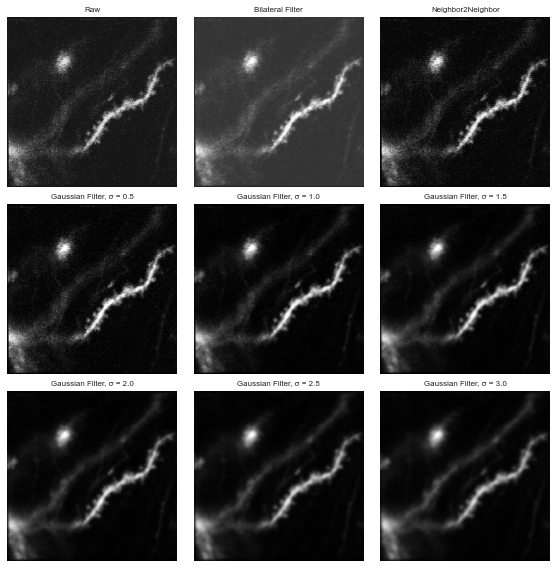

In [47]:
img1 = 'Tim_117_ArcCre_2017-05-08_A8.tif'
plane = 16

with paperStyle():
    print("\033[1m" + img1 + "\033[0m")
    fig=plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)

    #Raw
    f = tif.imread(os.path.join(data_path, img1))
    ax = fig.add_subplot(3, 3, 1)
    ax.imshow(f[plane, :, :],cmap='gray')
    ax.set_title('Raw')
    ax.axis('off')

    # Bilateral
    f = tif.imread(os.path.join(bilat_res_path, img1))
    ax = fig.add_subplot(3, 3, 2)
    ax.imshow(f[plane, :, :],cmap='gray')
    ax.set_title('Bilateral Filter')
    ax.axis('off')

    # N2N
    f = tif.imread(os.path.join(n2n_res_path,img1))
    ax = fig.add_subplot(3, 3, 3)
    ax.imshow(f[plane, :, :],cmap='gray')
    ax.set_title('Neighbor2Neighbor')
    ax.axis('off')

    sigmas = np.arange(0.5,3.1,0.5)
    for (i,l) in enumerate(sigmas):
        f = tif.imread(os.path.join(gauss_res_path, str(l)+'_' + img1))
        ax = fig.add_subplot(3, 3, i+4)
        ax.imshow(f[plane, :, :], cmap='gray')
        ax.set_title('Gaussian Filter, σ = ' + str(l))
        ax.axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.1)

plt.savefig('Denoising_visual_inspection.svg')
plt.savefig('Denoising_visual_inspection.pdf')

### 2.2 SNR-Scatterplot

In [21]:
path = 'D:/jo77pihe/Registered/20220204_Result_images'
gaussian = 'GaussianFilter'
sigmas = ['0.5_','1.0_','1.5_','2.0_','2.5_','3.0_']

res = np.zeros((len(f_test)*6,2))
names= []
c=0
for (i,file) in enumerate(f_test):
    p_raw=tif.imread(os.path.join(data_path, file))
    p_raw = normalizer.normalize(p_raw)
    raw_snr= iqm.snr(p_raw)
    
    for (j,sigma) in enumerate(sigmas):

        p_gau=tif.imread(os.path.join(path,gaussian, sigmas[j]+file))
        p_gau = normalizer.normalize(p_gau)
        gau_snr=iqm.snr(p_gau)
        res[c,:] = np.array([raw_snr, gau_snr])
        c +=1
        names.append(sigma[:-1])

In [22]:
df_x = pd.DataFrame(res, columns=['Raw', 'Denoised'])
df_x['σ'] = names

In [23]:
path = 'D:/jo77pihe/Registered/20220204_Result_images'
bil_path = 'BilateralFilter'
gaussian = 'GaussianFilter'
n2n_path = 'Neighbor2Neighbor'
sigma = '1.5_'

files = [f for f in os.listdir(os.path.join(path, bil_path)) if f.endswith('.tif')]

res = np.zeros((len(files),4))

for (i,file) in enumerate(files):
    p_raw=tif.imread(os.path.join(data_path, file))
    p_raw = normalizer.normalize(p_raw)
    # print(np.min(p_raw), np.max(p_raw))

    p_bil=tif.imread(os.path.join(path,bil_path, file))
    p_bil = normalizer.normalize(p_bil)
    # print(np.min(p_bil), np.max(p_bil))

    p_gau=tif.imread(os.path.join(path,gaussian, sigma+file))
    p_gau = normalizer.normalize(p_gau)
    # print(np.min(p_gau), np.max(p_gau))
    p_n2n=tif.imread(os.path.join(path,n2n_path, file))
    p_n2n =normalizer.normalize(p_n2n)
    # print(np.min(p_n2n), np.max(p_n2n))

    res[i,:] = np.array([iqm.snr(p_raw), iqm.snr(p_bil), iqm.snr(p_gau), iqm.snr(p_n2n)])

In [28]:
r_reshaped =np.append(res[:,0:2], res[:,[0,2]], axis=0)
r_reshaped = np.append(r_reshaped, res[:,[0,3]], axis=0)
print(r_reshaped.shape)
df = pd.DataFrame(r_reshaped, columns=['Raw', 'Denoised'])
lab = ['Bilateral Filter']*len(files)
lab=lab+(['Gaussian Filter ( σ = 1.5)']*len(files))
lab=lab+(['Neighbor2Neighbor']*len(files))
df['Denoiser'] = lab

(30, 2)


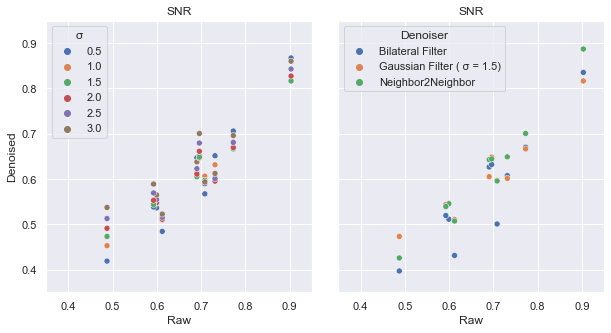

In [46]:
with paperStyle():
    fig=plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    sns.set()

    # SNR Gauss
    ax = fig.add_subplot(1, 2, 1)
    #sns.set()
    sns.scatterplot(data=df_x, x="Raw", y="Denoised", hue="σ")
    plt.title('SNR')
    plt.xlim(0.35,0.95)
    plt.ylim(0.35,0.95)
    
    # SNR all
    ax = fig.add_subplot(1, 2, 2)

    #sns.set()
    sns.scatterplot(data=df, x="Raw", y="Denoised", hue="Denoiser")
    plt.title('SNR')
    plt.xlim(0.35,0.95)
    plt.ylim(0.35,0.95)
    ax.set_ylabel('')
    frame1 = plt.gca()
    frame1.axes.yaxis.set_ticklabels([])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.savefig('scatter_denoising.svg')
plt.savefig('scatter_denoising.pdf')